# Milestone 1 - EDA and Preprocessing data 

- Cleaing the data (Done)
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data (Done)
- Observe outliers (Done)
- After observing outliers,missing data and duplicates, handle any unclean data. (Done)
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object. (Done)
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed. (Done)
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

In [23]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from scipy import stats
import pyproj
import datetime
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
import category_encoders as ce
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import boxcox
import math  
import pyarrow.parquet as pq
import requests
import json
from bs4 import BeautifulSoup
from tqdm import tqdm
# to ignore warninigs
import warnings
warnings.simplefilter('ignore')

# 1 - Extraction

## Bonus

In [24]:
# Load the dataset from the parquet file

# accidentsDataFrame = pd.read_parquet('1992_Accidents_UK.parquet' )

accidentsDataFrame = pd.read_csv('1992_Accidents_UK.csv' , index_col = 0 )


# 2- EDA

In [25]:
# printing the first n rows in the dataset

accidentsDataFrame.head(10)

accident_year accident_reference  location_easting_osgr  \
accident_index                                                            
1992010SU0965            1992          010SU0965               522790.0   
1992010SU0966            1992          010SU0966               515830.0   
1992010SU0967            1992          010SU0967               521460.0   
1992010SU0968            1992          010SU0968               521040.0   
1992010SU0969            1992          010SU0969               522750.0   
1992010SU0970            1992          010SU0970               523090.0   
1992010SU0971            1992          010SU0971               521350.0   
1992010SU0972            1992          010SU0972               522450.0   
1992010SU0973            1992          010SU0973               522810.0   
1992010SU0974            1992          010SU0974               522880.0   

                location_northing_osgr  longitude  latitude  \
accident_index                                                
1992010SU0965                 200820.0        NaN       NaN   
1992010SU0966                 201260.0        NaN       NaN   
1992010SU0967                 201640.0        NaN       NaN   
1992010SU0968                 202020.0        NaN       NaN   
1992010SU0969                 200680.0        NaN       NaN   
1992010SU0970                 202720.0        NaN       NaN   
1992010SU0971                 201790.0        NaN       NaN   
1992010SU0972                 200240.0        NaN       NaN   
1992010SU0973                 200820.0        NaN       NaN   
1992010SU0974                 201810.0        NaN       NaN   

                       police_force accident_severity  number_of_vehicles  \
accident_index                                                              
1992010SU0965   Metropolitan Police            Slight                   5   
1992010SU0966   Metropolitan Police            Slight                   2   
1992010SU0967   Metropolitan Police            Slight                   2   
1992010SU0968   Metropolitan Police           Serious                   2   
1992010SU0969   Metropolitan Police            Slight                   3   
1992010SU0970   Metropolitan Police           Serious                   2   
1992010SU0971   Metropolitan Police            Slight                   2   
1992010SU0972   Metropolitan Police            Slight                   2   
1992010SU0973   Metropolitan Police            Slight                   1   
1992010SU0974   Metropolitan Police            Slight                   2   

                number_of_casualties  ...  \
accident_index                        ...   
1992010SU0965                      1  ...   
1992010SU0966                      1  ...   
1992010SU0967                      1  ...   
1992010SU0968                      1  ...   
1992010SU0969                      1  ...   
1992010SU0970                      2  ...   
1992010SU0971                      1  ...   
1992010SU0972                      1  ...   
1992010SU0973                      1  ...   
1992010SU0974                      1  ...   

                         pedestrian_crossing_physical_facilities  \
accident_index                                                     
1992010SU0965   No physical crossing facilities within 50 metres   
1992010SU0966   No physical crossing facilities within 50 metres   
1992010SU0967   No physical crossing facilities within 50 metres   
1992010SU0968   No physical crossing facilities within 50 metres   
1992010SU0969   No physical crossing facilities within 50 metres   
1992010SU0970   No physical crossing facilities within 50 metres   
1992010SU0971   No physical crossing facilities within 50 metres   
1992010SU0972   No physical crossing facilities within 50 metres   
1992010SU0973   No physical crossing facilities within 50 metres   
1992010SU0974   No physical crossing facilities within 50 metres   

                      light_conditions     weather_conditions  \
accident_i

### 1- What is the shape of the dataset?

In [26]:
# Dataset's shape and cols name.

print(accidentsDataFrame.shape)

accidentsDataFrame.columns

(233104, 35)


Index(['accident_year', 'accident_reference', 'location_easting_osgr',
       'location_northing_osgr', 'longitude', 'latitude', 'police_force',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'date', 'day_of_week', 'time', 'local_authority_district',
       'local_authority_ons_district', 'local_authority_highway',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

### 2- Which Features are the categorical features?

In [27]:
# Categroical Features

accidentsDataFrame.select_dtypes(include = "object").columns

Index(['accident_reference', 'police_force', 'accident_severity', 'date',
       'day_of_week', 'time', 'local_authority_district', 'first_road_class',
       'first_road_number', 'road_type', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag'],
      dtype='object')

### 3- What are the neumrical features?

In [28]:
# Exploring the neumrical values

accidentsDataFrame.select_dtypes(include=['int64','float'])

accident_year  location_easting_osgr  location_northing_osgr  \
accident_index                                                                 
1992010SU0965            1992               522790.0                200820.0   
1992010SU0966            1992               515830.0                201260.0   
1992010SU0967            1992               521460.0                201640.0   
1992010SU0968            1992               521040.0                202020.0   
1992010SU0969            1992               522750.0                200680.0   
...                       ...                    ...                     ...   
1992986013492            1992               206100.0                560500.0   
1992986014192            1992               206200.0                560400.0   
1992986015192            1992               206000.0                560800.0   
1992986015292            1992               205700.0                560700.0   
1992986015492            1992               205100.0                561500.0   

                longitude  latitude  number_of_vehicles  number_of_casualties  \
accident_index                                                                  
1992010SU0965         NaN       NaN                   5                     1   
1992010SU0966         NaN       NaN                   2                     1   
1992010SU0967         NaN       NaN                   2                     1   
1992010SU0968         NaN       NaN                   2                     1   
1992010SU0969         NaN       NaN                   3                     1   
...                   ...       ...                 ...                   ...   
1992986013492         NaN       NaN                   1                     1   
1992986014192         NaN       NaN                   2                     1   
1992986015192         NaN       NaN                   3                     1   
1992986015292         NaN       NaN                   1                     1   
1992986015492         NaN       NaN                   3                     1   

                local_authority_ons_district  local_authority_highway  \
accident_index                                                          
1992010SU0965                             -1                       -1   
1992010SU0966                             -1                       -1   
1992010SU0967                             -1                       -1   
1992010SU0968                             -1                       -1   
1992010SU0969                             -1                       -1   
...                                      ...                      ...   
1992986013492                             -1                       -1   
1992986014192                             -1                       -1   
1992986015192                             -1                       -1   
1992986015292                             -1                       -1   
1992986015492                             -1                       -1   

                speed_limit  lsoa_of_accident_location  
accident_index                                          
1992010SU0965          70.0                         -1  
1992010SU0966          60.0                         -1  
1992010SU0967          70.0                         -1  
1992010SU0968          70.0                         -1  
1992010SU0969          70.0                         -1  
...                     ...                        ...  
1992986013492          30.0                         -1  
1992986014192          30.0                         -1  
1992986015192          30.0                         -1  
1992986015292          30.0                         -1  
1992986015492          30.0                         -1  

[233104 rows x 11 columns]

In [29]:
# A function to explore each categorical feature 

def exploringDataAnalysisCategoricalFeatures(featureName , dataframe):
    
    # Print Feature name
    print(featureName + "\n")
    
    # Fetch the current Column
    currentFeature = dataframe[featureName]
    
    # print the number of null values and the percentage
    
    print(f"The number of null values is {currentFeature.isnull().sum()} and the percentage is {currentFeature.isnull().mean() * 100} \n")
    
    # print the number of unique values in the feature
          
    print(f"The number of unique values is {currentFeature.nunique()} \n")
    
    # Print the the number of occurenances in each feature
    
    print(f"The the number of occurenances is {currentFeature.value_counts()} \n")
    
    # Seperate each feature
    
    print("_____________________________________________________________________________________________________________\n")
    

In [30]:
# loop over all categorical features to perform EDA

# get categorical features name
features = accidentsDataFrame.select_dtypes(include = "object").columns.tolist()

for feature in features:
    
    exploringDataAnalysisCategoricalFeatures(feature , accidentsDataFrame)


accident_reference

The number of null values is 0 and the percentage is 0.0 

The number of unique values is 233104 

The the number of occurenances is 010SU0965    1
4200F0546    1
4200F0519    1
4200F0520    1
4200F0521    1
            ..
112AK8716    1
112AK8717    1
112AK8728    1
112AK8748    1
986015492    1
Name: accident_reference, Length: 233104, dtype: int64 

_____________________________________________________________________________________________________________

police_force

The number of null values is 0 and the percentage is 0.0 

The number of unique values is 51 

The the number of occurenances is Metropolitan Police      40834
Greater Manchester       12510
West Midlands             9125
West Yorkshire            8387
Strathclyde               8199
Thames Valley             7863
Merseyside                7129
Hampshire                 7064
Kent                      6185
Lancashire                6058
Essex                     5920
Sussex                    5487

The number of null values is 0 and the percentage is 0.0 

The number of unique values is 7 

The the number of occurenances is Unclassified    100917
-1               91034
A                19257
C                12037
B                 8516
Motorway          1159
A(M)               184
Name: second_road_class, dtype: int64 

_____________________________________________________________________________________________________________

second_road_number

The number of null values is 91056 and the percentage is 39.062392751733135 

The number of unique values is 2794 

The the number of occurenances is first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     112954
1.0                                                                                                        385
4.0                                                                                                        337
40.0                                                     

In [31]:
# A function to explore each neumrical feature 

def exploringDataAnalysisNeumricalFeatures(featureName , dataframe):
    
    # Print Feature name
    print(featureName + "\n")
    
    # Fetch the current Column
    currentFeature = dataframe[featureName]
    
    # print the number of null values and the percentage
    
    print(f"The number of null values is {currentFeature.isnull().sum()} and the percentage is {currentFeature.isnull().mean()} \n")
    
    # print the number of unique values in the feature
    number_of_unique_values = currentFeature.nunique()
    print(f"The number of unique values is {number_of_unique_values} \n")
    
    # Print the the number of occurenances in each feature
    
    print(f"he the number of occurenances is {currentFeature.value_counts()} \n")
    
    
    # print the amount of skewness in the distrubition
    print(f"The amount of skewness in {featureName} is {currentFeature.skew()} \n")
    
    
    if (number_of_unique_values > 40):
        
        # Visualising using density plots
        sns.kdeplot(currentFeature)
        plt.title(f"Kdeplot for {featureName}")
        plt.show()
        
    elif (number_of_unique_values <= 1):
        # in case of Longitude and latitude (All nulls)
        pass
    
    else:
        # Visualising using Count plots
        sns.countplot(currentFeature)
        plt.title(f"Count Plot for {featureName}")
        plt.show()

    
    # Seperate each feature
    
    print("_____________________________________________________________________________________________________________\n")
    

accident_year

The number of null values is 0 and the percentage is 0.0 

The number of unique values is 1 

he the number of occurenances is 1992    233104
Name: accident_year, dtype: int64 

The amount of skewness in accident_year is 0 

_____________________________________________________________________________________________________________

location_easting_osgr

The number of null values is 304 and the percentage is 0.0013041389251149701 

The number of unique values is 35072 

he the number of occurenances is 384000.0    122
391100.0    120
394200.0    118
385500.0    117
393200.0    114
           ... 
569100.0      1
566100.0      1
627020.0      1
568720.0      1
201800.0      1
Name: location_easting_osgr, Length: 35072, dtype: int64 

The amount of skewness in location_easting_osgr is -0.2935933790947746 



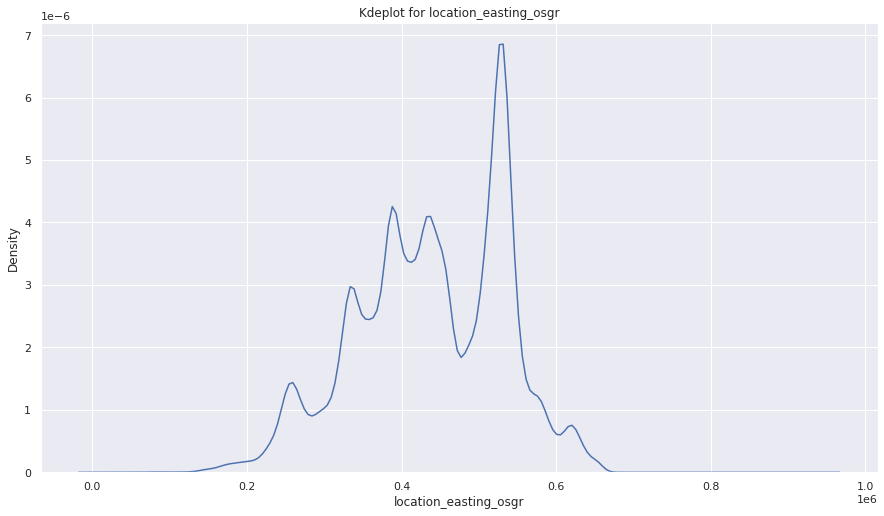

_____________________________________________________________________________________________________________

location_northing_osgr

The number of null values is 304 and the percentage is 0.0013041389251149701 

The number of unique values is 45286 

he the number of occurenances is 398500.0    146
395500.0    128
405000.0    121
400600.0    109
398200.0    103
           ... 
281380.0      1
337770.0      1
282590.0      1
325530.0      1
374280.0      1
Name: location_northing_osgr, Length: 45286, dtype: int64 

The amount of skewness in location_northing_osgr is 0.9857108781990122 



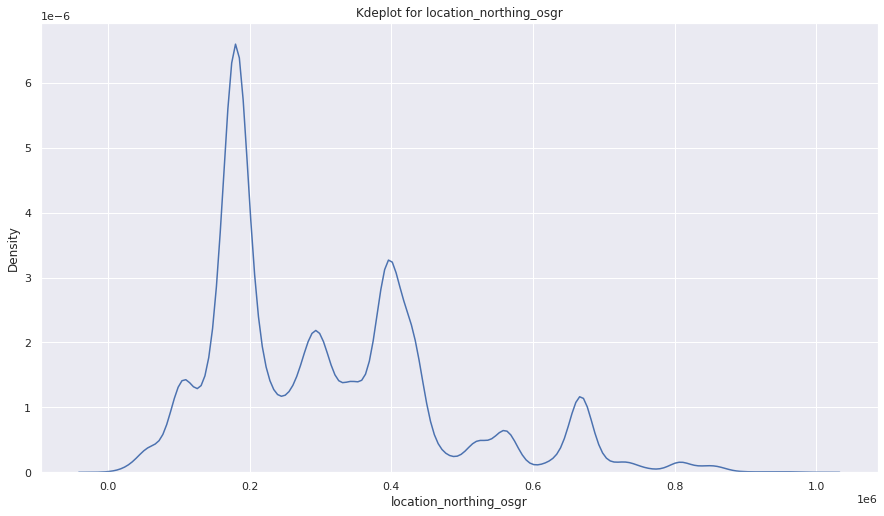

_____________________________________________________________________________________________________________

longitude

The number of null values is 233104 and the percentage is 1.0 

The number of unique values is 0 

he the number of occurenances is Series([], Name: longitude, dtype: int64) 

The amount of skewness in longitude is nan 

_____________________________________________________________________________________________________________

latitude

The number of null values is 233104 and the percentage is 1.0 

The number of unique values is 0 

he the number of occurenances is Series([], Name: latitude, dtype: int64) 

The amount of skewness in latitude is nan 

_____________________________________________________________________________________________________________

number_of_vehicles

The number of null values is 0 and the percentage is 0.0 

The number of unique values is 25 

he the number of occurenances is 2      128772
1       80738
3       18686
4        3625
5 

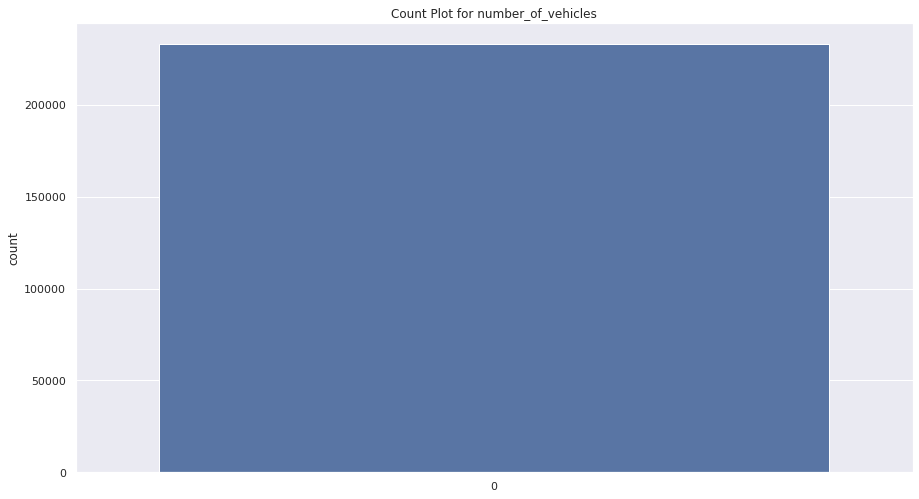

_____________________________________________________________________________________________________________

number_of_casualties

The number of null values is 0 and the percentage is 0.0 

The number of unique values is 30 

he the number of occurenances is 1     182491
2      34777
3       9602
4       3799
5       1401
6        559
7        213
8         89
9         57
10        29
12        21
11        21
15         8
13         8
14         6
17         4
18         4
30         2
26         2
20         1
34         1
40         1
22         1
16         1
27         1
28         1
19         1
21         1
29         1
42         1
Name: number_of_casualties, dtype: int64 

The amount of skewness in number_of_casualties is 6.210179481213225 



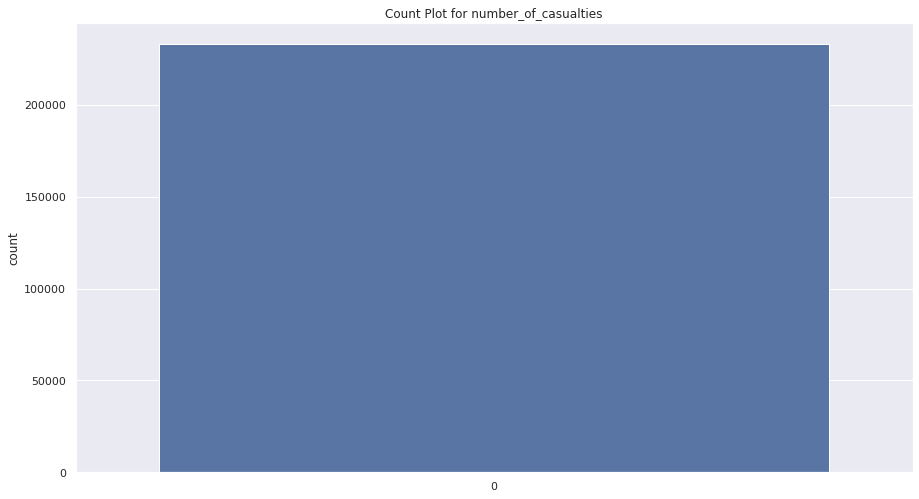

_____________________________________________________________________________________________________________

local_authority_ons_district

The number of null values is 0 and the percentage is 0.0 

The number of unique values is 1 

he the number of occurenances is -1    233104
Name: local_authority_ons_district, dtype: int64 

The amount of skewness in local_authority_ons_district is 0 

_____________________________________________________________________________________________________________

local_authority_highway

The number of null values is 0 and the percentage is 0.0 

The number of unique values is 1 

he the number of occurenances is -1    233104
Name: local_authority_highway, dtype: int64 

The amount of skewness in local_authority_highway is 0 

_____________________________________________________________________________________________________________

speed_limit

The number of null values is 0 and the percentage is 0.0 

The number of unique values is 25 

he the n

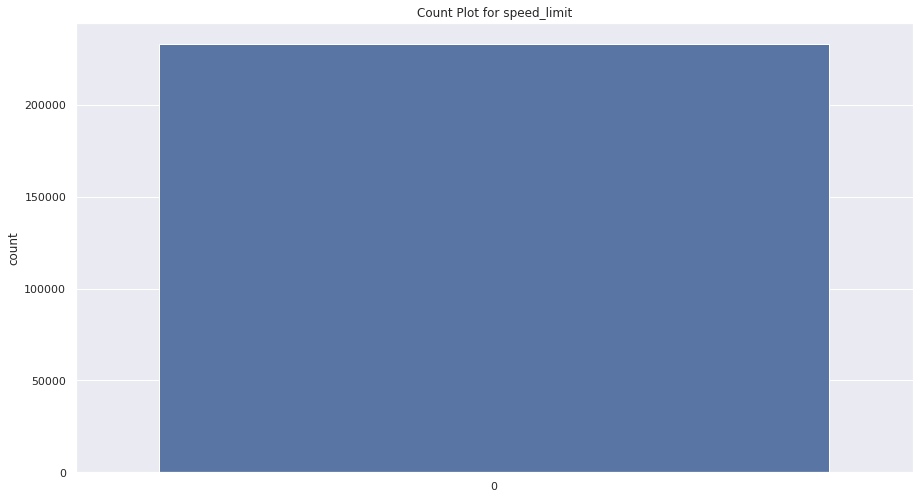

_____________________________________________________________________________________________________________

lsoa_of_accident_location

The number of null values is 0 and the percentage is 0.0 

The number of unique values is 1 

he the number of occurenances is -1    233104
Name: lsoa_of_accident_location, dtype: int64 

The amount of skewness in lsoa_of_accident_location is 0 

_____________________________________________________________________________________________________________



In [32]:
# loop over all neumrical features to perform EDA 

# get neumrical features name
features = accidentsDataFrame.select_dtypes(include = ['int64','float']).columns.tolist()

for feature in features:
    
    exploringDataAnalysisNeumricalFeatures(feature , accidentsDataFrame)


### Longitude & Latitude
We can estimate the valyes 
### accident_reference
1) is similar to the **accident_index** ,so we can drop them.
### location_easting_osgr

1) We have no idea about this feature.
### location_northing_osgr
1) We have no idea about this feature.
2) The null values in this feature and the previous one are in the same rows (number = 304), so there is a sort of relation in missing data in the two columns, But the two columns are MAR.
### number_of_vechiels
1) The max number is **192**.
### Date & Time
1) The null values in the two features and are in the same rows (number = 2), so there is a sort of relation in missing data in the two columns, But the two columns are MAR.
### road_type
1) Conatins Data missing or out of range        23
2) 1093 null records
### junction_control
1) Data missing or out of range     90211
### second_road_class
1) Unclassified    100917
2) -1               91034

In [33]:
# Visualize data 
def visualize_data(feature_name , dataframe , caption = ''):
    
    # count the number of occurances for each category
    value_freq = dataframe[feature_name].value_counts()
    
    # set figure size
    sns.set(rc={'figure.figsize':(15,8.27)})
    # make ticks vertical
    plt.xticks(rotation=90)
    
    # set title to the image and plot it or the highest 40
    fig = sns.barplot(x = value_freq.keys()[:min(52 , len(value_freq))].tolist() , y = value_freq.values[: min(52 , len(value_freq))].tolist(), data = dataframe) \
    .set_title(caption)
    
    # set labels
    plt.xlabel(feature_name)
    plt.ylabel('Number Of Accidents')
    
    plt.show()

In [34]:
# Visualize data without calculating 
def visualize_data_naiive(data , caption = ''):
    

    
    # set figure size
    sns.set(rc={'figure.figsize':(15,8.27)})
    # make ticks vertical
    plt.xticks(rotation=90)
    
    # set title to the image and plot it or the highest 40
    fig = sns.barplot(x = data.keys()[:min(40 , len(data))].tolist() , y = data.values[: min(40 , len(data))].tolist()) \
    .set_title(caption)
    
    # set labels
    plt.ylabel('Percentage of Mising Data')
    
    plt.show()

### 4- Which Region has the highest number of accidents?

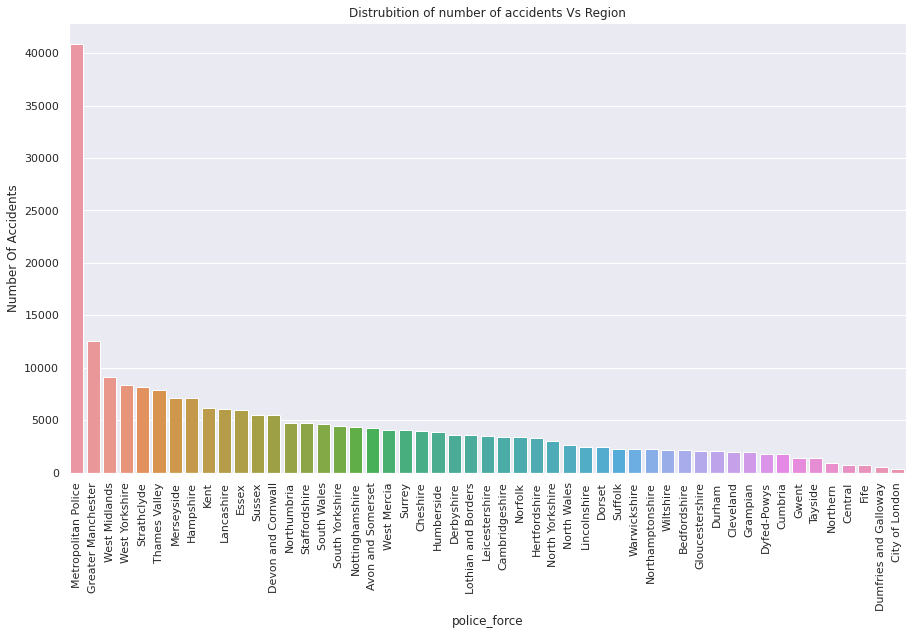

In [35]:
# Which Region contains the highest number of accidents ?
visualize_data('police_force' , accidentsDataFrame , 'Distrubition of number of accidents Vs Region')

### 5- Which day of week has the largest number of accidents?

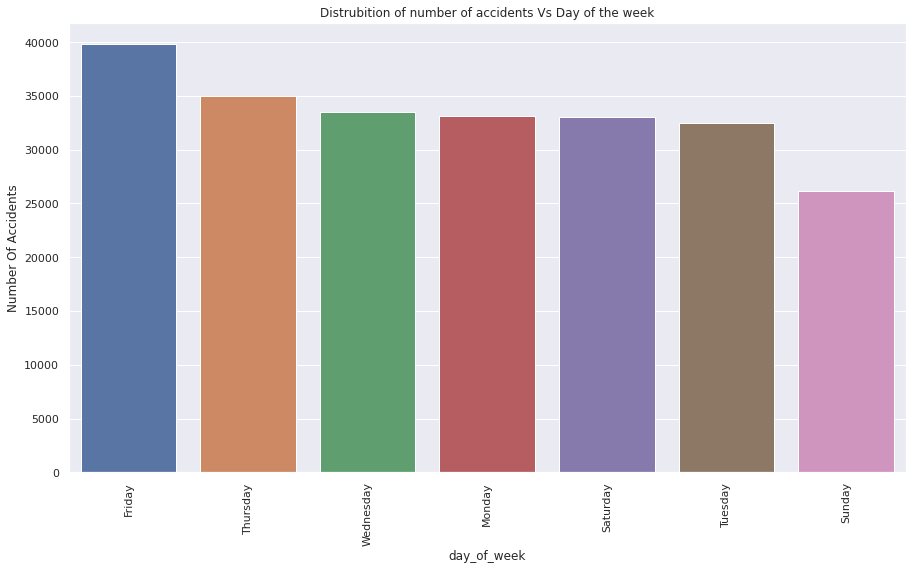

In [36]:
# Which Day contains the highest number of accidents ?
visualize_data('day_of_week' , accidentsDataFrame , 'Distrubition of number of accidents Vs Day of the week')

### 6- Which day in the year has the highest number of accidents?

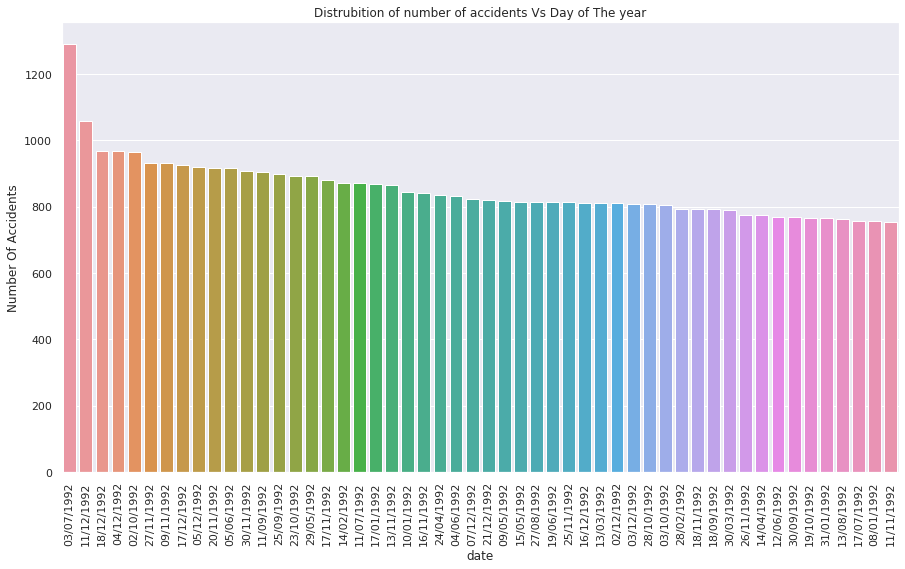

In [37]:
# Which Day in the year contains the highest number of accidents ?
visualize_data('date' , accidentsDataFrame , 'Distrubition of number of accidents Vs Day of The year')

# 3 - Cleaning Data

## Observing Missing and duplicate Data

In [38]:
# Count the number of unique values in the nerumrical features

accidentsDataFrame.select_dtypes(include=['int64','float']).nunique()

accident_year                       1
location_easting_osgr           35072
location_northing_osgr          45286
longitude                           0
latitude                            0
number_of_vehicles                 25
number_of_casualties               30
local_authority_ons_district        1
local_authority_highway             1
speed_limit                        25
lsoa_of_accident_location           1
dtype: int64

### 7- Which columns contain missing data and the what's the percentage of missing data in  these columns?

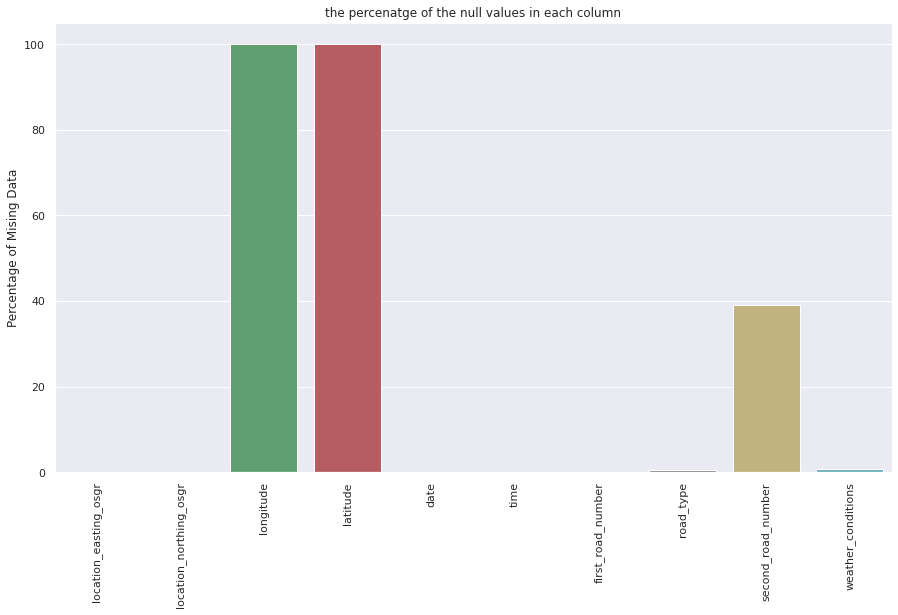

In [39]:
# Calculating the percenatge of the null values in each column.
null_values_percentage = accidentsDataFrame.isnull().sum() / accidentsDataFrame.shape[0]  * 100 

# Get columns that conatins missing data
null_values_percentage = null_values_percentage[null_values_percentage > 0]

# Plot the Percentage of missing data Vs columns names
visualize_data_naiive(null_values_percentage , 'the percenatge of the null values in each column')

**Assunming features that have a missing category is Not Missing At Random (NMAR)**

In [40]:
# Get columns names that have missing data percentage >= 10 % to be deleted
columns_with_missing_data_greater_than_10 = null_values_percentage[null_values_percentage >= 10].index.tolist()

columns_with_missing_data_greater_than_10

['longitude', 'latitude', 'second_road_number']

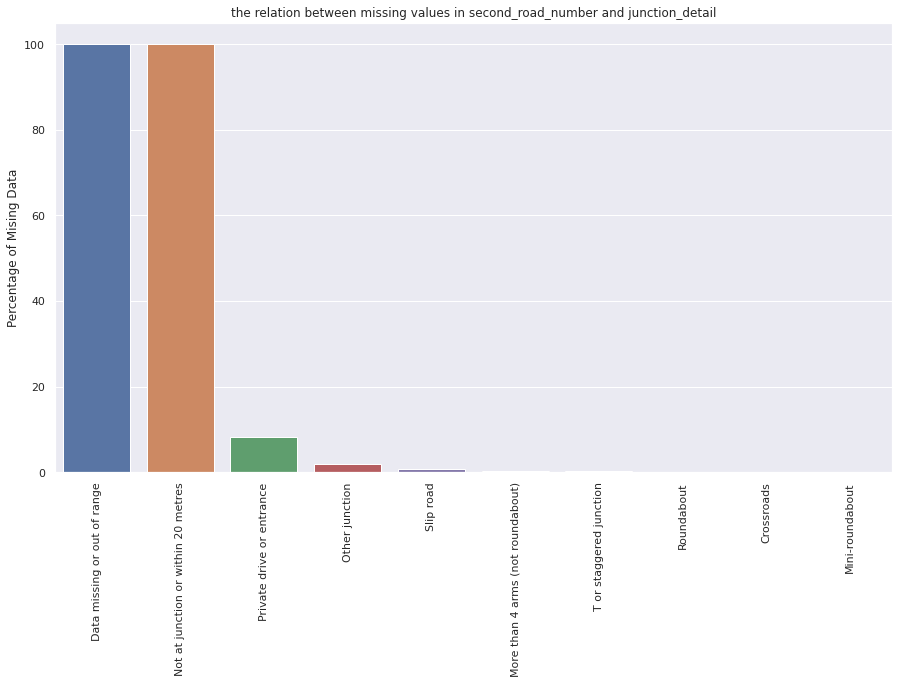

In [41]:
#check the relation between second_road_number and jucnction detail
relation_between_missing_in_second_road_number_and_junction = accidentsDataFrame.second_road_number.isnull().groupby(accidentsDataFrame.junction_detail).mean().sort_values(ascending = False) * 100
                
# plot the relation between missing values in featureA and featureB
visualize_data_naiive(relation_between_missing_in_second_road_number_and_junction , caption = "the relation between missing values in second_road_number and junction_detail")
                      

We can see that 99% of missing values in **second_road_number** comes from **Not at junction or within 20 metres** so it is missing not at random.
We decide to replace the missing values with -1

In [42]:
# Get columns names that have missing data percentage < 10 %
columns_with_missing_data_less_than_10 = null_values_percentage[null_values_percentage < 10].index.tolist()

columns_with_missing_data_less_than_10

['location_easting_osgr',
 'location_northing_osgr',
 'date',
 'time',
 'first_road_number',
 'road_type',
 'weather_conditions']

### 8- Which columns has only one single value?

In [43]:
# Get Duplicate data columns name (Column with single category or value.)

duplicate_data_columns = accidentsDataFrame.loc[ : , accidentsDataFrame.nunique() == 1].columns

accidentsDataFrame[duplicate_data_columns]

accident_year  local_authority_ons_district  \
accident_index                                                
1992010SU0965            1992                            -1   
1992010SU0966            1992                            -1   
1992010SU0967            1992                            -1   
1992010SU0968            1992                            -1   
1992010SU0969            1992                            -1   
...                       ...                           ...   
1992986013492            1992                            -1   
1992986014192            1992                            -1   
1992986015192            1992                            -1   
1992986015292            1992                            -1   
1992986015492            1992                            -1   

                local_authority_highway           urban_or_rural_area  \
accident_index                                                          
1992010SU0965                        -1  Data missing or out of range   
1992010SU0966                        -1  Data missing or out of range   
1992010SU0967                        -1  Data missing or out of range   
1992010SU0968                        -1  Data missing or out of range   
1992010SU0969                        -1  Data missing or out of range   
...                                 ...                           ...   
1992986013492                        -1  Data missing or out of range   
1992986014192                        -1  Data missing or out of range   
1992986015192                        -1  Data missing or out of range   
1992986015292                        -1  Data missing or out of range   
1992986015492                        -1  Data missing or out of range   

               did_police_officer_attend_scene_of_accident  \
accident_index                                               
1992010SU0965                 Data missing or out of range   
1992010SU0966                 Data missing or out of range   
1992010SU0967                 Data missing or out of range   
1992010SU0968                 Data missing or out of range   
1992010SU0969                 Data missing or out of range   
...                                                    ...   
1992986013492                 Data missing or out of range   
1992986014192                 Data missing or out of range   
1992986015192                 Data missing or out of range   
1992986015292                 Data missing or out of range   
1992986015492                 Data missing or out of range   

                             trunk_road_flag  lsoa_of_accident_location  
accident_index                                                           
1992010SU0965   Data missing or out of range                         -1  
1992010SU0966   Data missing or out of range                         -1  
1992010SU0967   Data missing or out of range                         -1  
1992010SU0968   Data missing or out of range                         -1  
1992010SU0969   Data missing or out of range                         -1  
...                                      ...                        ...  
1992986013492   Data missing or out of range                         -1  
1992986014192   Data missing or out of range                         -1  
1992986015192   Data missing or out of range                         -1  
1992986015292   Data missing or out of range                         -1  
1992986015492   Data missing or out of range                         -1  

[233104 rows x 7 columns]

In [44]:
# Get NAN data columns name

nan_data_columns = accidentsDataFrame.loc[ : , accidentsDataFrame.isnull().sum() == accidentsDataFrame.shape[0]].columns

nan_data_columns

Index(['longitude', 'latitude'], dtype='object')

### 9- The Locations were accidents happened.

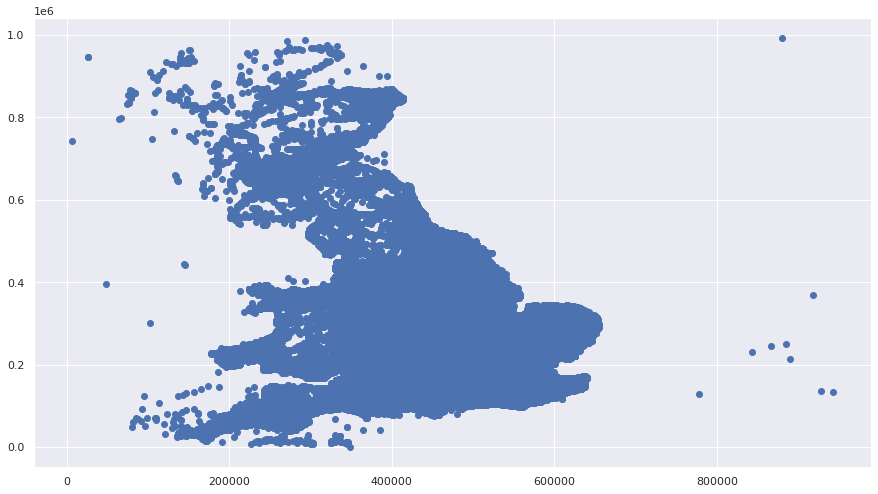

In [45]:
#The Locations were accidents happened.
plt.scatter(accidentsDataFrame.location_easting_osgr , accidentsDataFrame.location_northing_osgr)

## Handling Missing data

In [46]:
# replace missing value with -1 in a new DataFrame
accidentsDataFrameReplaceNA = accidentsDataFrame.copy()

accidentsDataFrameReplaceNA.second_road_number.fillna(-1 , inplace = True)

# display the number of missing values
print(accidentsDataFrameReplaceNA.second_road_number.isna().sum())

# remove second_road_number from columns to be deleted
columns_with_missing_data_greater_than_10.remove('second_road_number')

0


In [47]:
# Dropping columns that contain more than 10 % null values

# accidentsDataFrameWithoutNaNs = accidentsDataFrame.dropna( how = 'all' , axis =  1)

accidentsDataFrameWithoutNaNs = accidentsDataFrameReplaceNA.drop(columns_with_missing_data_greater_than_10 , axis = 1)


In [48]:
# Dropping Columns with the same value 

accidentsDataFrameAfterDropping = accidentsDataFrameWithoutNaNs.drop(columns = duplicate_data_columns.to_list() , axis =  1 )

accidentsDataFrameAfterDropping.shape

(233104, 26)

In [49]:
# Drop duplicate rows
accidentsDataFrameAfterDropping.drop_duplicates(inplace = True)

### 10- What's the correlation between columns ?

<AxesSubplot:>

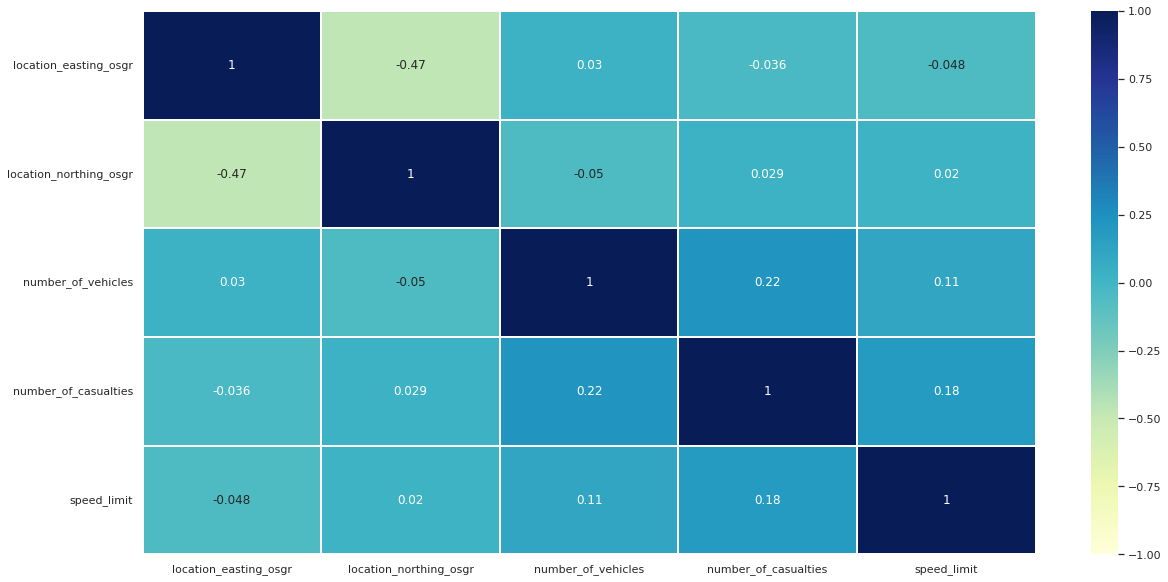

In [50]:
# Features' heatmap to show the correlation between features after dropping duplicate data

plt.figure(figsize=(20,10))
sns.heatmap(accidentsDataFrameAfterDropping.select_dtypes(include=['int64','float']).corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2)

# Conclusion there is no corelation between Variables.

In [51]:
# Drop accident_reference Column similar to accident_index (Another format to identify the index column)

accidentsDataFrameAfterDropping.drop('accident_reference' , inplace = True , axis = 1)

In [52]:
# A method to detect the relation between missing data (Either MAR , MCAR , MNAR)
def detect_the_relation_between_missing_data(featuresA , featuresB):
    
    # Iterate over each feature in features A (Missing Features)
    for featureA in featuresA:
        
        print(f"Current Feature is {featureA} \n")
        # Iterate over each feature in features B (ALL Features)
        for featureB in featuresB:
            
            if featureA != featureB:
                statstics_between_fetA_and_fetB = accidentsDataFrameAfterDropping[featureA].isnull().groupby(accidentsDataFrameAfterDropping[featureB]).mean().sort_values(ascending = False) * 100
                print(statstics_between_fetA_and_fetB)
                
                # plot the relation between missing values in featureA and featureB
                visualize_data_naiive(statstics_between_fetA_and_fetB , caption = f"the relation between missing values in {featureA} and {featureB}")
                print("------------------------------------------------------------------------------------------")
            

Current Feature is location_easting_osgr 

location_northing_osgr
200.0       0.0
409890.0    0.0
409230.0    0.0
409240.0    0.0
409250.0    0.0
           ... 
228250.0    0.0
228280.0    0.0
228290.0    0.0
228300.0    0.0
991700.0    0.0
Name: location_easting_osgr, Length: 45286, dtype: float64


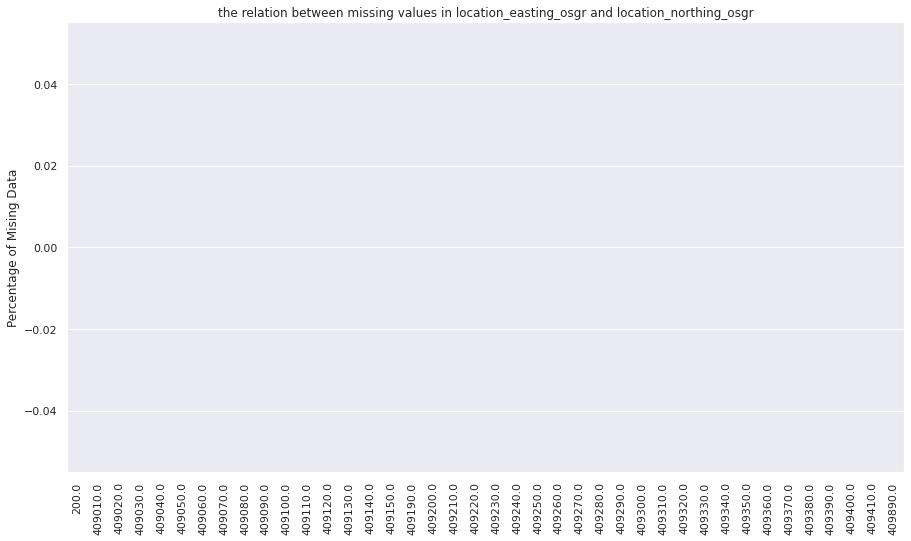

------------------------------------------------------------------------------------------
police_force
Avon and Somerset        5.216374
South Yorkshire          1.429544
Tayside                  0.650759
Devon and Cornwall       0.128205
Dyfed-Powys              0.055279
Humberside               0.025826
Warwickshire             0.000000
Thames Valley            0.000000
Metropolitan Police      0.000000
Norfolk                  0.000000
North Wales              0.000000
North Yorkshire          0.000000
Northamptonshire         0.000000
Northern                 0.000000
Northumbria              0.000000
Nottinghamshire          0.000000
South Wales              0.000000
West Yorkshire           0.000000
Staffordshire            0.000000
Lothian and Borders      0.000000
Strathclyde              0.000000
Suffolk                  0.000000
Surrey                   0.000000
West Midlands            0.000000
Sussex                   0.000000
West Mercia              0.000000
Merseyside  

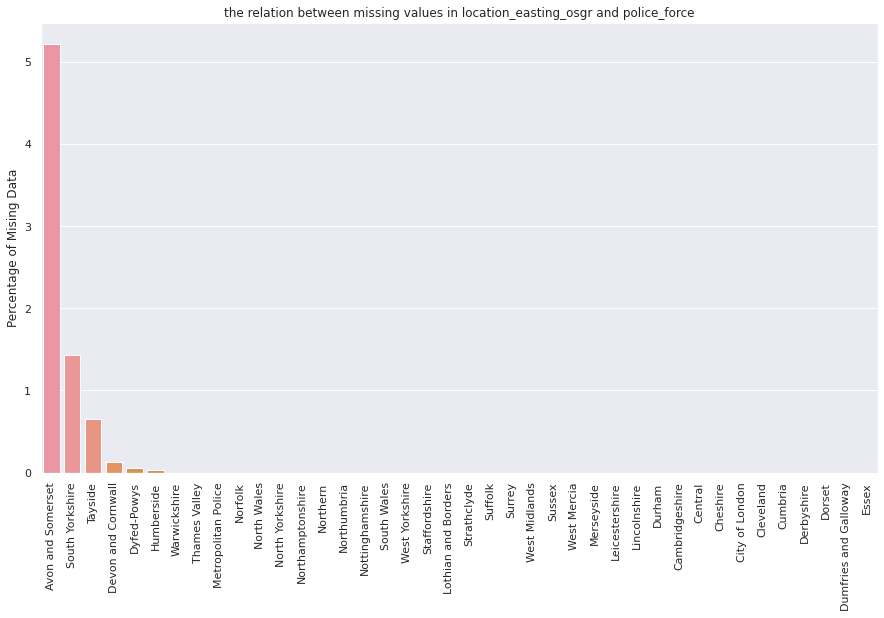

------------------------------------------------------------------------------------------
accident_severity
Slight     0.136348
Serious    0.110859
Fatal      0.051881
Name: location_easting_osgr, dtype: float64


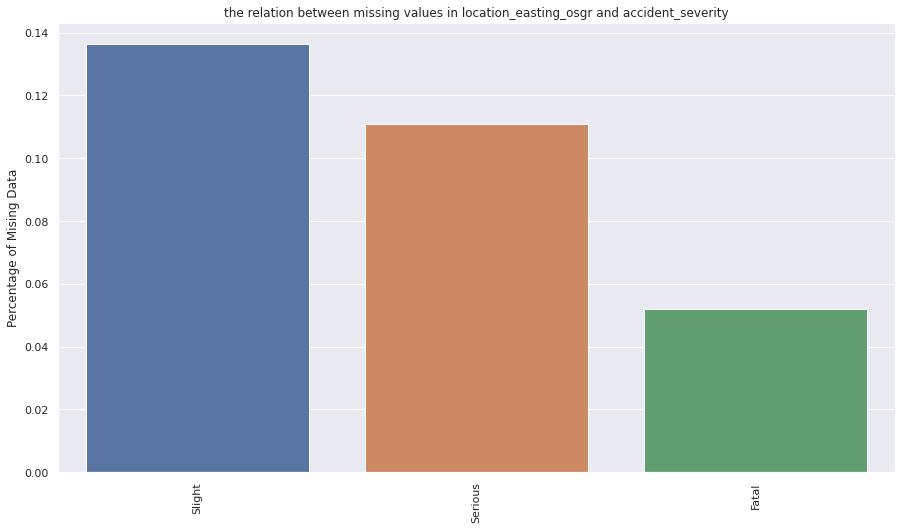

------------------------------------------------------------------------------------------
number_of_vehicles
5      0.244200
3      0.144493
2      0.143665
1      0.110233
4      0.027586
16     0.000000
75     0.000000
73     0.000000
53     0.000000
39     0.000000
38     0.000000
21     0.000000
20     0.000000
18     0.000000
13     0.000000
15     0.000000
14     0.000000
12     0.000000
11     0.000000
10     0.000000
9      0.000000
8      0.000000
7      0.000000
6      0.000000
192    0.000000
Name: location_easting_osgr, dtype: float64


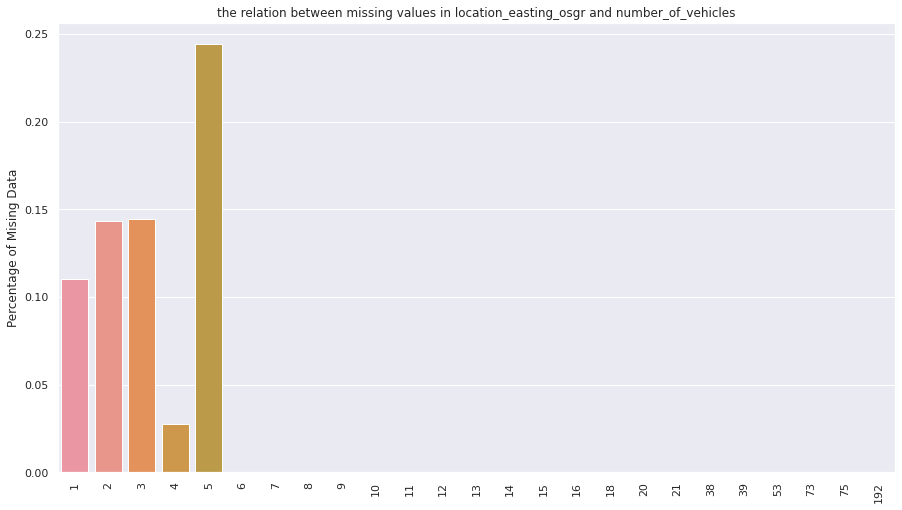

------------------------------------------------------------------------------------------
number_of_casualties
11    4.761905
6     0.178891
5     0.142755
2     0.135147
1     0.132609
3     0.083316
4     0.078968
27    0.000000
21    0.000000
22    0.000000
26    0.000000
29    0.000000
28    0.000000
19    0.000000
30    0.000000
34    0.000000
40    0.000000
20    0.000000
16    0.000000
18    0.000000
17    0.000000
15    0.000000
14    0.000000
13    0.000000
12    0.000000
10    0.000000
9     0.000000
8     0.000000
7     0.000000
42    0.000000
Name: location_easting_osgr, dtype: float64


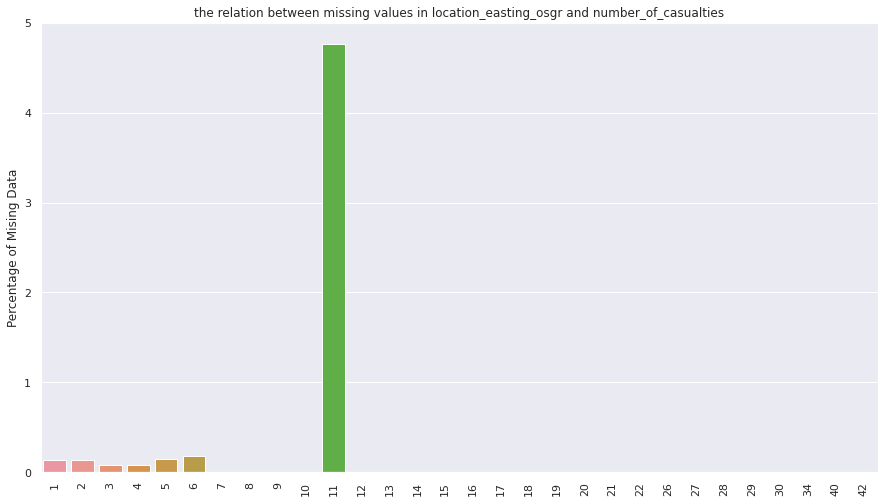

------------------------------------------------------------------------------------------
date
31/07/1992    0.872093
10/11/1992    0.852273
09/10/1992    0.846262
13/11/1992    0.809249
30/09/1992    0.781250
                ...   
15/02/1992    0.000000
15/03/1992    0.000000
15/04/1992    0.000000
15/05/1992    0.000000
31/12/1992    0.000000
Name: location_easting_osgr, Length: 366, dtype: float64


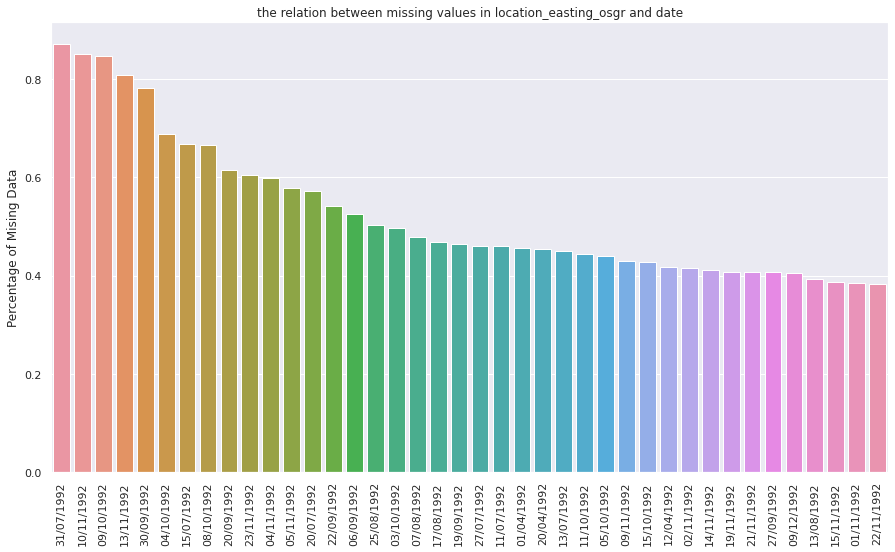

------------------------------------------------------------------------------------------
day_of_week
Monday       0.159802
Friday       0.140647
Wednesday    0.140227
Sunday       0.126335
Saturday     0.124069
Thursday     0.117314
Tuesday      0.101573
Name: location_easting_osgr, dtype: float64


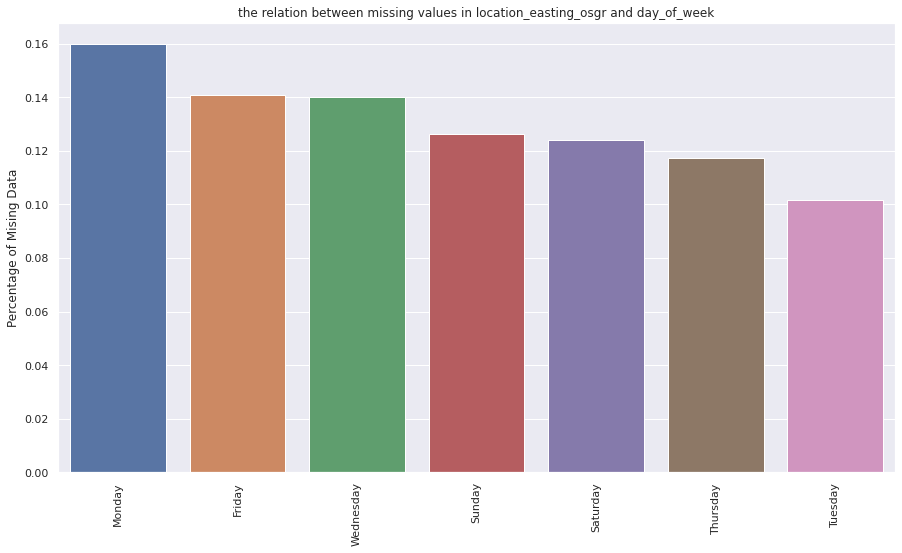

------------------------------------------------------------------------------------------
time
07:31    11.111111
00:47     7.142857
10:41     6.250000
13:21     4.545455
16:21     4.166667
           ...    
08:05     0.000000
08:04     0.000000
08:03     0.000000
08:02     0.000000
23:59     0.000000
Name: location_easting_osgr, Length: 1434, dtype: float64


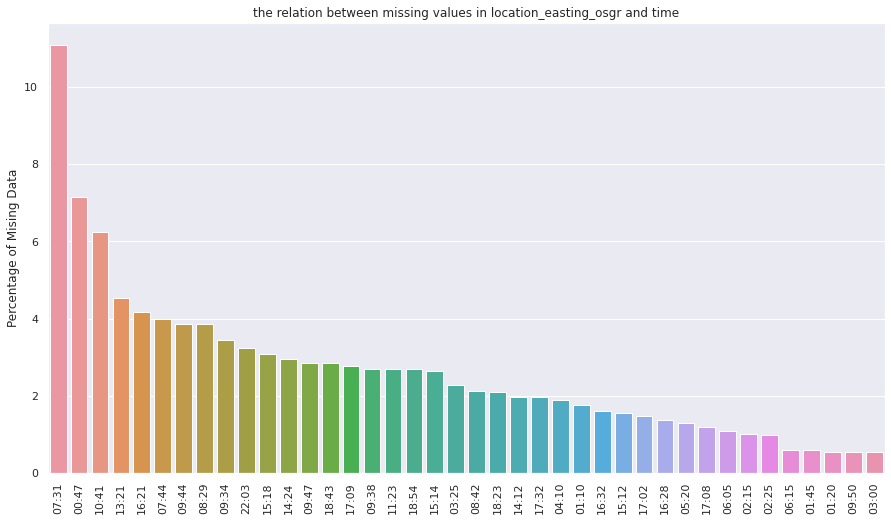

------------------------------------------------------------------------------------------
local_authority_district
Taunton Deane       18.498660
Sedgemoor           13.927577
Mendip              11.926606
South Somerset      11.297071
West Somerset       10.091743
                      ...    
Broadland            0.000000
Bristol, City of     0.000000
Bridgnorth           0.000000
Brentwood            0.000000
York                 0.000000
Name: location_easting_osgr, Length: 460, dtype: float64


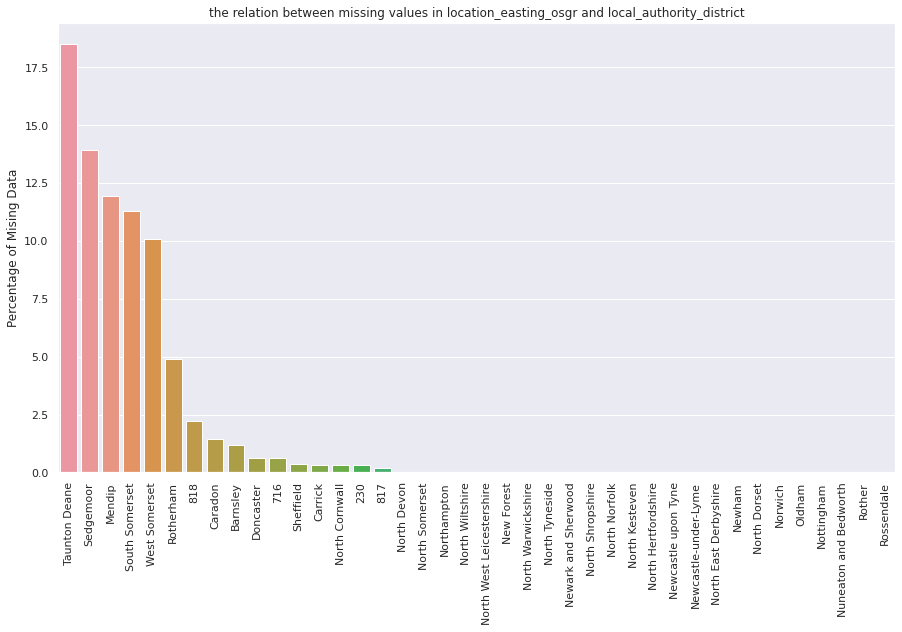

------------------------------------------------------------------------------------------
first_road_class
C               0.331061
Motorway        0.227162
Unclassified    0.117738
B               0.111664
A               0.100656
A(M)            0.000000
Name: location_easting_osgr, dtype: float64


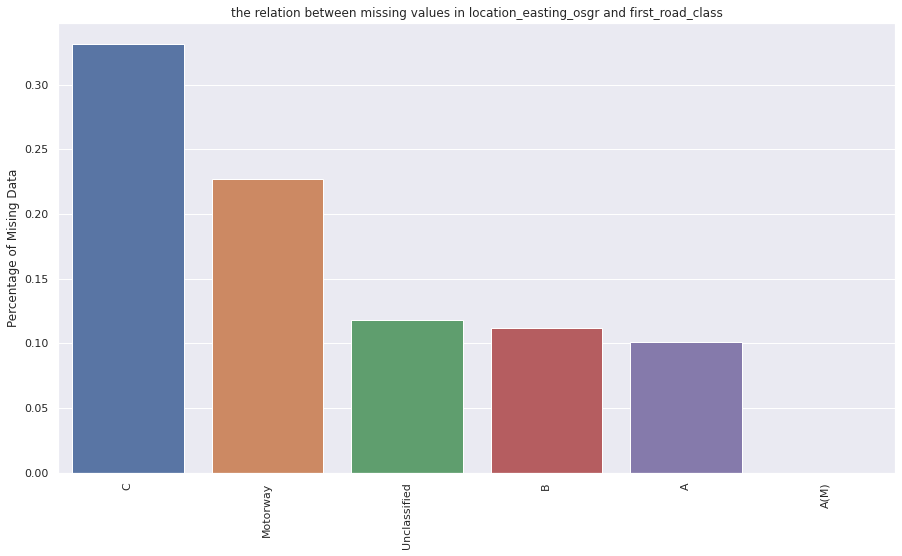

------------------------------------------------------------------------------------------
first_road_number
3222.0    50.000000
3190.0    33.333333
3153.0    28.571429
3114.0    25.000000
3141.0    20.000000
            ...    
3359.0     0.000000
336.0      0.000000
3362.0     0.000000
3363.0     0.000000
4418.0     0.000000
Name: location_easting_osgr, Length: 3445, dtype: float64


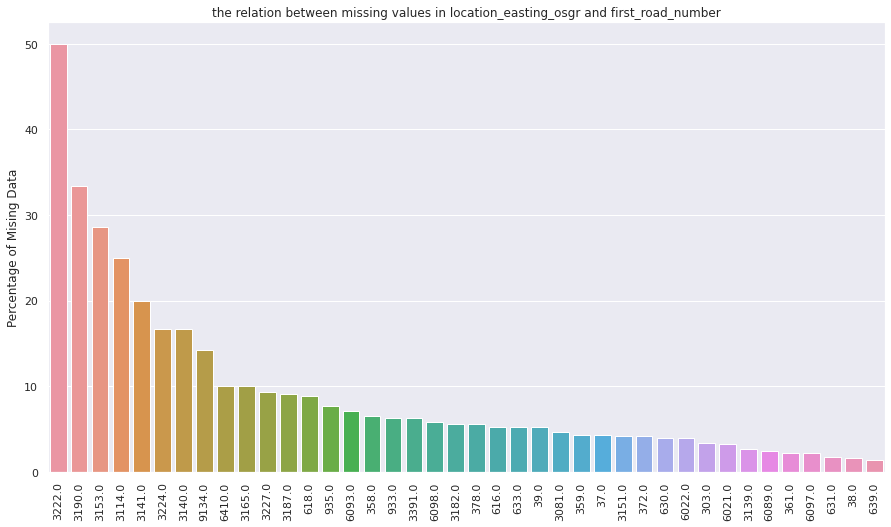

------------------------------------------------------------------------------------------
road_type
Data missing or out of range    82.608696
Single carriageway               0.127842
Roundabout                       0.126789
Dual carriageway                 0.091135
One way street/Slip road         0.058233
Name: location_easting_osgr, dtype: float64


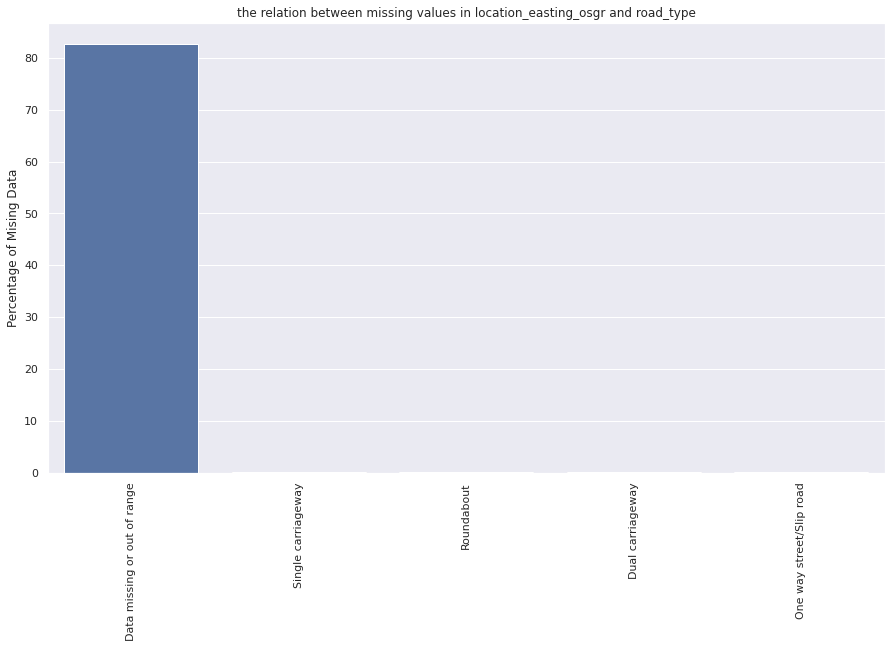

------------------------------------------------------------------------------------------
speed_limit
0.0     74.242424
70.0     0.142965
60.0     0.136141
30.0     0.073742
40.0     0.072976
41.0     0.000000
69.0     0.000000
66.0     0.000000
65.0     0.000000
63.0     0.000000
62.0     0.000000
61.0     0.000000
50.0     0.000000
45.0     0.000000
10.0     0.000000
12.0     0.000000
5.0      0.000000
36.0     0.000000
34.0     0.000000
33.0     0.000000
32.0     0.000000
25.0     0.000000
20.0     0.000000
15.0     0.000000
39.0     0.000000
Name: location_easting_osgr, dtype: float64


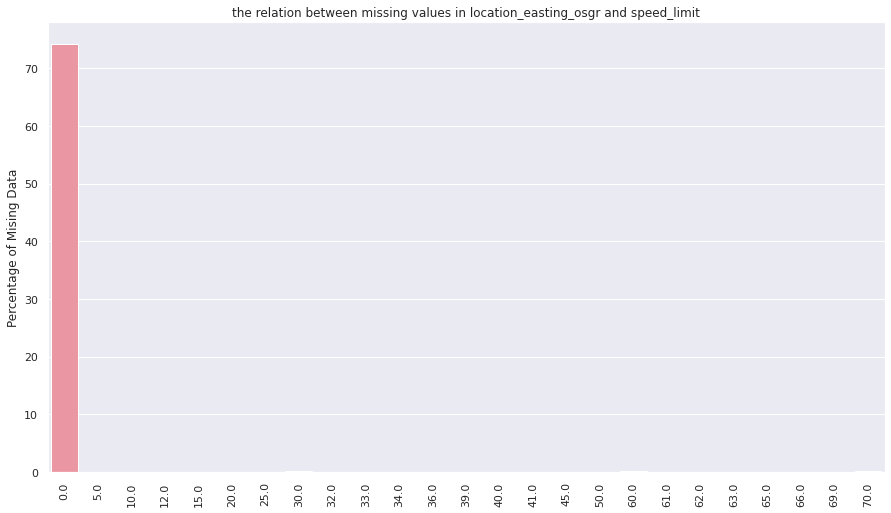

------------------------------------------------------------------------------------------
junction_detail
Private drive or entrance              0.249736
Not at junction or within 20 metres    0.170248
Roundabout                             0.146221
T or staggered junction                0.100261
Slip road                              0.075245
Mini-roundabout                        0.074460
Crossroads                             0.071844
More than 4 arms (not roundabout)      0.062247
Other junction                         0.020076
Data missing or out of range           0.000000
Name: location_easting_osgr, dtype: float64


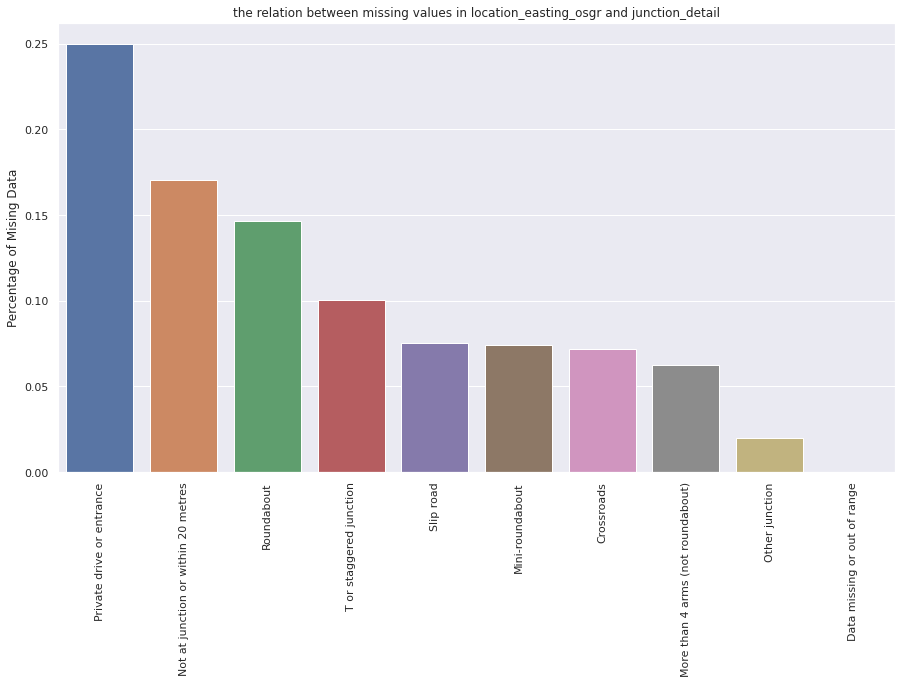

------------------------------------------------------------------------------------------
junction_control
Data missing or out of range    0.297081
Stop sign                       0.042123
Give way or uncontrolled        0.027444
Auto traffic signal             0.009956
Authorised person               0.000000
Name: location_easting_osgr, dtype: float64


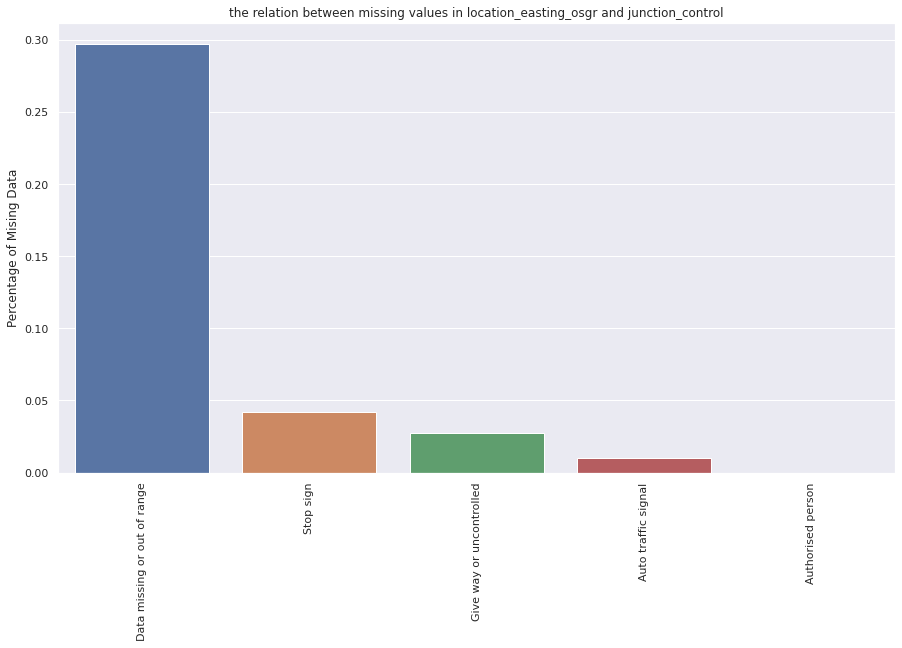

------------------------------------------------------------------------------------------
second_road_class
C               0.282462
-1              0.174660
Unclassified    0.088191
Motorway        0.086281
B               0.082198
A               0.072701
A(M)            0.000000
Name: location_easting_osgr, dtype: float64


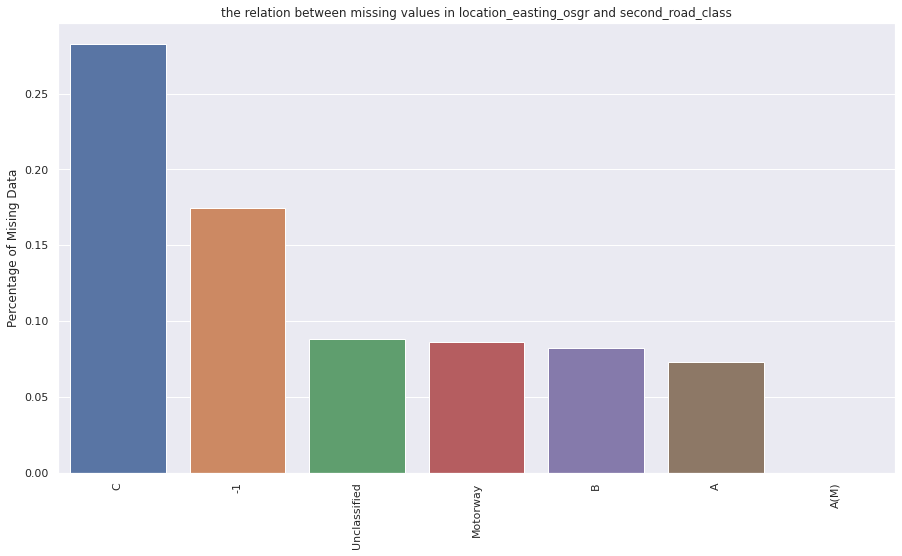

------------------------------------------------------------------------------------------
second_road_number
3151.0    100.000000
6195.0     66.666667
3114.0     50.000000
6086.0     20.000000
6060.0     20.000000
             ...    
3252.0      0.000000
3254.0      0.000000
3257.0      0.000000
326.0       0.000000
4364.0      0.000000
Name: location_easting_osgr, Length: 2795, dtype: float64


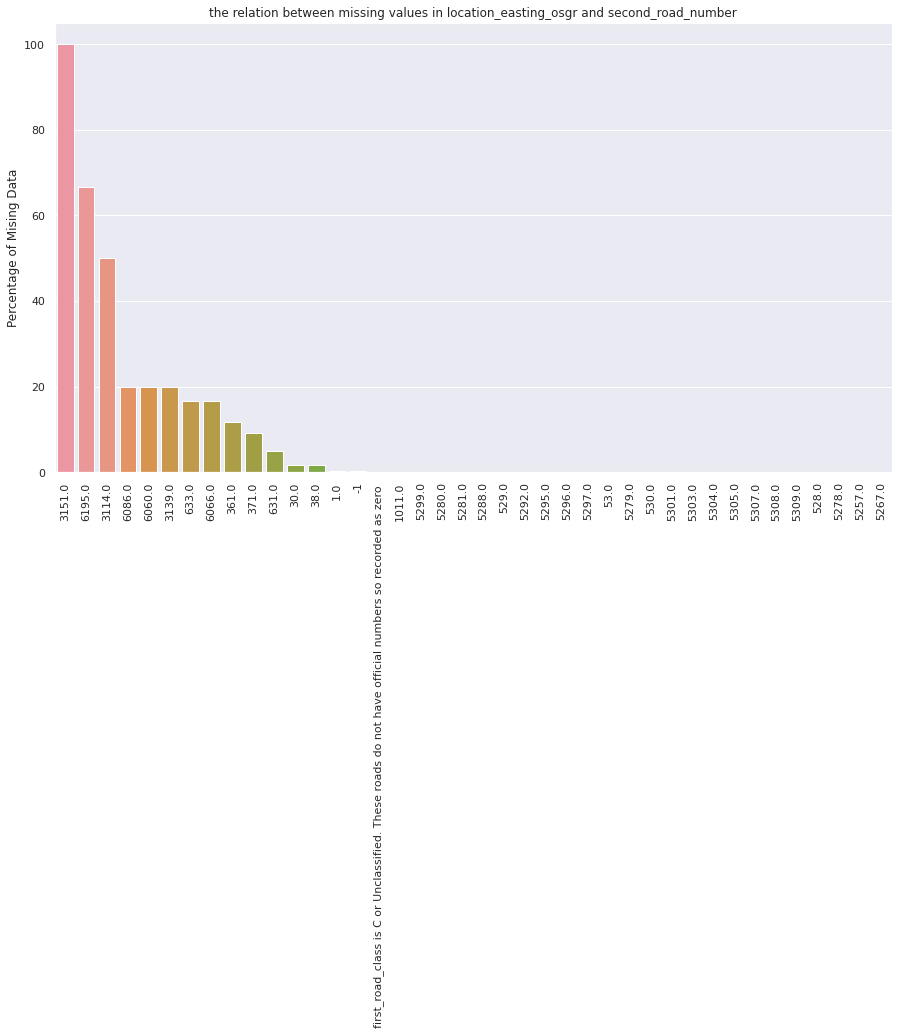

------------------------------------------------------------------------------------------
pedestrian_crossing_human_control
Data missing or out of range          82.899628
None within 50 metres                  0.034922
Control by other authorised person     0.000000
Control by school crossing patrol      0.000000
Name: location_easting_osgr, dtype: float64


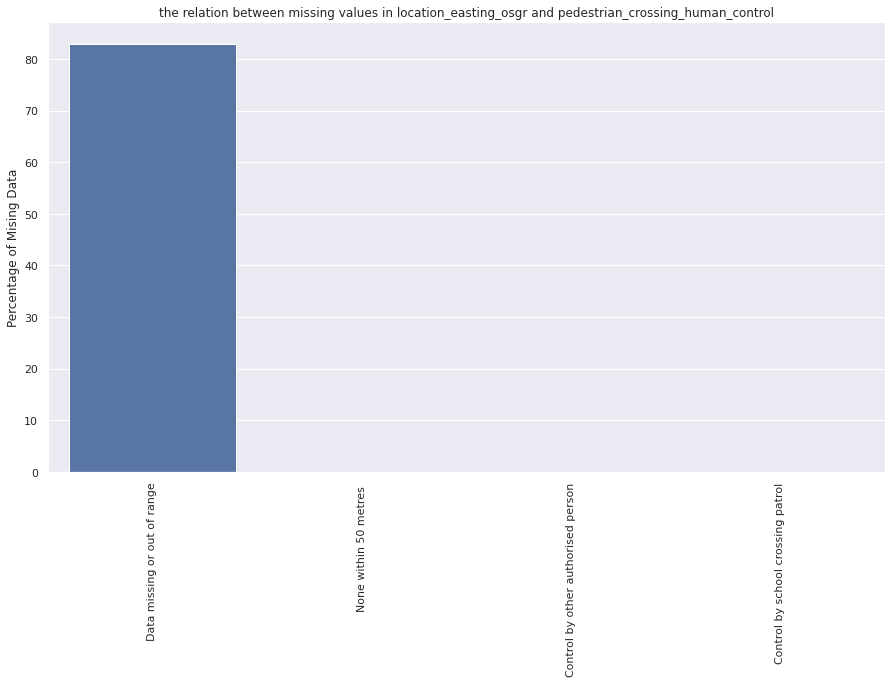

------------------------------------------------------------------------------------------
pedestrian_crossing_physical_facilities
Data missing or out of range                                                 82.899628
No physical crossing facilities within 50 metres                              0.038880
Central refuge                                                                0.035039
Pelican, puffin, toucan or similar non-junction pedestrian light crossing     0.017126
Footbridge or subway                                                          0.000000
Pedestrian phase at traffic signal junction                                   0.000000
Zebra                                                                         0.000000
Name: location_easting_osgr, dtype: float64


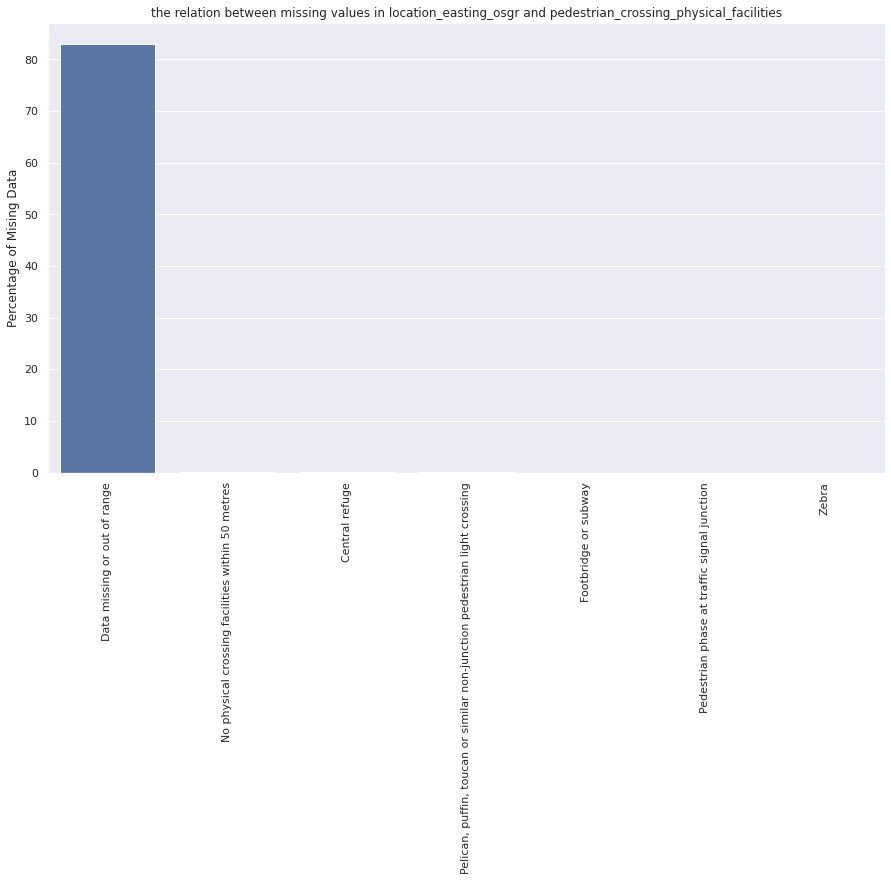

------------------------------------------------------------------------------------------
light_conditions
Data missing or out of range    95.762712
Darkness - lights unlit          0.144509
Darkness - no lighting           0.063072
Darkness - lights lit            0.038573
Daylight                         0.029905
Darkness - lighting unknown      0.000000
Name: location_easting_osgr, dtype: float64


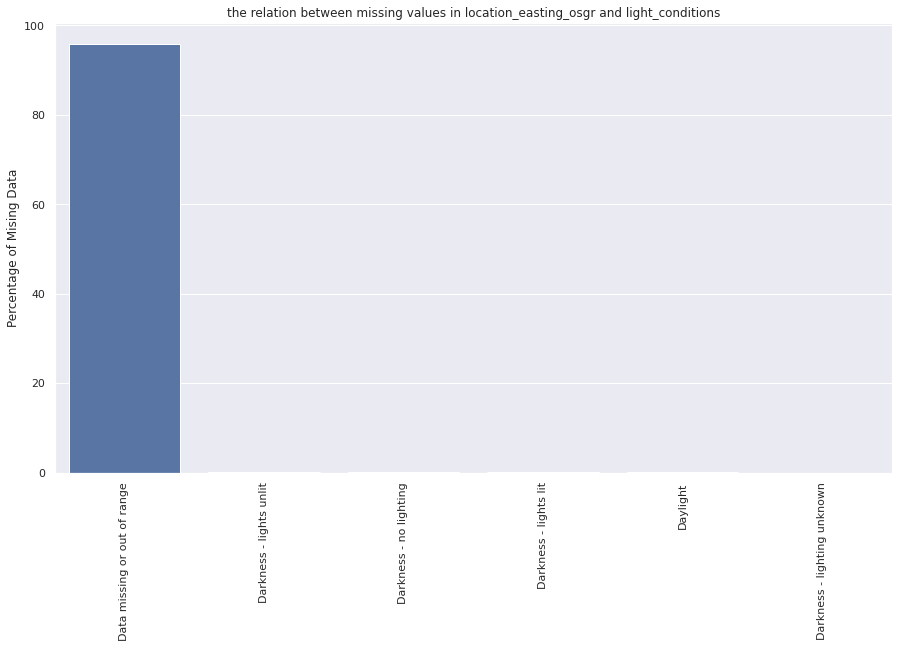

------------------------------------------------------------------------------------------
weather_conditions
Data missing or out of range    98.253275
Fog or mist                      0.152858
Raining + high winds             0.105042
Fine + high winds                0.083218
Fine no high winds               0.033050
Other                            0.021872
Raining no high winds            0.016144
Snowing + high winds             0.000000
Snowing no high winds            0.000000
Name: location_easting_osgr, dtype: float64


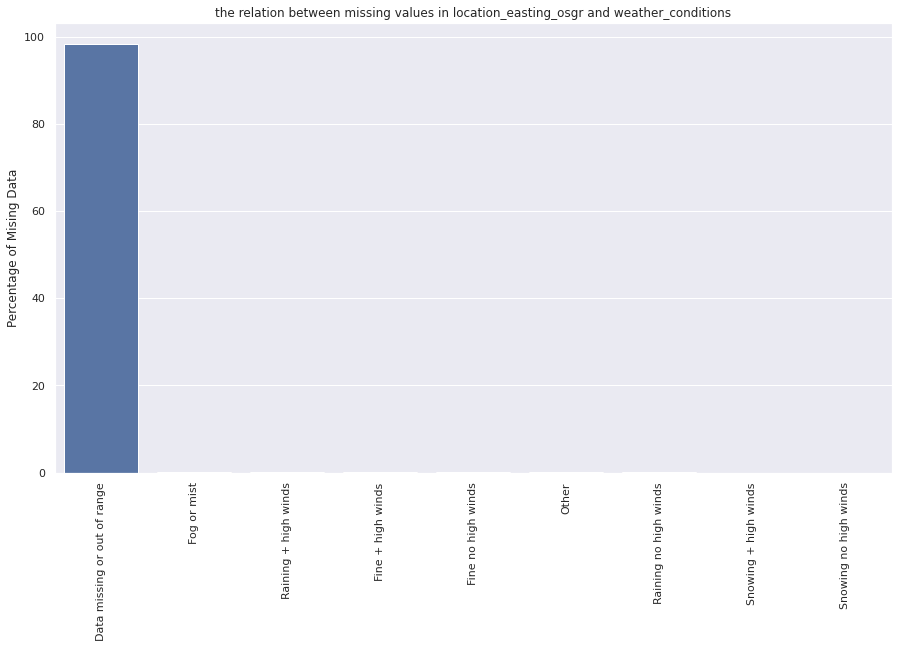

------------------------------------------------------------------------------------------
road_surface_conditions
Data missing or out of range    54.878049
Flood over 3cm. deep             0.246914
Frost or ice                     0.122800
Wet or damp                      0.034531
Dry                              0.030032
Snow                             0.000000
Name: location_easting_osgr, dtype: float64


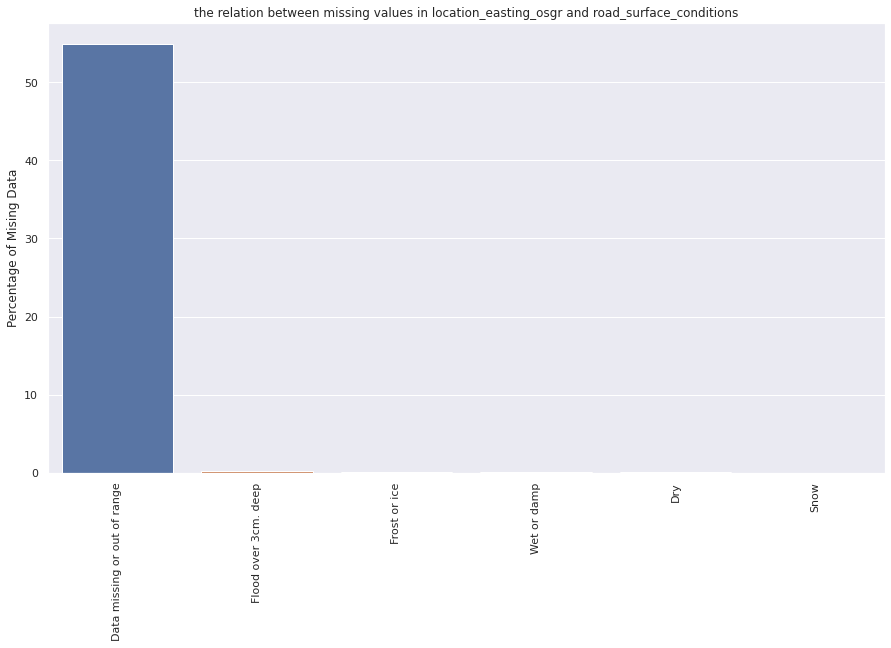

------------------------------------------------------------------------------------------
special_conditions_at_site
Data missing or out of range                  85.114504
None                                           0.035694
Auto signal part defective                     0.000000
Auto traffic signal - out                      0.000000
Road sign or marking defective or obscured     0.000000
Road surface defective                         0.000000
Roadworks                                      0.000000
Name: location_easting_osgr, dtype: float64


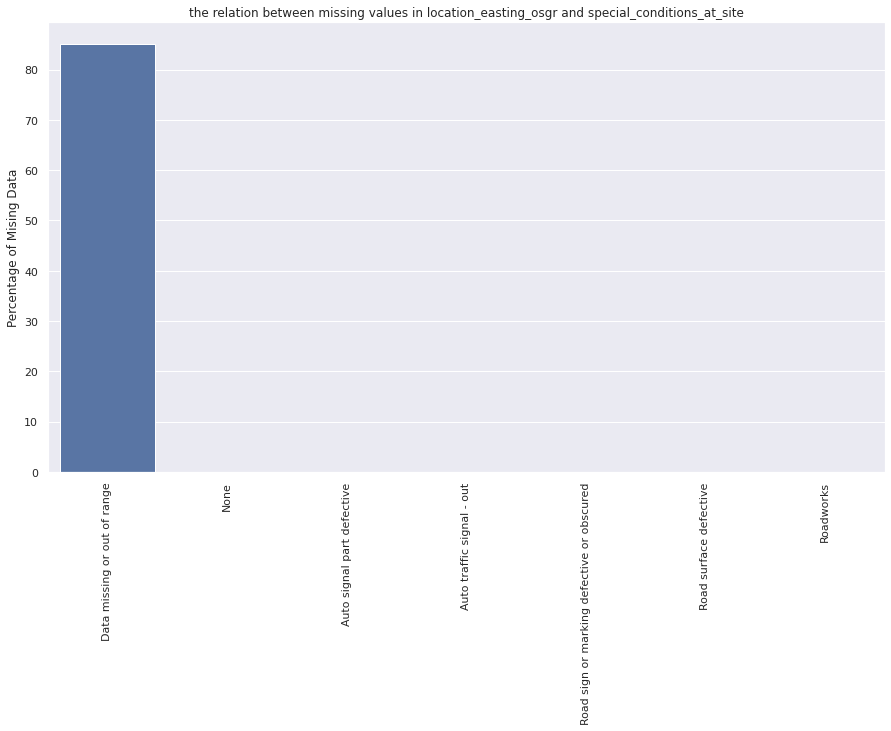

------------------------------------------------------------------------------------------
carriageway_hazards
Data missing or out of range    92.916667
Other animal on road             0.076453
None                             0.035384
Dog on road                      0.000000
Other object on road             0.000000
Previous accident                0.000000
Vehicle load on road             0.000000
Name: location_easting_osgr, dtype: float64


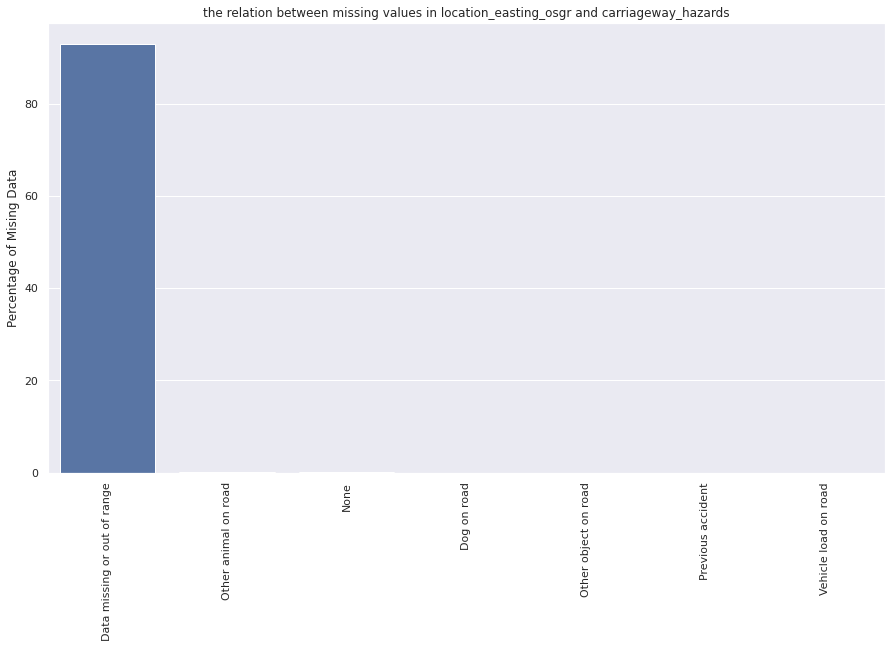

------------------------------------------------------------------------------------------
Current Feature is location_northing_osgr 

location_easting_osgr
6700.0      0.0
508400.0    0.0
508340.0    0.0
508350.0    0.0
508360.0    0.0
           ... 
387740.0    0.0
387730.0    0.0
387720.0    0.0
387710.0    0.0
942600.0    0.0
Name: location_northing_osgr, Length: 35072, dtype: float64


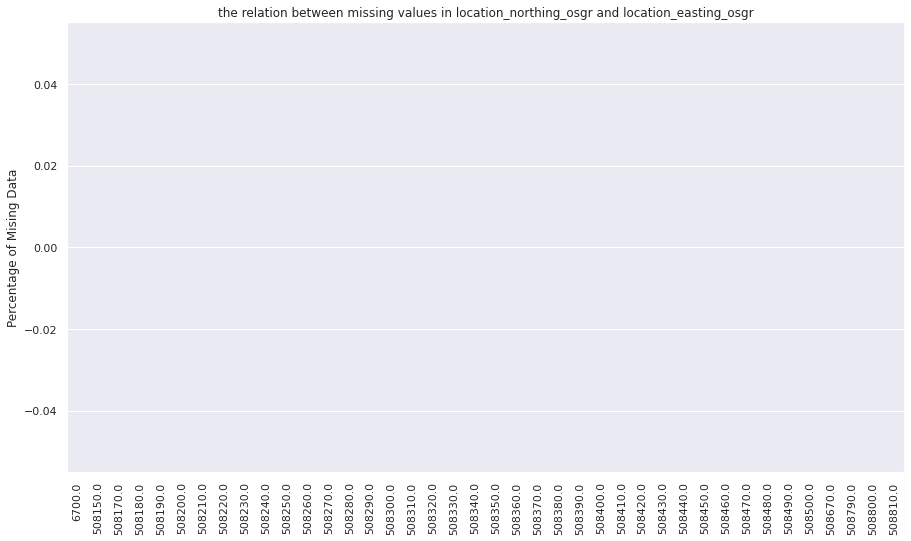

------------------------------------------------------------------------------------------
police_force
Avon and Somerset        5.216374
South Yorkshire          1.429544
Tayside                  0.650759
Devon and Cornwall       0.128205
Dyfed-Powys              0.055279
Humberside               0.025826
Warwickshire             0.000000
Thames Valley            0.000000
Metropolitan Police      0.000000
Norfolk                  0.000000
North Wales              0.000000
North Yorkshire          0.000000
Northamptonshire         0.000000
Northern                 0.000000
Northumbria              0.000000
Nottinghamshire          0.000000
South Wales              0.000000
West Yorkshire           0.000000
Staffordshire            0.000000
Lothian and Borders      0.000000
Strathclyde              0.000000
Suffolk                  0.000000
Surrey                   0.000000
West Midlands            0.000000
Sussex                   0.000000
West Mercia              0.000000
Merseyside  

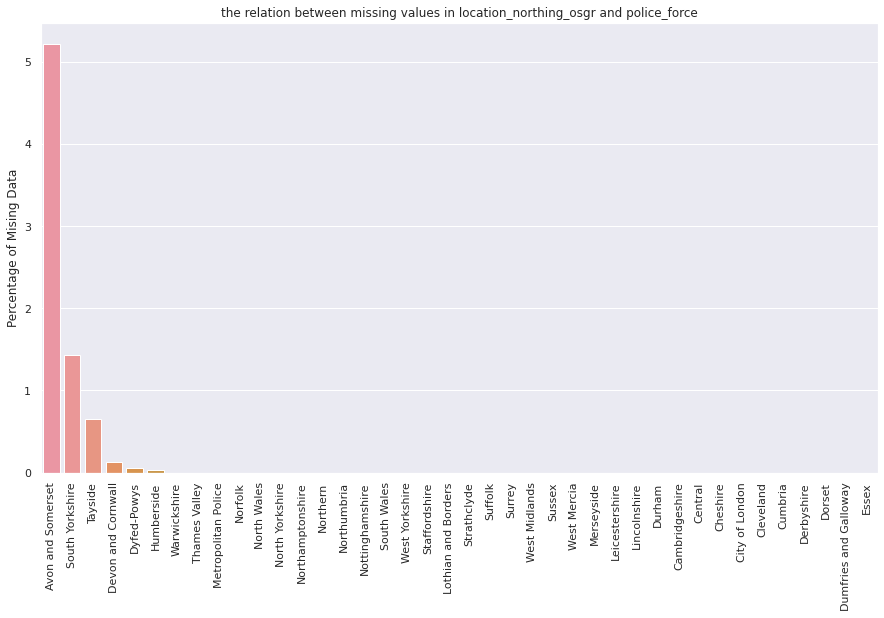

------------------------------------------------------------------------------------------
accident_severity
Slight     0.136348
Serious    0.110859
Fatal      0.051881
Name: location_northing_osgr, dtype: float64


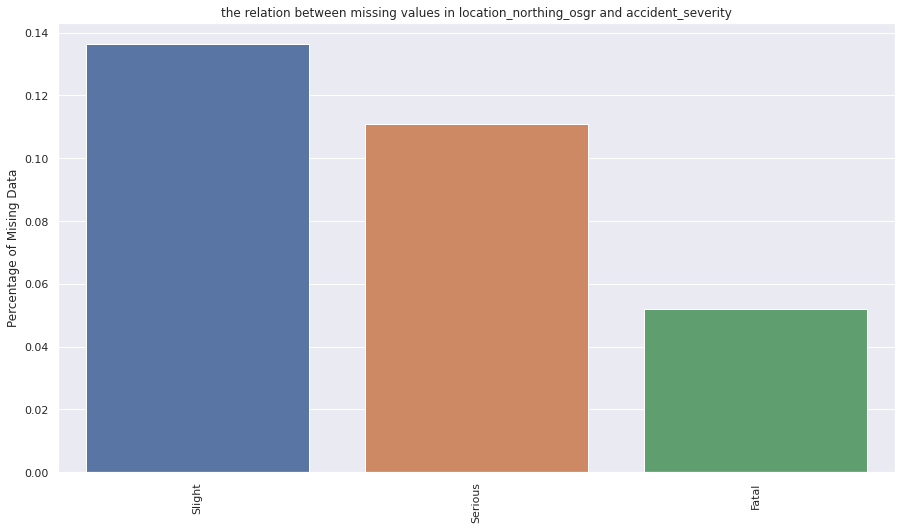

------------------------------------------------------------------------------------------
number_of_vehicles
5      0.244200
3      0.144493
2      0.143665
1      0.110233
4      0.027586
16     0.000000
75     0.000000
73     0.000000
53     0.000000
39     0.000000
38     0.000000
21     0.000000
20     0.000000
18     0.000000
13     0.000000
15     0.000000
14     0.000000
12     0.000000
11     0.000000
10     0.000000
9      0.000000
8      0.000000
7      0.000000
6      0.000000
192    0.000000
Name: location_northing_osgr, dtype: float64


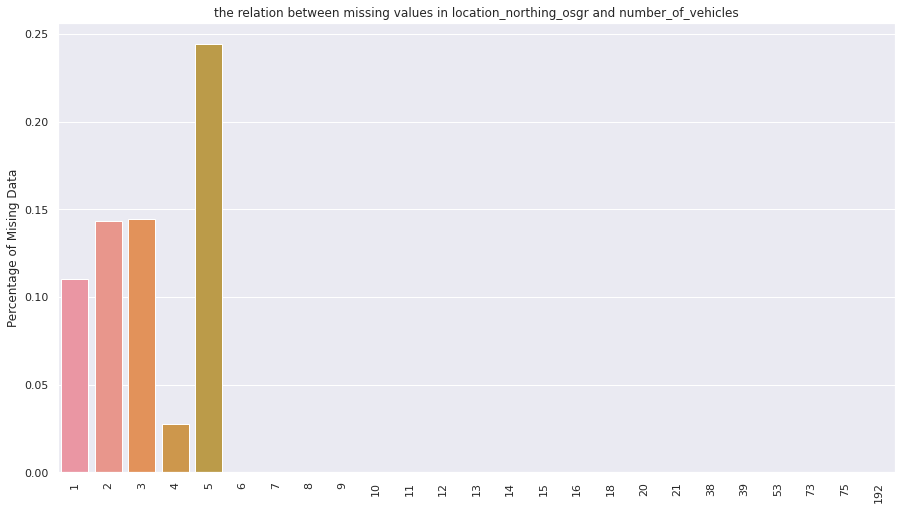

------------------------------------------------------------------------------------------
number_of_casualties
11    4.761905
6     0.178891
5     0.142755
2     0.135147
1     0.132609
3     0.083316
4     0.078968
27    0.000000
21    0.000000
22    0.000000
26    0.000000
29    0.000000
28    0.000000
19    0.000000
30    0.000000
34    0.000000
40    0.000000
20    0.000000
16    0.000000
18    0.000000
17    0.000000
15    0.000000
14    0.000000
13    0.000000
12    0.000000
10    0.000000
9     0.000000
8     0.000000
7     0.000000
42    0.000000
Name: location_northing_osgr, dtype: float64


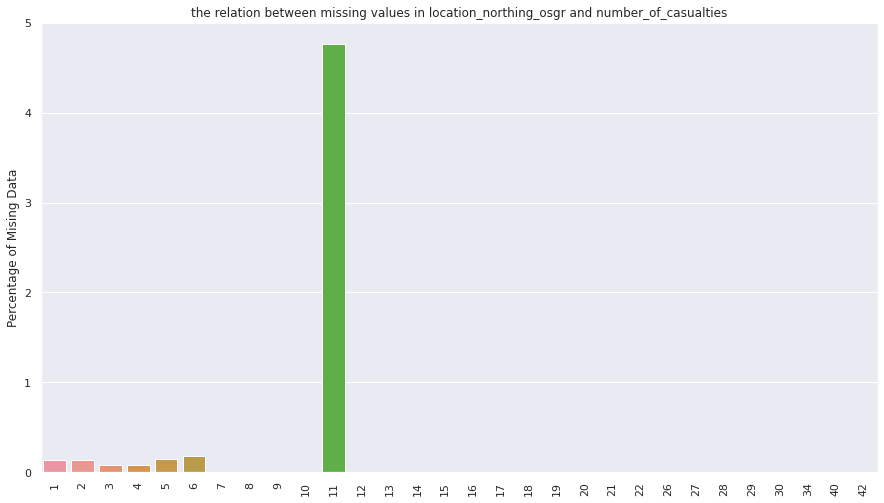

------------------------------------------------------------------------------------------
date
31/07/1992    0.872093
10/11/1992    0.852273
09/10/1992    0.846262
13/11/1992    0.809249
30/09/1992    0.781250
                ...   
15/02/1992    0.000000
15/03/1992    0.000000
15/04/1992    0.000000
15/05/1992    0.000000
31/12/1992    0.000000
Name: location_northing_osgr, Length: 366, dtype: float64


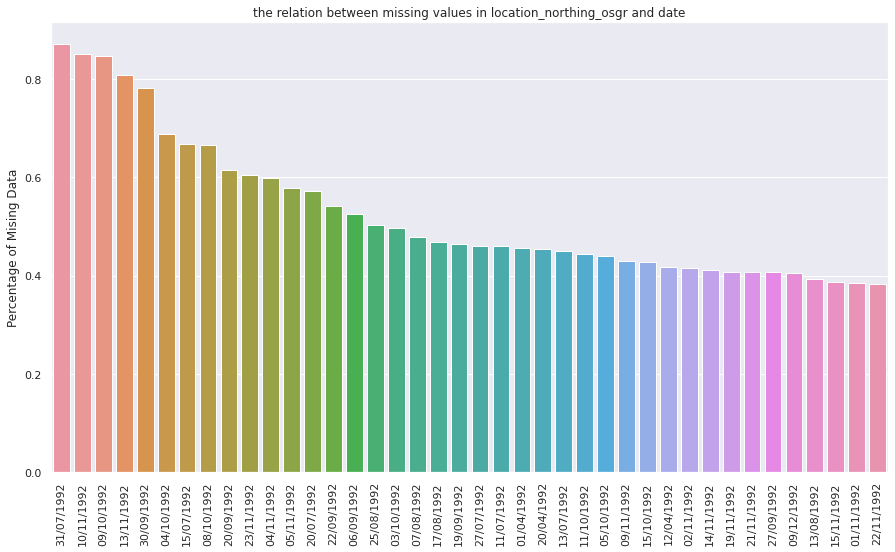

------------------------------------------------------------------------------------------
day_of_week
Monday       0.159802
Friday       0.140647
Wednesday    0.140227
Sunday       0.126335
Saturday     0.124069
Thursday     0.117314
Tuesday      0.101573
Name: location_northing_osgr, dtype: float64


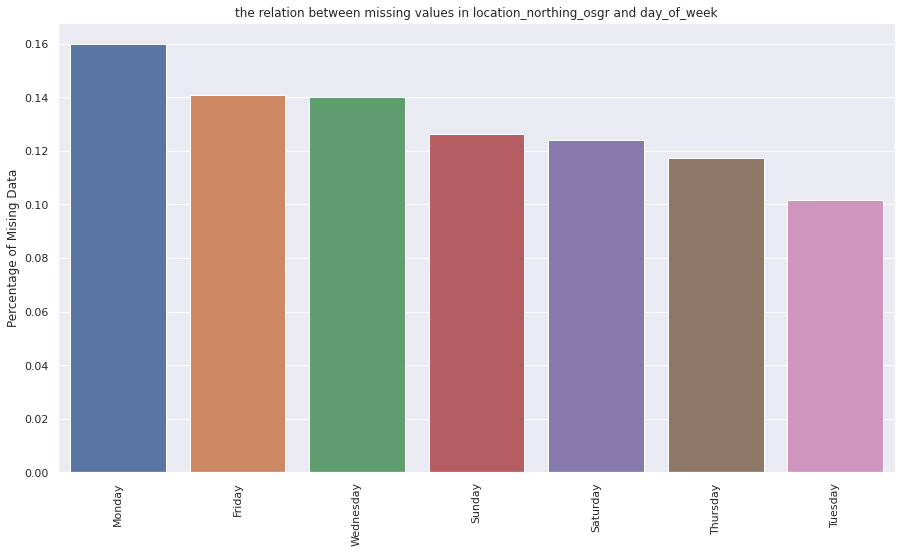

------------------------------------------------------------------------------------------
time
07:31    11.111111
00:47     7.142857
10:41     6.250000
13:21     4.545455
16:21     4.166667
           ...    
08:05     0.000000
08:04     0.000000
08:03     0.000000
08:02     0.000000
23:59     0.000000
Name: location_northing_osgr, Length: 1434, dtype: float64


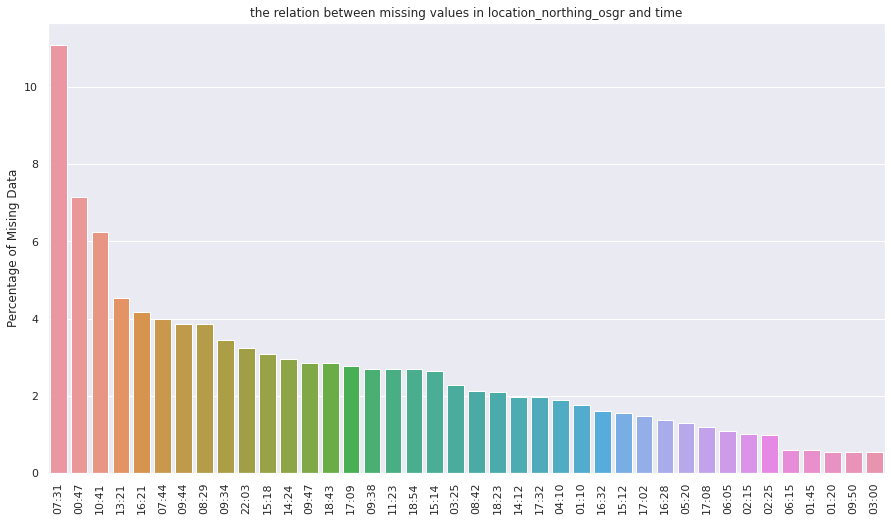

------------------------------------------------------------------------------------------
local_authority_district
Taunton Deane       18.498660
Sedgemoor           13.927577
Mendip              11.926606
South Somerset      11.297071
West Somerset       10.091743
                      ...    
Broadland            0.000000
Bristol, City of     0.000000
Bridgnorth           0.000000
Brentwood            0.000000
York                 0.000000
Name: location_northing_osgr, Length: 460, dtype: float64


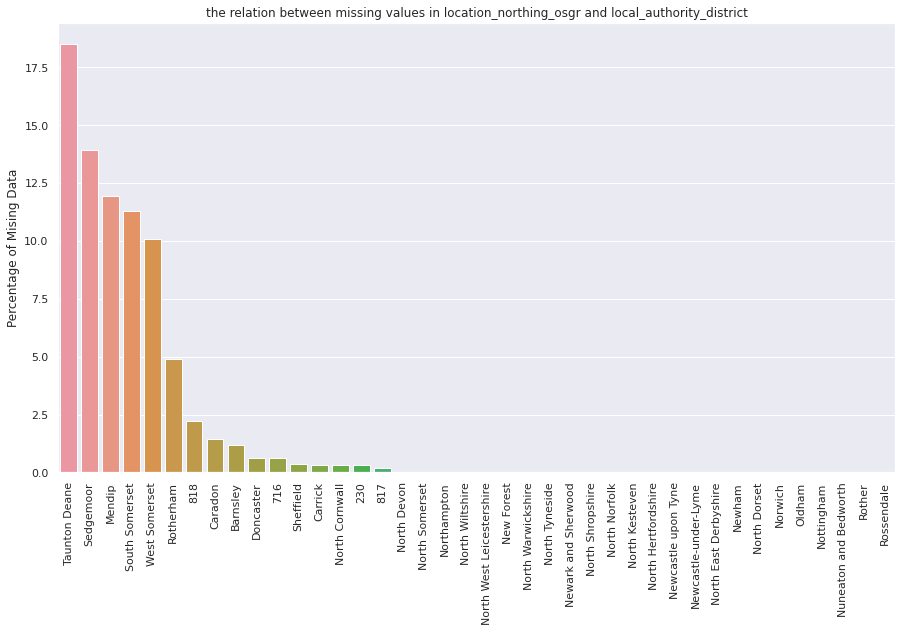

------------------------------------------------------------------------------------------
first_road_class
C               0.331061
Motorway        0.227162
Unclassified    0.117738
B               0.111664
A               0.100656
A(M)            0.000000
Name: location_northing_osgr, dtype: float64


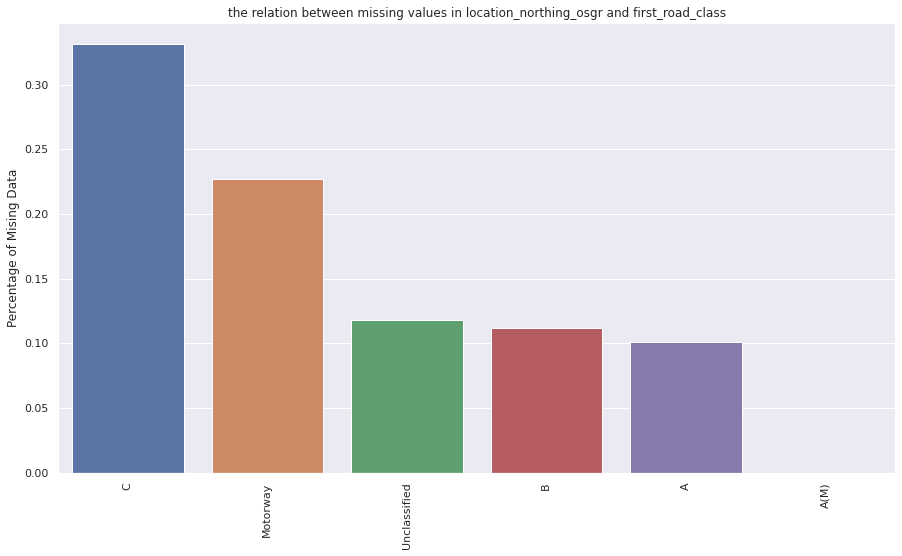

------------------------------------------------------------------------------------------
first_road_number
3222.0    50.000000
3190.0    33.333333
3153.0    28.571429
3114.0    25.000000
3141.0    20.000000
            ...    
3359.0     0.000000
336.0      0.000000
3362.0     0.000000
3363.0     0.000000
4418.0     0.000000
Name: location_northing_osgr, Length: 3445, dtype: float64


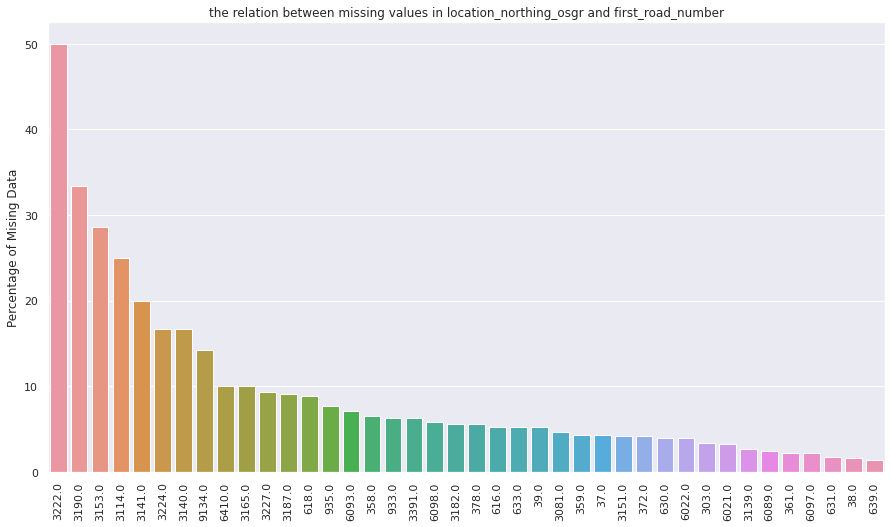

------------------------------------------------------------------------------------------
road_type
Data missing or out of range    82.608696
Single carriageway               0.127842
Roundabout                       0.126789
Dual carriageway                 0.091135
One way street/Slip road         0.058233
Name: location_northing_osgr, dtype: float64


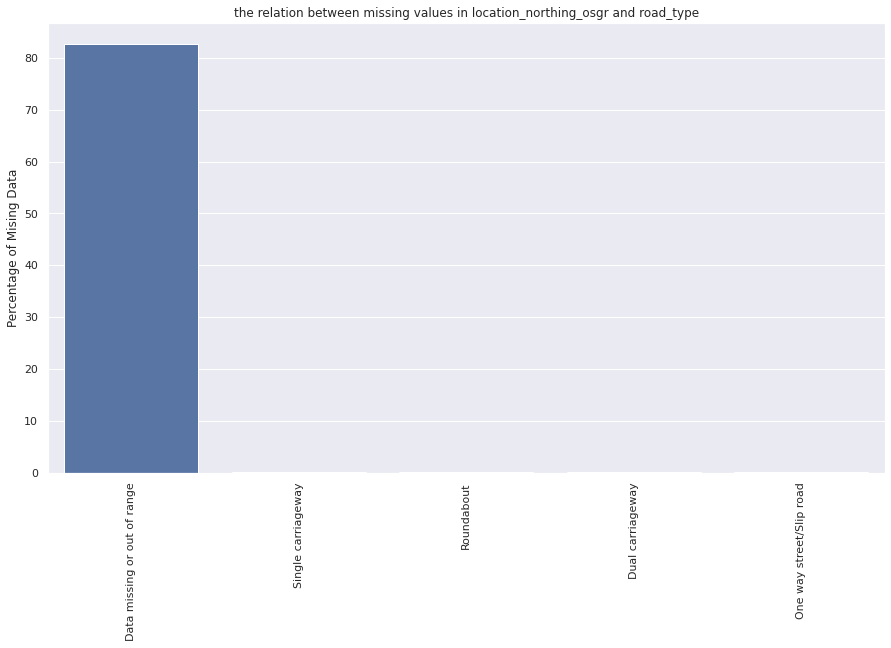

------------------------------------------------------------------------------------------
speed_limit
0.0     74.242424
70.0     0.142965
60.0     0.136141
30.0     0.073742
40.0     0.072976
41.0     0.000000
69.0     0.000000
66.0     0.000000
65.0     0.000000
63.0     0.000000
62.0     0.000000
61.0     0.000000
50.0     0.000000
45.0     0.000000
10.0     0.000000
12.0     0.000000
5.0      0.000000
36.0     0.000000
34.0     0.000000
33.0     0.000000
32.0     0.000000
25.0     0.000000
20.0     0.000000
15.0     0.000000
39.0     0.000000
Name: location_northing_osgr, dtype: float64


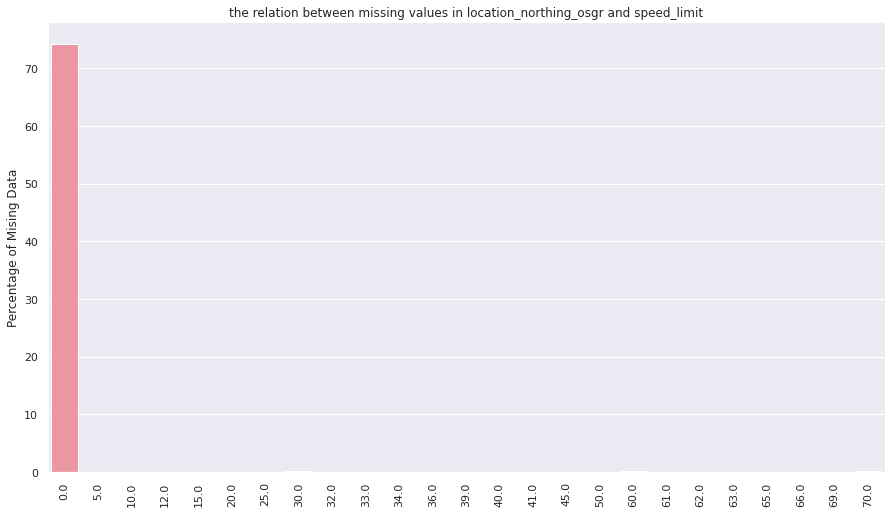

------------------------------------------------------------------------------------------
junction_detail
Private drive or entrance              0.249736
Not at junction or within 20 metres    0.170248
Roundabout                             0.146221
T or staggered junction                0.100261
Slip road                              0.075245
Mini-roundabout                        0.074460
Crossroads                             0.071844
More than 4 arms (not roundabout)      0.062247
Other junction                         0.020076
Data missing or out of range           0.000000
Name: location_northing_osgr, dtype: float64


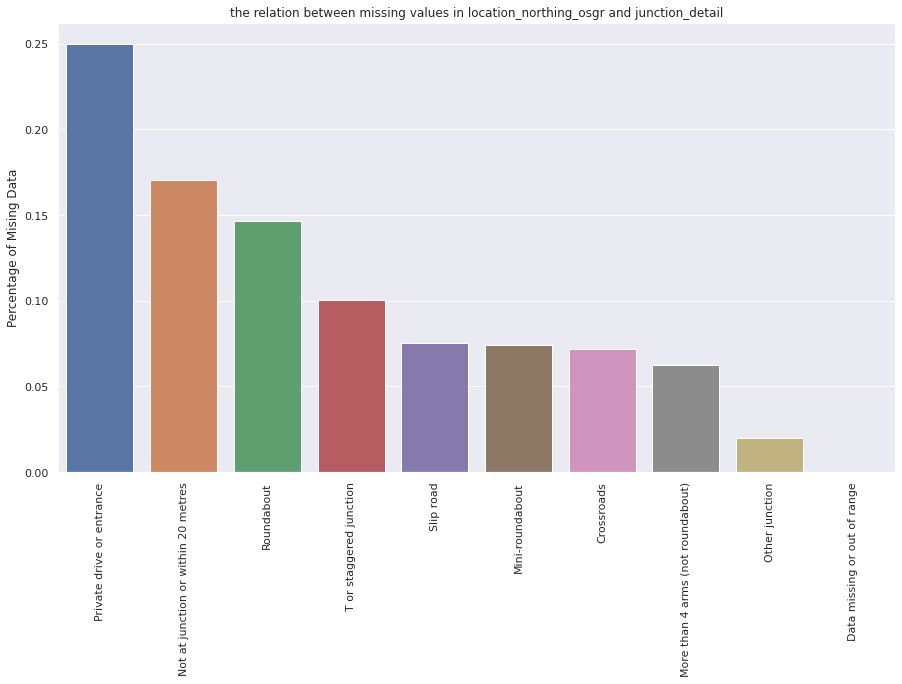

------------------------------------------------------------------------------------------
junction_control
Data missing or out of range    0.297081
Stop sign                       0.042123
Give way or uncontrolled        0.027444
Auto traffic signal             0.009956
Authorised person               0.000000
Name: location_northing_osgr, dtype: float64


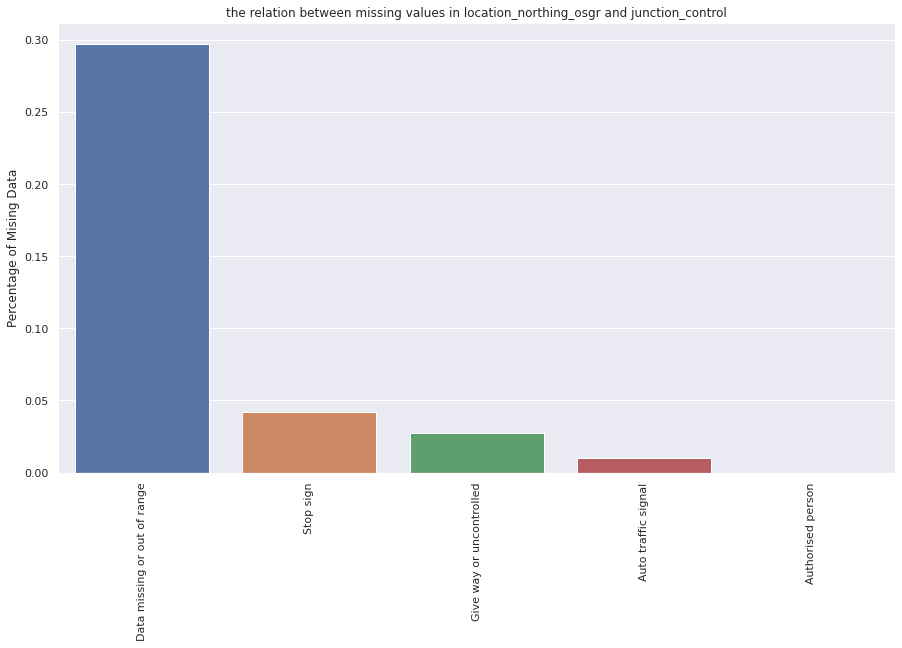

------------------------------------------------------------------------------------------
second_road_class
C               0.282462
-1              0.174660
Unclassified    0.088191
Motorway        0.086281
B               0.082198
A               0.072701
A(M)            0.000000
Name: location_northing_osgr, dtype: float64


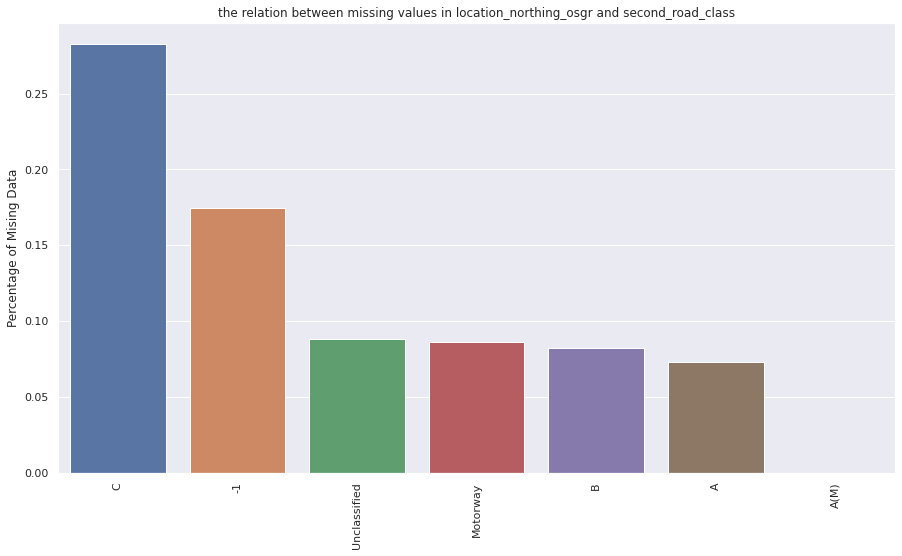

------------------------------------------------------------------------------------------
second_road_number
3151.0    100.000000
6195.0     66.666667
3114.0     50.000000
6086.0     20.000000
6060.0     20.000000
             ...    
3252.0      0.000000
3254.0      0.000000
3257.0      0.000000
326.0       0.000000
4364.0      0.000000
Name: location_northing_osgr, Length: 2795, dtype: float64


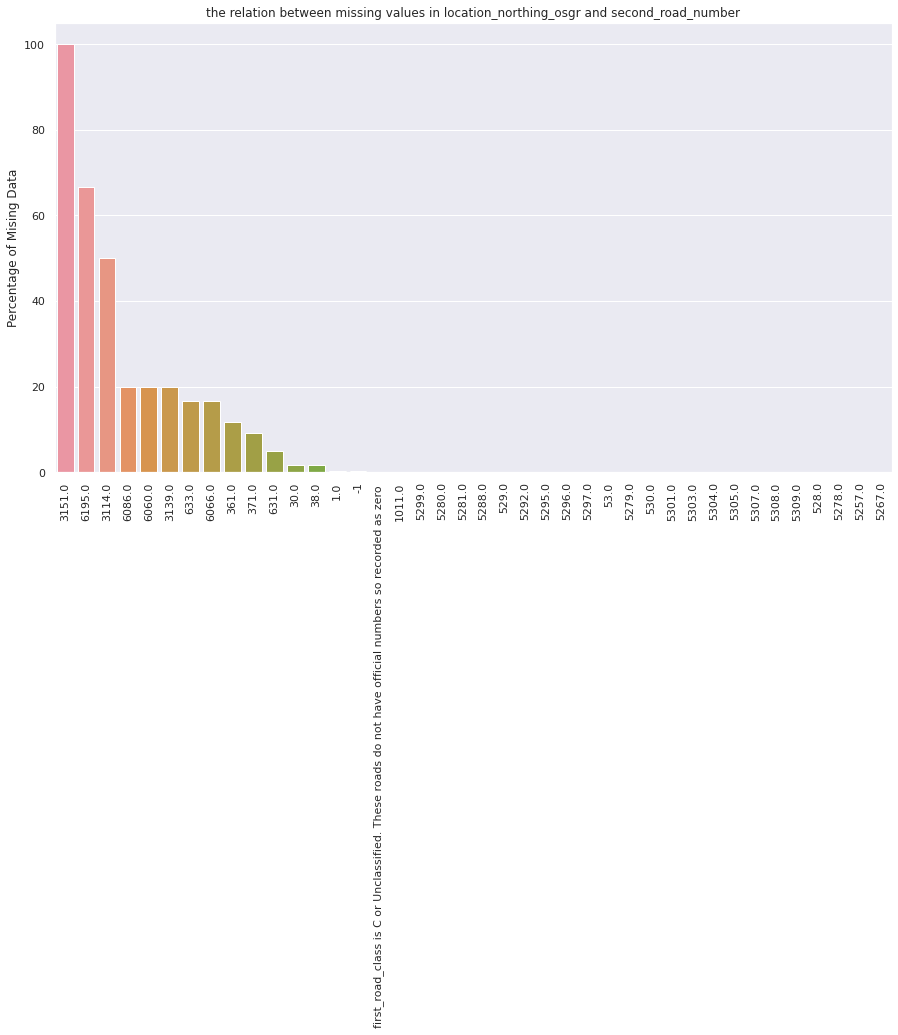

------------------------------------------------------------------------------------------
pedestrian_crossing_human_control
Data missing or out of range          82.899628
None within 50 metres                  0.034922
Control by other authorised person     0.000000
Control by school crossing patrol      0.000000
Name: location_northing_osgr, dtype: float64


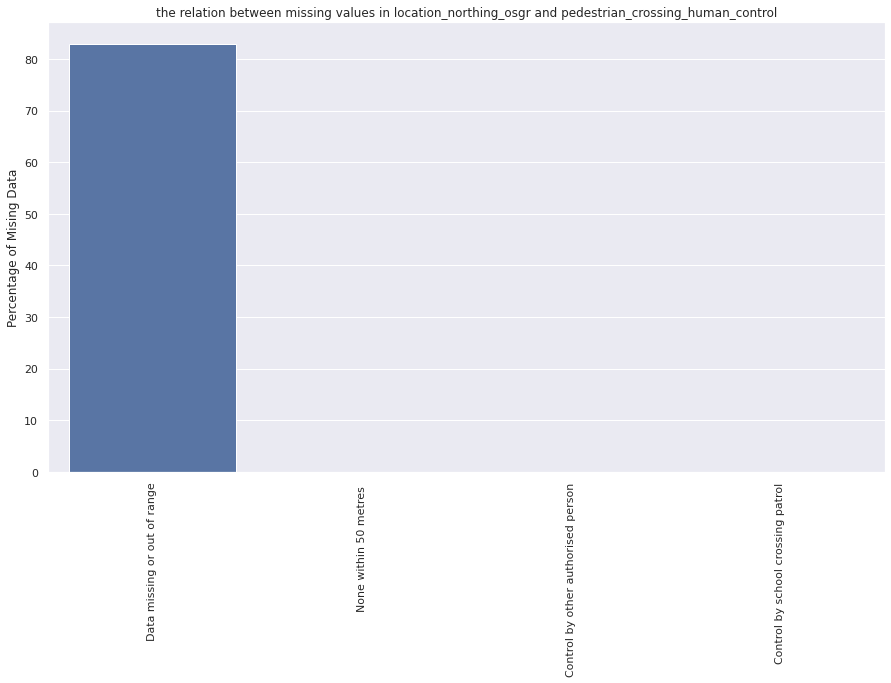

------------------------------------------------------------------------------------------
pedestrian_crossing_physical_facilities
Data missing or out of range                                                 82.899628
No physical crossing facilities within 50 metres                              0.038880
Central refuge                                                                0.035039
Pelican, puffin, toucan or similar non-junction pedestrian light crossing     0.017126
Footbridge or subway                                                          0.000000
Pedestrian phase at traffic signal junction                                   0.000000
Zebra                                                                         0.000000
Name: location_northing_osgr, dtype: float64


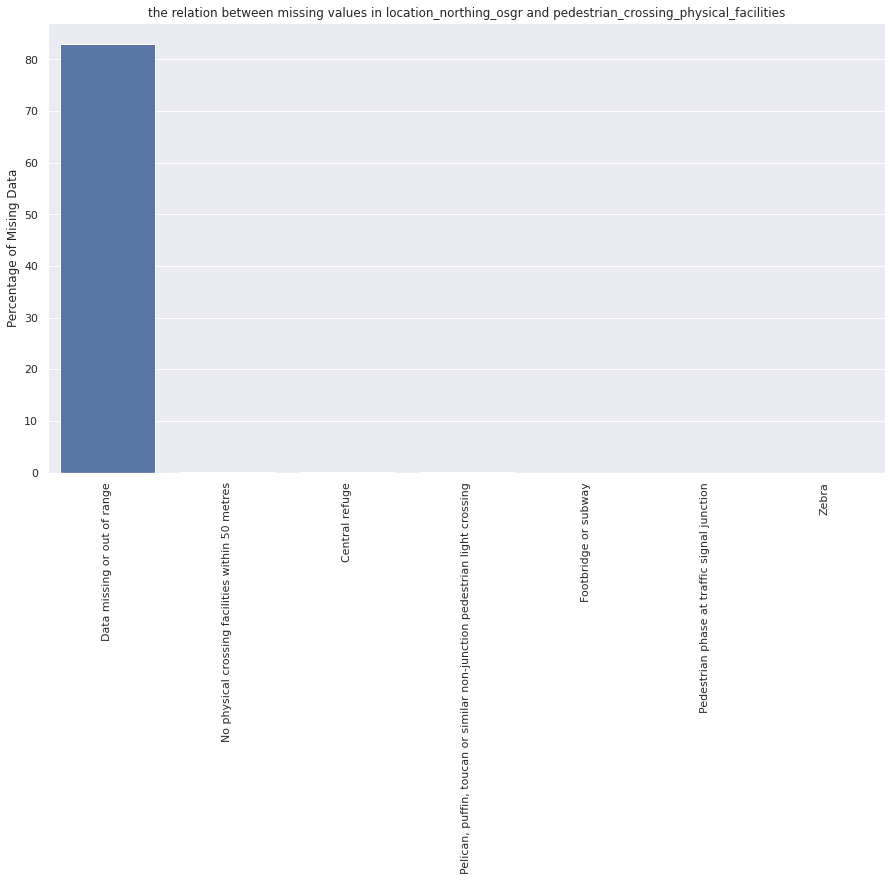

------------------------------------------------------------------------------------------
light_conditions
Data missing or out of range    95.762712
Darkness - lights unlit          0.144509
Darkness - no lighting           0.063072
Darkness - lights lit            0.038573
Daylight                         0.029905
Darkness - lighting unknown      0.000000
Name: location_northing_osgr, dtype: float64


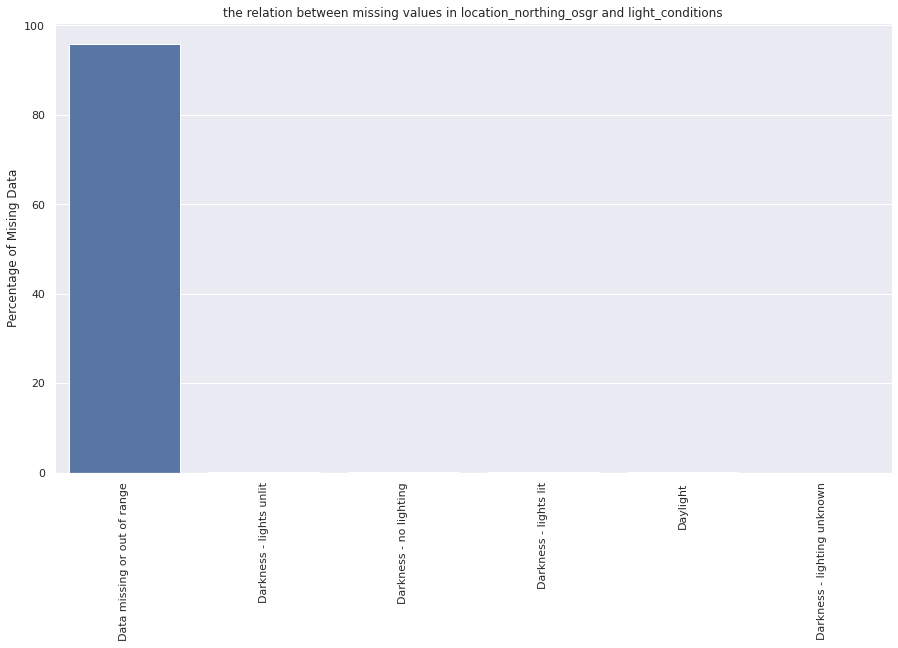

------------------------------------------------------------------------------------------
weather_conditions
Data missing or out of range    98.253275
Fog or mist                      0.152858
Raining + high winds             0.105042
Fine + high winds                0.083218
Fine no high winds               0.033050
Other                            0.021872
Raining no high winds            0.016144
Snowing + high winds             0.000000
Snowing no high winds            0.000000
Name: location_northing_osgr, dtype: float64


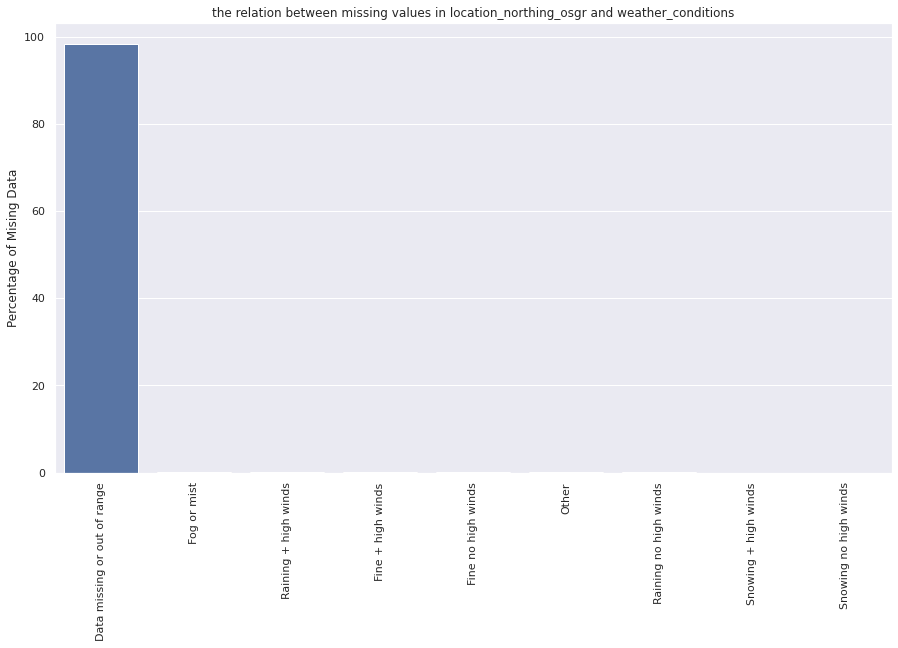

------------------------------------------------------------------------------------------
road_surface_conditions
Data missing or out of range    54.878049
Flood over 3cm. deep             0.246914
Frost or ice                     0.122800
Wet or damp                      0.034531
Dry                              0.030032
Snow                             0.000000
Name: location_northing_osgr, dtype: float64


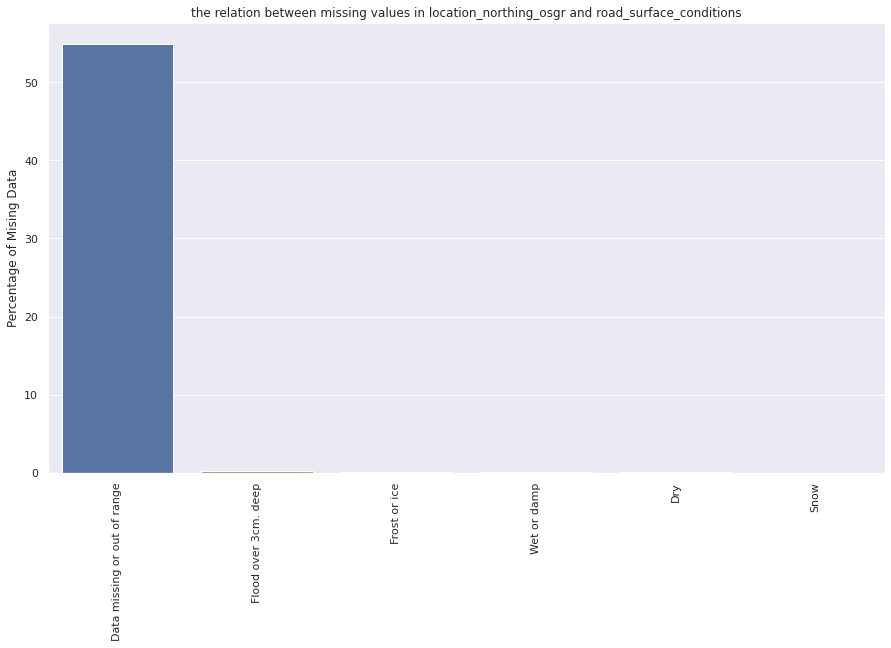

------------------------------------------------------------------------------------------
special_conditions_at_site
Data missing or out of range                  85.114504
None                                           0.035694
Auto signal part defective                     0.000000
Auto traffic signal - out                      0.000000
Road sign or marking defective or obscured     0.000000
Road surface defective                         0.000000
Roadworks                                      0.000000
Name: location_northing_osgr, dtype: float64


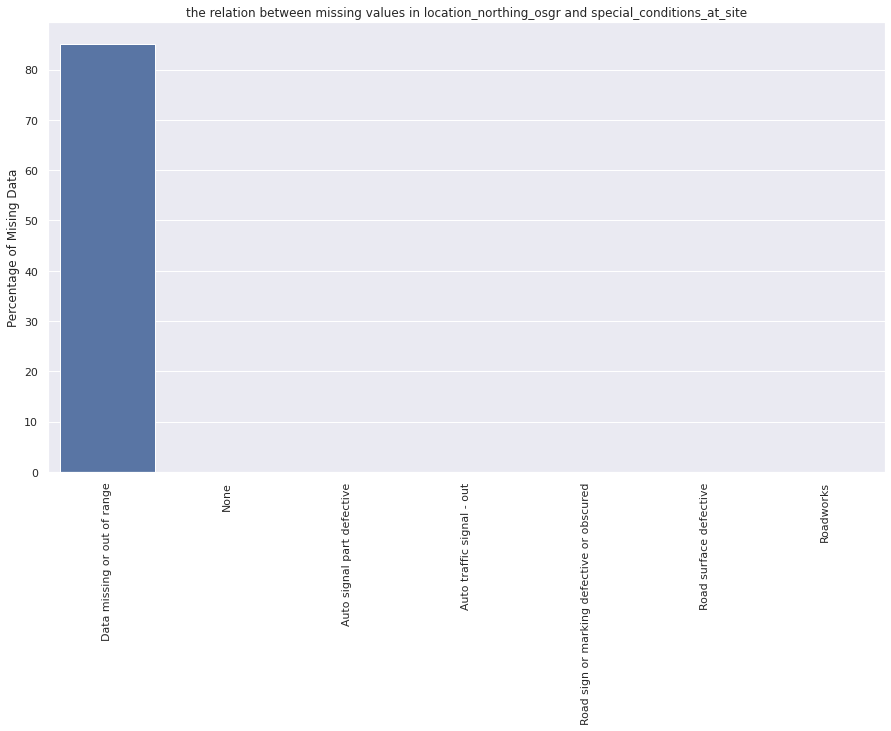

------------------------------------------------------------------------------------------
carriageway_hazards
Data missing or out of range    92.916667
Other animal on road             0.076453
None                             0.035384
Dog on road                      0.000000
Other object on road             0.000000
Previous accident                0.000000
Vehicle load on road             0.000000
Name: location_northing_osgr, dtype: float64


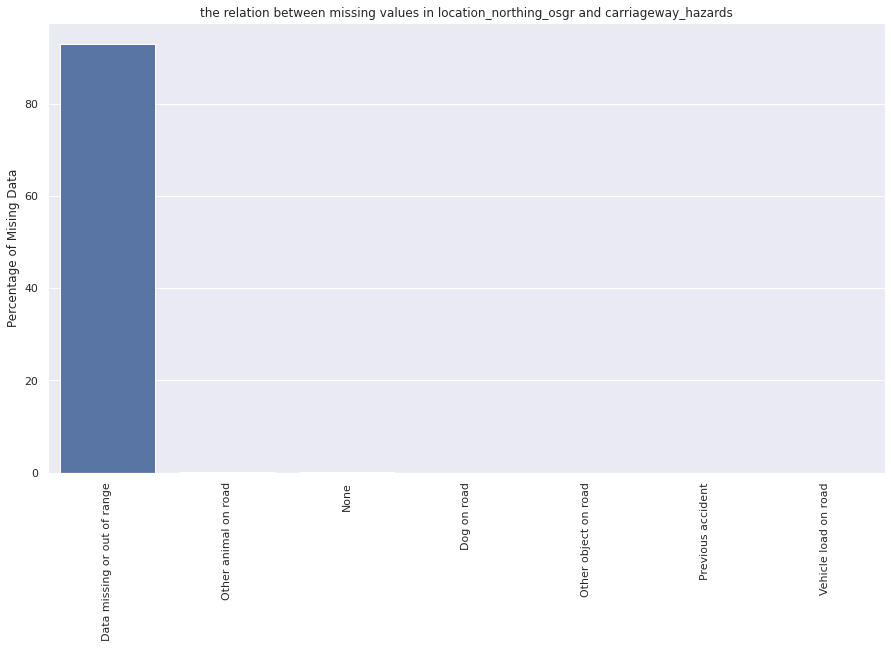

------------------------------------------------------------------------------------------
Current Feature is date 

location_easting_osgr
408660.0    33.333333
401180.0    20.000000
508380.0     0.000000
508330.0     0.000000
508340.0     0.000000
              ...    
387740.0     0.000000
387730.0     0.000000
387720.0     0.000000
387710.0     0.000000
942600.0     0.000000
Name: date, Length: 35072, dtype: float64


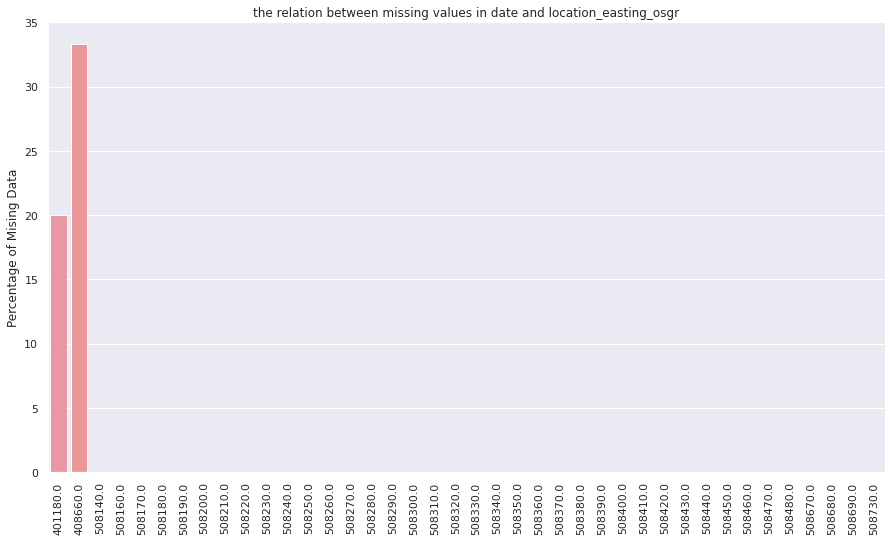

------------------------------------------------------------------------------------------
location_northing_osgr
100130.0    20.000000
93850.0      6.666667
409320.0     0.000000
409240.0     0.000000
409250.0     0.000000
              ...    
228280.0     0.000000
228290.0     0.000000
228300.0     0.000000
228310.0     0.000000
991700.0     0.000000
Name: date, Length: 45286, dtype: float64


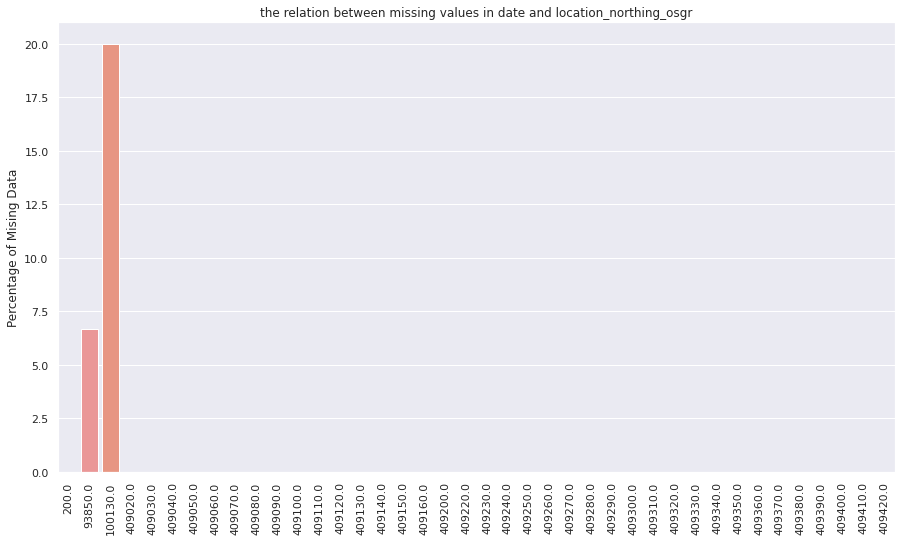

------------------------------------------------------------------------------------------
police_force
Dorset                   0.082406
Avon and Somerset        0.000000
South Yorkshire          0.000000
Merseyside               0.000000
Metropolitan Police      0.000000
Norfolk                  0.000000
North Wales              0.000000
North Yorkshire          0.000000
Northamptonshire         0.000000
Northern                 0.000000
Northumbria              0.000000
Nottinghamshire          0.000000
South Wales              0.000000
Staffordshire            0.000000
Lincolnshire             0.000000
Strathclyde              0.000000
Suffolk                  0.000000
Surrey                   0.000000
Sussex                   0.000000
Tayside                  0.000000
Thames Valley            0.000000
Warwickshire             0.000000
West Mercia              0.000000
West Midlands            0.000000
West Yorkshire           0.000000
Lothian and Borders      0.000000
Leicestershi

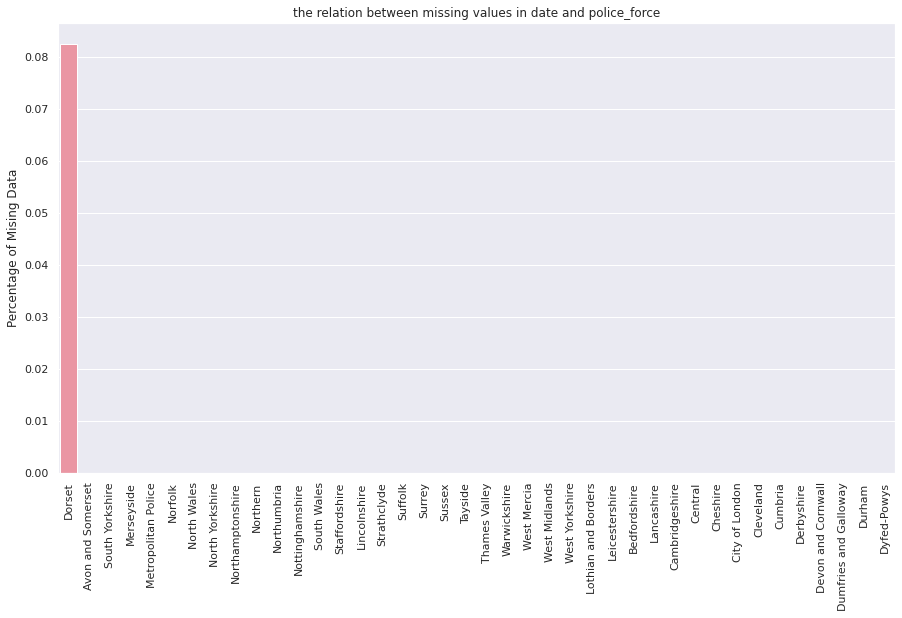

------------------------------------------------------------------------------------------
accident_severity
Slight     0.001065
Fatal      0.000000
Serious    0.000000
Name: date, dtype: float64


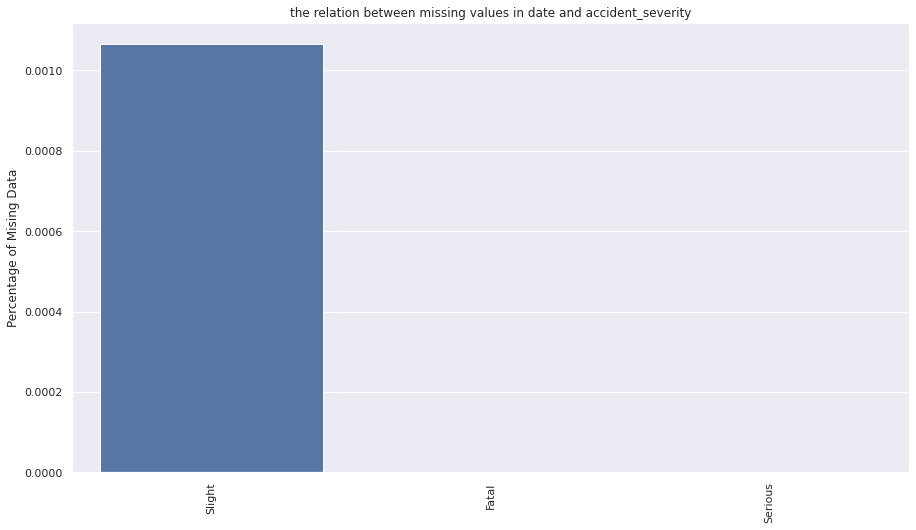

------------------------------------------------------------------------------------------
number_of_vehicles
2      0.001553
1      0.000000
14     0.000000
75     0.000000
73     0.000000
53     0.000000
39     0.000000
38     0.000000
21     0.000000
20     0.000000
18     0.000000
16     0.000000
15     0.000000
13     0.000000
12     0.000000
11     0.000000
10     0.000000
9      0.000000
8      0.000000
7      0.000000
6      0.000000
5      0.000000
4      0.000000
3      0.000000
192    0.000000
Name: date, dtype: float64


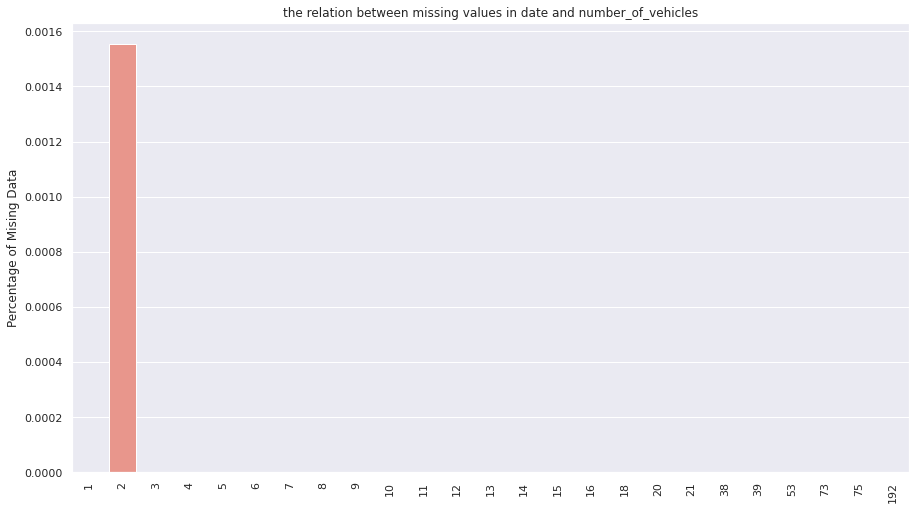

------------------------------------------------------------------------------------------
number_of_casualties
1     0.001096
2     0.000000
40    0.000000
34    0.000000
30    0.000000
29    0.000000
28    0.000000
27    0.000000
26    0.000000
22    0.000000
21    0.000000
20    0.000000
19    0.000000
18    0.000000
17    0.000000
16    0.000000
15    0.000000
14    0.000000
13    0.000000
12    0.000000
11    0.000000
10    0.000000
9     0.000000
8     0.000000
7     0.000000
6     0.000000
5     0.000000
4     0.000000
3     0.000000
42    0.000000
Name: date, dtype: float64


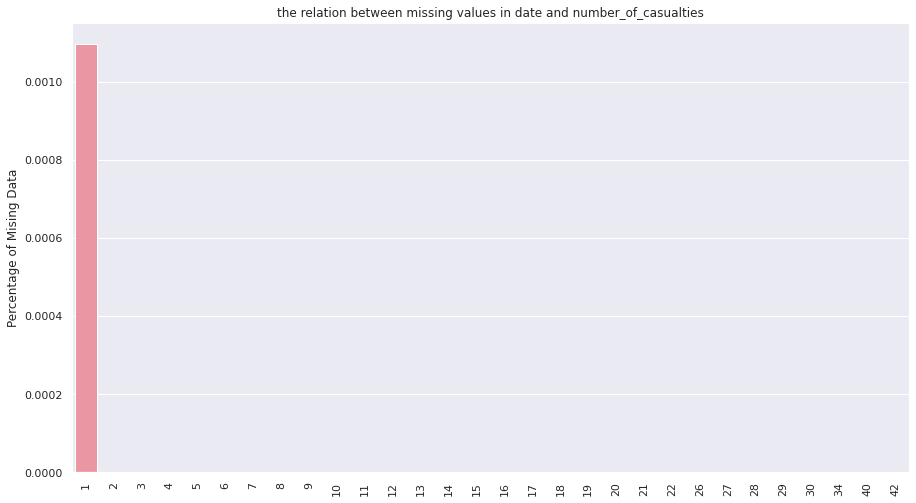

------------------------------------------------------------------------------------------
day_of_week
Saturday     0.003026
Monday       0.003015
Friday       0.000000
Sunday       0.000000
Thursday     0.000000
Tuesday      0.000000
Wednesday    0.000000
Name: date, dtype: float64


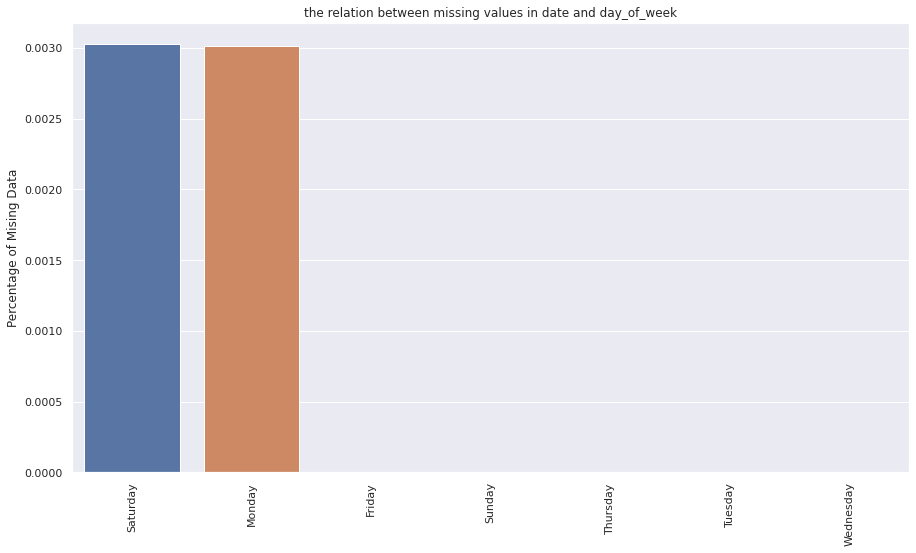

------------------------------------------------------------------------------------------
time
00:00    0.0
15:47    0.0
16:07    0.0
16:06    0.0
16:05    0.0
        ... 
08:02    0.0
08:01    0.0
08:00    0.0
07:59    0.0
23:59    0.0
Name: date, Length: 1434, dtype: float64


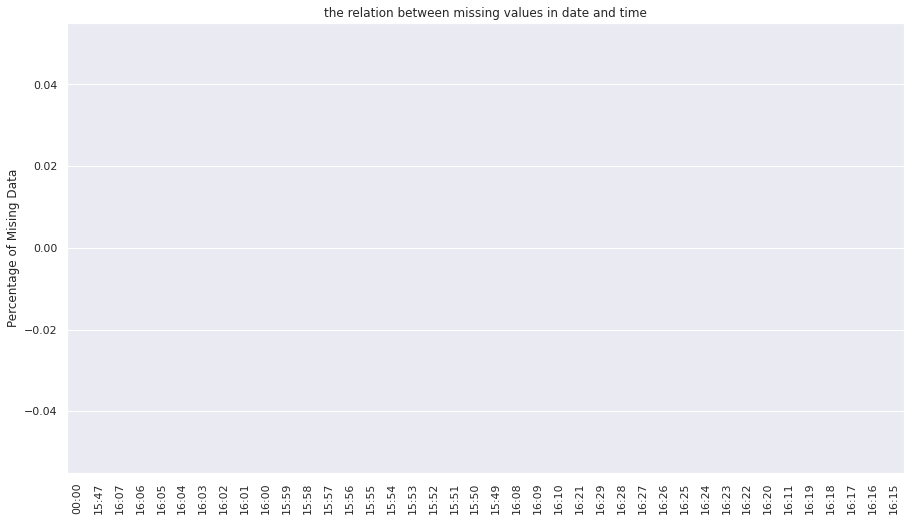

------------------------------------------------------------------------------------------
local_authority_district
East Dorset          0.342466
Bournemouth          0.178253
699                  0.000000
Oadby and Wigston    0.000000
Nottingham           0.000000
                       ...   
Bristol, City of     0.000000
Bridgnorth           0.000000
Brentwood            0.000000
Brent                0.000000
York                 0.000000
Name: date, Length: 460, dtype: float64


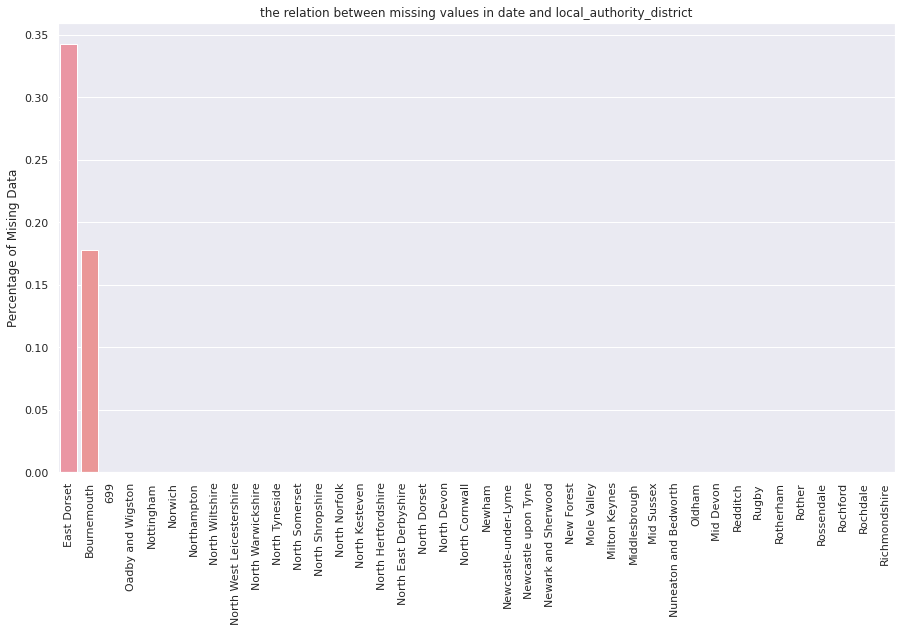

------------------------------------------------------------------------------------------
first_road_class
B               0.003384
A               0.000915
A(M)            0.000000
C               0.000000
Motorway        0.000000
Unclassified    0.000000
Name: date, dtype: float64


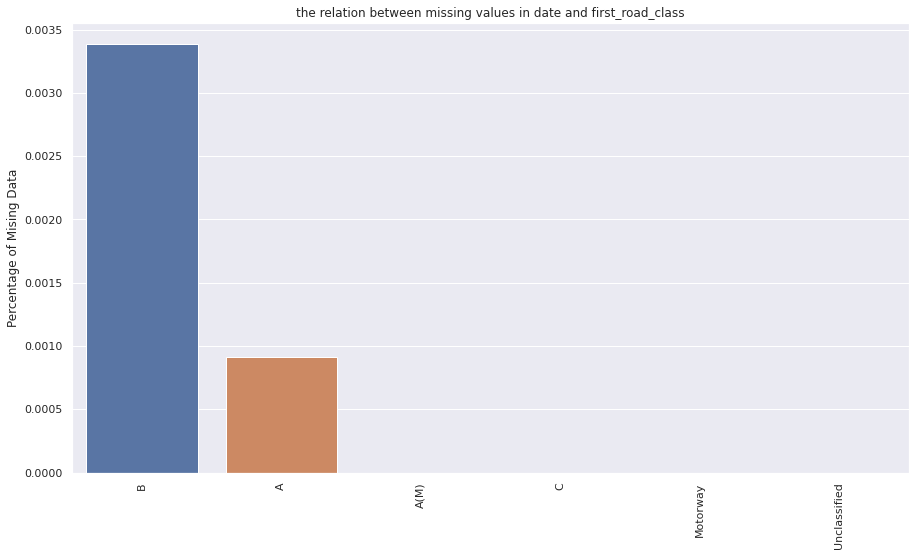

------------------------------------------------------------------------------------------
first_road_number
3073.0                                                                                                  2.439024
347.0                                                                                                   1.204819
1.0                                                                                                     0.000000
5408.0                                                                                                  0.000000
5393.0                                                                                                  0.000000
                                                                                                          ...   
3312.0                                                                                                  0.000000
3314.0                                                                                              

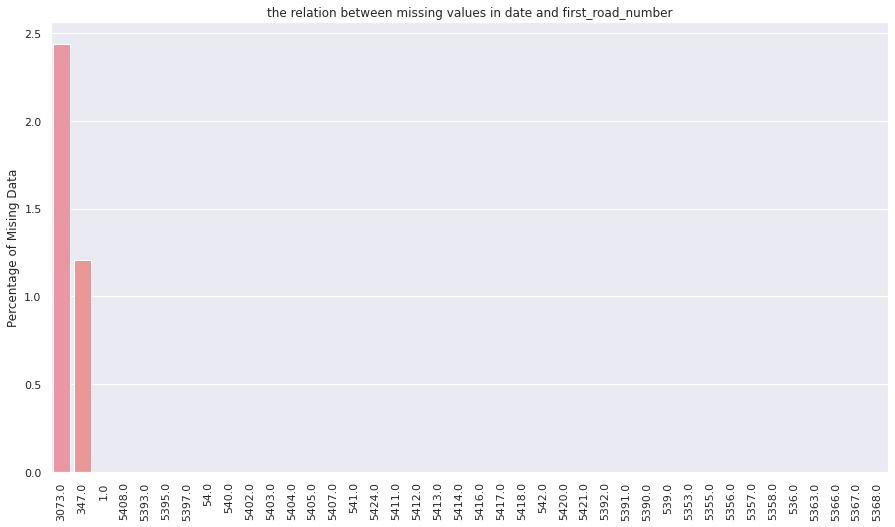

------------------------------------------------------------------------------------------
road_type
Roundabout                      0.009056
Single carriageway              0.000549
Data missing or out of range    0.000000
Dual carriageway                0.000000
One way street/Slip road        0.000000
Name: date, dtype: float64


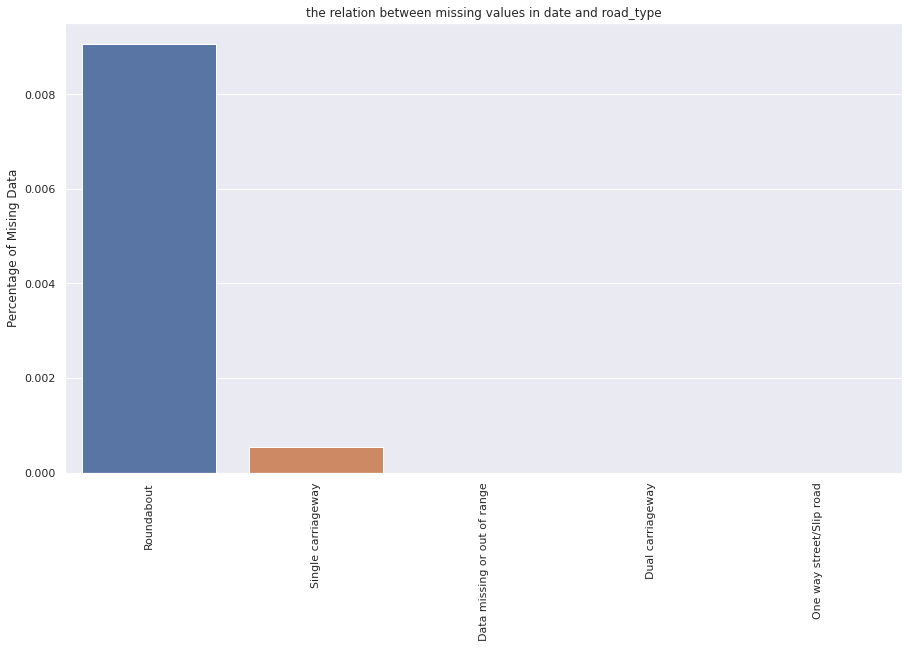

------------------------------------------------------------------------------------------
speed_limit
30.0    0.001294
0.0     0.000000
40.0    0.000000
69.0    0.000000
66.0    0.000000
65.0    0.000000
63.0    0.000000
62.0    0.000000
61.0    0.000000
60.0    0.000000
50.0    0.000000
45.0    0.000000
41.0    0.000000
39.0    0.000000
5.0     0.000000
36.0    0.000000
34.0    0.000000
33.0    0.000000
32.0    0.000000
25.0    0.000000
20.0    0.000000
15.0    0.000000
12.0    0.000000
10.0    0.000000
70.0    0.000000
Name: date, dtype: float64


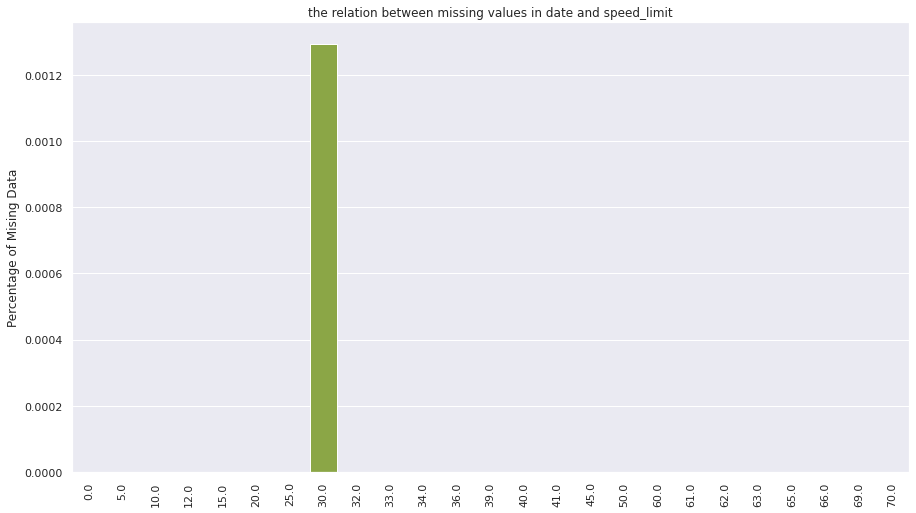

------------------------------------------------------------------------------------------
junction_detail
Roundabout                             0.007696
T or staggered junction                0.001253
Crossroads                             0.000000
Data missing or out of range           0.000000
Mini-roundabout                        0.000000
More than 4 arms (not roundabout)      0.000000
Not at junction or within 20 metres    0.000000
Other junction                         0.000000
Private drive or entrance              0.000000
Slip road                              0.000000
Name: date, dtype: float64


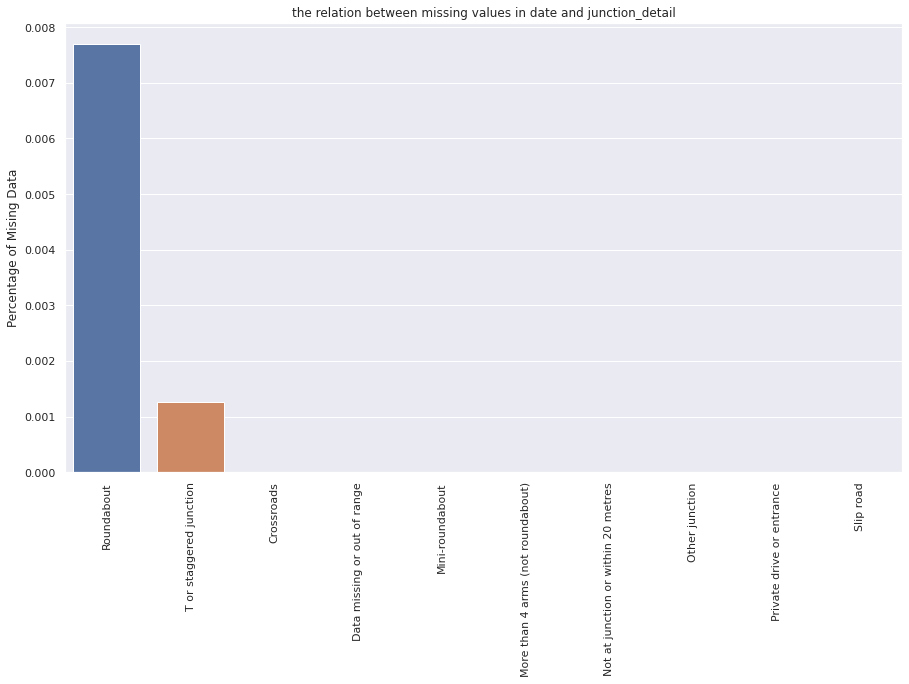

------------------------------------------------------------------------------------------
junction_control
Give way or uncontrolled        0.001663
Authorised person               0.000000
Auto traffic signal             0.000000
Data missing or out of range    0.000000
Stop sign                       0.000000
Name: date, dtype: float64


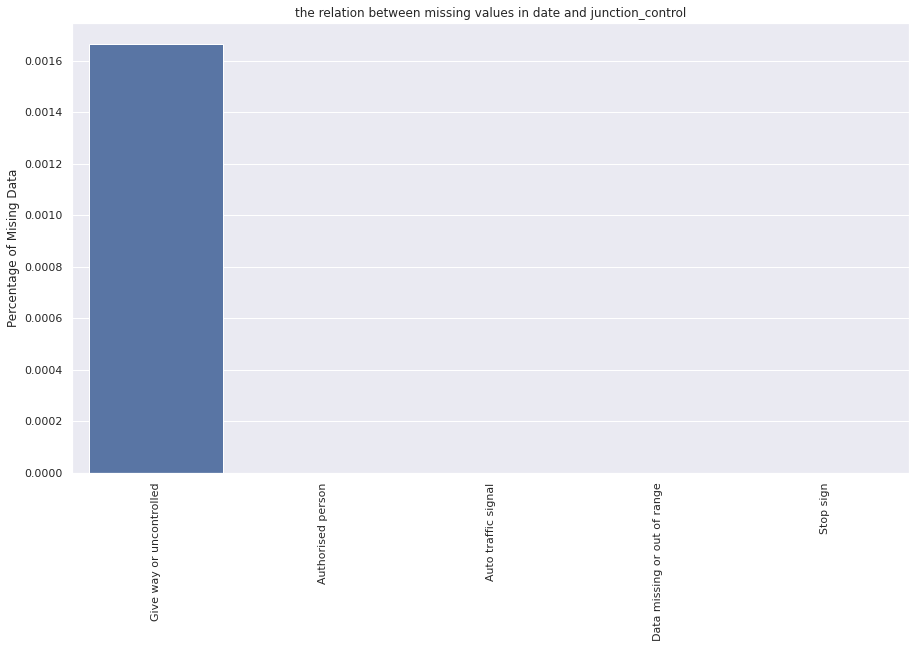

------------------------------------------------------------------------------------------
second_road_class
Unclassified    0.001982
-1              0.000000
A               0.000000
A(M)            0.000000
B               0.000000
C               0.000000
Motorway        0.000000
Name: date, dtype: float64


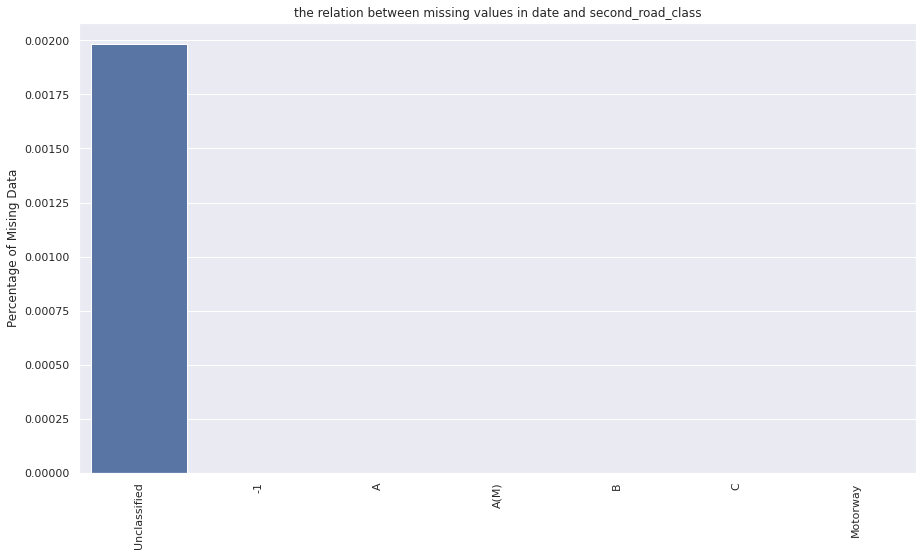

------------------------------------------------------------------------------------------
second_road_number
first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     0.001771
5288.0                                                                                                  0.000000
5274.0                                                                                                  0.000000
5275.0                                                                                                  0.000000
5276.0                                                                                                  0.000000
                                                                                                          ...   
324.0                                                                                                   0.000000
3240.0                                                                                             

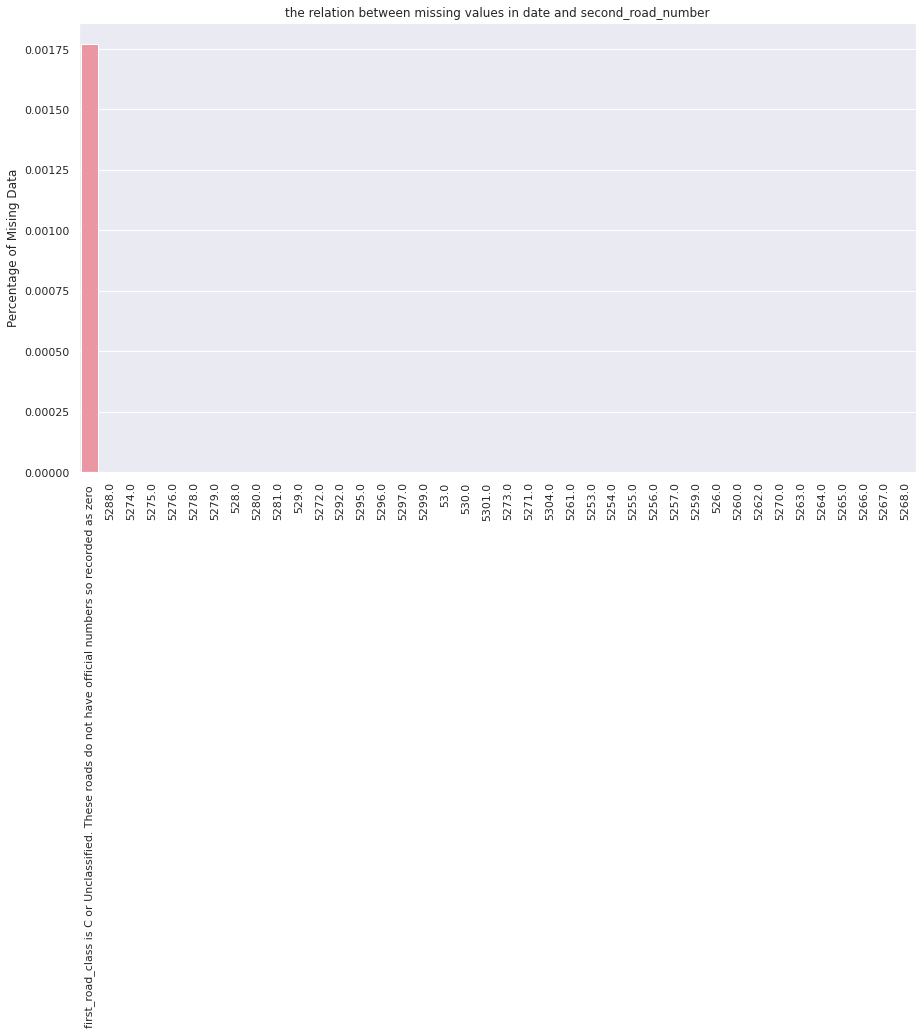

------------------------------------------------------------------------------------------
pedestrian_crossing_human_control
None within 50 metres                 0.000862
Control by other authorised person    0.000000
Control by school crossing patrol     0.000000
Data missing or out of range          0.000000
Name: date, dtype: float64


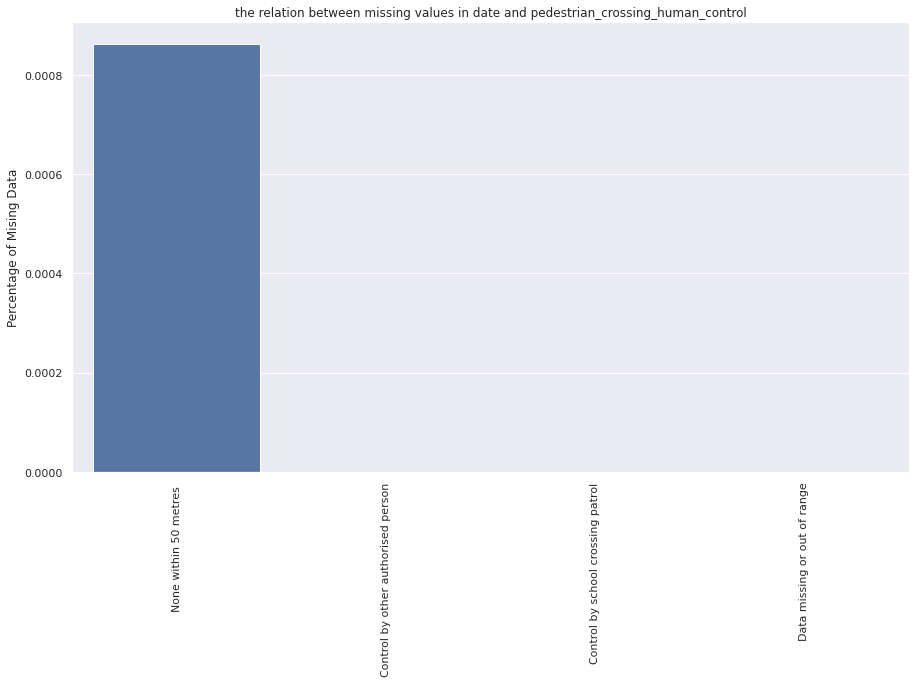

------------------------------------------------------------------------------------------
pedestrian_crossing_physical_facilities
No physical crossing facilities within 50 metres                             0.000997
Central refuge                                                               0.000000
Data missing or out of range                                                 0.000000
Footbridge or subway                                                         0.000000
Pedestrian phase at traffic signal junction                                  0.000000
Pelican, puffin, toucan or similar non-junction pedestrian light crossing    0.000000
Zebra                                                                        0.000000
Name: date, dtype: float64


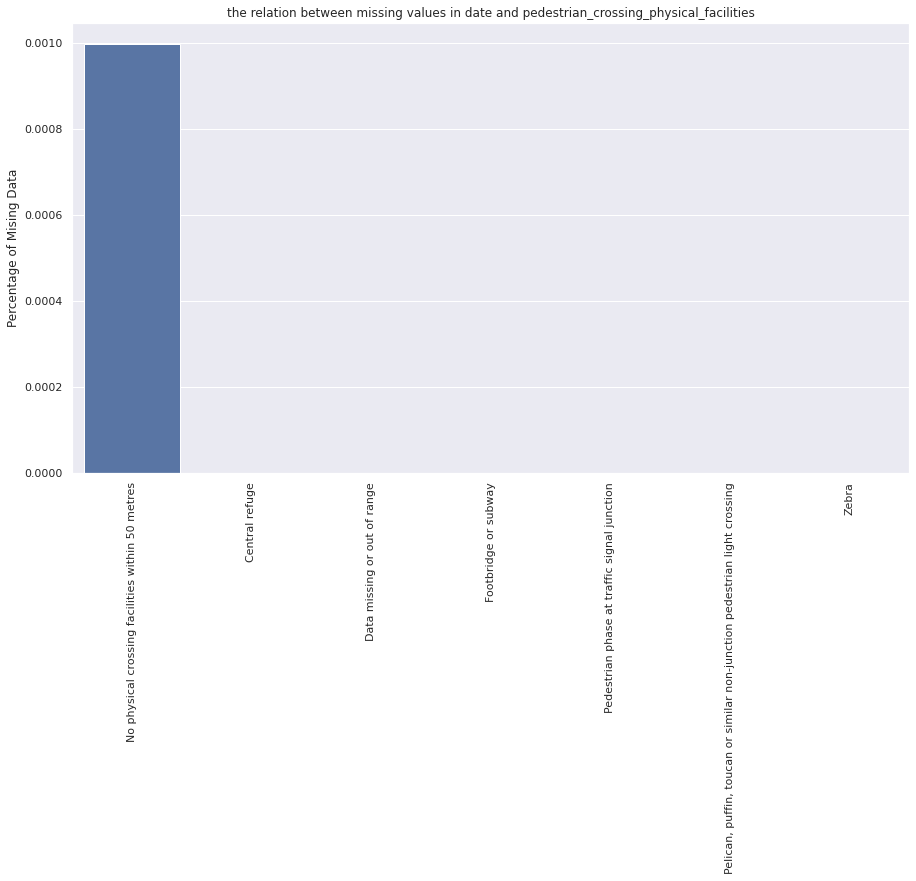

------------------------------------------------------------------------------------------
light_conditions
Darkness - lights lit           0.002030
Daylight                        0.000598
Darkness - lighting unknown     0.000000
Darkness - lights unlit         0.000000
Darkness - no lighting          0.000000
Data missing or out of range    0.000000
Name: date, dtype: float64


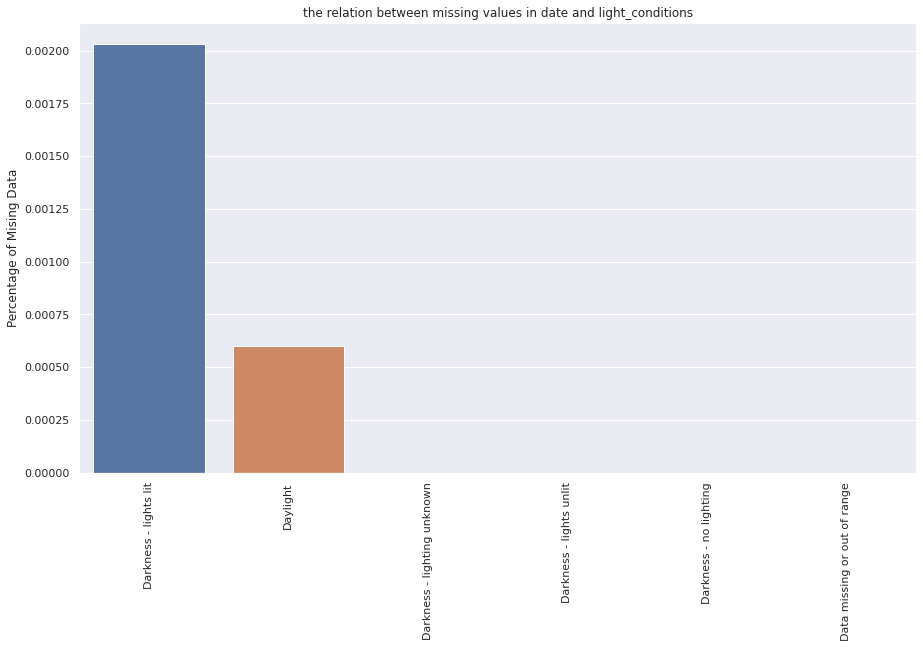

------------------------------------------------------------------------------------------
weather_conditions
Fine no high winds              0.00112
Data missing or out of range    0.00000
Fine + high winds               0.00000
Fog or mist                     0.00000
Other                           0.00000
Raining + high winds            0.00000
Raining no high winds           0.00000
Snowing + high winds            0.00000
Snowing no high winds           0.00000
Name: date, dtype: float64


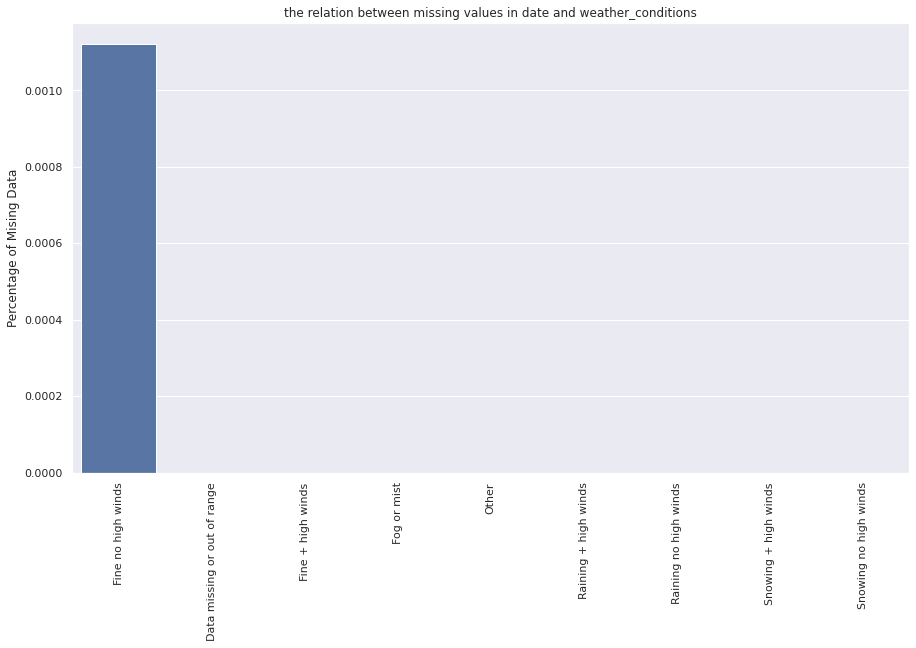

------------------------------------------------------------------------------------------
road_surface_conditions
Dry                             0.001397
Data missing or out of range    0.000000
Flood over 3cm. deep            0.000000
Frost or ice                    0.000000
Snow                            0.000000
Wet or damp                     0.000000
Name: date, dtype: float64


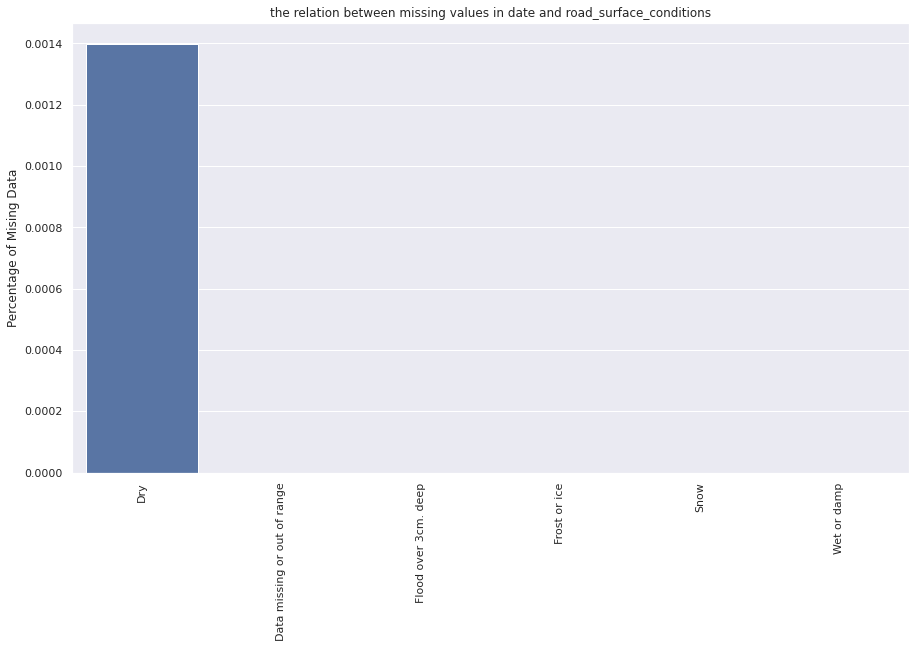

------------------------------------------------------------------------------------------
special_conditions_at_site
None                                          0.000881
Auto signal part defective                    0.000000
Auto traffic signal - out                     0.000000
Data missing or out of range                  0.000000
Road sign or marking defective or obscured    0.000000
Road surface defective                        0.000000
Roadworks                                     0.000000
Name: date, dtype: float64


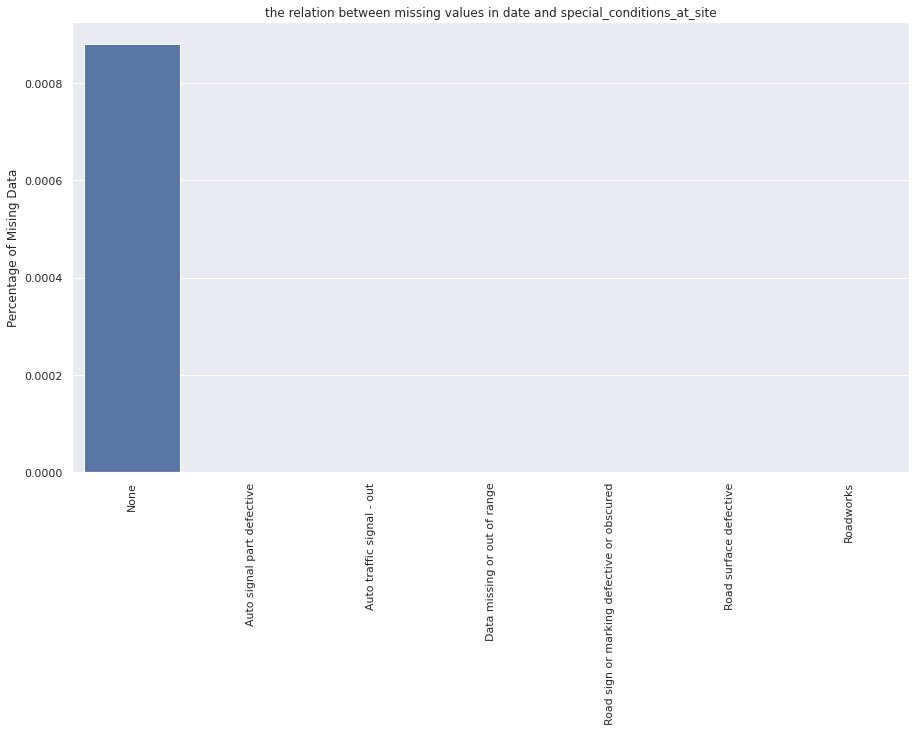

------------------------------------------------------------------------------------------
carriageway_hazards
None                            0.000885
Data missing or out of range    0.000000
Dog on road                     0.000000
Other animal on road            0.000000
Other object on road            0.000000
Previous accident               0.000000
Vehicle load on road            0.000000
Name: date, dtype: float64


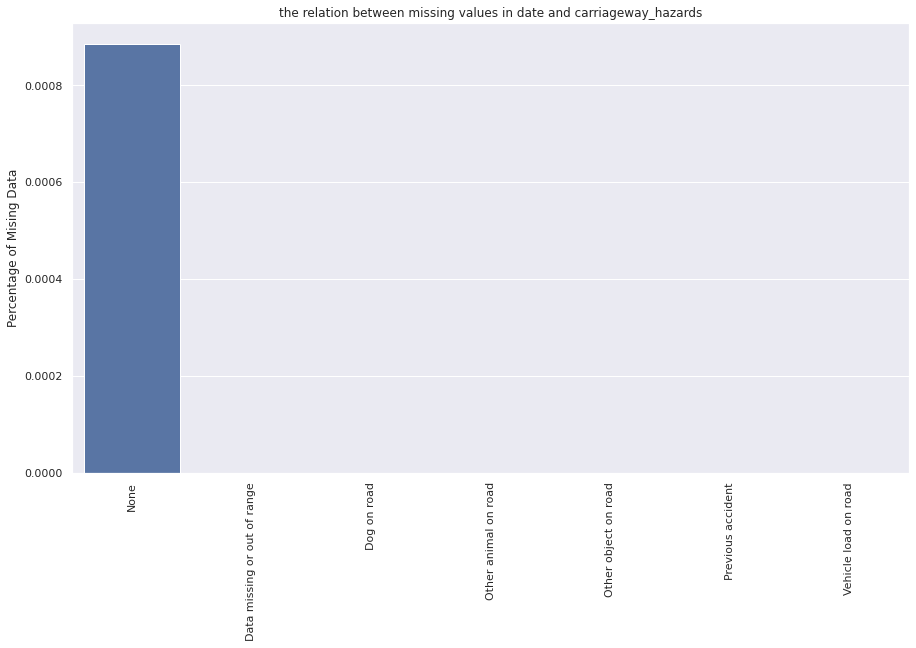

------------------------------------------------------------------------------------------
Current Feature is time 

location_easting_osgr
408660.0    33.333333
401180.0    20.000000
508380.0     0.000000
508330.0     0.000000
508340.0     0.000000
              ...    
387740.0     0.000000
387730.0     0.000000
387720.0     0.000000
387710.0     0.000000
942600.0     0.000000
Name: time, Length: 35072, dtype: float64


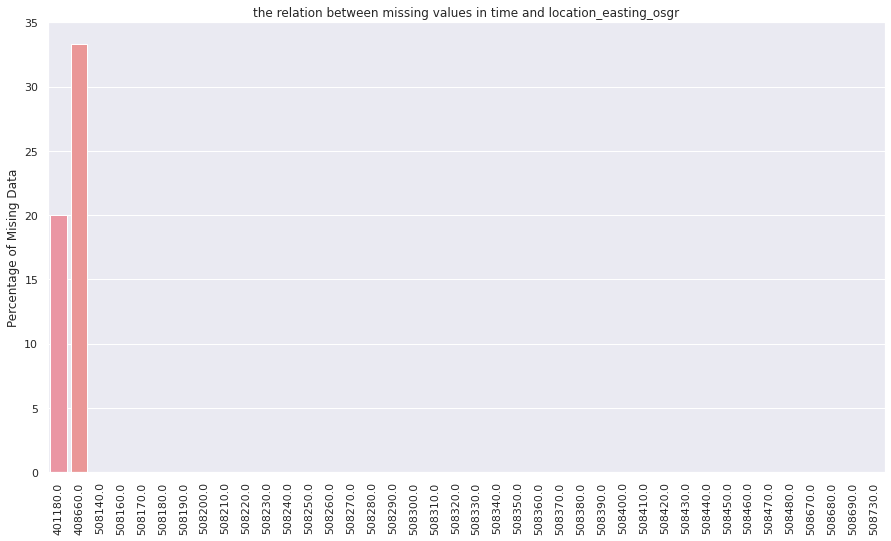

------------------------------------------------------------------------------------------
location_northing_osgr
100130.0    20.000000
93850.0      6.666667
409320.0     0.000000
409240.0     0.000000
409250.0     0.000000
              ...    
228280.0     0.000000
228290.0     0.000000
228300.0     0.000000
228310.0     0.000000
991700.0     0.000000
Name: time, Length: 45286, dtype: float64


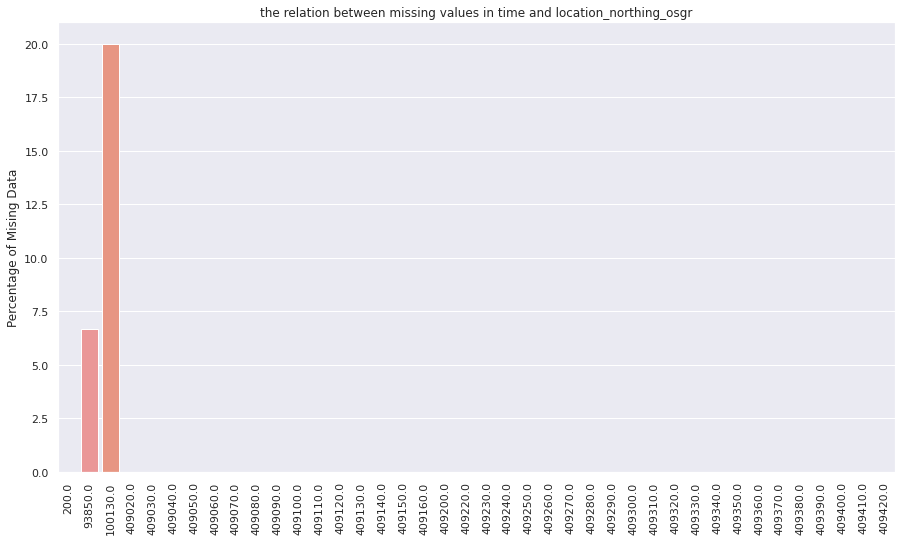

------------------------------------------------------------------------------------------
police_force
Dorset                   0.082406
Avon and Somerset        0.000000
South Yorkshire          0.000000
Merseyside               0.000000
Metropolitan Police      0.000000
Norfolk                  0.000000
North Wales              0.000000
North Yorkshire          0.000000
Northamptonshire         0.000000
Northern                 0.000000
Northumbria              0.000000
Nottinghamshire          0.000000
South Wales              0.000000
Staffordshire            0.000000
Lincolnshire             0.000000
Strathclyde              0.000000
Suffolk                  0.000000
Surrey                   0.000000
Sussex                   0.000000
Tayside                  0.000000
Thames Valley            0.000000
Warwickshire             0.000000
West Mercia              0.000000
West Midlands            0.000000
West Yorkshire           0.000000
Lothian and Borders      0.000000
Leicestershi

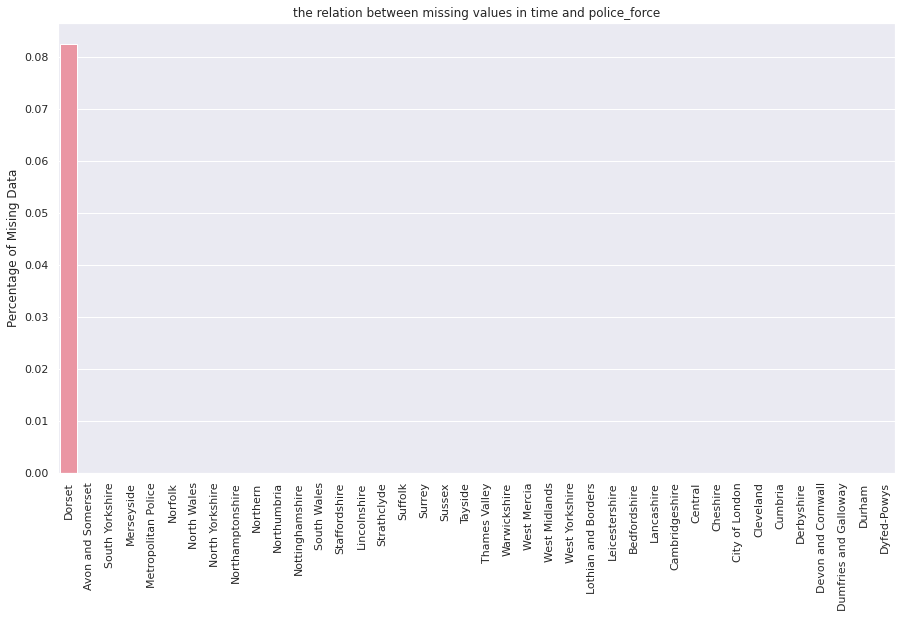

------------------------------------------------------------------------------------------
accident_severity
Slight     0.001065
Fatal      0.000000
Serious    0.000000
Name: time, dtype: float64


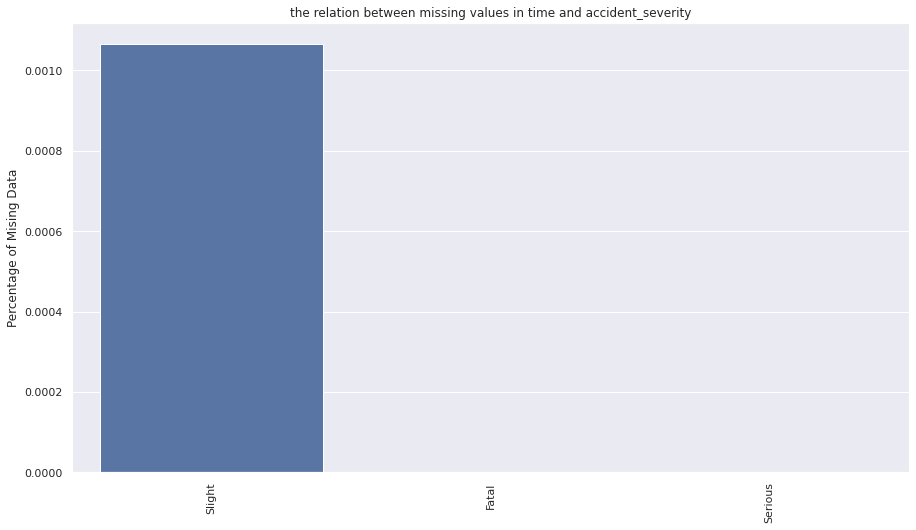

------------------------------------------------------------------------------------------
number_of_vehicles
2      0.001553
1      0.000000
14     0.000000
75     0.000000
73     0.000000
53     0.000000
39     0.000000
38     0.000000
21     0.000000
20     0.000000
18     0.000000
16     0.000000
15     0.000000
13     0.000000
12     0.000000
11     0.000000
10     0.000000
9      0.000000
8      0.000000
7      0.000000
6      0.000000
5      0.000000
4      0.000000
3      0.000000
192    0.000000
Name: time, dtype: float64


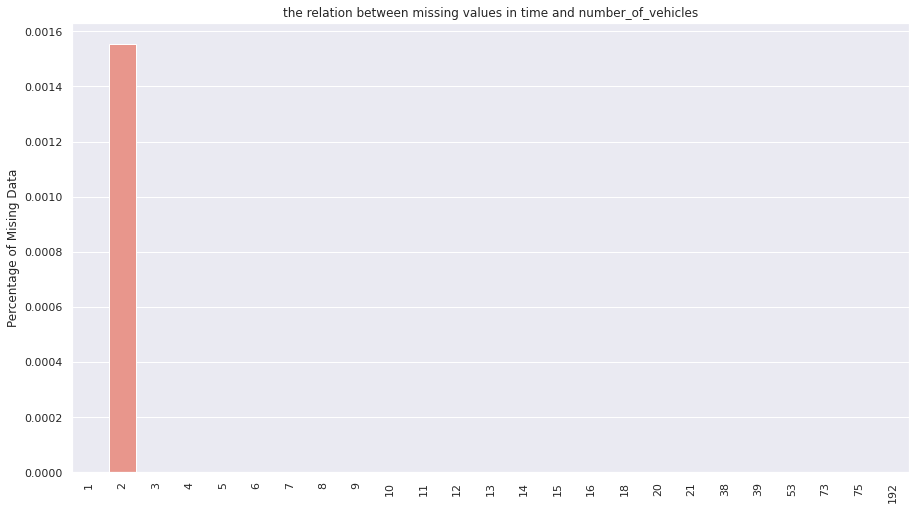

------------------------------------------------------------------------------------------
number_of_casualties
1     0.001096
2     0.000000
40    0.000000
34    0.000000
30    0.000000
29    0.000000
28    0.000000
27    0.000000
26    0.000000
22    0.000000
21    0.000000
20    0.000000
19    0.000000
18    0.000000
17    0.000000
16    0.000000
15    0.000000
14    0.000000
13    0.000000
12    0.000000
11    0.000000
10    0.000000
9     0.000000
8     0.000000
7     0.000000
6     0.000000
5     0.000000
4     0.000000
3     0.000000
42    0.000000
Name: time, dtype: float64


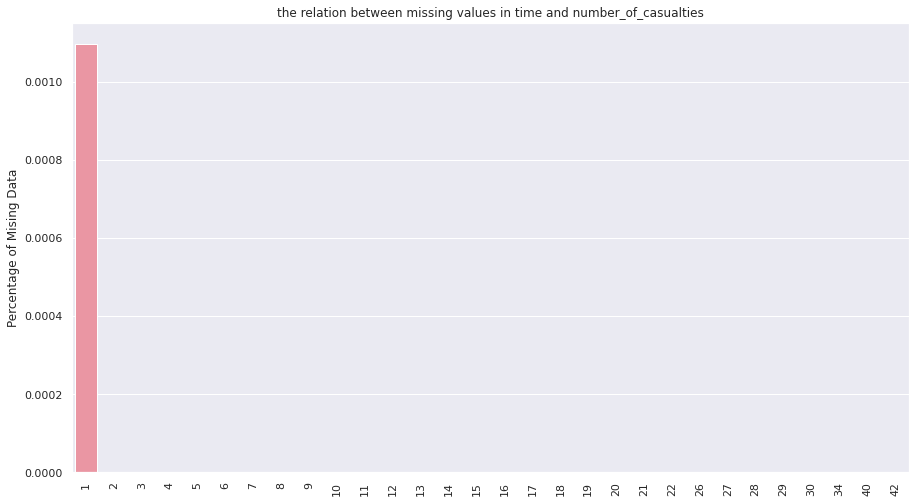

------------------------------------------------------------------------------------------
date
01/01/1992    0.0
21/12/1992    0.0
21/10/1992    0.0
21/09/1992    0.0
21/08/1992    0.0
             ... 
11/01/1992    0.0
10/12/1992    0.0
10/11/1992    0.0
10/10/1992    0.0
31/12/1992    0.0
Name: time, Length: 366, dtype: float64


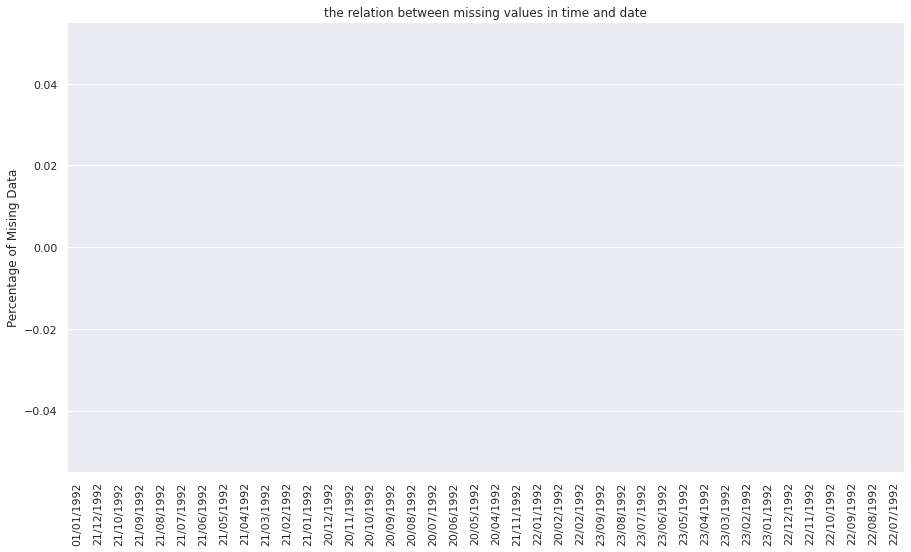

------------------------------------------------------------------------------------------
day_of_week
Saturday     0.003026
Monday       0.003015
Friday       0.000000
Sunday       0.000000
Thursday     0.000000
Tuesday      0.000000
Wednesday    0.000000
Name: time, dtype: float64


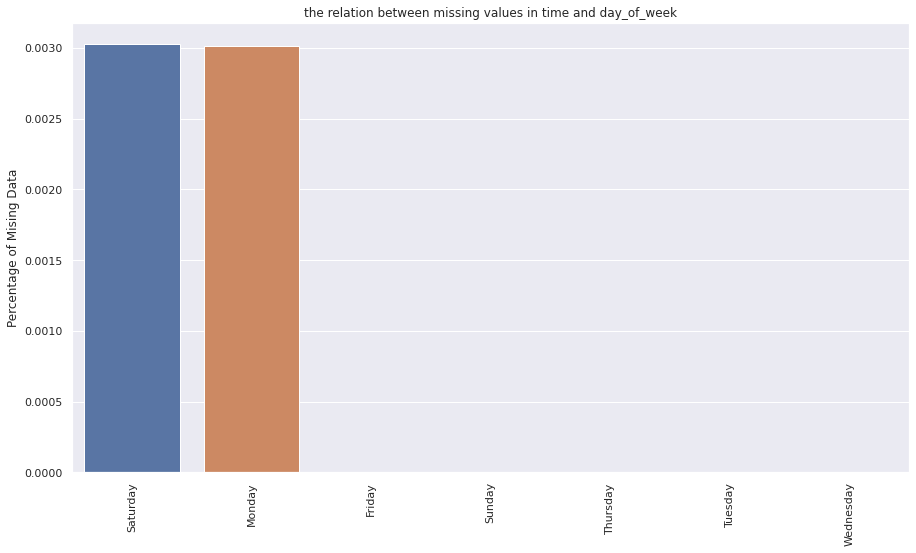

------------------------------------------------------------------------------------------
local_authority_district
East Dorset          0.342466
Bournemouth          0.178253
699                  0.000000
Oadby and Wigston    0.000000
Nottingham           0.000000
                       ...   
Bristol, City of     0.000000
Bridgnorth           0.000000
Brentwood            0.000000
Brent                0.000000
York                 0.000000
Name: time, Length: 460, dtype: float64


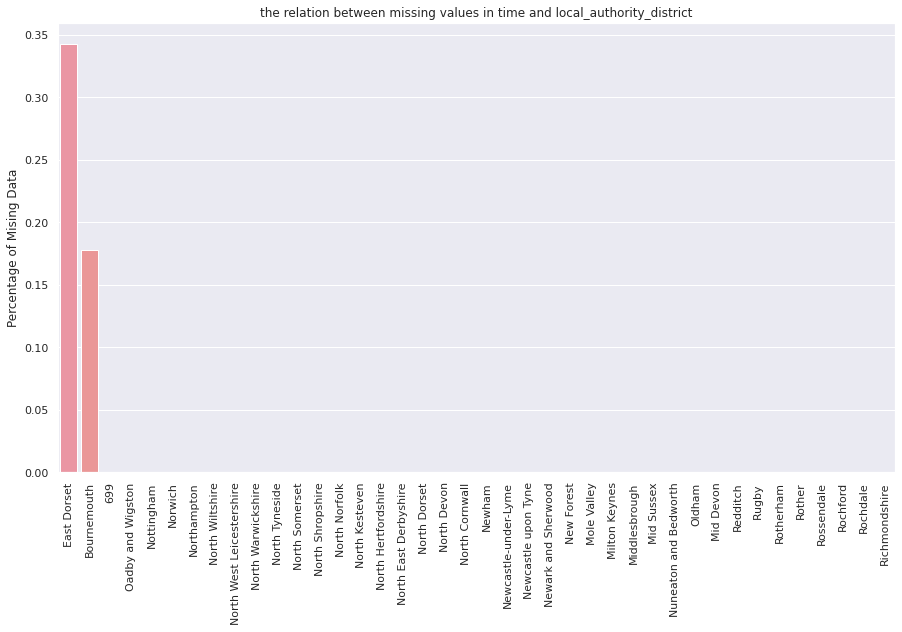

------------------------------------------------------------------------------------------
first_road_class
B               0.003384
A               0.000915
A(M)            0.000000
C               0.000000
Motorway        0.000000
Unclassified    0.000000
Name: time, dtype: float64


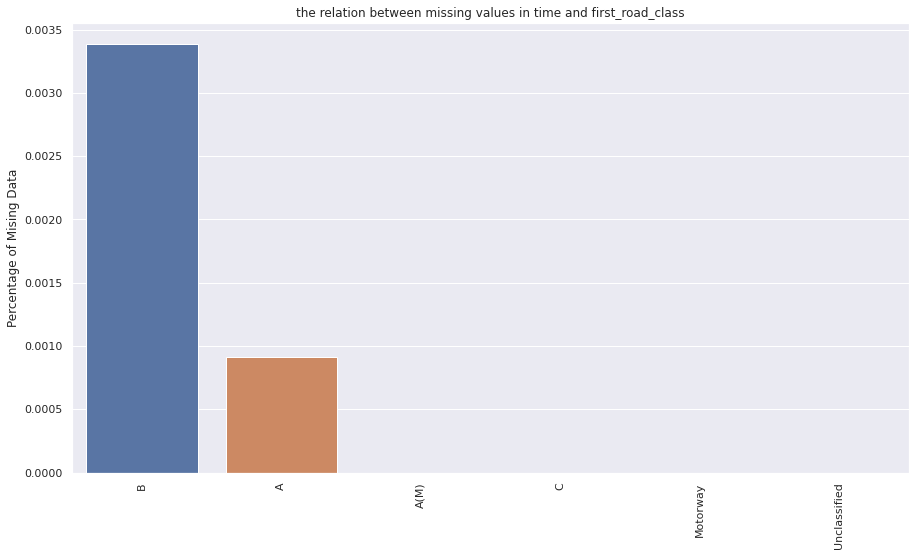

------------------------------------------------------------------------------------------
first_road_number
3073.0                                                                                                  2.439024
347.0                                                                                                   1.204819
1.0                                                                                                     0.000000
5408.0                                                                                                  0.000000
5393.0                                                                                                  0.000000
                                                                                                          ...   
3312.0                                                                                                  0.000000
3314.0                                                                                              

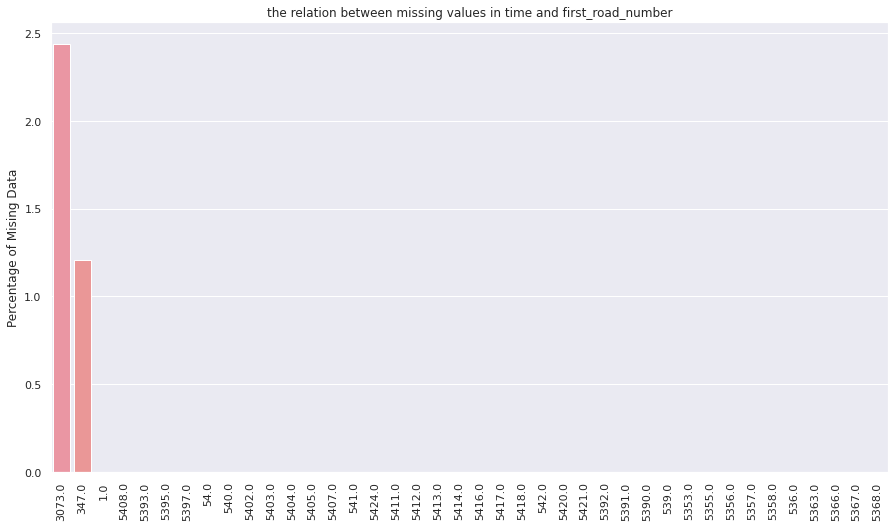

------------------------------------------------------------------------------------------
road_type
Roundabout                      0.009056
Single carriageway              0.000549
Data missing or out of range    0.000000
Dual carriageway                0.000000
One way street/Slip road        0.000000
Name: time, dtype: float64


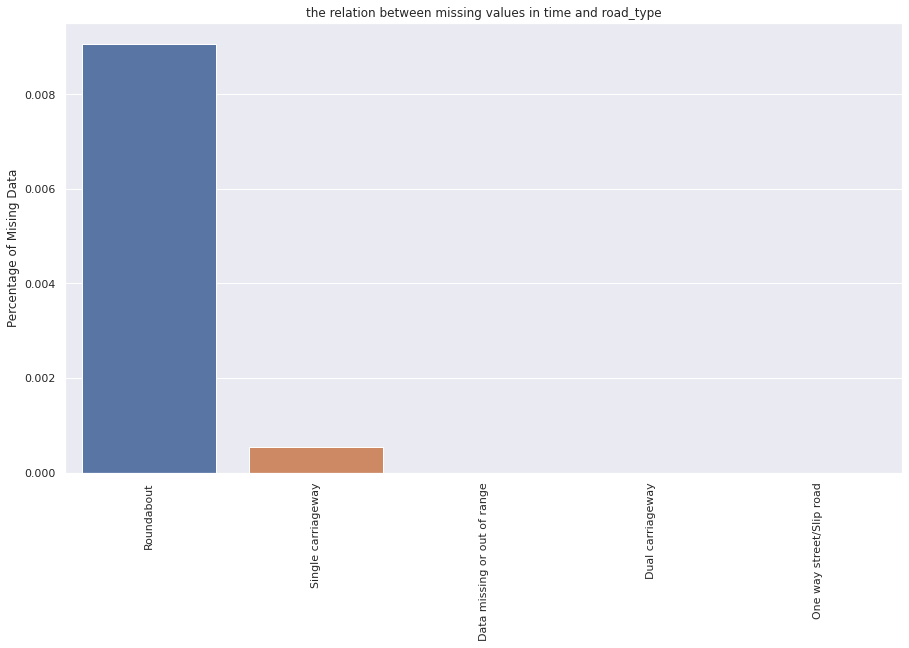

------------------------------------------------------------------------------------------
speed_limit
30.0    0.001294
0.0     0.000000
40.0    0.000000
69.0    0.000000
66.0    0.000000
65.0    0.000000
63.0    0.000000
62.0    0.000000
61.0    0.000000
60.0    0.000000
50.0    0.000000
45.0    0.000000
41.0    0.000000
39.0    0.000000
5.0     0.000000
36.0    0.000000
34.0    0.000000
33.0    0.000000
32.0    0.000000
25.0    0.000000
20.0    0.000000
15.0    0.000000
12.0    0.000000
10.0    0.000000
70.0    0.000000
Name: time, dtype: float64


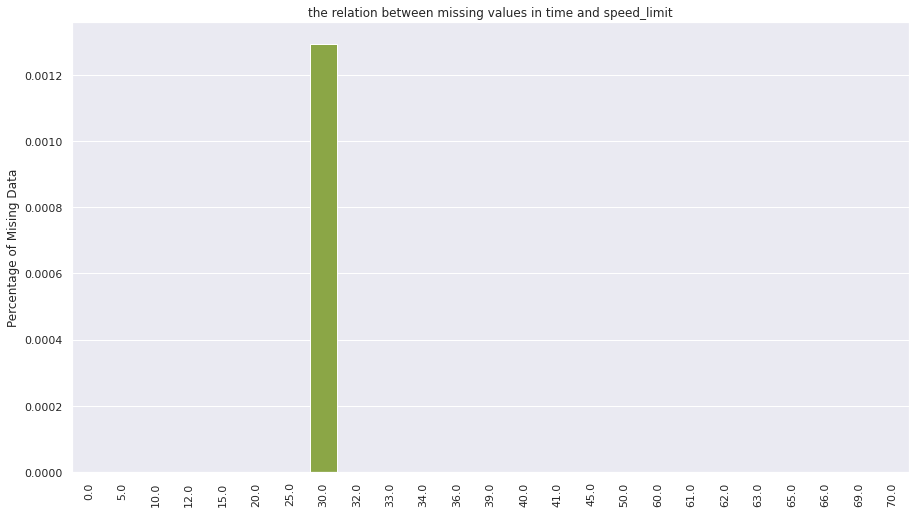

------------------------------------------------------------------------------------------
junction_detail
Roundabout                             0.007696
T or staggered junction                0.001253
Crossroads                             0.000000
Data missing or out of range           0.000000
Mini-roundabout                        0.000000
More than 4 arms (not roundabout)      0.000000
Not at junction or within 20 metres    0.000000
Other junction                         0.000000
Private drive or entrance              0.000000
Slip road                              0.000000
Name: time, dtype: float64


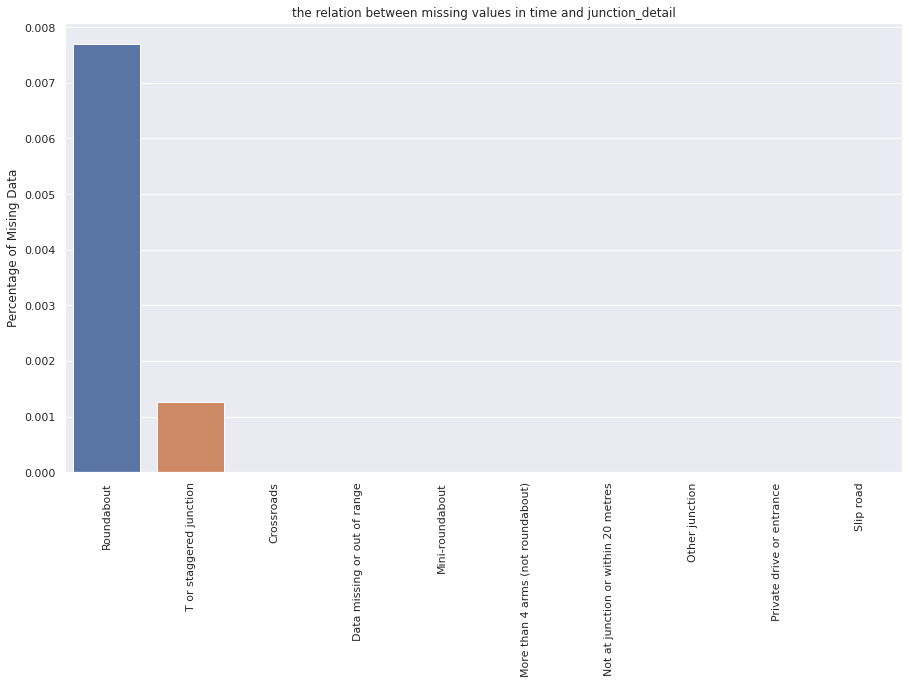

------------------------------------------------------------------------------------------
junction_control
Give way or uncontrolled        0.001663
Authorised person               0.000000
Auto traffic signal             0.000000
Data missing or out of range    0.000000
Stop sign                       0.000000
Name: time, dtype: float64


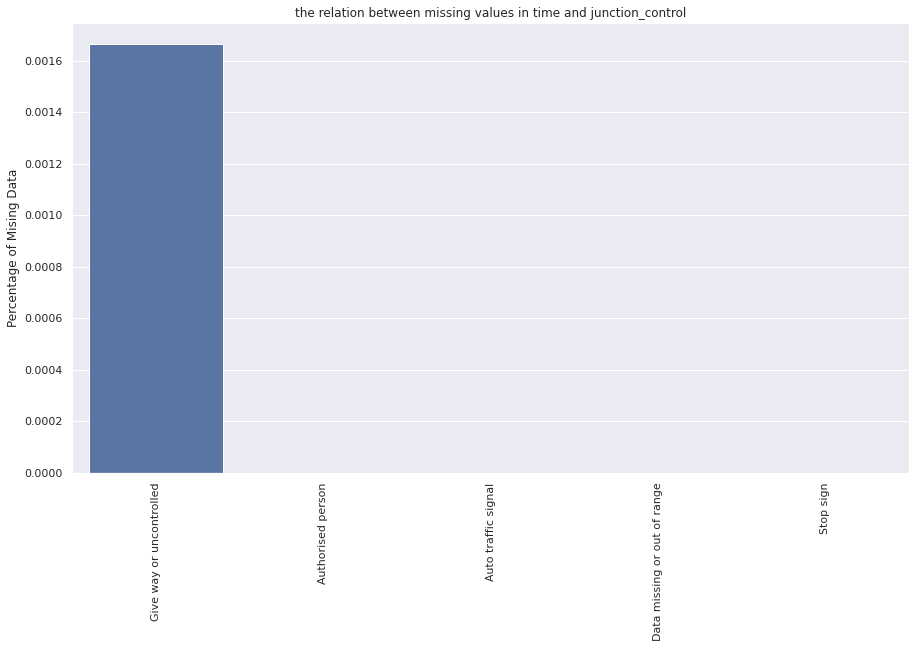

------------------------------------------------------------------------------------------
second_road_class
Unclassified    0.001982
-1              0.000000
A               0.000000
A(M)            0.000000
B               0.000000
C               0.000000
Motorway        0.000000
Name: time, dtype: float64


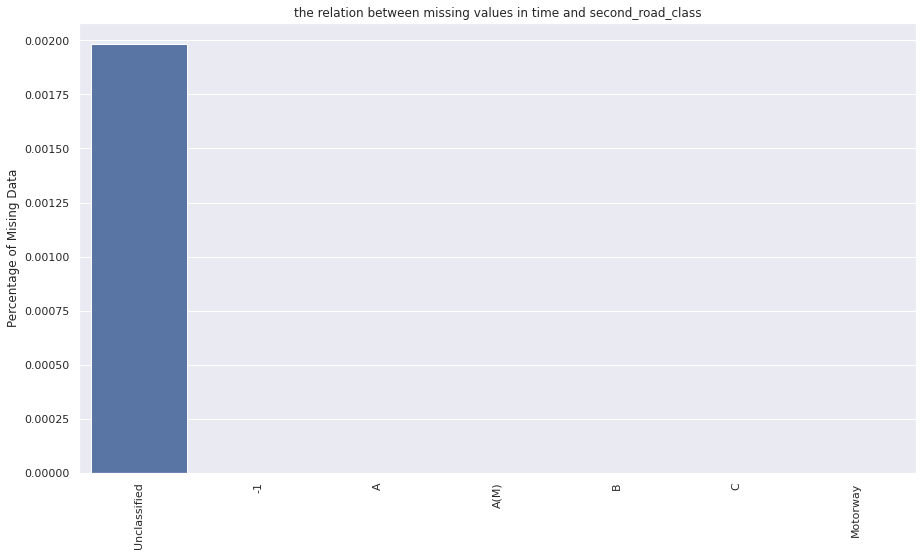

------------------------------------------------------------------------------------------
second_road_number
first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     0.001771
5288.0                                                                                                  0.000000
5274.0                                                                                                  0.000000
5275.0                                                                                                  0.000000
5276.0                                                                                                  0.000000
                                                                                                          ...   
324.0                                                                                                   0.000000
3240.0                                                                                             

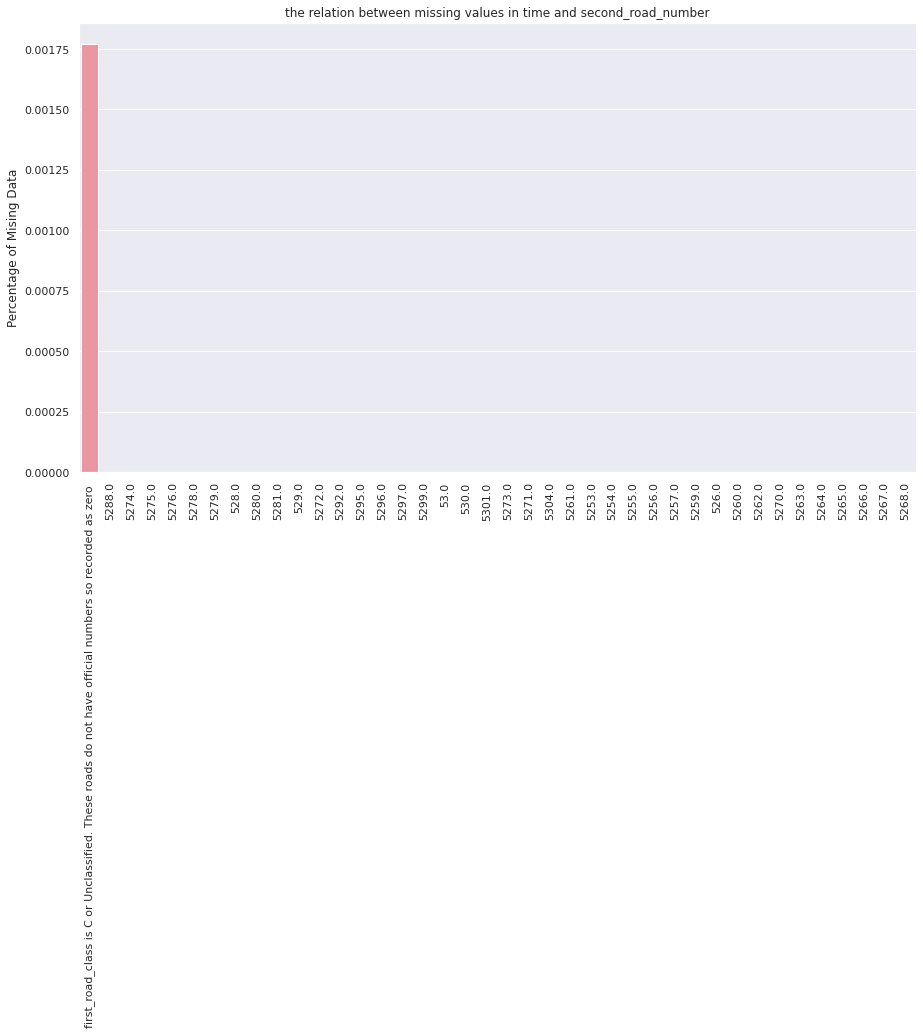

------------------------------------------------------------------------------------------
pedestrian_crossing_human_control
None within 50 metres                 0.000862
Control by other authorised person    0.000000
Control by school crossing patrol     0.000000
Data missing or out of range          0.000000
Name: time, dtype: float64


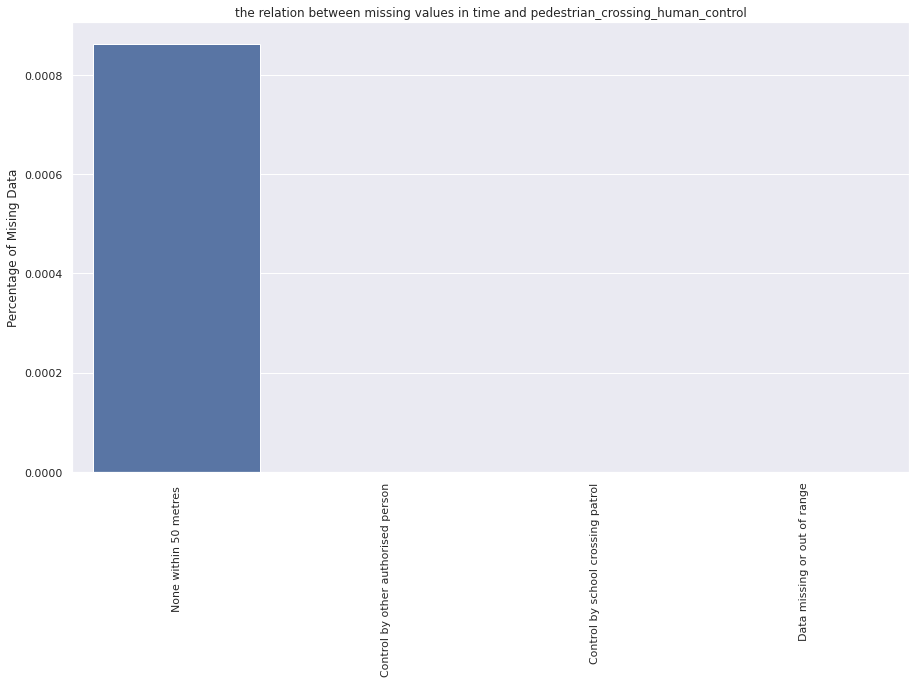

------------------------------------------------------------------------------------------
pedestrian_crossing_physical_facilities
No physical crossing facilities within 50 metres                             0.000997
Central refuge                                                               0.000000
Data missing or out of range                                                 0.000000
Footbridge or subway                                                         0.000000
Pedestrian phase at traffic signal junction                                  0.000000
Pelican, puffin, toucan or similar non-junction pedestrian light crossing    0.000000
Zebra                                                                        0.000000
Name: time, dtype: float64


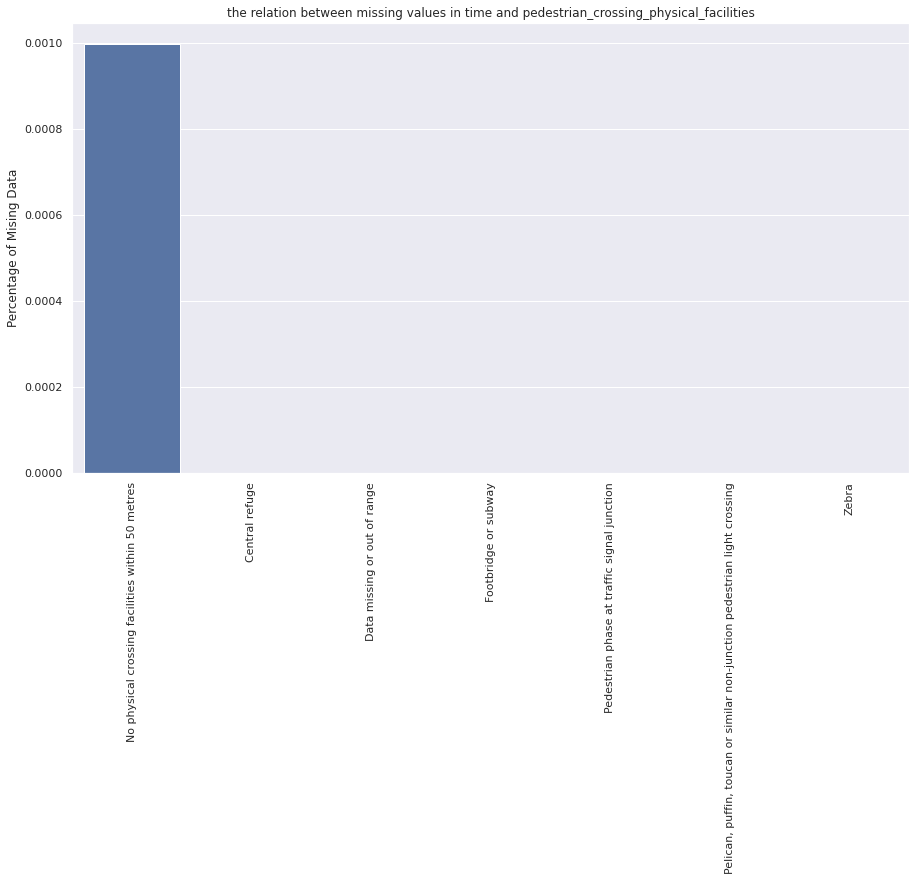

------------------------------------------------------------------------------------------
light_conditions
Darkness - lights lit           0.002030
Daylight                        0.000598
Darkness - lighting unknown     0.000000
Darkness - lights unlit         0.000000
Darkness - no lighting          0.000000
Data missing or out of range    0.000000
Name: time, dtype: float64


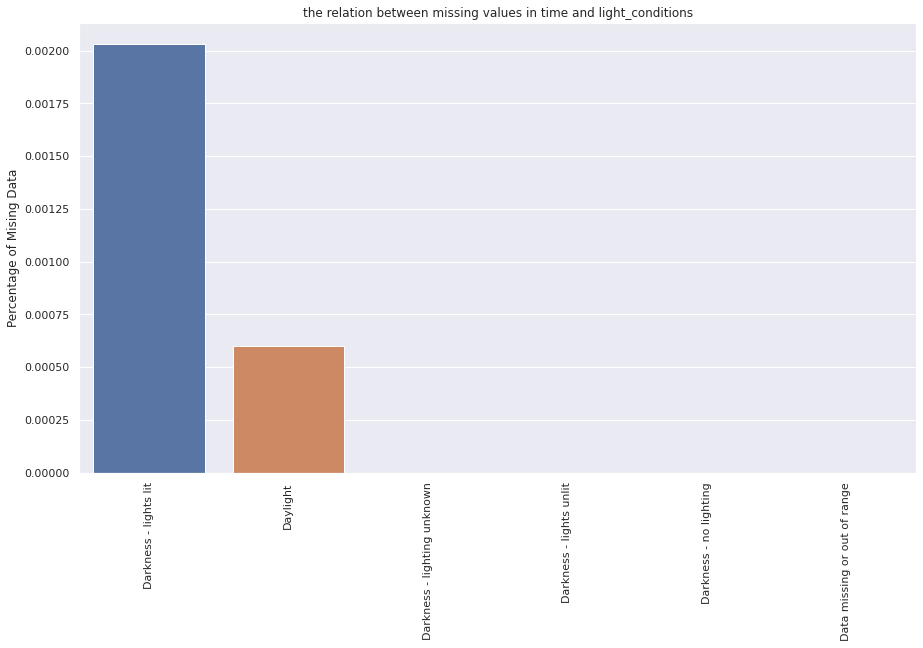

------------------------------------------------------------------------------------------
weather_conditions
Fine no high winds              0.00112
Data missing or out of range    0.00000
Fine + high winds               0.00000
Fog or mist                     0.00000
Other                           0.00000
Raining + high winds            0.00000
Raining no high winds           0.00000
Snowing + high winds            0.00000
Snowing no high winds           0.00000
Name: time, dtype: float64


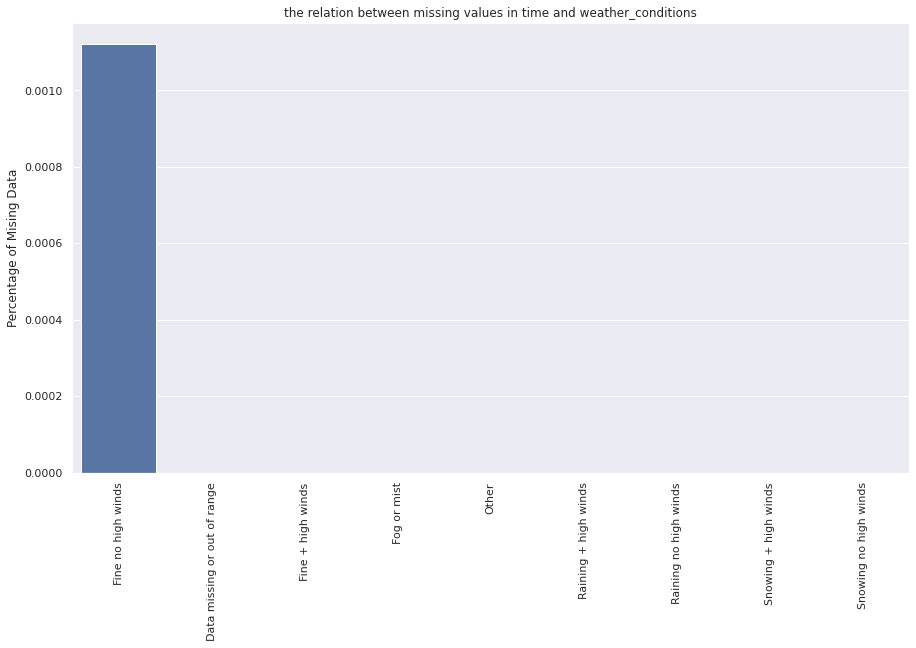

------------------------------------------------------------------------------------------
road_surface_conditions
Dry                             0.001397
Data missing or out of range    0.000000
Flood over 3cm. deep            0.000000
Frost or ice                    0.000000
Snow                            0.000000
Wet or damp                     0.000000
Name: time, dtype: float64


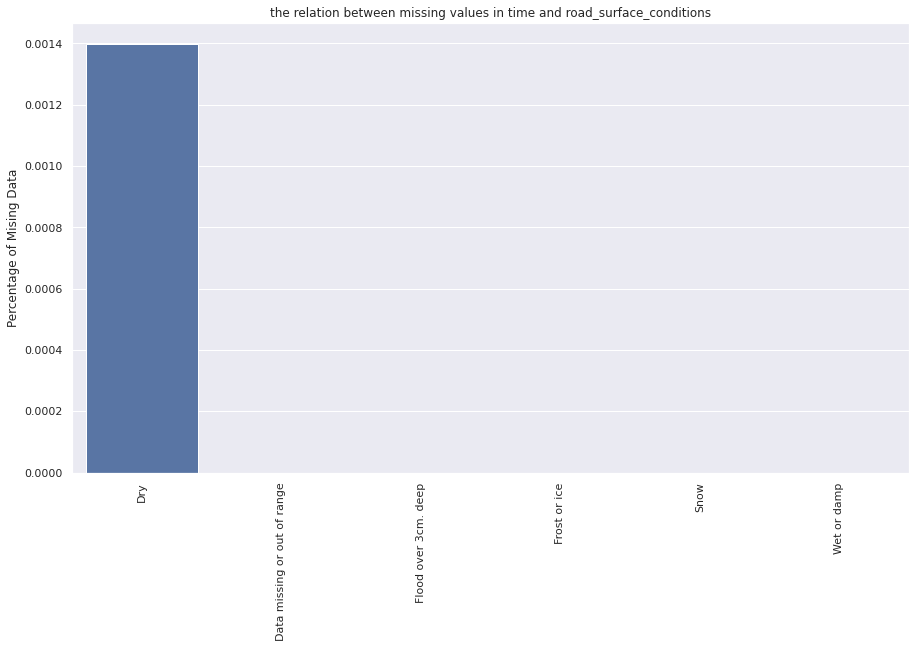

------------------------------------------------------------------------------------------
special_conditions_at_site
None                                          0.000881
Auto signal part defective                    0.000000
Auto traffic signal - out                     0.000000
Data missing or out of range                  0.000000
Road sign or marking defective or obscured    0.000000
Road surface defective                        0.000000
Roadworks                                     0.000000
Name: time, dtype: float64


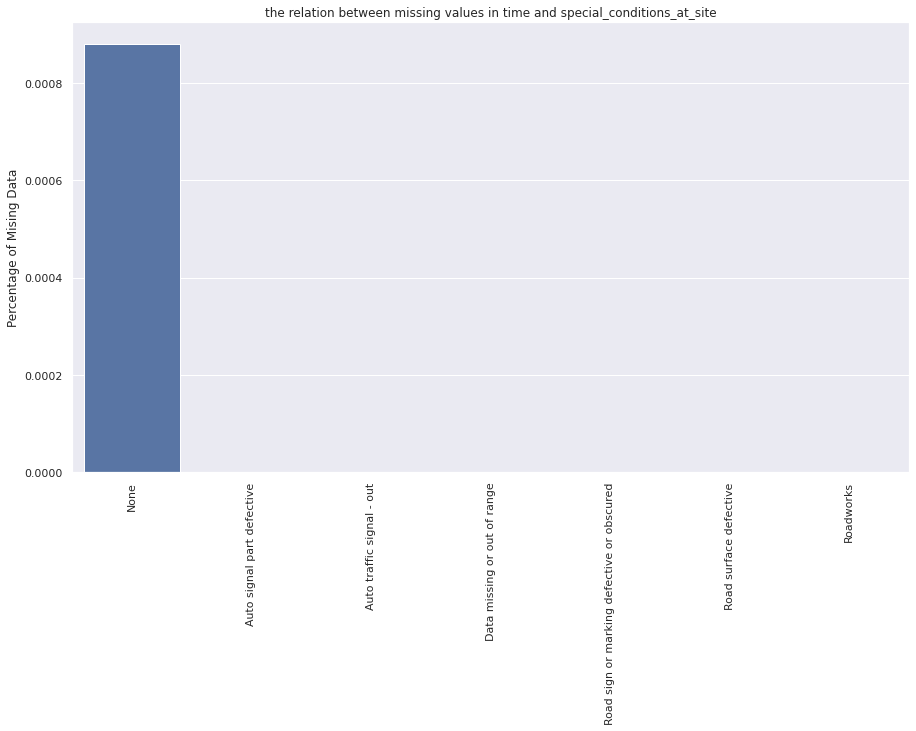

------------------------------------------------------------------------------------------
carriageway_hazards
None                            0.000885
Data missing or out of range    0.000000
Dog on road                     0.000000
Other animal on road            0.000000
Other object on road            0.000000
Previous accident               0.000000
Vehicle load on road            0.000000
Name: time, dtype: float64


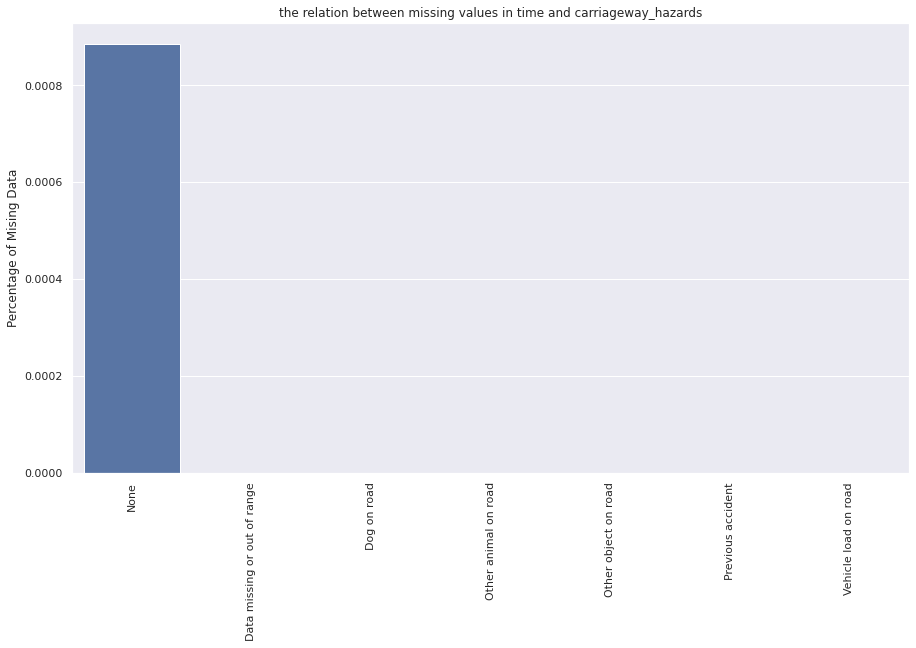

------------------------------------------------------------------------------------------
Current Feature is first_road_number 

location_easting_osgr
359540.0    16.666667
470390.0    14.285714
359760.0    12.500000
362260.0    12.500000
321900.0    12.500000
              ...    
387800.0     0.000000
387790.0     0.000000
387780.0     0.000000
387770.0     0.000000
942600.0     0.000000
Name: first_road_number, Length: 35072, dtype: float64


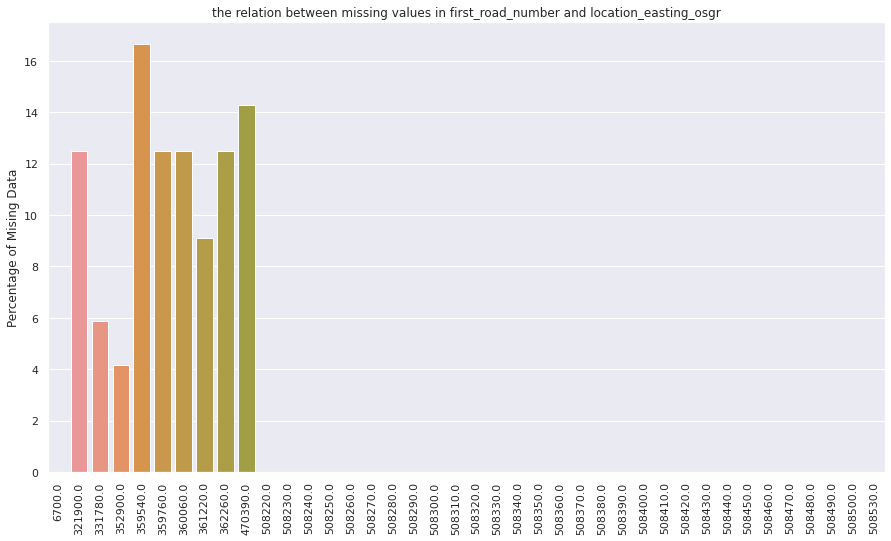

------------------------------------------------------------------------------------------
location_northing_osgr
159450.0    25.000000
102370.0    14.285714
172940.0     8.333333
129900.0     7.142857
174180.0     6.666667
              ...    
228330.0     0.000000
228350.0     0.000000
228360.0     0.000000
228370.0     0.000000
991700.0     0.000000
Name: first_road_number, Length: 45286, dtype: float64


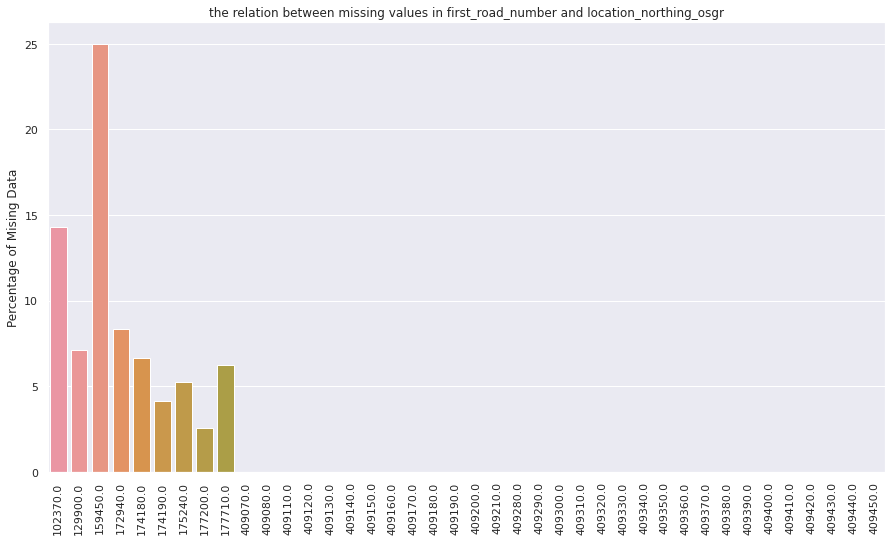

------------------------------------------------------------------------------------------
police_force
Avon and Somerset        0.397661
Hampshire                0.014156
Lincolnshire             0.000000
Merseyside               0.000000
Metropolitan Police      0.000000
Norfolk                  0.000000
North Wales              0.000000
North Yorkshire          0.000000
Northamptonshire         0.000000
Northern                 0.000000
Northumbria              0.000000
Nottinghamshire          0.000000
South Wales              0.000000
South Yorkshire          0.000000
Staffordshire            0.000000
Strathclyde              0.000000
Suffolk                  0.000000
Surrey                   0.000000
Sussex                   0.000000
Tayside                  0.000000
Thames Valley            0.000000
Warwickshire             0.000000
West Mercia              0.000000
West Midlands            0.000000
West Yorkshire           0.000000
Lothian and Borders      0.000000
Leicestershi

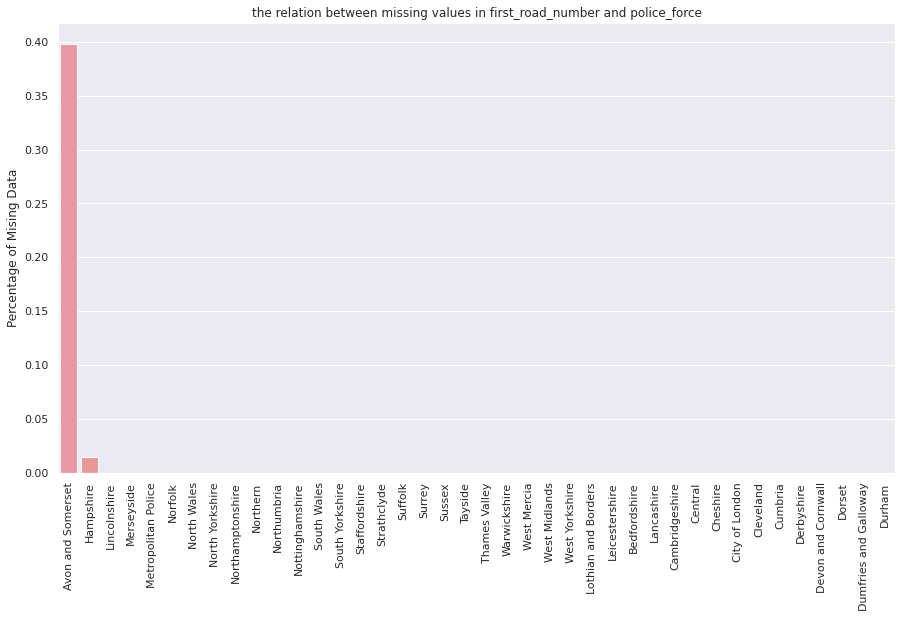

------------------------------------------------------------------------------------------
accident_severity
Serious    0.012050
Slight     0.006924
Fatal      0.000000
Name: first_road_number, dtype: float64


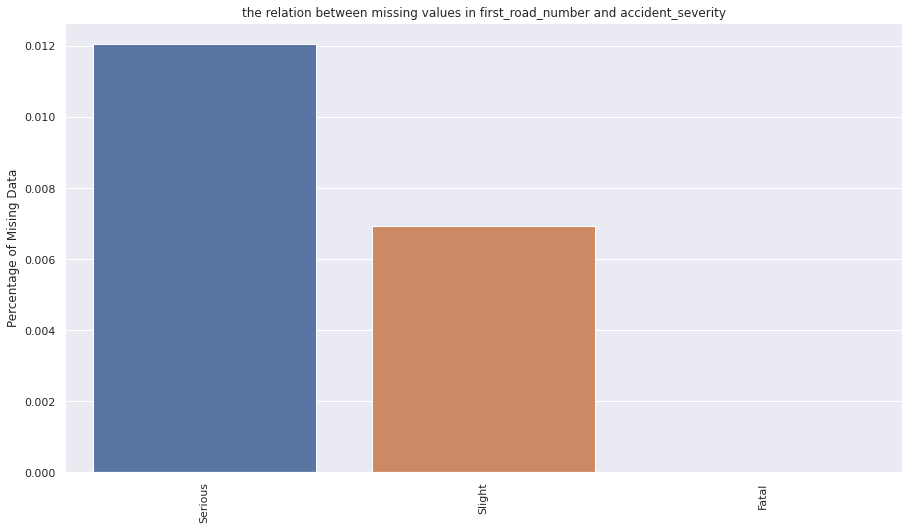

------------------------------------------------------------------------------------------
number_of_vehicles
5      0.122100
4      0.027586
3      0.010703
1      0.007431
2      0.006213
16     0.000000
75     0.000000
73     0.000000
53     0.000000
39     0.000000
38     0.000000
21     0.000000
20     0.000000
18     0.000000
13     0.000000
15     0.000000
14     0.000000
12     0.000000
11     0.000000
10     0.000000
9      0.000000
8      0.000000
7      0.000000
6      0.000000
192    0.000000
Name: first_road_number, dtype: float64


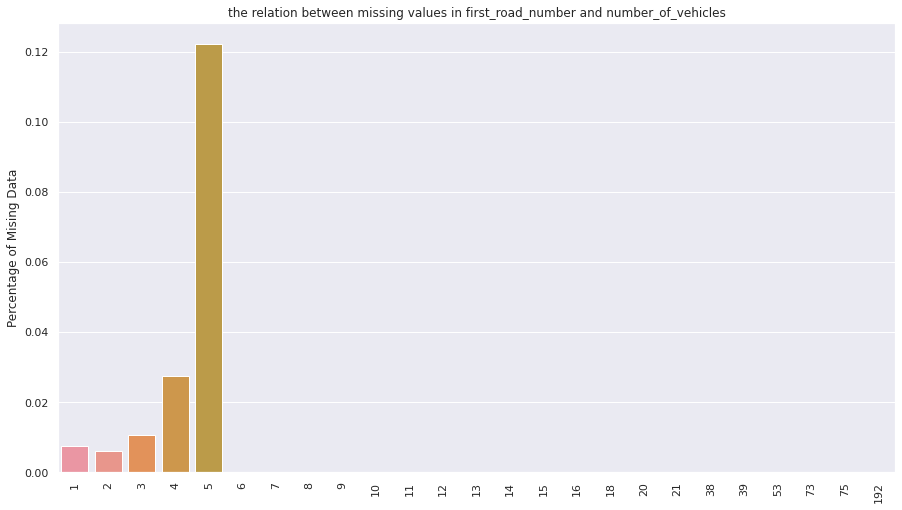

------------------------------------------------------------------------------------------
number_of_casualties
4     0.026323
2     0.008626
1     0.007672
17    0.000000
40    0.000000
34    0.000000
30    0.000000
29    0.000000
28    0.000000
27    0.000000
26    0.000000
22    0.000000
21    0.000000
20    0.000000
19    0.000000
18    0.000000
16    0.000000
15    0.000000
14    0.000000
13    0.000000
12    0.000000
11    0.000000
10    0.000000
9     0.000000
8     0.000000
7     0.000000
6     0.000000
5     0.000000
3     0.000000
42    0.000000
Name: first_road_number, dtype: float64


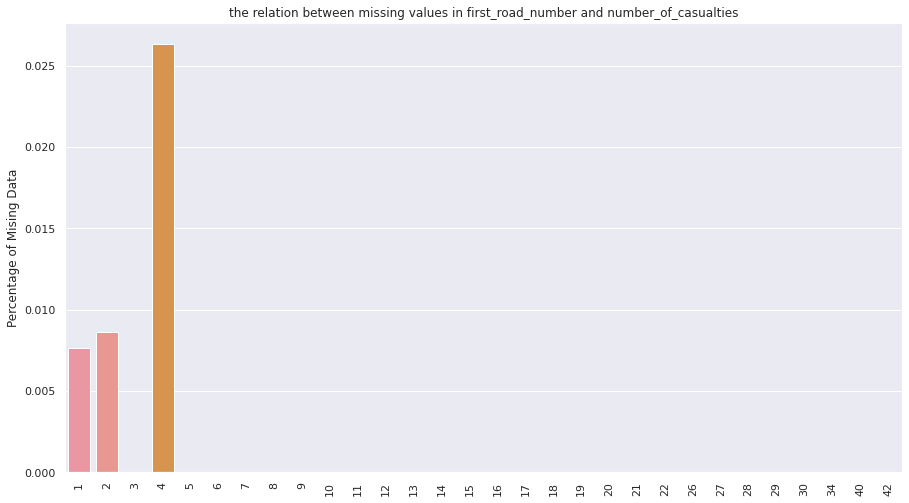

------------------------------------------------------------------------------------------
date
05/10/1992    0.220264
22/11/1992    0.191571
10/10/1992    0.181159
04/08/1992    0.172117
17/06/1992    0.164204
                ...   
11/05/1992    0.000000
11/04/1992    0.000000
11/03/1992    0.000000
11/02/1992    0.000000
31/12/1992    0.000000
Name: first_road_number, Length: 366, dtype: float64


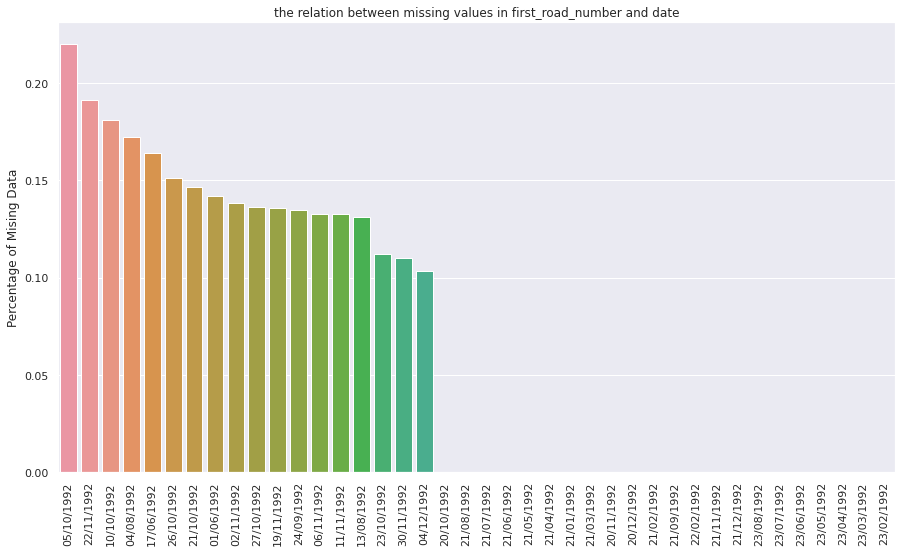

------------------------------------------------------------------------------------------
day_of_week
Monday       0.015076
Wednesday    0.008951
Thursday     0.008584
Friday       0.007535
Tuesday      0.006156
Sunday       0.003828
Saturday     0.003026
Name: first_road_number, dtype: float64


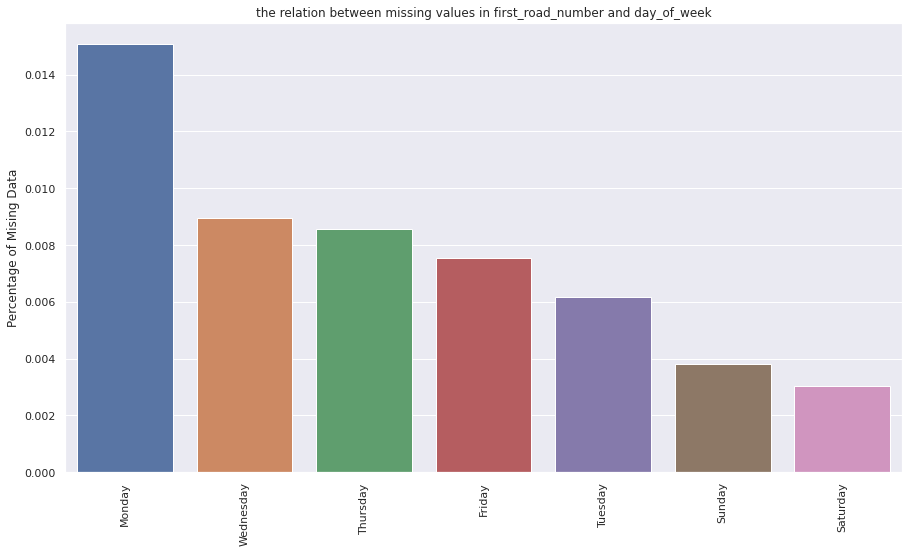

------------------------------------------------------------------------------------------
time
16:21    4.166667
12:41    3.846154
11:35    0.181818
15:20    0.169062
20:50    0.162338
           ...   
08:01    0.000000
08:00    0.000000
07:59    0.000000
07:58    0.000000
23:59    0.000000
Name: first_road_number, Length: 1434, dtype: float64


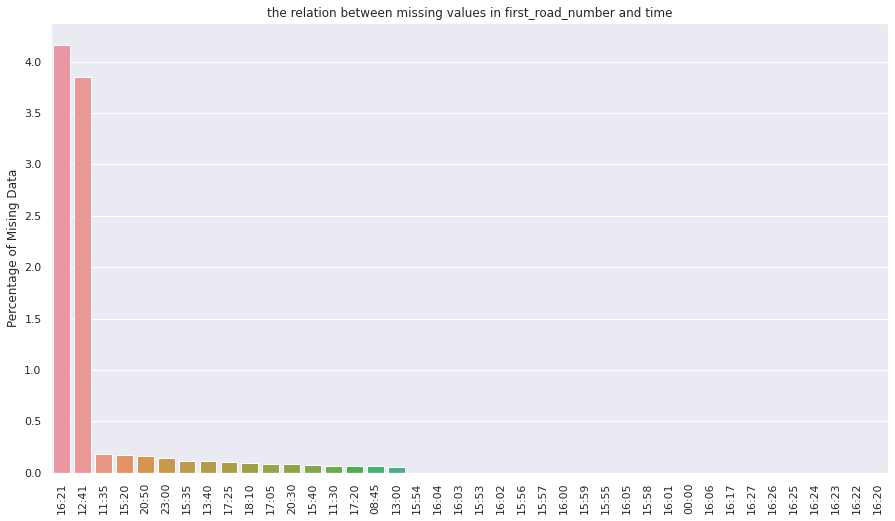

------------------------------------------------------------------------------------------
local_authority_district
South Somerset      0.836820
Taunton Deane       0.804290
Mendip              0.611621
Bristol, City of    0.500000
Sedgemoor           0.278552
                      ...   
Bridgnorth          0.000000
Brentwood           0.000000
Brent               0.000000
Breckland           0.000000
York                0.000000
Name: first_road_number, Length: 460, dtype: float64


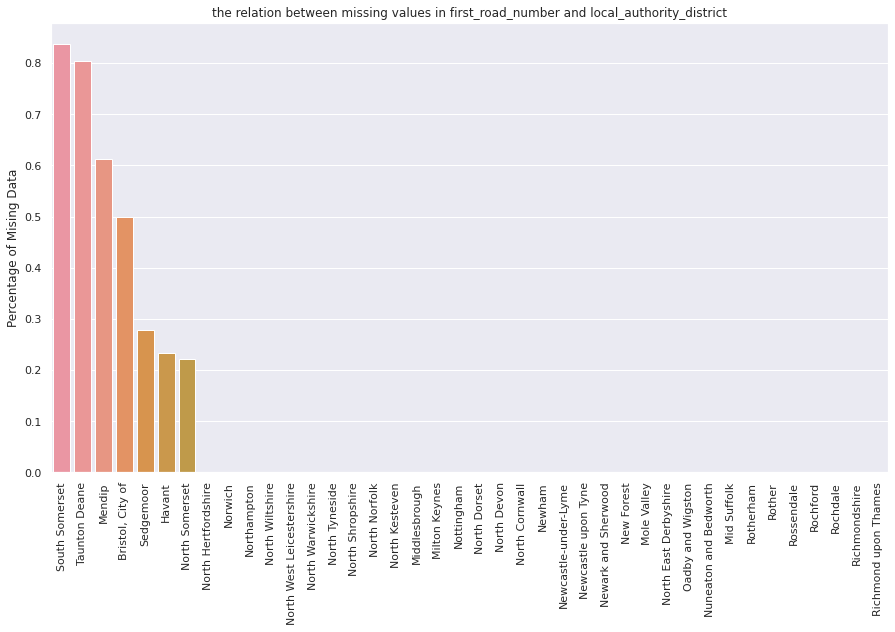

------------------------------------------------------------------------------------------
first_road_class
B               0.043989
Motorway        0.016226
A               0.003660
A(M)            0.000000
C               0.000000
Unclassified    0.000000
Name: first_road_number, dtype: float64


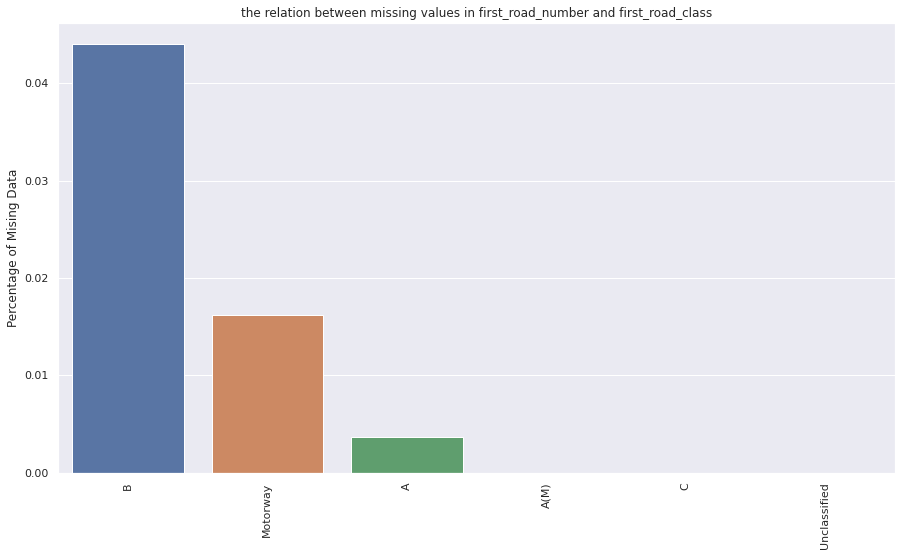

------------------------------------------------------------------------------------------
road_type
Roundabout                      0.018113
One way street/Slip road        0.014558
Dual carriageway                0.009428
Single carriageway              0.006584
Data missing or out of range    0.000000
Name: first_road_number, dtype: float64


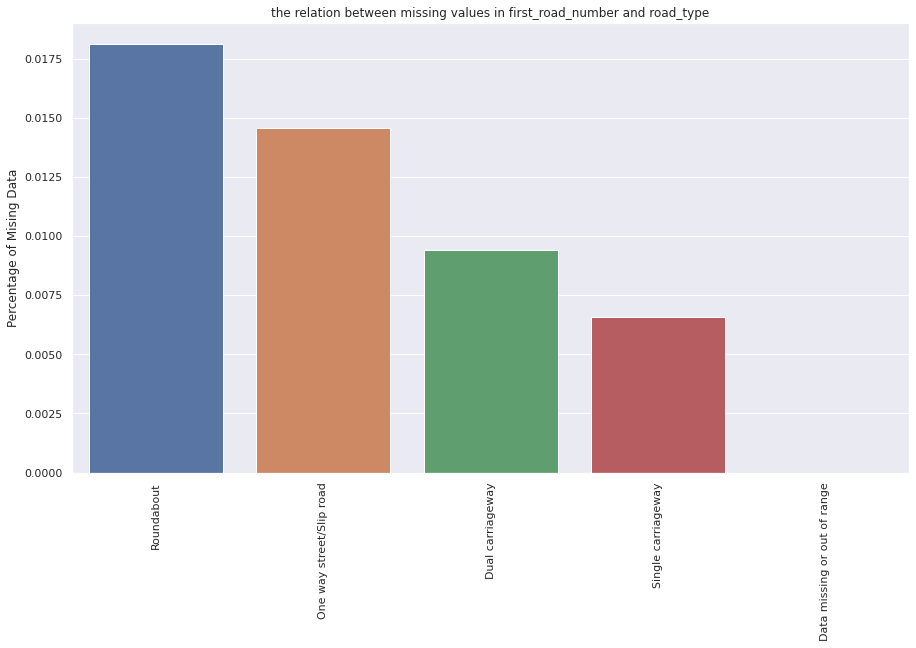

------------------------------------------------------------------------------------------
speed_limit
0.0     3.787879
70.0    0.015049
60.0    0.011345
30.0    0.003881
10.0    0.000000
41.0    0.000000
69.0    0.000000
66.0    0.000000
65.0    0.000000
63.0    0.000000
62.0    0.000000
61.0    0.000000
50.0    0.000000
45.0    0.000000
40.0    0.000000
12.0    0.000000
5.0     0.000000
36.0    0.000000
34.0    0.000000
33.0    0.000000
32.0    0.000000
25.0    0.000000
20.0    0.000000
15.0    0.000000
39.0    0.000000
Name: first_road_number, dtype: float64


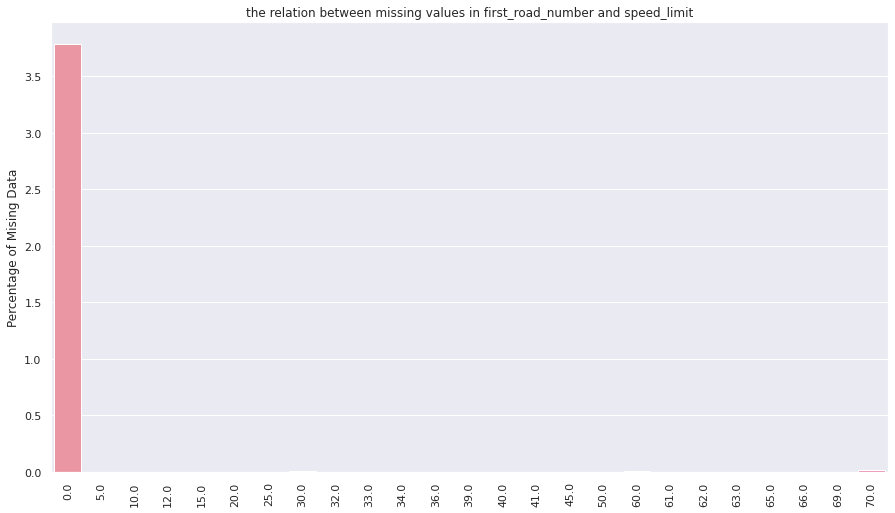

------------------------------------------------------------------------------------------
junction_detail
Other junction                         0.020076
Roundabout                             0.015392
Not at junction or within 20 metres    0.012240
Private drive or entrance              0.009605
Crossroads                             0.003592
T or staggered junction                0.002507
Data missing or out of range           0.000000
Mini-roundabout                        0.000000
More than 4 arms (not roundabout)      0.000000
Slip road                              0.000000
Name: first_road_number, dtype: float64


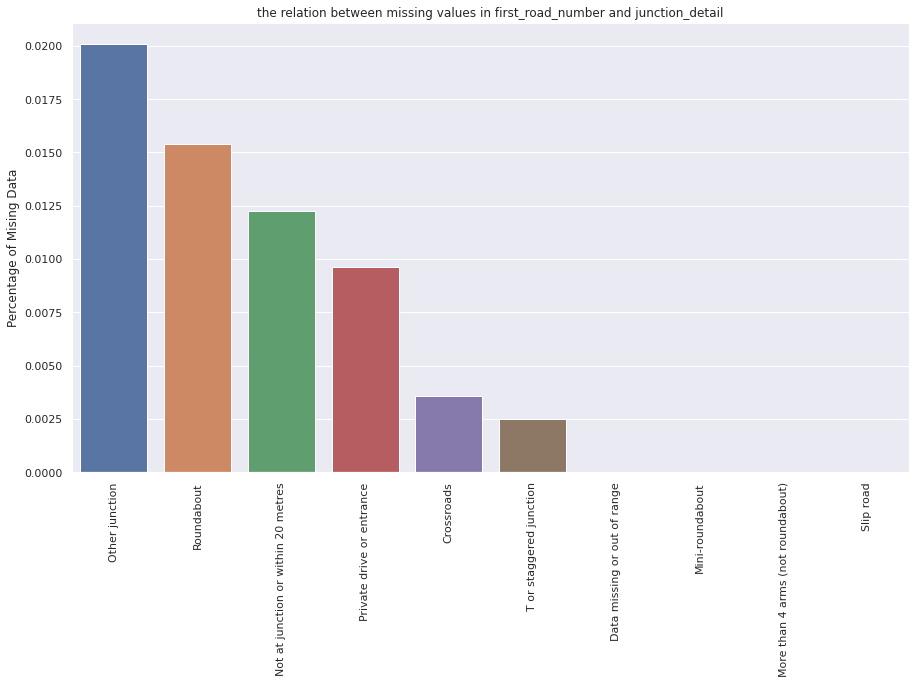

------------------------------------------------------------------------------------------
junction_control
Data missing or out of range    0.015519
Auto traffic signal             0.004978
Give way or uncontrolled        0.002495
Authorised person               0.000000
Stop sign                       0.000000
Name: first_road_number, dtype: float64


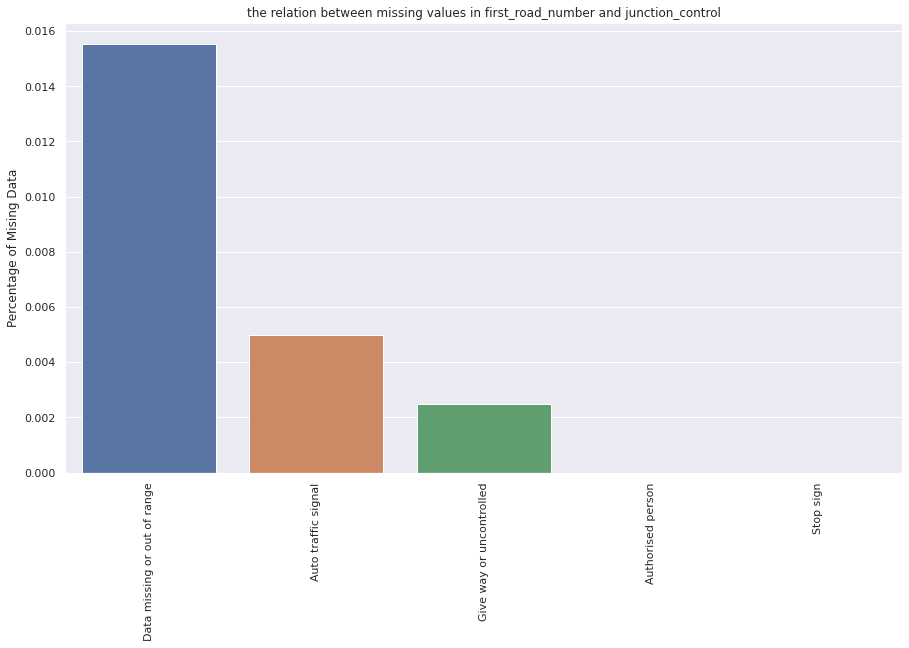

------------------------------------------------------------------------------------------
second_road_class
Motorway        0.086281
-1              0.012083
B               0.011743
C               0.008308
Unclassified    0.003964
A               0.000000
A(M)            0.000000
Name: first_road_number, dtype: float64


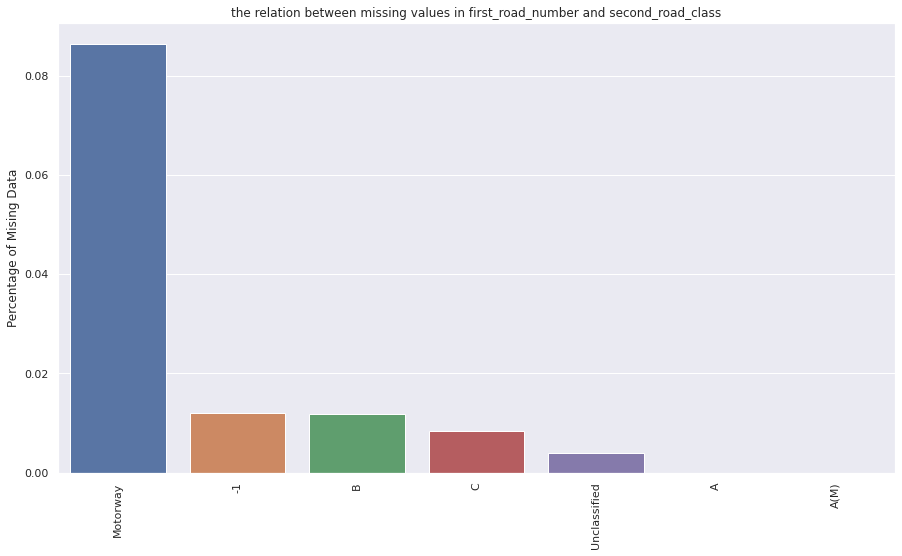

------------------------------------------------------------------------------------------
second_road_number
4465.0                                                                                                  50.000000
32.0                                                                                                     6.666667
-1                                                                                                       0.012080
first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero      0.004427
1000.0                                                                                                   0.000000
                                                                                                          ...    
3243.0                                                                                                   0.000000
3244.0                                                                                      

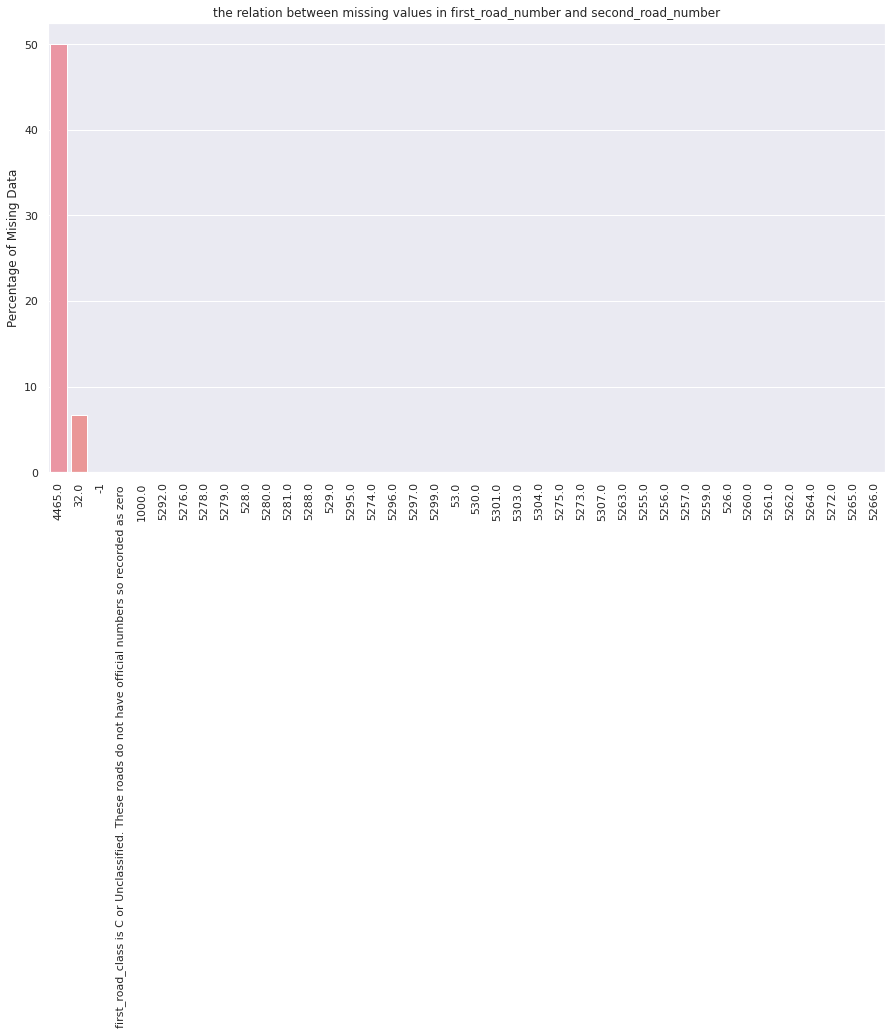

------------------------------------------------------------------------------------------
pedestrian_crossing_human_control
Data missing or out of range          3.345725
None within 50 metres                 0.003880
Control by other authorised person    0.000000
Control by school crossing patrol     0.000000
Name: first_road_number, dtype: float64


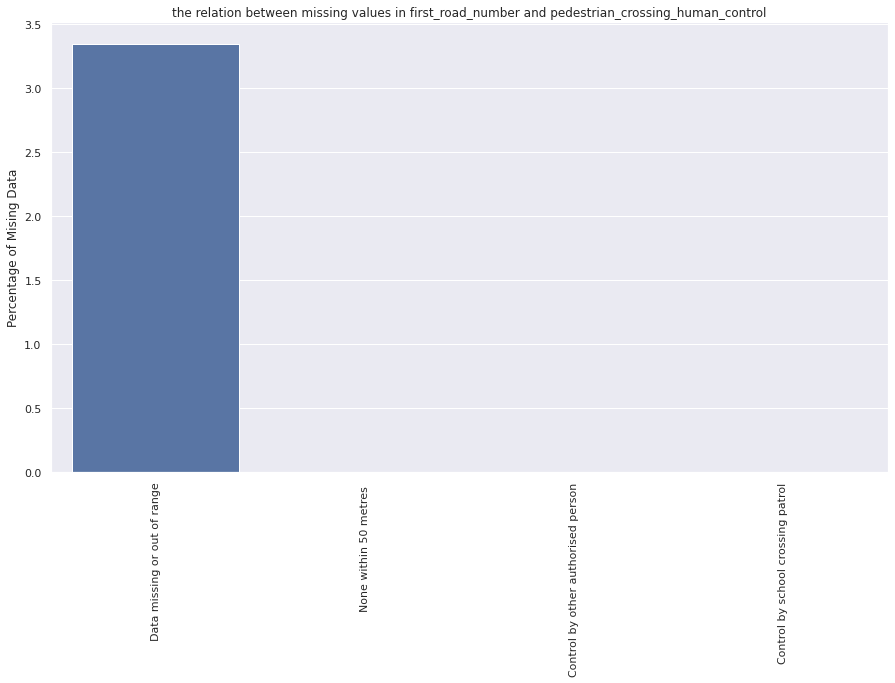

------------------------------------------------------------------------------------------
pedestrian_crossing_physical_facilities
Data missing or out of range                                                 3.345725
No physical crossing facilities within 50 metres                             0.004486
Central refuge                                                               0.000000
Footbridge or subway                                                         0.000000
Pedestrian phase at traffic signal junction                                  0.000000
Pelican, puffin, toucan or similar non-junction pedestrian light crossing    0.000000
Zebra                                                                        0.000000
Name: first_road_number, dtype: float64


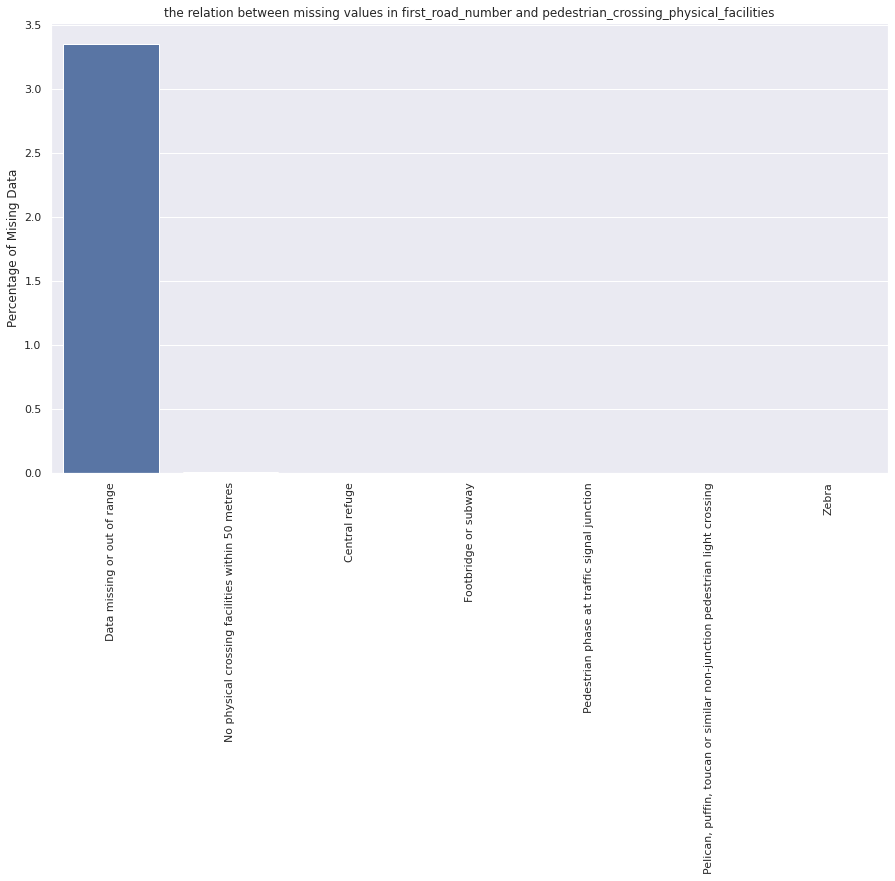

------------------------------------------------------------------------------------------
light_conditions
Data missing or out of range    3.813559
Daylight                        0.004785
Darkness - lights lit           0.002030
Darkness - lighting unknown     0.000000
Darkness - lights unlit         0.000000
Darkness - no lighting          0.000000
Name: first_road_number, dtype: float64


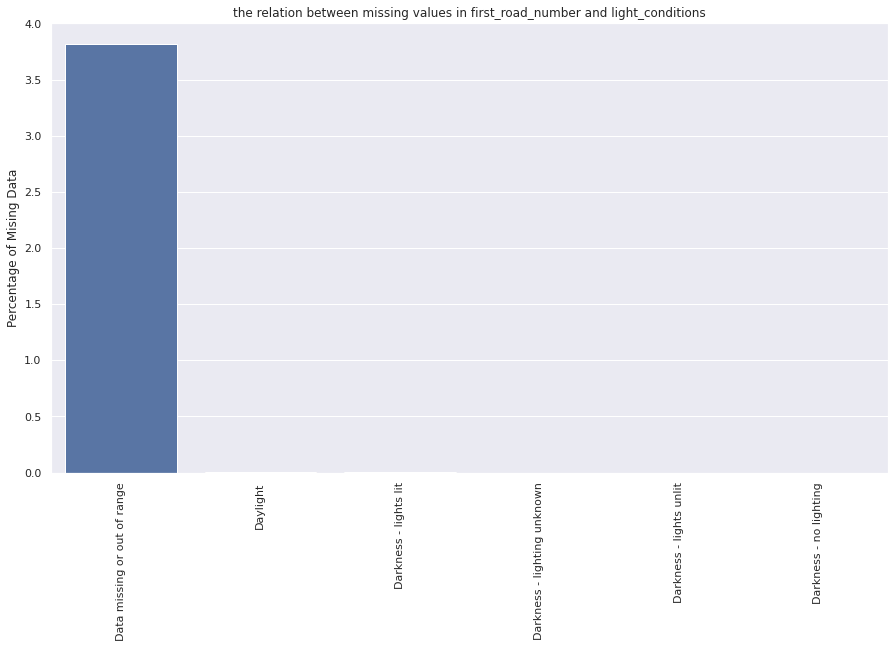

------------------------------------------------------------------------------------------
weather_conditions
Data missing or out of range    3.930131
Other                           0.021872
Fine no high winds              0.003921
Raining no high winds           0.002691
Fine + high winds               0.000000
Fog or mist                     0.000000
Raining + high winds            0.000000
Snowing + high winds            0.000000
Snowing no high winds           0.000000
Name: first_road_number, dtype: float64


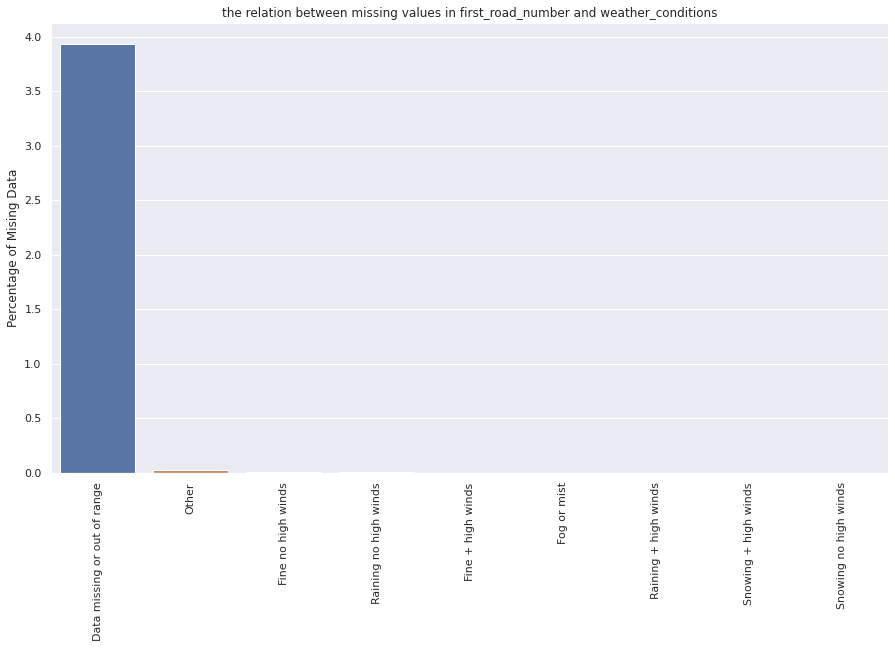

------------------------------------------------------------------------------------------
road_surface_conditions
Data missing or out of range    2.195122
Dry                             0.004889
Wet or damp                     0.002381
Flood over 3cm. deep            0.000000
Frost or ice                    0.000000
Snow                            0.000000
Name: first_road_number, dtype: float64


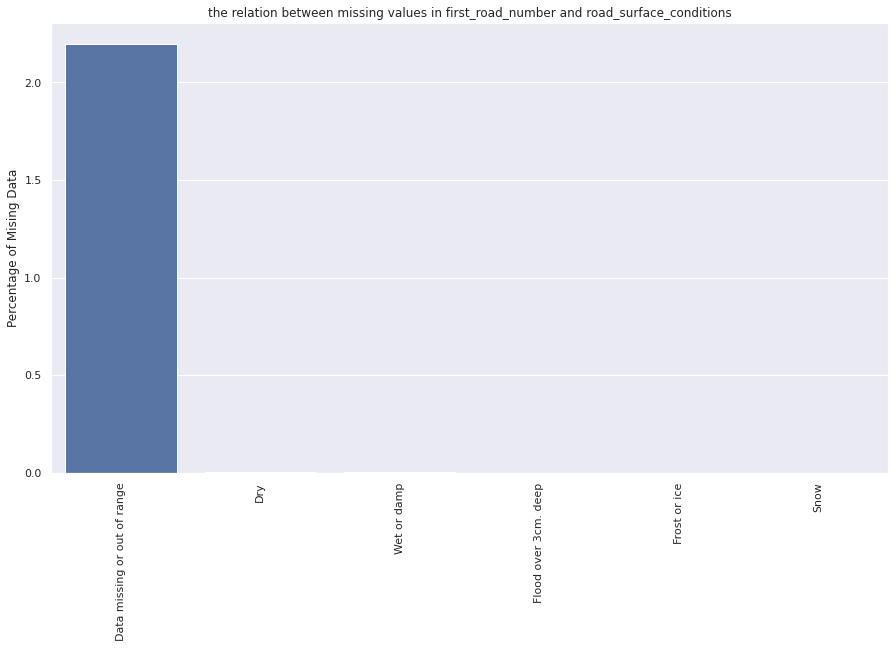

------------------------------------------------------------------------------------------
special_conditions_at_site
Data missing or out of range                  3.435115
None                                          0.003966
Auto signal part defective                    0.000000
Auto traffic signal - out                     0.000000
Road sign or marking defective or obscured    0.000000
Road surface defective                        0.000000
Roadworks                                     0.000000
Name: first_road_number, dtype: float64


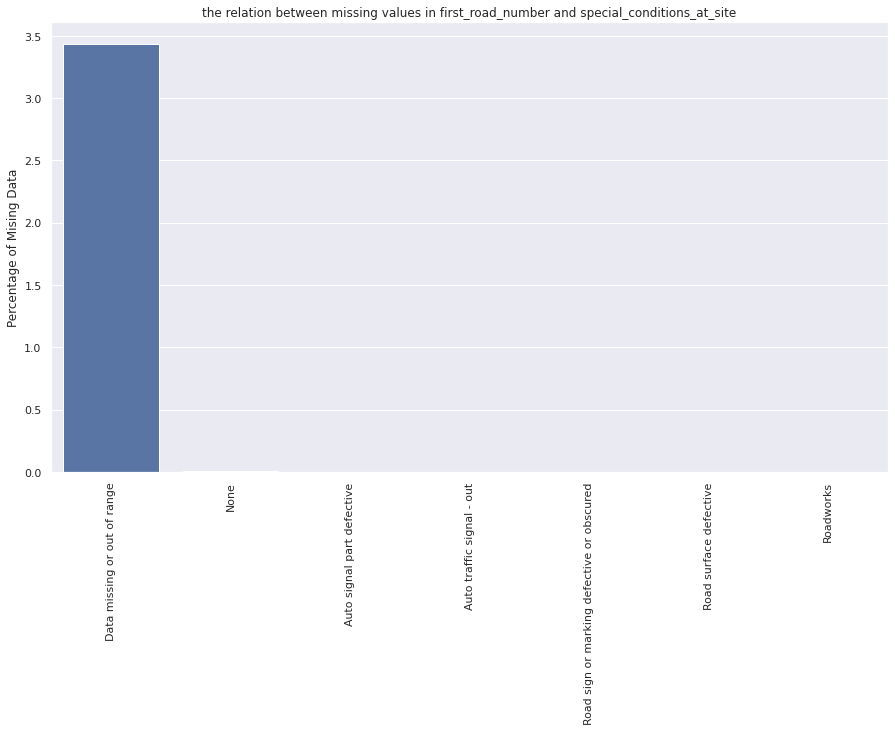

------------------------------------------------------------------------------------------
carriageway_hazards
Data missing or out of range    3.750000
None                            0.003981
Dog on road                     0.000000
Other animal on road            0.000000
Other object on road            0.000000
Previous accident               0.000000
Vehicle load on road            0.000000
Name: first_road_number, dtype: float64


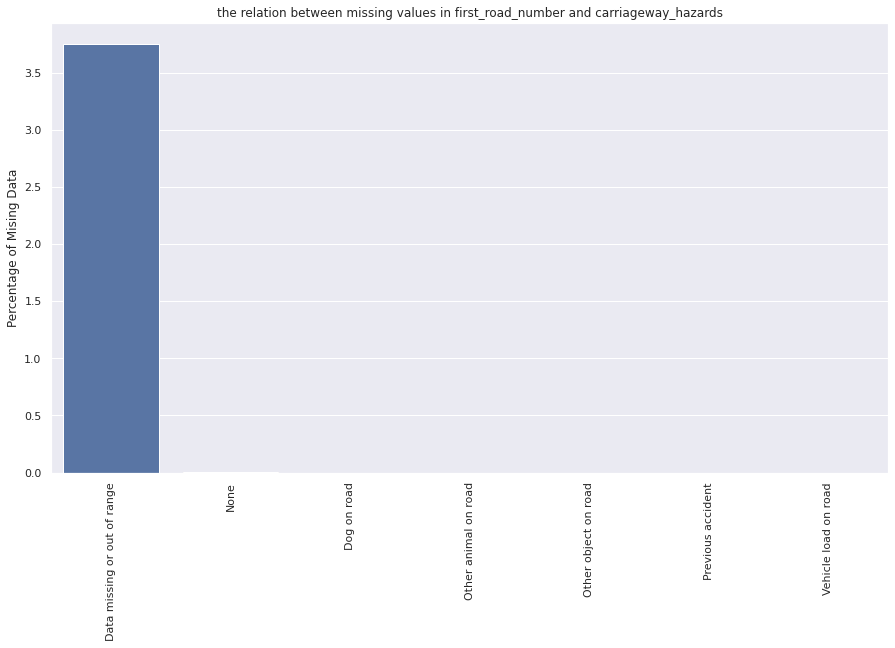

------------------------------------------------------------------------------------------
Current Feature is road_type 

location_easting_osgr
299520.0    100.0
244180.0    100.0
569340.0    100.0
293290.0    100.0
476970.0    100.0
            ...  
389720.0      0.0
389710.0      0.0
389700.0      0.0
389690.0      0.0
942600.0      0.0
Name: road_type, Length: 35072, dtype: float64


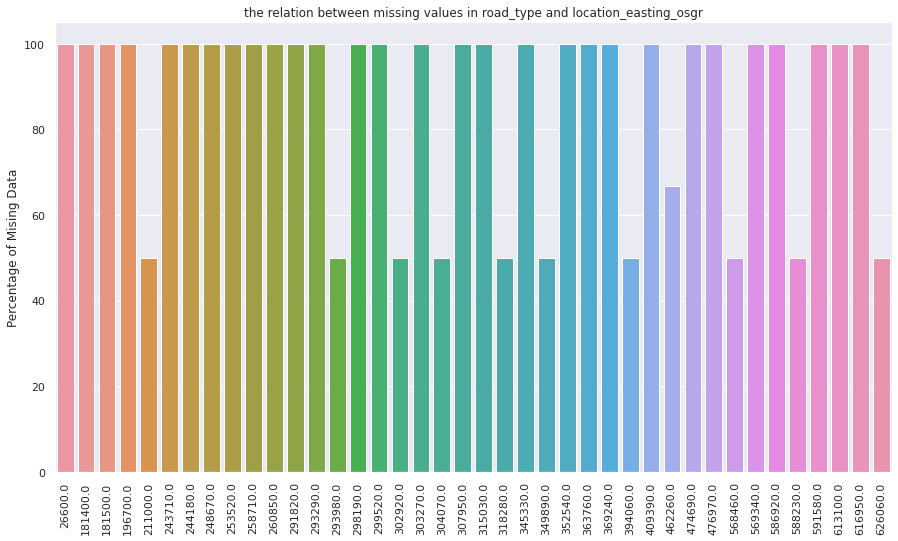

------------------------------------------------------------------------------------------
location_northing_osgr
529900.0    100.0
947200.0    100.0
49500.0     100.0
442440.0    100.0
515400.0    100.0
            ...  
231160.0      0.0
231170.0      0.0
231180.0      0.0
231190.0      0.0
991700.0      0.0
Name: road_type, Length: 45286, dtype: float64


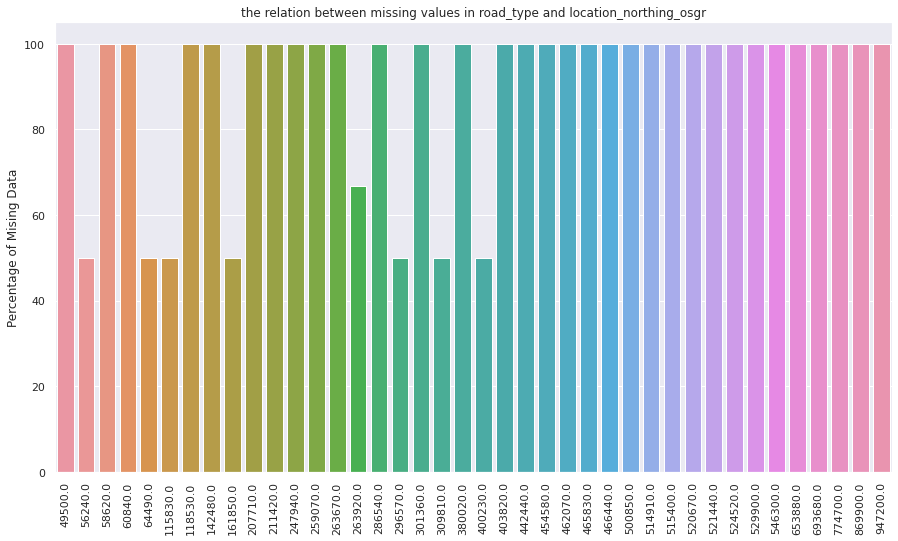

------------------------------------------------------------------------------------------
police_force
Greater Manchester       1.894484
South Wales              1.436344
Cambridgeshire           1.357333
Surrey                   1.250613
Northern                 1.084599
Avon and Somerset        1.029240
Hampshire                0.877690
Lincolnshire             0.778689
Northamptonshire         0.763359
Cleveland                0.751503
Essex                    0.726351
South Yorkshire          0.703426
City of London           0.613497
North Wales              0.604686
Cheshire                 0.582131
Derbyshire               0.563222
West Midlands            0.515068
Grampian                 0.458950
Sussex                   0.455622
West Mercia              0.416667
Humberside               0.413223
Devon and Cornwall       0.402930
Lancashire               0.396170
Cumbria                  0.393258
West Yorkshire           0.369620
Norfolk                  0.354296
Durham      

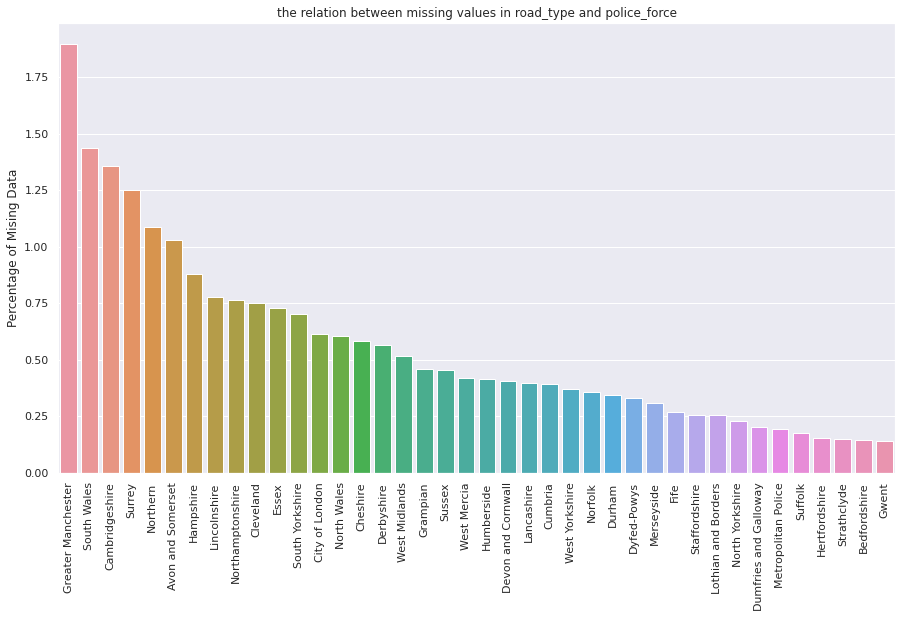

------------------------------------------------------------------------------------------
accident_severity
Slight     0.510239
Serious    0.308478
Fatal      0.181582
Name: road_type, dtype: float64


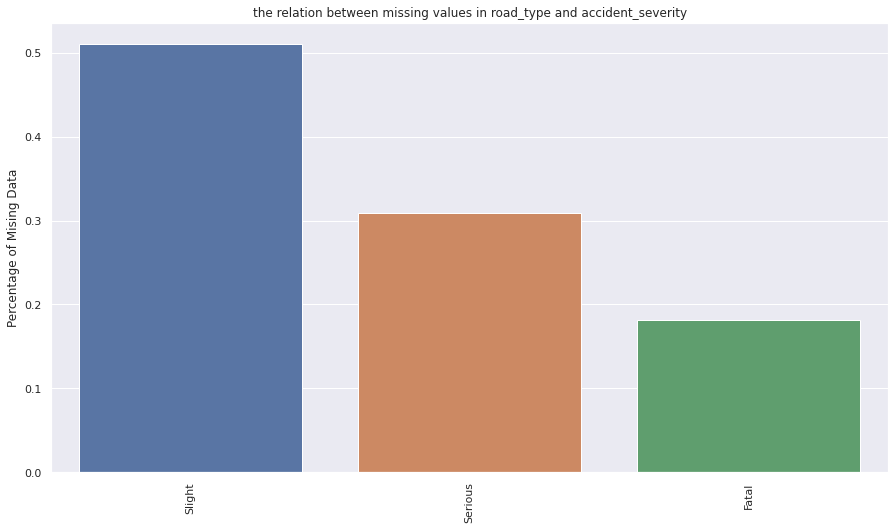

------------------------------------------------------------------------------------------
number_of_vehicles
1      0.604424
2      0.438760
3      0.176603
4      0.165517
5      0.122100
16     0.000000
75     0.000000
73     0.000000
53     0.000000
39     0.000000
38     0.000000
21     0.000000
20     0.000000
18     0.000000
13     0.000000
15     0.000000
14     0.000000
12     0.000000
11     0.000000
10     0.000000
9      0.000000
8      0.000000
7      0.000000
6      0.000000
192    0.000000
Name: road_type, dtype: float64


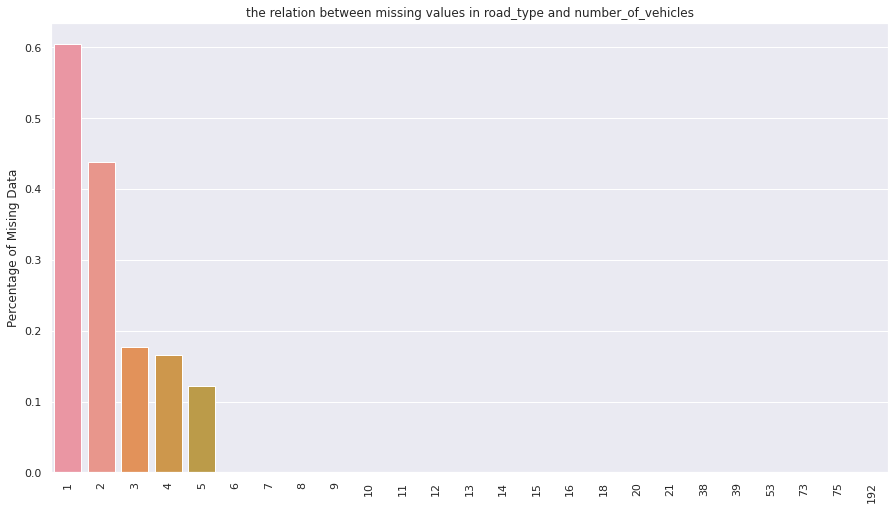

------------------------------------------------------------------------------------------
number_of_casualties
1     0.524409
2     0.324927
3     0.208290
6     0.178891
5     0.142755
27    0.000000
20    0.000000
21    0.000000
22    0.000000
26    0.000000
29    0.000000
28    0.000000
18    0.000000
30    0.000000
34    0.000000
40    0.000000
19    0.000000
16    0.000000
17    0.000000
15    0.000000
14    0.000000
13    0.000000
12    0.000000
11    0.000000
10    0.000000
9     0.000000
8     0.000000
7     0.000000
4     0.000000
42    0.000000
Name: road_type, dtype: float64


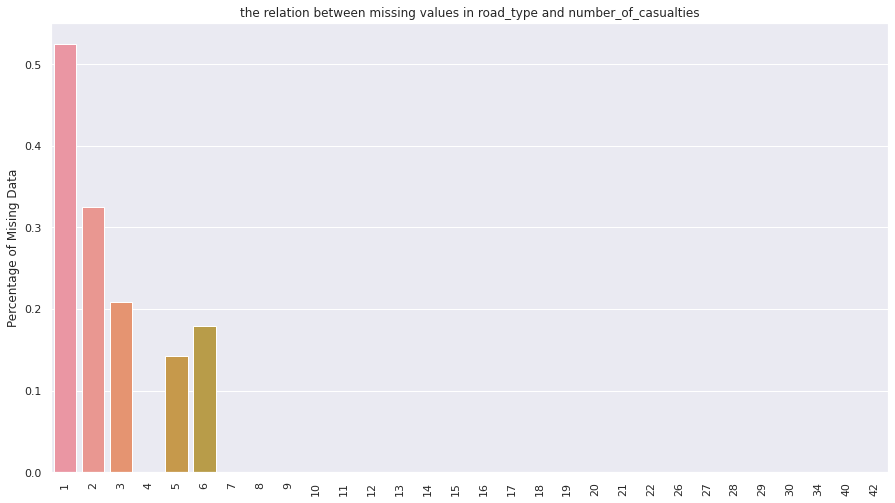

------------------------------------------------------------------------------------------
date
14/05/1992    1.501502
28/07/1992    1.372213
28/09/1992    1.355932
29/04/1992    1.338432
17/03/1992    1.282051
                ...   
22/02/1992    0.000000
07/01/1992    0.000000
05/07/1992    0.000000
05/01/1992    0.000000
23/02/1992    0.000000
Name: road_type, Length: 366, dtype: float64


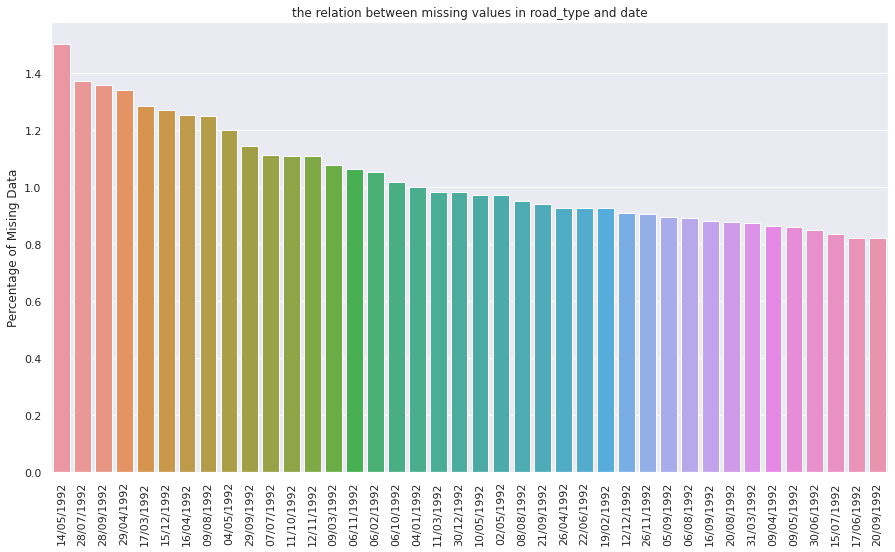

------------------------------------------------------------------------------------------
day_of_week
Tuesday      0.541722
Wednesday    0.486320
Thursday     0.483562
Monday       0.467346
Sunday       0.447915
Friday       0.437010
Saturday     0.420626
Name: road_type, dtype: float64


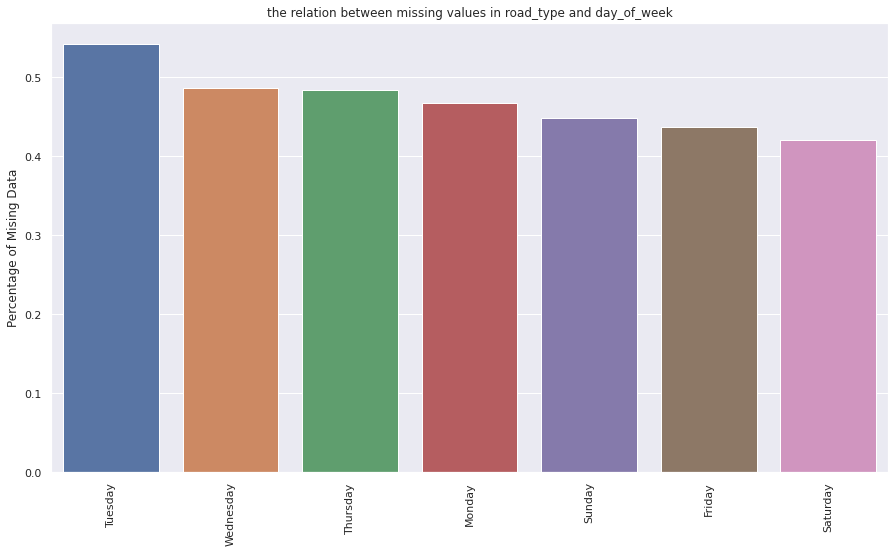

------------------------------------------------------------------------------------------
time
22:51    10.000000
00:39     9.090909
12:36     7.500000
19:11     6.666667
07:27     6.250000
           ...    
08:16     0.000000
08:14     0.000000
08:13     0.000000
08:11     0.000000
23:59     0.000000
Name: road_type, Length: 1434, dtype: float64


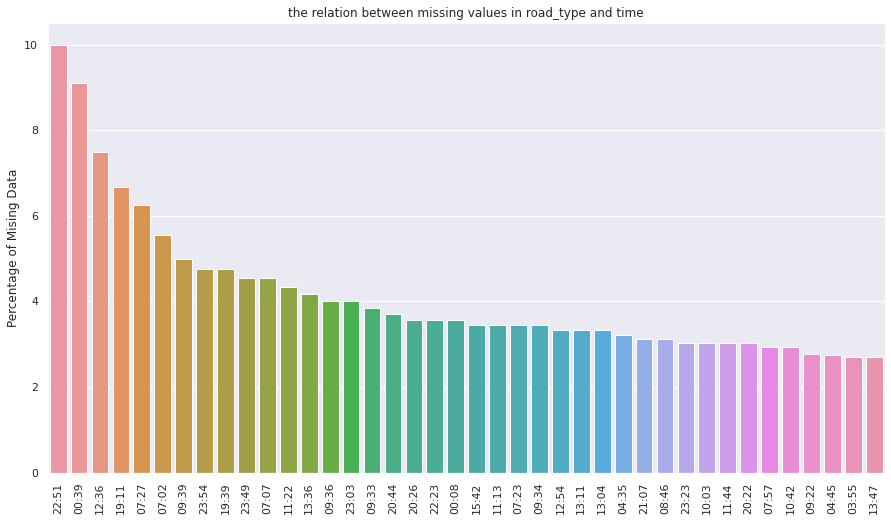

------------------------------------------------------------------------------------------
local_authority_district
Woking            3.428571
Trafford          3.214696
804               2.816901
808               2.752294
699               2.728227
                    ...   
Forest Heath      0.000000
Forest of Dean    0.000000
Gateshead         0.000000
Gedling           0.000000
York              0.000000
Name: road_type, Length: 460, dtype: float64


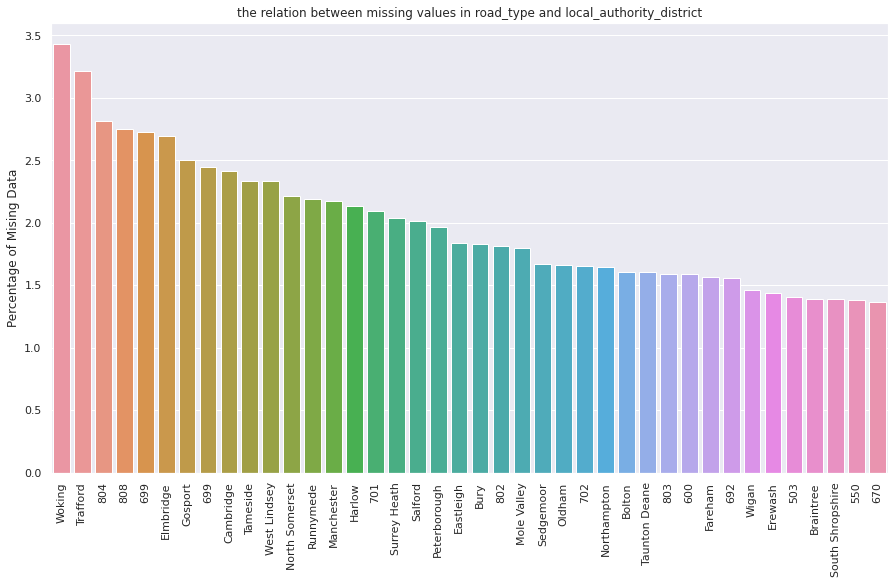

------------------------------------------------------------------------------------------
first_road_class
Unclassified    0.949358
A(M)            0.856531
C               0.331061
Motorway        0.292066
A               0.267196
B               0.250398
Name: road_type, dtype: float64


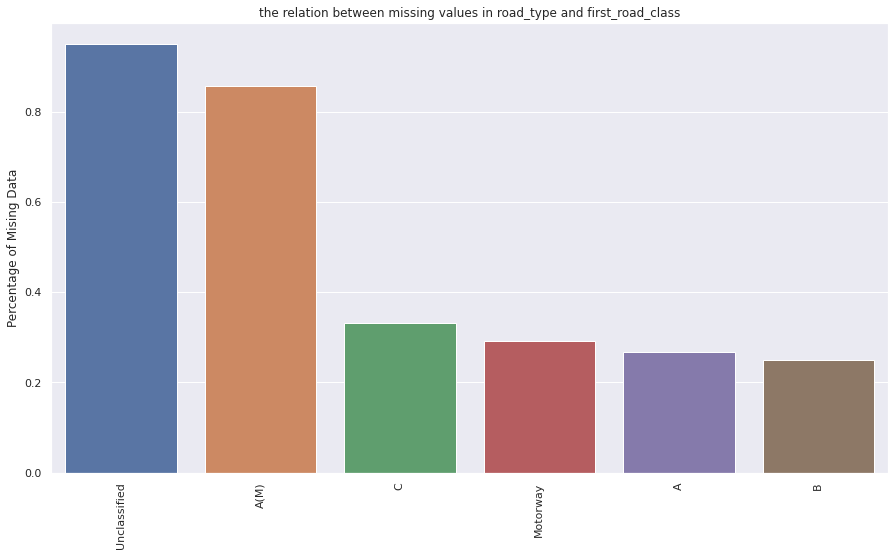

------------------------------------------------------------------------------------------
first_road_number
4370.0    33.333333
4262.0    33.333333
5430.0    22.222222
5397.0    20.000000
4185.0    20.000000
            ...    
3369.0     0.000000
337.0      0.000000
3370.0     0.000000
3372.0     0.000000
4418.0     0.000000
Name: road_type, Length: 3445, dtype: float64


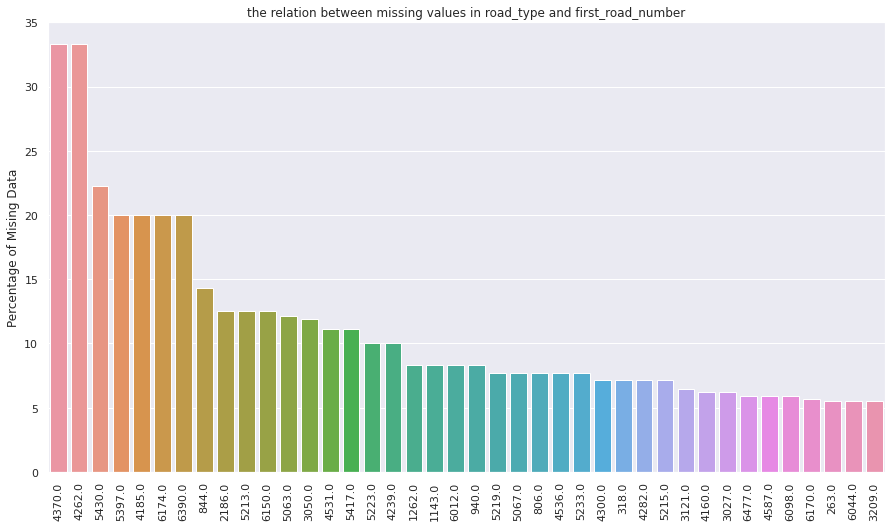

------------------------------------------------------------------------------------------
speed_limit
63.0    100.000000
12.0     50.000000
10.0     41.935484
15.0     30.000000
5.0      28.571429
20.0     10.000000
0.0       5.303030
30.0      0.590583
60.0      0.183790
70.0      0.180587
40.0      0.168407
50.0      0.131839
34.0      0.000000
36.0      0.000000
33.0      0.000000
41.0      0.000000
45.0      0.000000
32.0      0.000000
61.0      0.000000
62.0      0.000000
25.0      0.000000
65.0      0.000000
66.0      0.000000
69.0      0.000000
39.0      0.000000
Name: road_type, dtype: float64


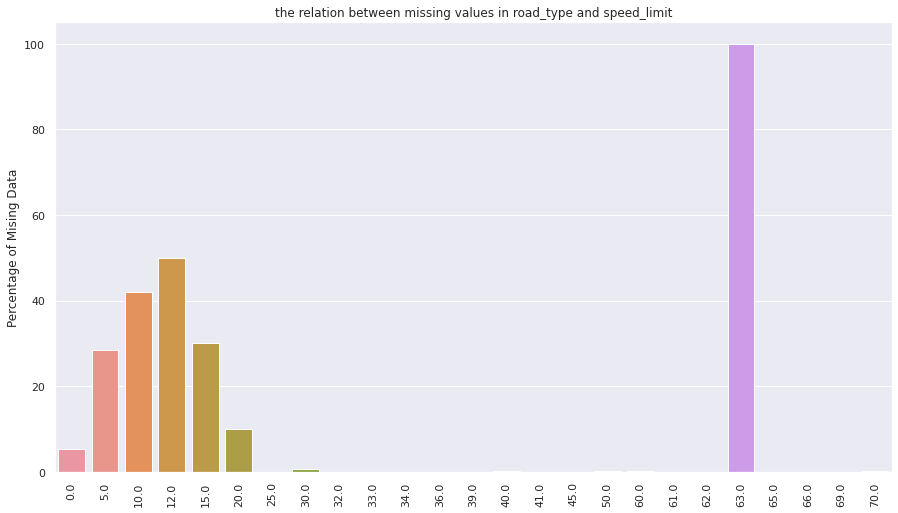

------------------------------------------------------------------------------------------
junction_detail
Data missing or out of range           20.000000
Other junction                          2.288697
Slip road                               1.053424
More than 4 arms (not roundabout)       0.684718
Private drive or entrance               0.595524
Not at junction or within 20 metres     0.522983
T or staggered junction                 0.329607
Crossroads                              0.319707
Roundabout                              0.315530
Mini-roundabout                         0.223380
Name: road_type, dtype: float64


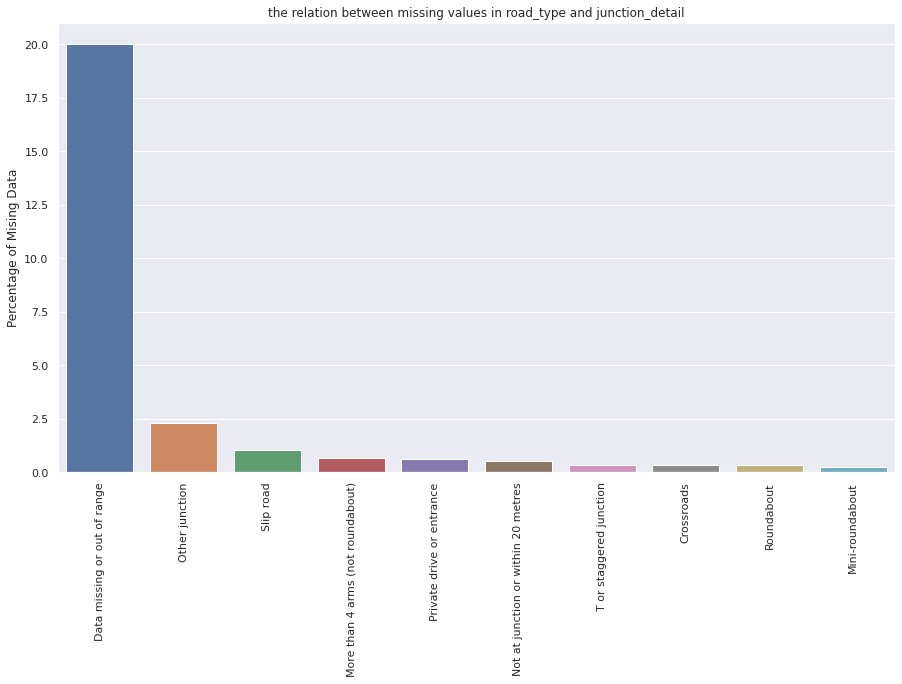

------------------------------------------------------------------------------------------
junction_control
Authorised person               2.139037
Auto traffic signal             0.547591
Data missing or out of range    0.527652
Give way or uncontrolled        0.410831
Stop sign                       0.379107
Name: road_type, dtype: float64


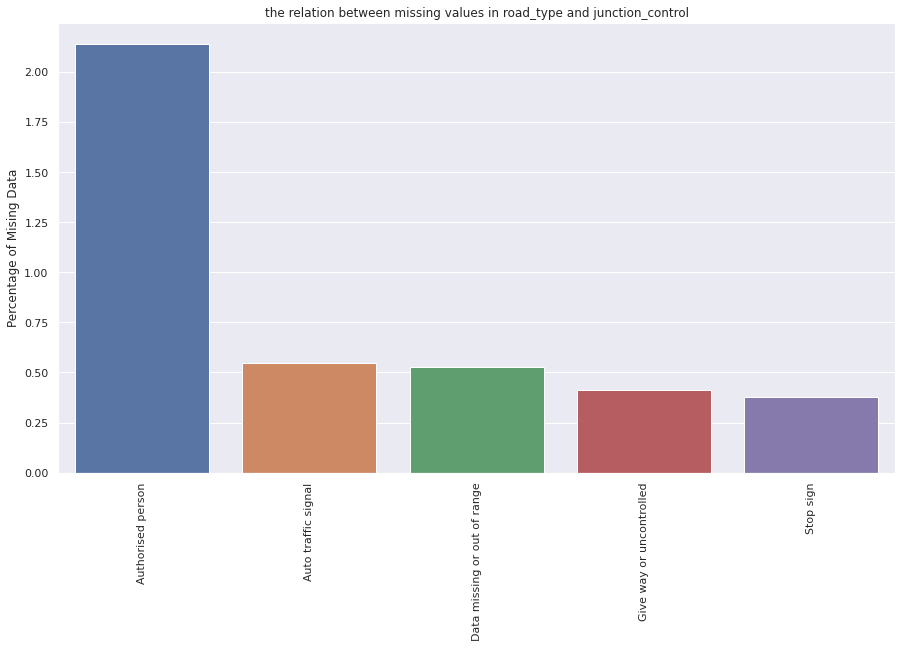

------------------------------------------------------------------------------------------
second_road_class
A(M)            1.630435
Motorway        0.690250
-1              0.529473
A               0.519292
Unclassified    0.436002
B               0.340535
C               0.257539
Name: road_type, dtype: float64


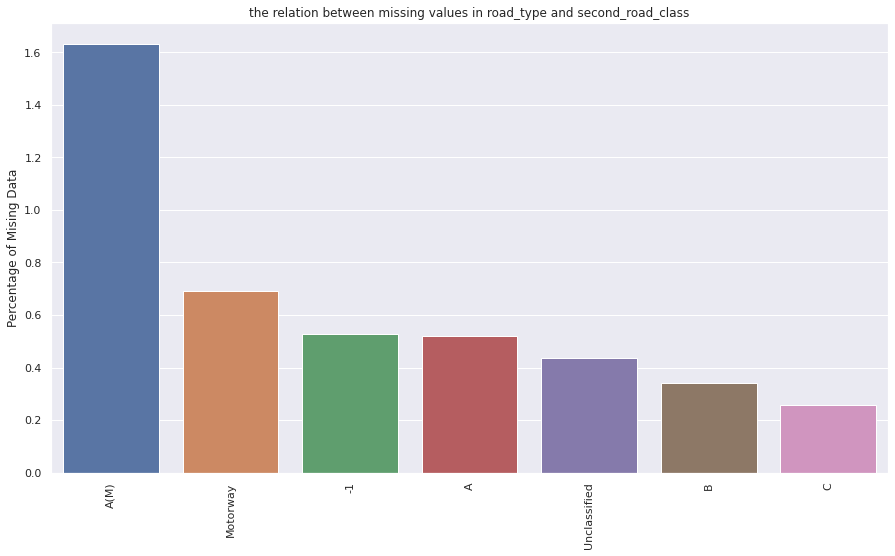

------------------------------------------------------------------------------------------
second_road_number
3103.0    100.000000
6204.0     50.000000
5255.0     50.000000
6409.0     50.000000
6187.0     33.333333
             ...    
3376.0      0.000000
3377.0      0.000000
3378.0      0.000000
3379.0      0.000000
4364.0      0.000000
Name: road_type, Length: 2795, dtype: float64


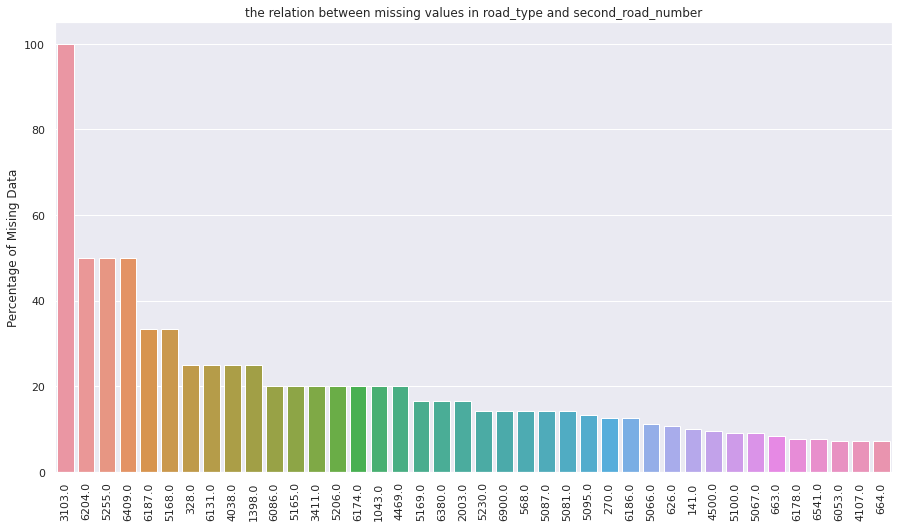

------------------------------------------------------------------------------------------
pedestrian_crossing_human_control
Data missing or out of range          2.602230
Control by other authorised person    0.724638
None within 50 metres                 0.466917
Control by school crossing patrol     0.266667
Name: road_type, dtype: float64


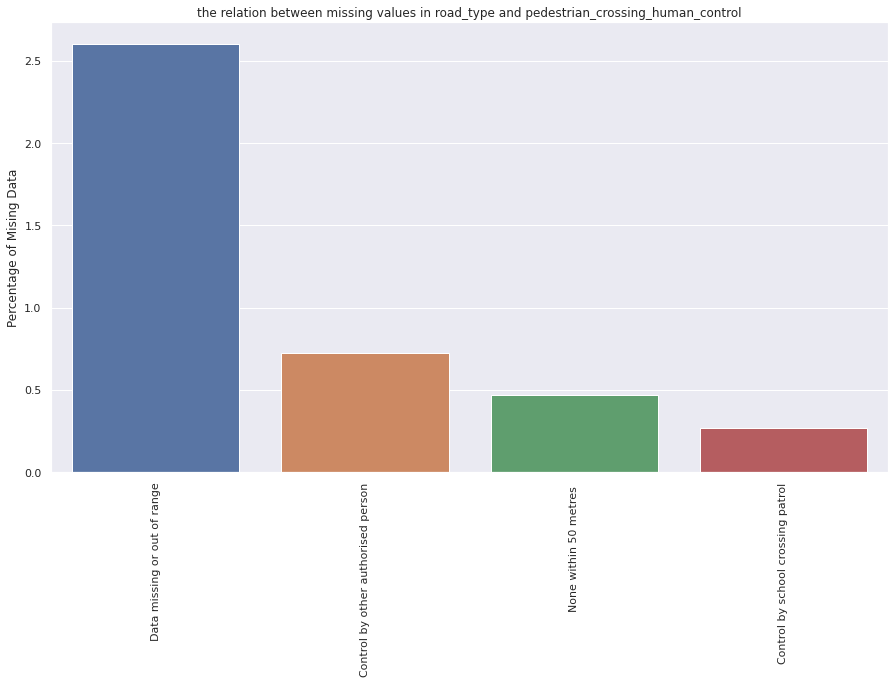

------------------------------------------------------------------------------------------
pedestrian_crossing_physical_facilities
Data missing or out of range                                                 2.602230
No physical crossing facilities within 50 metres                             0.497964
Footbridge or subway                                                         0.444050
Pedestrian phase at traffic signal junction                                  0.294151
Pelican, puffin, toucan or similar non-junction pedestrian light crossing    0.256893
Zebra                                                                        0.246082
Central refuge                                                               0.245270
Name: road_type, dtype: float64


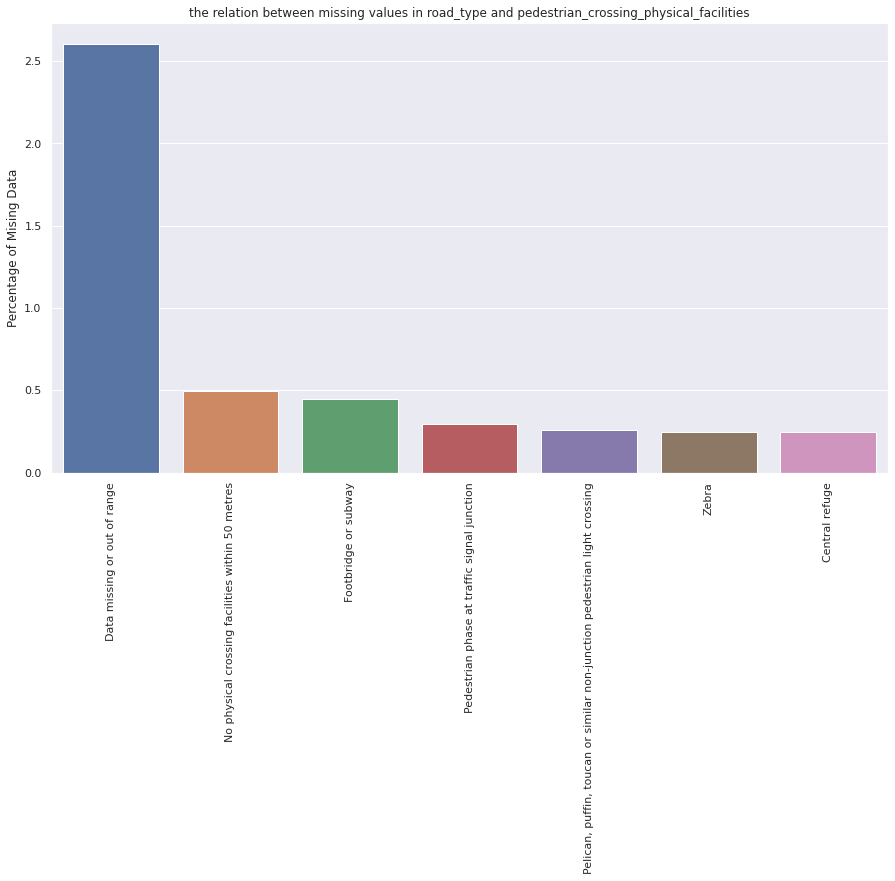

------------------------------------------------------------------------------------------
light_conditions
Darkness - lighting unknown     2.137455
Data missing or out of range    1.694915
Darkness - lights unlit         0.578035
Daylight                        0.508391
Darkness - no lighting          0.307474
Darkness - lights lit           0.265952
Name: road_type, dtype: float64


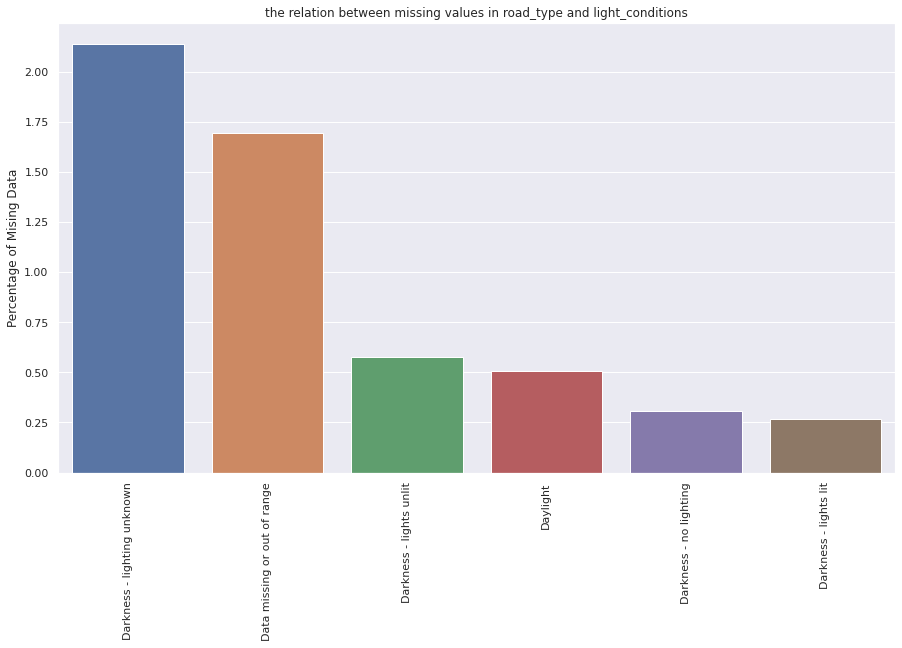

------------------------------------------------------------------------------------------
weather_conditions
Data missing or out of range    1.746725
Other                           0.809274
Fine + high winds               0.527046
Fine no high winds              0.469986
Snowing no high winds           0.369004
Fog or mist                     0.366860
Raining no high winds           0.328266
Raining + high winds            0.288866
Snowing + high winds            0.000000
Name: road_type, dtype: float64


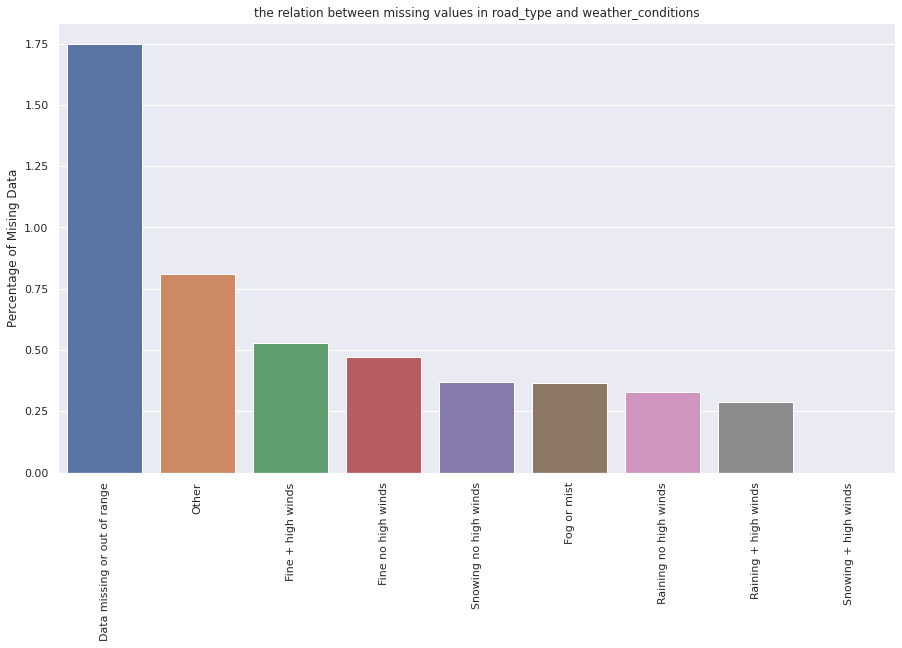

------------------------------------------------------------------------------------------
road_surface_conditions
Data missing or out of range    1.463415
Snow                            0.836820
Dry                             0.555241
Wet or damp                     0.332210
Flood over 3cm. deep            0.246914
Frost or ice                    0.204666
Name: road_type, dtype: float64


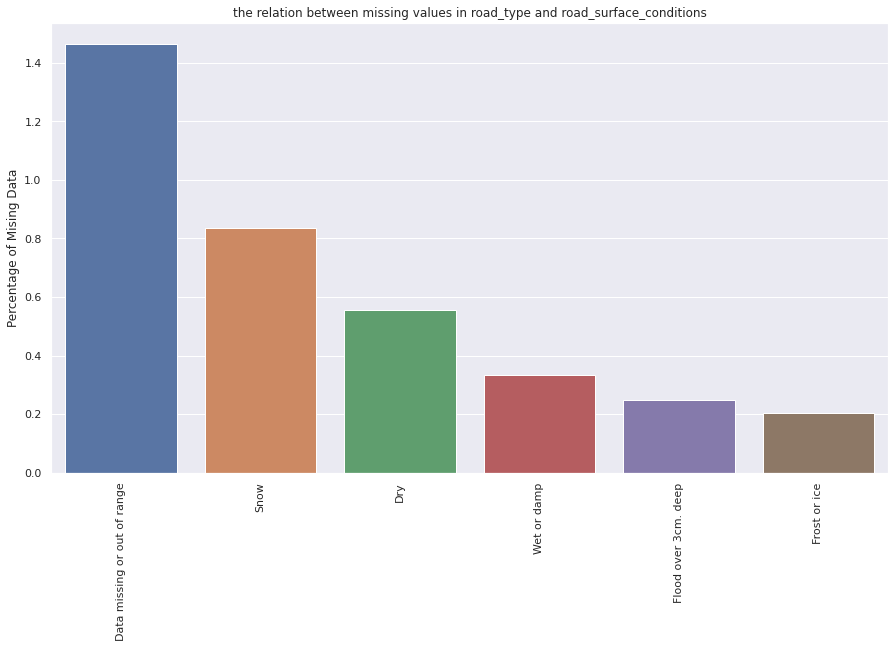

------------------------------------------------------------------------------------------
special_conditions_at_site
Data missing or out of range                  2.290076
Road sign or marking defective or obscured    0.597015
Road surface defective                        0.548948
Auto traffic signal - out                     0.510204
None                                          0.467106
Roadworks                                     0.436233
Auto signal part defective                    0.000000
Name: road_type, dtype: float64


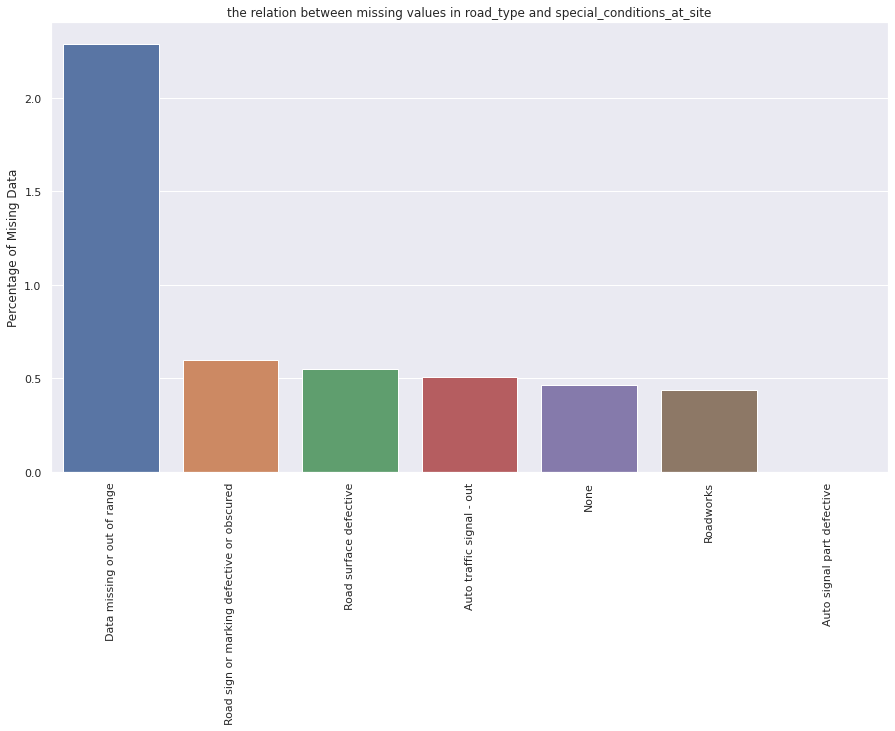

------------------------------------------------------------------------------------------
carriageway_hazards
Data missing or out of range    2.083333
Other object on road            0.585080
Vehicle load on road            0.584795
None                            0.468402
Dog on road                     0.163132
Other animal on road            0.152905
Previous accident               0.000000
Name: road_type, dtype: float64


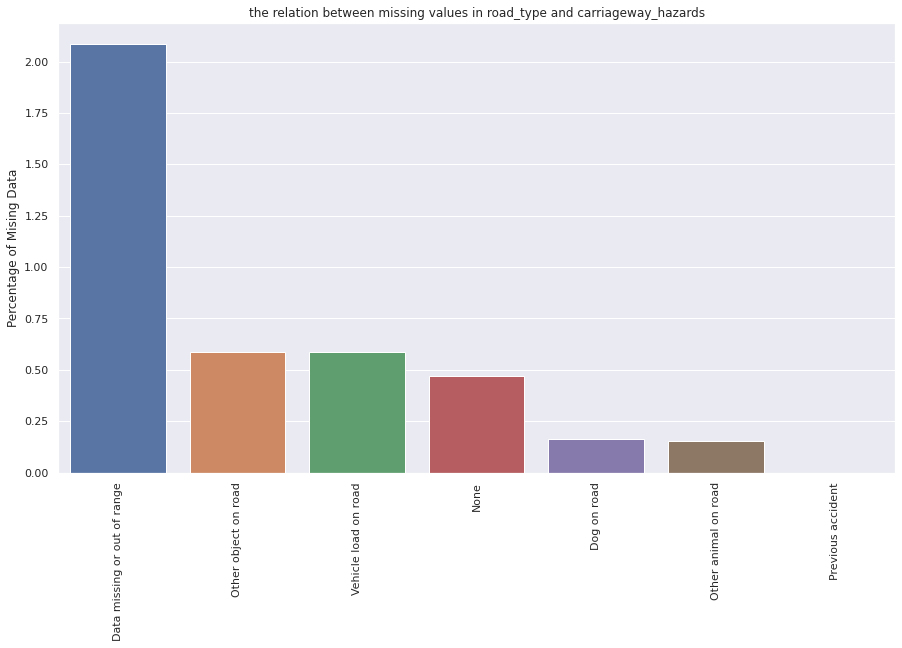

------------------------------------------------------------------------------------------
Current Feature is weather_conditions 

location_easting_osgr
615990.0    100.0
610910.0    100.0
603390.0    100.0
368180.0    100.0
623970.0    100.0
            ...  
389130.0      0.0
389120.0      0.0
389110.0      0.0
389090.0      0.0
942600.0      0.0
Name: weather_conditions, Length: 35072, dtype: float64


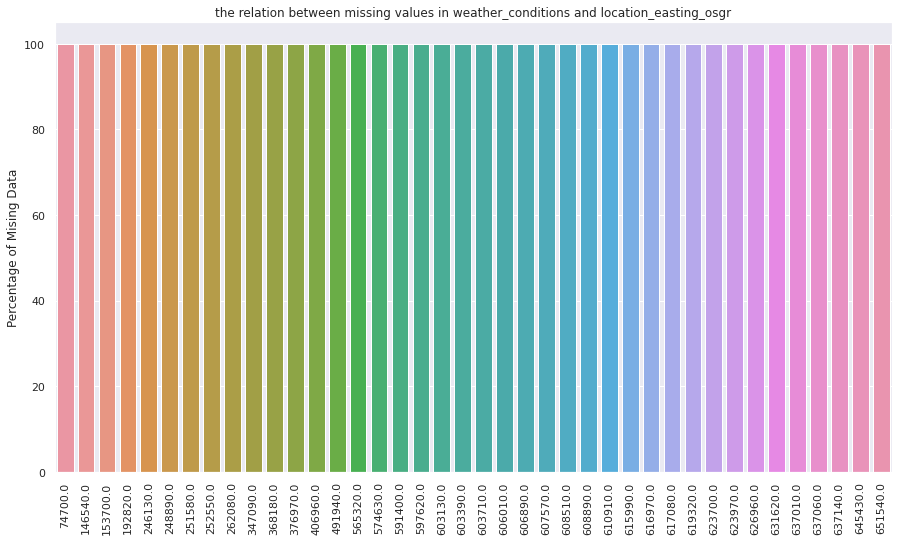

------------------------------------------------------------------------------------------
location_northing_osgr
120120.0    100.0
65810.0     100.0
455470.0    100.0
660470.0    100.0
132480.0    100.0
            ...  
233410.0      0.0
233420.0      0.0
233430.0      0.0
233440.0      0.0
991700.0      0.0
Name: weather_conditions, Length: 45286, dtype: float64


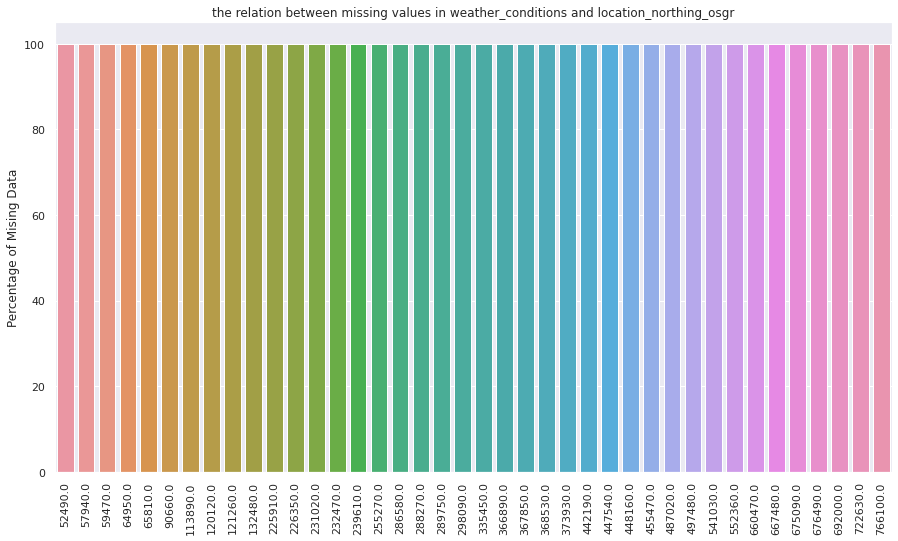

------------------------------------------------------------------------------------------
police_force
Surrey                   2.525748
Hertfordshire            2.104300
Norfolk                  1.801004
City of London           1.533742
Cambridgeshire           1.475361
Thames Valley            1.411675
Northamptonshire         1.347104
Gloucestershire          1.316431
Cheshire                 1.164262
Kent                     1.050930
West Midlands            1.019178
North Wales              0.982615
Derbyshire               0.957477
North Yorkshire          0.853018
Nottinghamshire          0.844749
Suffolk                  0.839223
Lincolnshire             0.819672
Devon and Cornwall       0.805861
West Yorkshire           0.798855
Avon and Somerset        0.771930
Essex                    0.760135
Northern                 0.759219
Leicestershire           0.752968
Merseyside               0.729415
Lothian and Borders      0.704622
Greater Manchester       0.535572
Sussex      

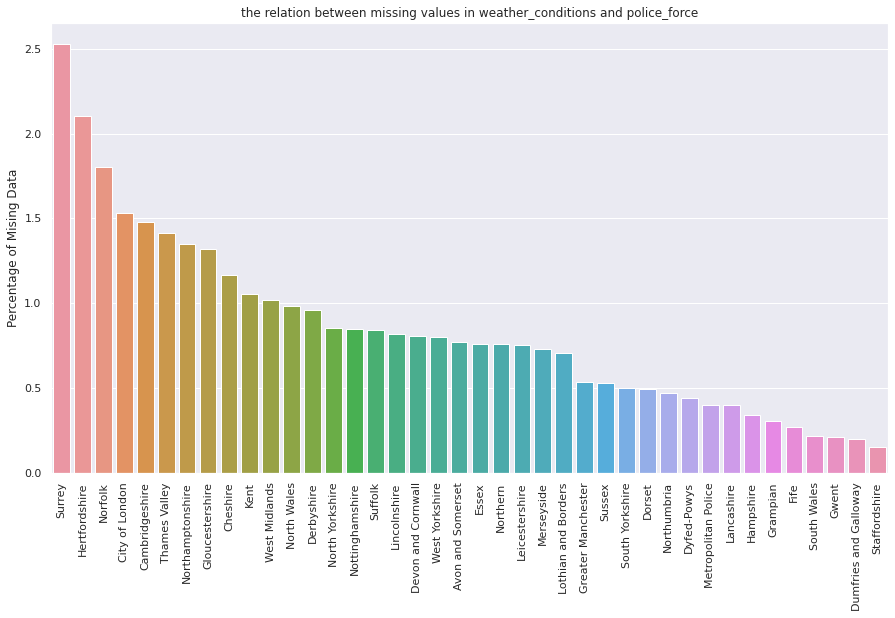

------------------------------------------------------------------------------------------
accident_severity
Slight     0.737663
Fatal      0.415045
Serious    0.344628
Name: weather_conditions, dtype: float64


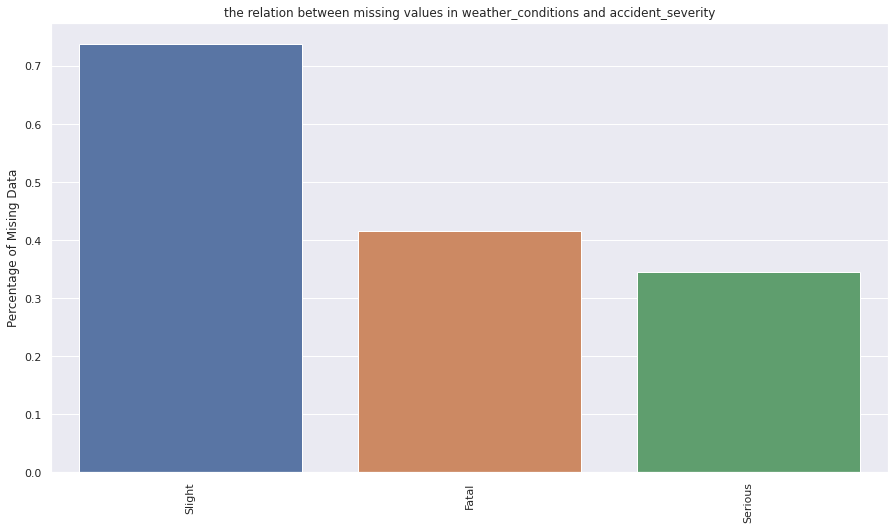

------------------------------------------------------------------------------------------
number_of_vehicles
10     5.263158
2      0.741621
3      0.620786
5      0.610501
1      0.558597
4      0.441379
16     0.000000
75     0.000000
73     0.000000
53     0.000000
39     0.000000
38     0.000000
21     0.000000
20     0.000000
18     0.000000
13     0.000000
15     0.000000
14     0.000000
12     0.000000
11     0.000000
9      0.000000
8      0.000000
7      0.000000
6      0.000000
192    0.000000
Name: weather_conditions, dtype: float64


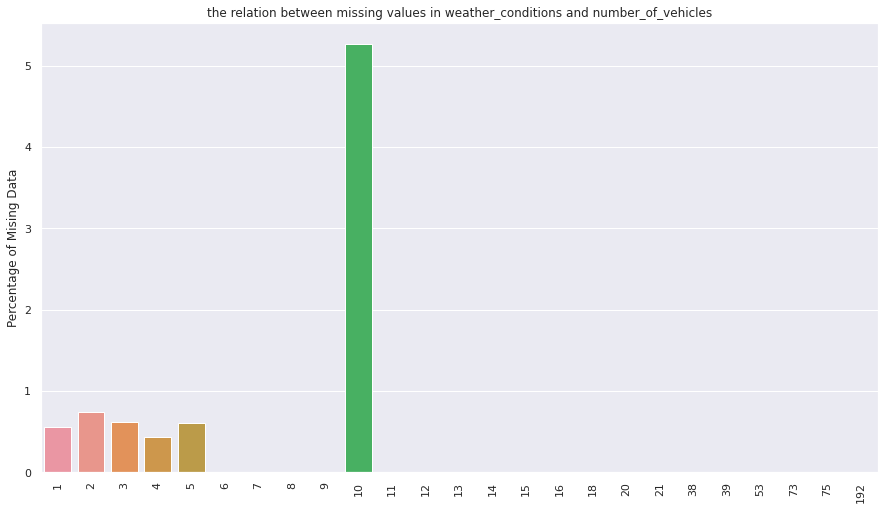

------------------------------------------------------------------------------------------
number_of_casualties
1     0.737571
2     0.457199
3     0.302020
5     0.214133
6     0.178891
4     0.157936
27    0.000000
21    0.000000
22    0.000000
26    0.000000
30    0.000000
28    0.000000
29    0.000000
19    0.000000
34    0.000000
40    0.000000
20    0.000000
16    0.000000
18    0.000000
17    0.000000
15    0.000000
14    0.000000
13    0.000000
12    0.000000
11    0.000000
10    0.000000
9     0.000000
8     0.000000
7     0.000000
42    0.000000
Name: weather_conditions, dtype: float64


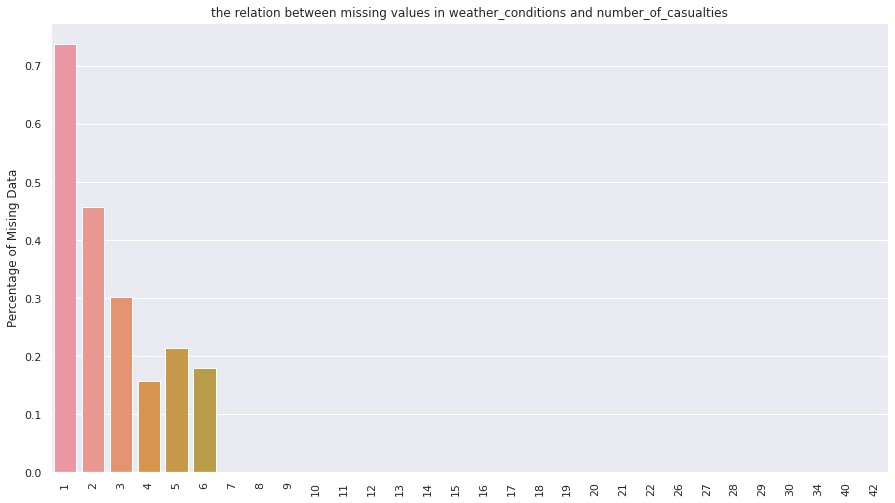

------------------------------------------------------------------------------------------
date
26/11/1992    2.193548
09/01/1992    1.655172
24/03/1992    1.551724
12/11/1992    1.521438
23/03/1992    1.504788
                ...   
20/02/1992    0.000000
26/07/1992    0.000000
14/06/1992    0.000000
19/06/1992    0.000000
18/02/1992    0.000000
Name: weather_conditions, Length: 366, dtype: float64


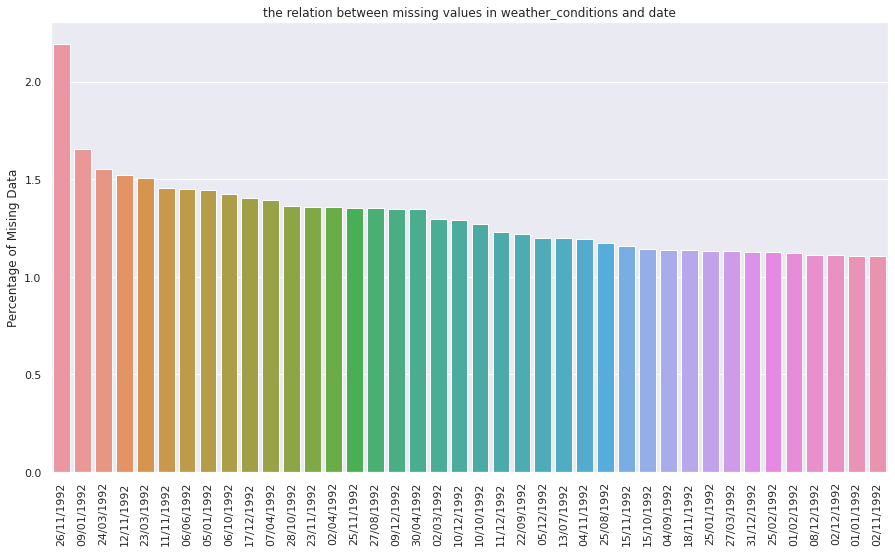

------------------------------------------------------------------------------------------
day_of_week
Thursday     0.755386
Wednesday    0.722022
Monday       0.681421
Tuesday      0.664840
Friday       0.630400
Sunday       0.585736
Saturday     0.581008
Name: weather_conditions, dtype: float64


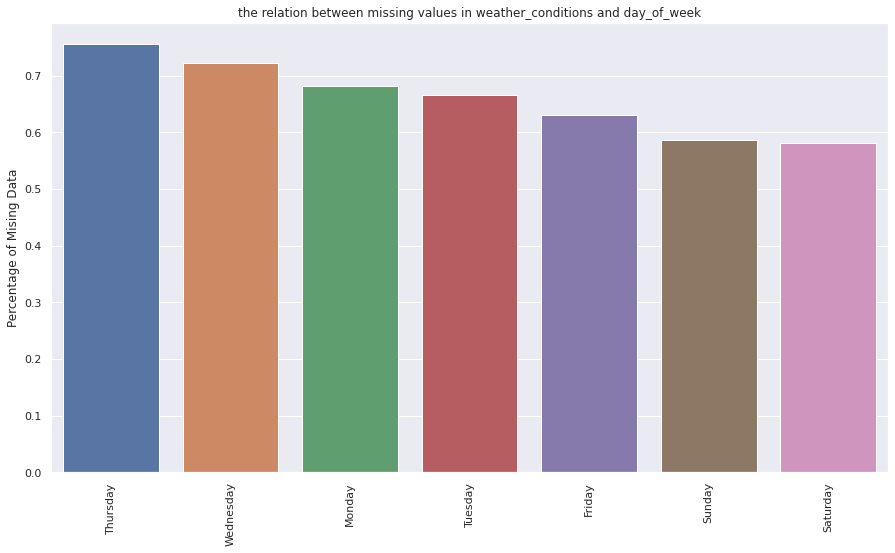

------------------------------------------------------------------------------------------
time
03:47    25.000000
00:21    10.000000
06:53    10.000000
07:01    10.000000
00:57     8.333333
           ...    
09:38     0.000000
09:37     0.000000
01:25     0.000000
01:26     0.000000
12:03     0.000000
Name: weather_conditions, Length: 1434, dtype: float64


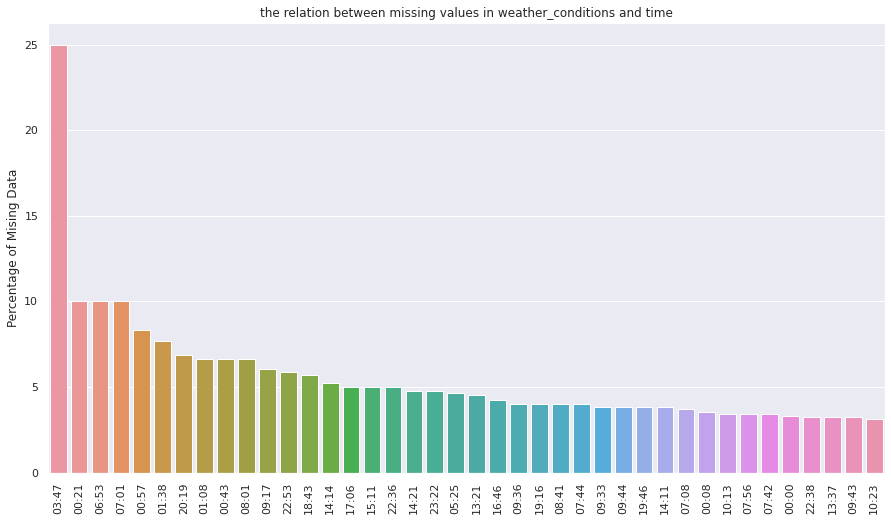

------------------------------------------------------------------------------------------
local_authority_district
Runnymede                5.921053
802                      5.454545
Elmbridge                4.968944
Welwyn Hatfield          3.457447
Watford                  3.399433
                           ...   
Shrewsbury and Atcham    0.000000
Bridgnorth               0.000000
Boston                   0.000000
South Bedfordshire       0.000000
699                      0.000000
Name: weather_conditions, Length: 460, dtype: float64


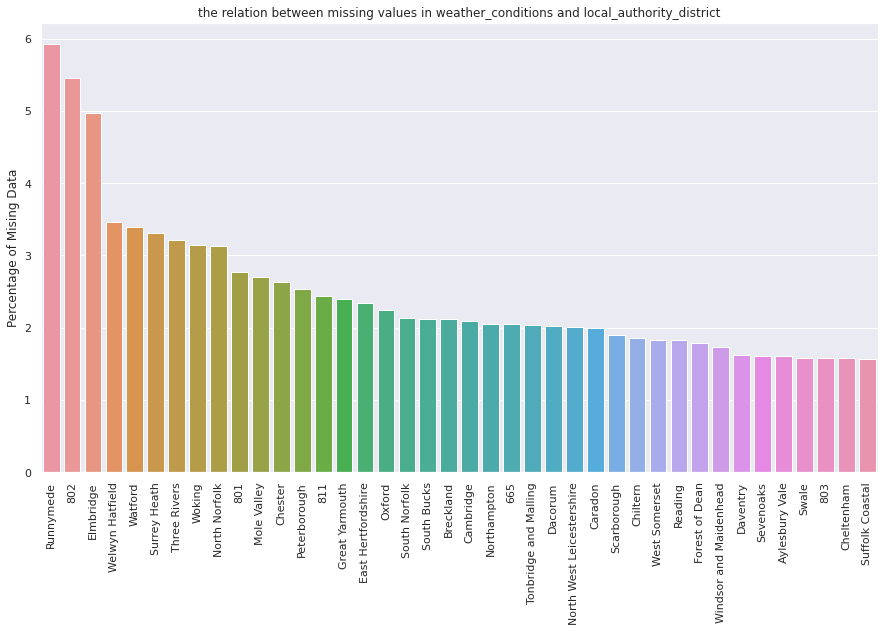

------------------------------------------------------------------------------------------
first_road_class
Motorway        0.892423
C               0.676728
A               0.673481
Unclassified    0.669170
A(M)            0.642398
B               0.548168
Name: weather_conditions, dtype: float64


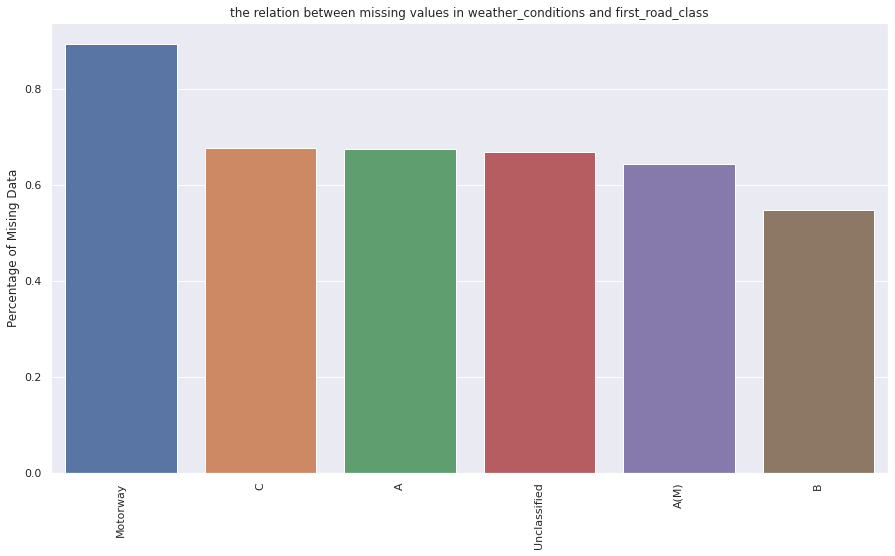

------------------------------------------------------------------------------------------
first_road_number
5718.0    100.000000
1353.0    100.000000
2076.0    100.000000
5480.0     66.666667
9066.0     50.000000
             ...    
4138.0      0.000000
4139.0      0.000000
1269.0      0.000000
4140.0      0.000000
4418.0      0.000000
Name: weather_conditions, Length: 3445, dtype: float64


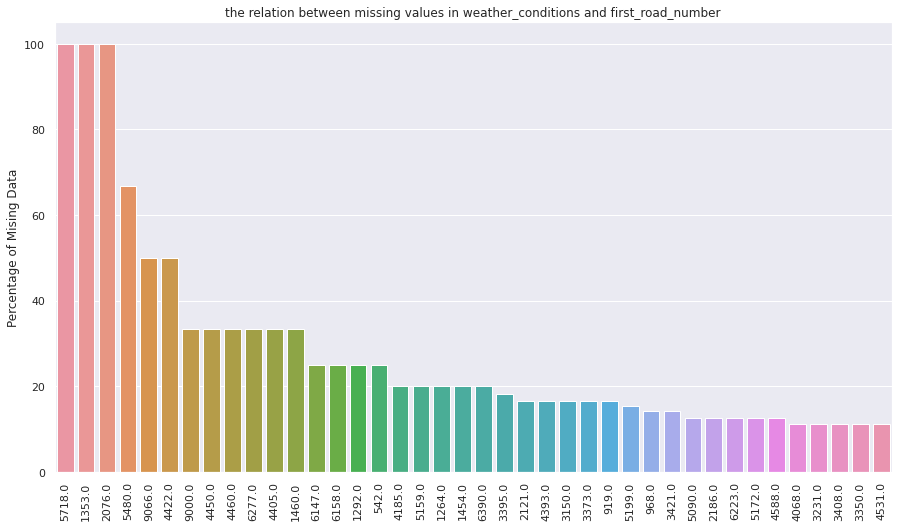

------------------------------------------------------------------------------------------
road_type
Roundabout                      1.276943
One way street/Slip road        0.757024
Dual carriageway                0.634801
Single carriageway              0.604095
Data missing or out of range    0.000000
Name: weather_conditions, dtype: float64


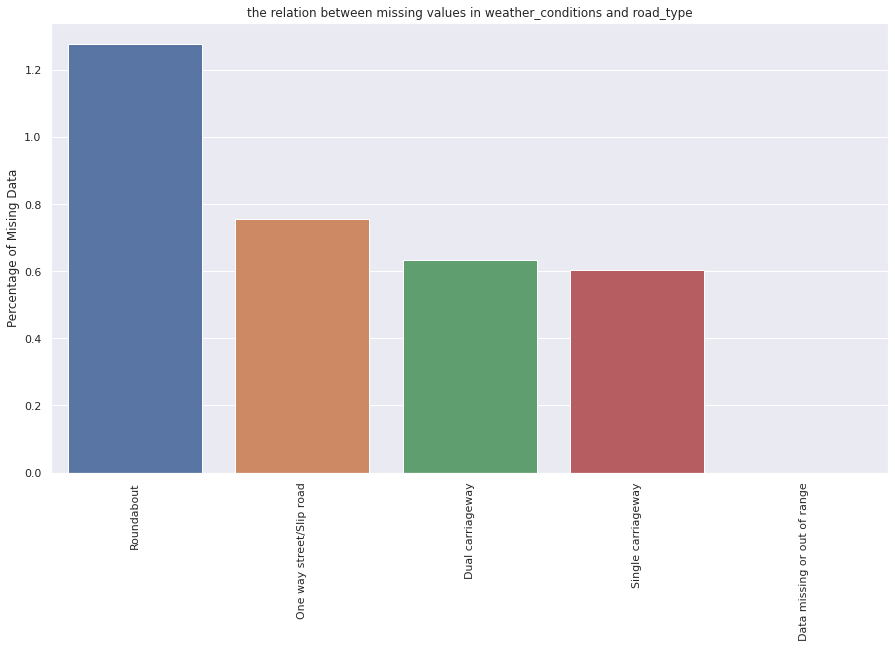

------------------------------------------------------------------------------------------
speed_limit
10.0    3.225806
0.0     1.515152
50.0    0.791035
70.0    0.767494
40.0    0.662400
30.0    0.655269
60.0    0.644400
15.0    0.000000
12.0    0.000000
69.0    0.000000
66.0    0.000000
65.0    0.000000
63.0    0.000000
62.0    0.000000
61.0    0.000000
41.0    0.000000
45.0    0.000000
20.0    0.000000
5.0     0.000000
36.0    0.000000
34.0    0.000000
33.0    0.000000
32.0    0.000000
25.0    0.000000
39.0    0.000000
Name: weather_conditions, dtype: float64


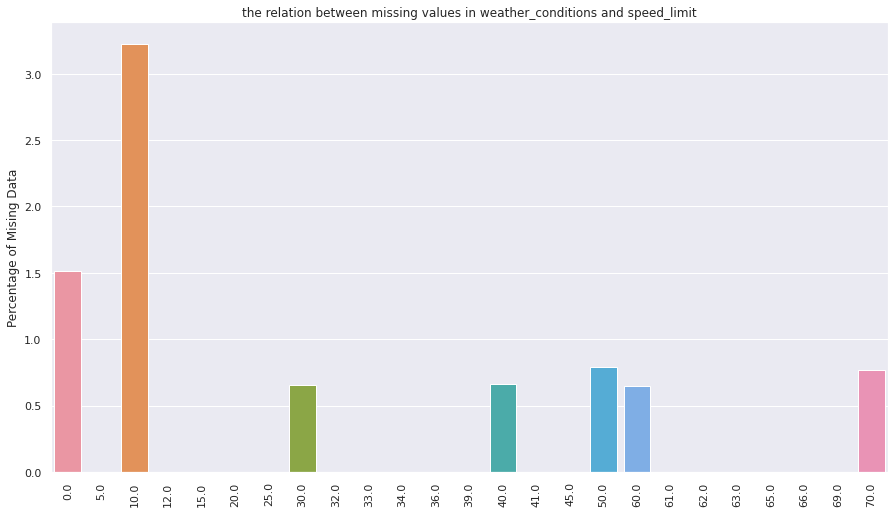

------------------------------------------------------------------------------------------
junction_detail
Roundabout                             1.315992
Mini-roundabout                        1.116902
Slip road                              0.940557
Other junction                         0.923509
More than 4 arms (not roundabout)      0.653595
T or staggered junction                0.625376
Not at junction or within 20 metres    0.625355
Private drive or entrance              0.605129
Crossroads                             0.510094
Data missing or out of range           0.000000
Name: weather_conditions, dtype: float64


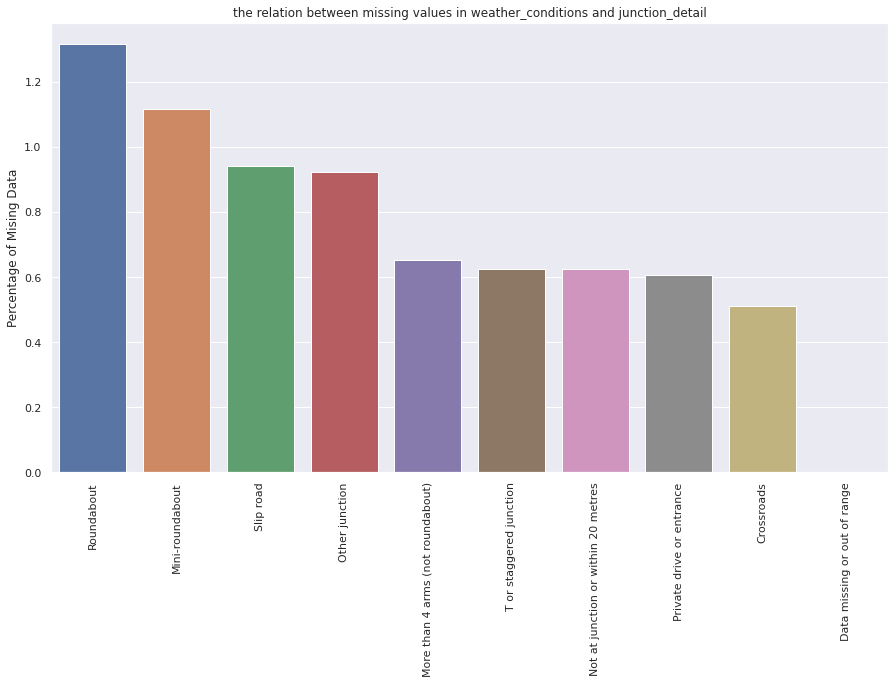

------------------------------------------------------------------------------------------
junction_control
Authorised person               1.069519
Auto traffic signal             0.711868
Give way or uncontrolled        0.676957
Stop sign                       0.673968
Data missing or out of range    0.630743
Name: weather_conditions, dtype: float64


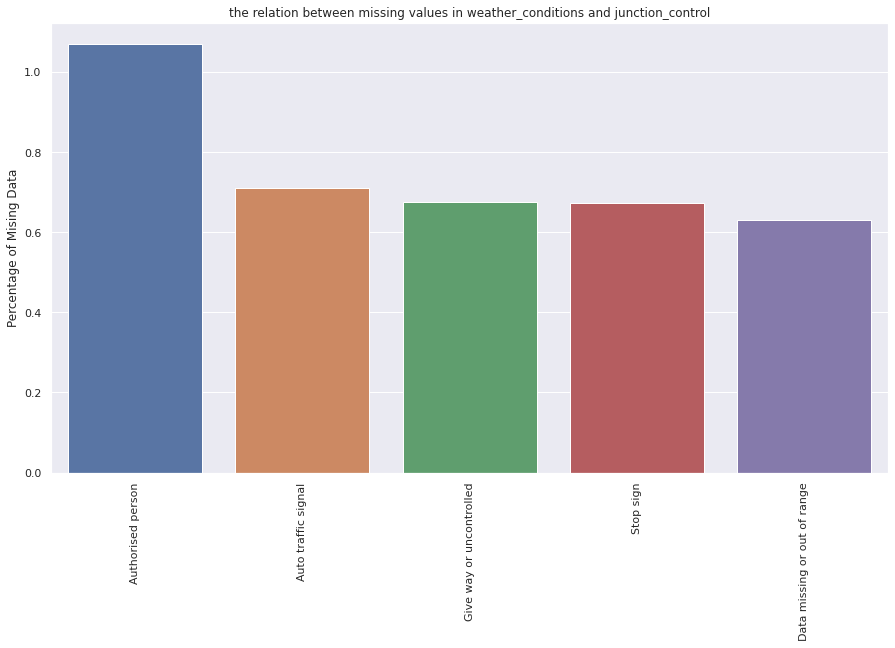

------------------------------------------------------------------------------------------
second_road_class
Motorway        1.553063
A               1.023005
B               0.775012
-1              0.630534
Unclassified    0.611394
C               0.598156
A(M)            0.000000
Name: weather_conditions, dtype: float64


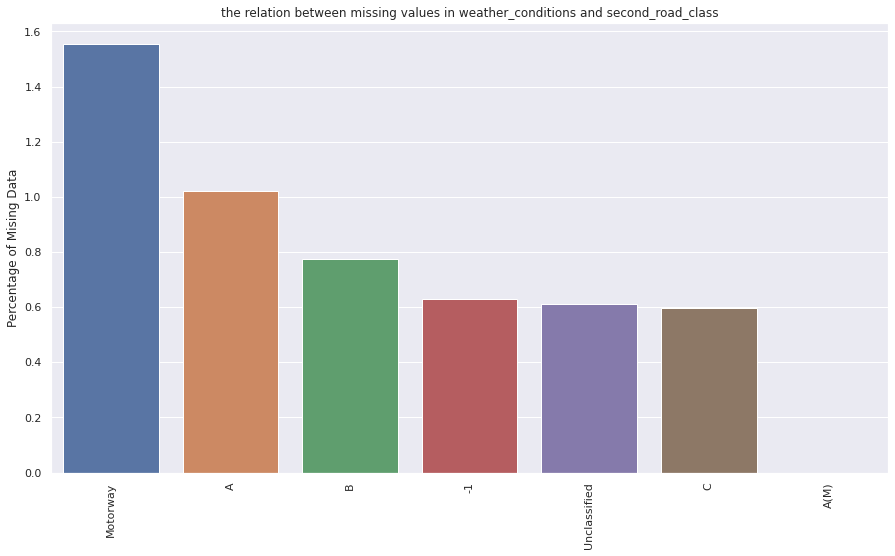

------------------------------------------------------------------------------------------
second_road_number
9076.0    100.000000
5116.0     66.666667
1416.0     50.000000
5001.0     50.000000
1458.0     50.000000
             ...    
379.0       0.000000
1123.0      0.000000
380.0       0.000000
381.0       0.000000
4364.0      0.000000
Name: weather_conditions, Length: 2795, dtype: float64


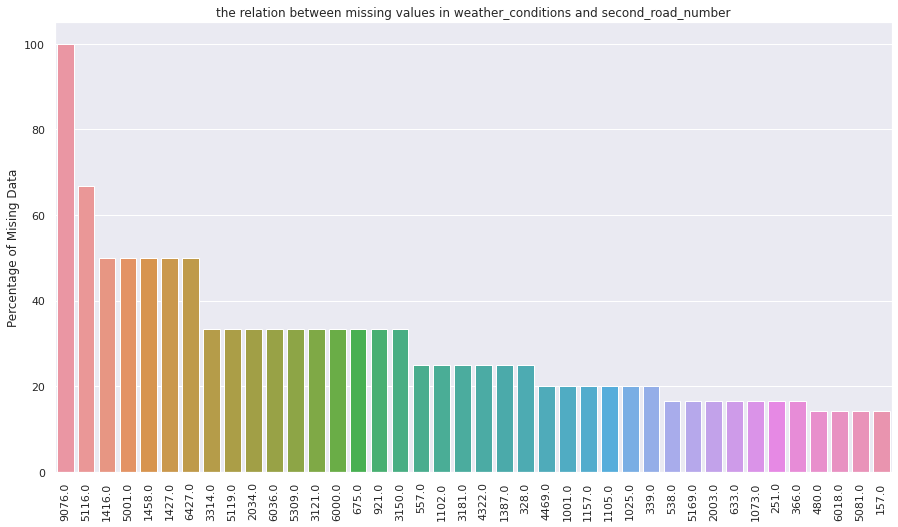

------------------------------------------------------------------------------------------
pedestrian_crossing_human_control
Data missing or out of range          1.486989
Control by other authorised person    0.724638
None within 50 metres                 0.661789
Control by school crossing patrol     0.533333
Name: weather_conditions, dtype: float64


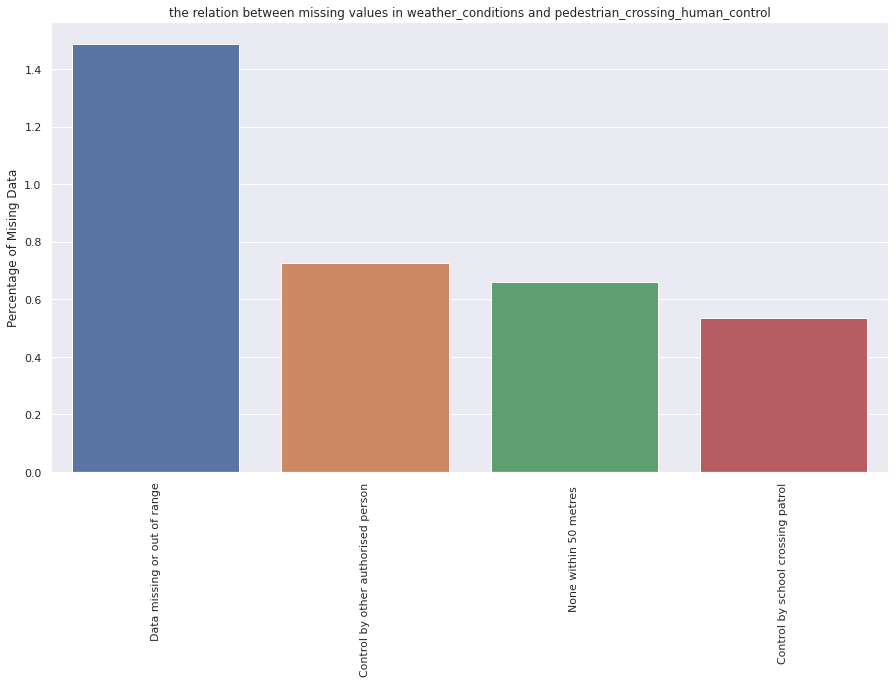

------------------------------------------------------------------------------------------
pedestrian_crossing_physical_facilities
Data missing or out of range                                                 1.486989
Footbridge or subway                                                         0.888099
No physical crossing facilities within 50 metres                             0.678407
Pedestrian phase at traffic signal junction                                  0.588302
Pelican, puffin, toucan or similar non-junction pedestrian light crossing    0.573728
Zebra                                                                        0.531019
Central refuge                                                               0.315347
Name: weather_conditions, dtype: float64


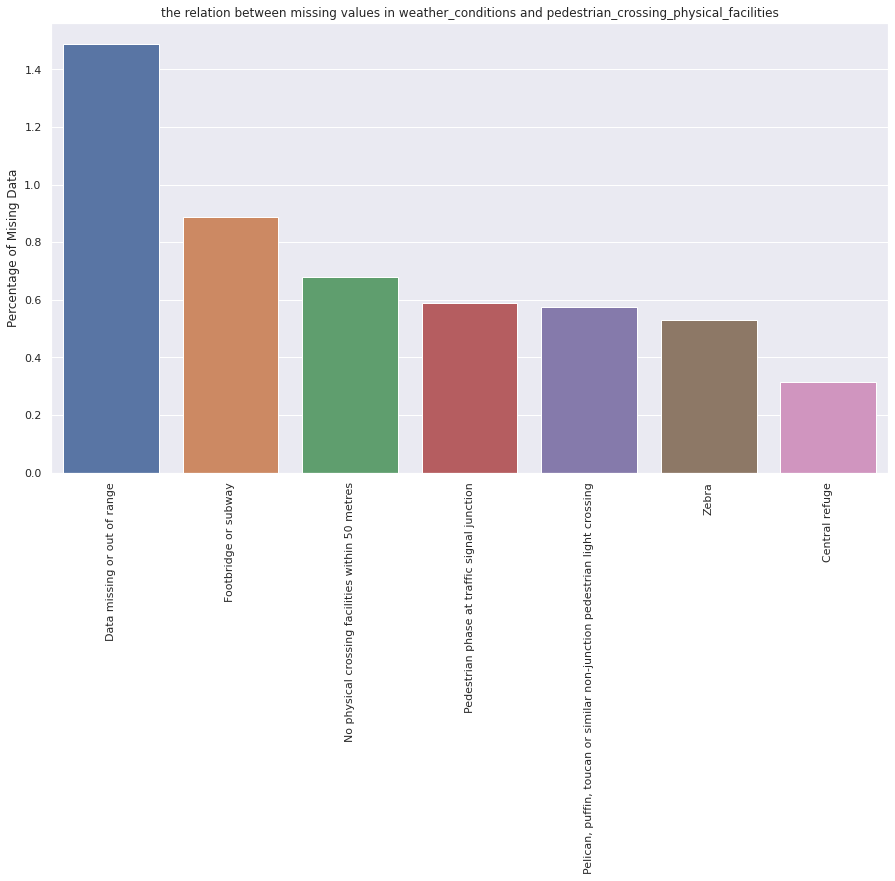

------------------------------------------------------------------------------------------
light_conditions
Darkness - lighting unknown     4.472213
Darkness - no lighting          0.670136
Daylight                        0.647751
Darkness - lights unlit         0.578035
Darkness - lights lit           0.479120
Data missing or out of range    0.000000
Name: weather_conditions, dtype: float64


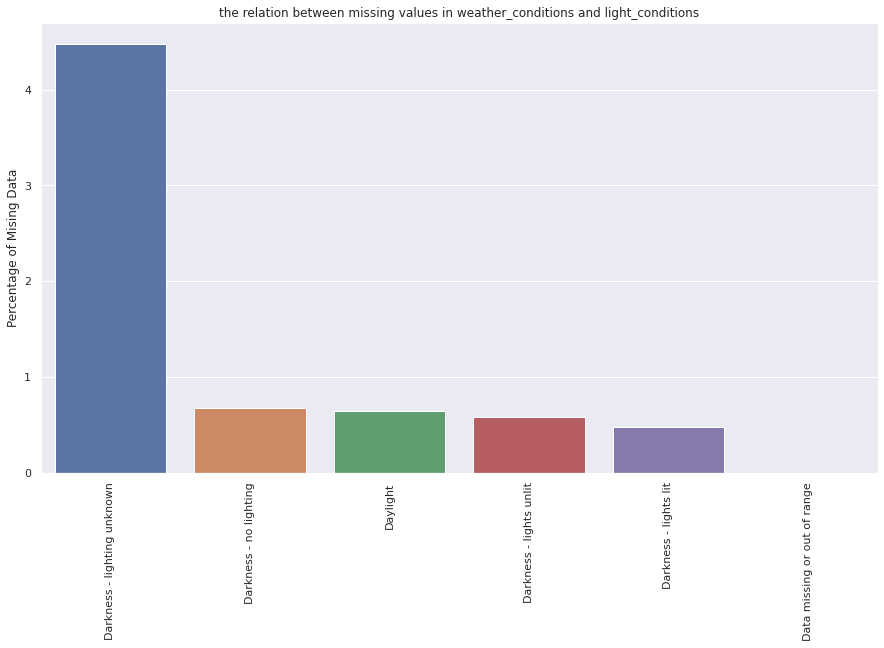

------------------------------------------------------------------------------------------
road_surface_conditions
Data missing or out of range    26.341463
Frost or ice                     0.716332
Wet or damp                      0.626317
Dry                              0.609718
Snow                             0.418410
Flood over 3cm. deep             0.246914
Name: weather_conditions, dtype: float64


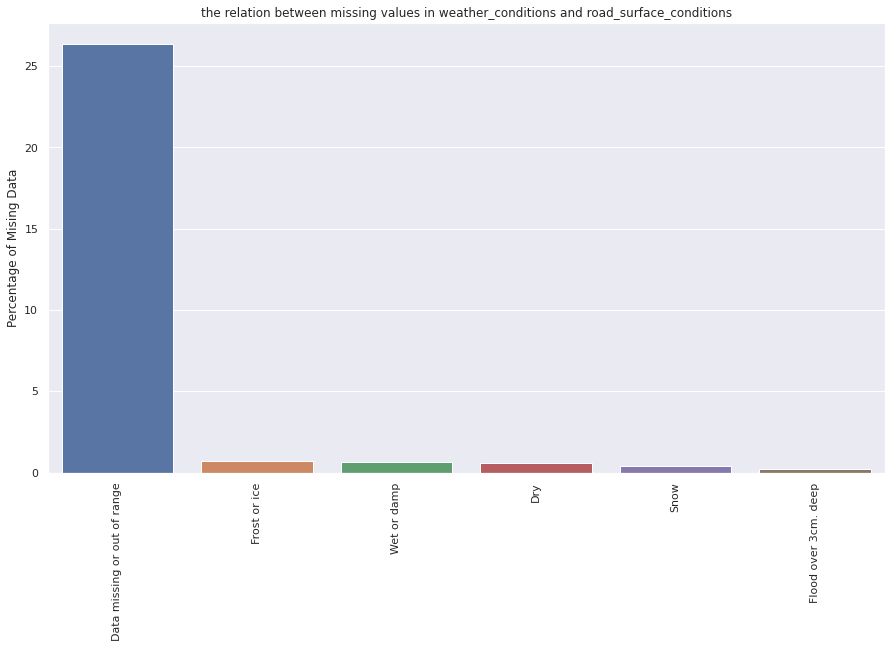

------------------------------------------------------------------------------------------
special_conditions_at_site
Data missing or out of range                  2.671756
Auto traffic signal - out                     1.020408
Roadworks                                     0.872466
None                                          0.656593
Road surface defective                        0.640439
Auto signal part defective                    0.510204
Road sign or marking defective or obscured    0.298507
Name: weather_conditions, dtype: float64


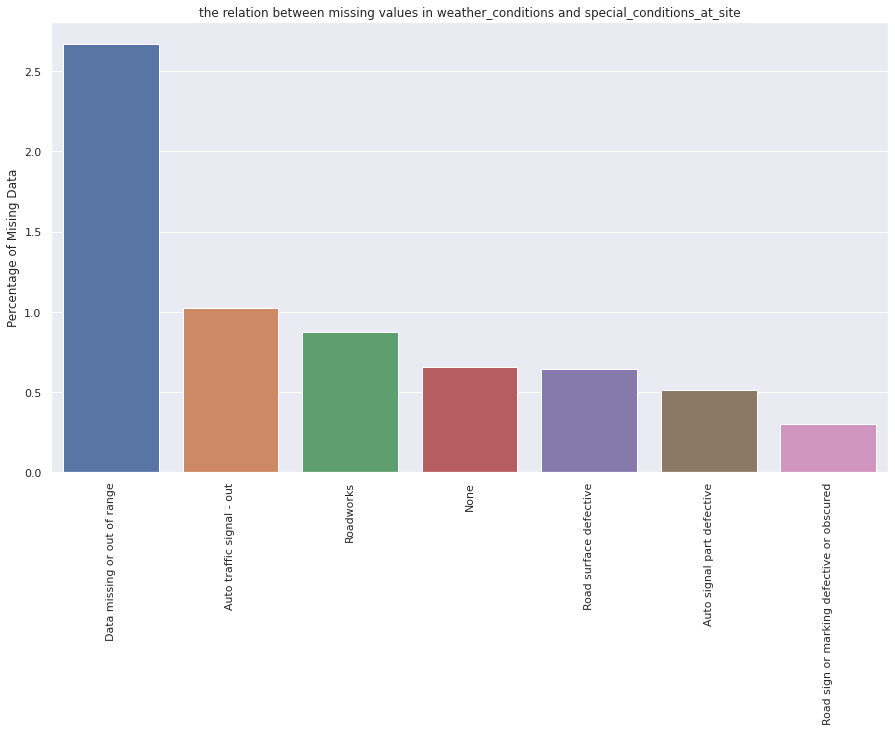

------------------------------------------------------------------------------------------
carriageway_hazards
Previous accident               0.973236
Vehicle load on road            0.877193
Other object on road            0.755729
Other animal on road            0.688073
None                            0.660362
Dog on road                     0.652529
Data missing or out of range    0.000000
Name: weather_conditions, dtype: float64


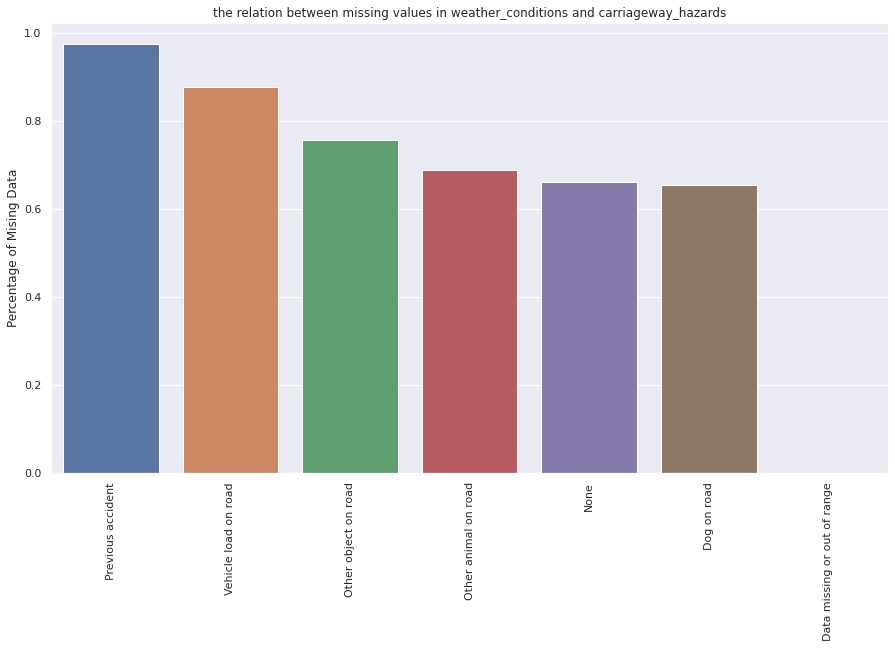

------------------------------------------------------------------------------------------


In [53]:
# Call the detect the relation between missing data method with the missing values features and all features 

detect_the_relation_between_missing_data(columns_with_missing_data_less_than_10 , accidentsDataFrameAfterDropping.columns.tolist())

**After checking the relation missing data in each feature and all other feature we find that DATA is Missing At Random**

In [54]:
# Drop Rows that have missing values
accidentsDataFrameAfterDropping.dropna(how = 'any' , axis = 0 , inplace = True)

location_easting_osgr

The number of null values is 0 and the percentage is 0.0 

The number of unique values is 35003 

he the number of occurenances is 384000.0    118
391100.0    118
385500.0    117
393200.0    114
394200.0    114
           ... 
639330.0      1
637990.0      1
637390.0      1
636460.0      1
201800.0      1
Name: location_easting_osgr, Length: 35003, dtype: int64 

The amount of skewness in location_easting_osgr is -0.29449196171484443 



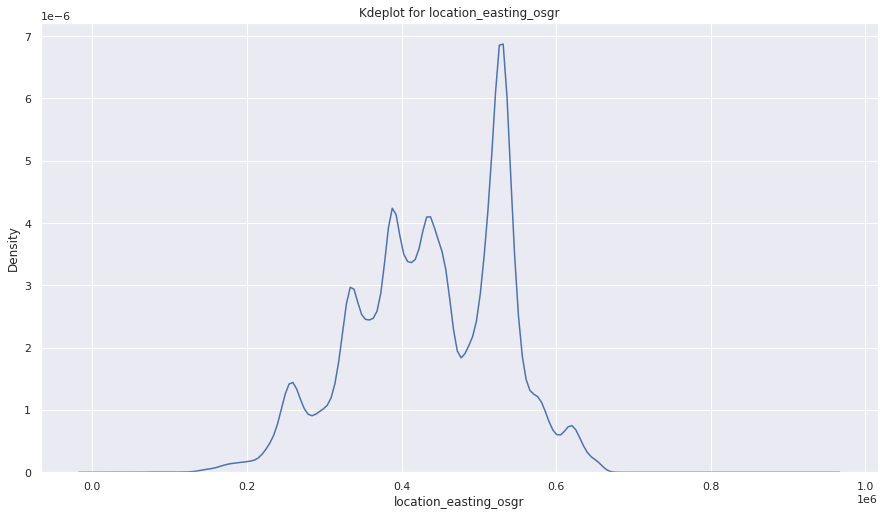

_____________________________________________________________________________________________________________

location_northing_osgr

The number of null values is 0 and the percentage is 0.0 

The number of unique values is 45172 

he the number of occurenances is 398500.0    143
395500.0    121
405000.0    118
400600.0    107
398200.0    101
           ... 
552720.0      1
547430.0      1
558280.0      1
556460.0      1
128450.0      1
Name: location_northing_osgr, Length: 45172, dtype: int64 

The amount of skewness in location_northing_osgr is 0.9843784636008422 



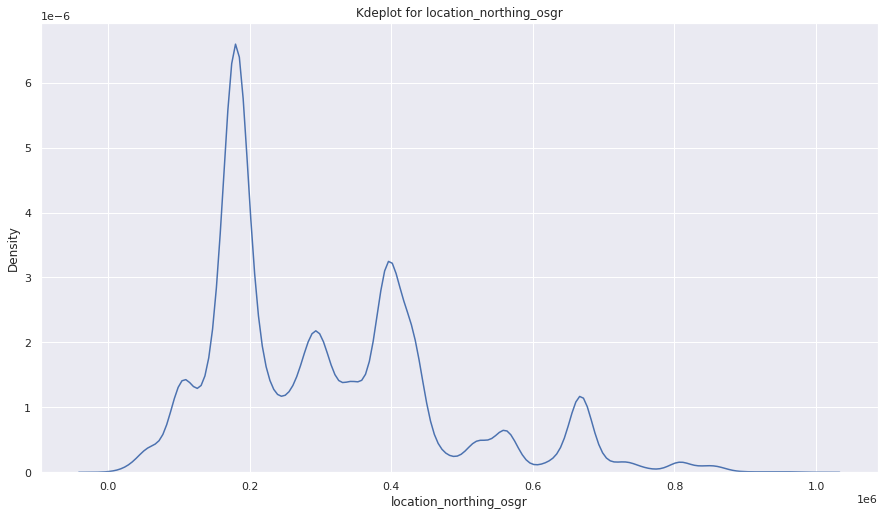

_____________________________________________________________________________________________________________

number_of_vehicles

The number of null values is 0 and the percentage is 0.0 

The number of unique values is 25 

he the number of occurenances is 2      127090
1       79728
3       18513
4        3602
5         810
6         243
7         103
8          44
10         18
9          18
11          8
12          6
13          5
20          4
14          2
18          2
16          2
192         1
53          1
15          1
73          1
38          1
39          1
75          1
21          1
Name: number_of_vehicles, dtype: int64 

The amount of skewness in number_of_vehicles is 52.24129948174667 



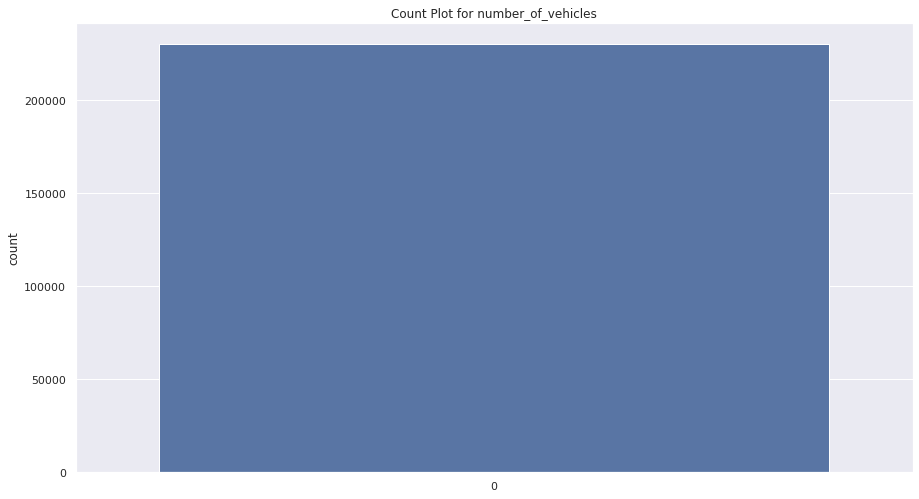

_____________________________________________________________________________________________________________

number_of_casualties

The number of null values is 0 and the percentage is 0.0 

The number of unique values is 30 

he the number of occurenances is 1     179981
2      34466
3       9545
4       3790
5       1394
6        556
7        213
8         89
9         57
10        29
12        21
11        20
15         8
13         8
14         6
17         4
18         4
30         2
26         2
20         1
34         1
40         1
22         1
16         1
27         1
28         1
19         1
21         1
29         1
42         1
Name: number_of_casualties, dtype: int64 

The amount of skewness in number_of_casualties is 6.20163450763018 



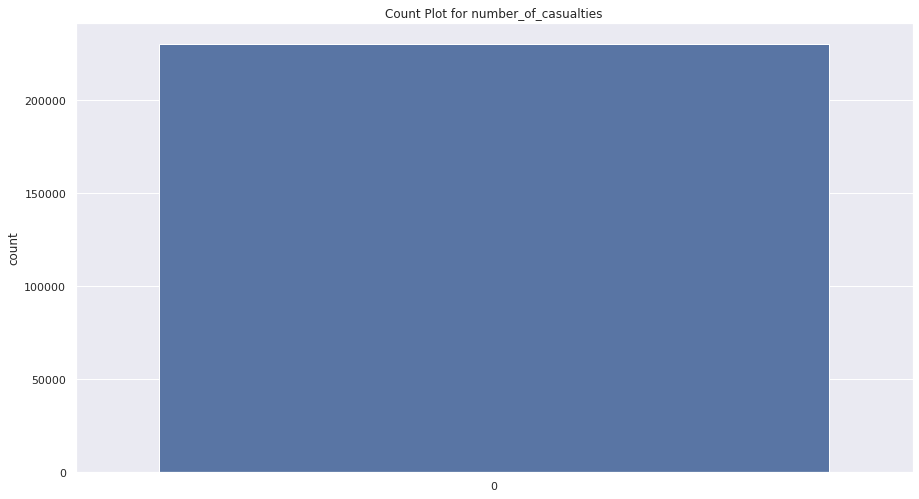

_____________________________________________________________________________________________________________

speed_limit

The number of null values is 0 and the percentage is 0.0 

The number of unique values is 24 

he the number of occurenances is 30.0    152588
60.0     43651
40.0     17655
70.0     13143
50.0      3007
20.0        72
0.0         27
15.0        21
10.0        18
5.0          5
25.0         3
41.0         2
36.0         2
65.0         2
69.0         1
62.0         1
33.0         1
32.0         1
45.0         1
61.0         1
34.0         1
39.0         1
12.0         1
66.0         1
Name: speed_limit, dtype: int64 

The amount of skewness in speed_limit is 1.101626186842969 



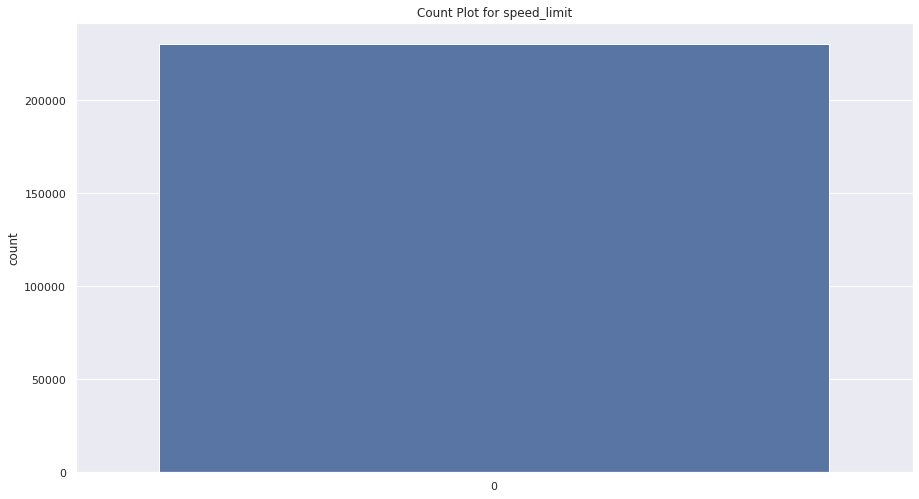

_____________________________________________________________________________________________________________



In [55]:
# loop over all neumrical features to perform EDA after dropping missing data

# get neumrical features name
features = accidentsDataFrameAfterDropping.select_dtypes(include = ['int64','float']).columns.tolist()

for feature in features:
    
    exploringDataAnalysisNeumricalFeatures(feature , accidentsDataFrameAfterDropping)


In [56]:
# loop over all categorical features to perform EDA after Dropping missing data

# get categorical features name
features = accidentsDataFrameAfterDropping.select_dtypes(include = "object").columns.tolist()

for feature in features:
    
    exploringDataAnalysisCategoricalFeatures(feature , accidentsDataFrameAfterDropping)


police_force

The number of null values is 0 and the percentage is 0.0 

The number of unique values is 51 

The the number of occurenances is Metropolitan Police      40596
Greater Manchester       12218
West Midlands             8991
West Yorkshire            8292
Strathclyde               8175
Thames Valley             7746
Merseyside                7056
Hampshire                 6978
Kent                      6120
Lancashire                6011
Essex                     5833
Sussex                    5433
Devon and Cornwall        5389
Northumbria               4671
Staffordshire             4660
South Wales               4519
Nottinghamshire           4343
South Yorkshire           4294
West Mercia               4062
Avon and Somerset         3975
Surrey                    3929
Cheshire                  3884
Humberside                3852
Lothian and Borders       3514
Derbyshire                3499
Leicestershire            3427
Norfolk                   3315
Cambridgeshire      

The the number of occurenances is first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     111684
-1                                                                                                       89864
1.0                                                                                                        380
4.0                                                                                                        331
40.0                                                                                                       298
                                                                                                         ...  
3372.0                                                                                                       1
3192.0                                                                                                       1
4466.0                                                                        

In [57]:
# Dataset's shape after dropping duplicate data

accidentsDataFrameAfterDropping.shape

(230206, 25)

## Findings and conclusions

1) Our data set shape is **(233104, 35)** :
	1) We have **24** Categorical features.
	2) We have **11** Neumrical features including **2**  (**Longitude & Latitude** ) fully nulls cols.

2) Longitude and Latitude are MCNR (100 % Missing).

3) We have seven Cols have only one single value **accident_year 	local_authority_ons_district 	local_authority_highway , urban_or_rural_area , did_police_officer_attend_scene_of_accident , trunk_road_flag , lsoa_of_accident_location**.

4) There is no strong correlation between the features

5. Columns that have null percentage >= 10 will be deleted in order not to make wrong assumation which will distroy our dataset (Will be misleading)."

6. After Observing the relation between the missing data and all other features we found that, Data are missing At random, so we will Apply CCA (Complete Case Analysis) because:

>The percentage of missing data is < 1% of the total datasets.
     
     
>we want to retains variables’ distribution
     
     
>We don't want to make wrong Assumtions.

>We have to split our dataset into a train/test in order to apply any data imputaions method.

After Applying the CCA (Complete Case Analysis), missing data are dropped. And the dataset shape is **(230206, 24)**.




7. We have three categorical features contains only one value **trunk_road_flag , urban_or_rural_area and did_police_officer_attend_scene_of_accident** and their values are **Data missing or out of range**.

8. We can replace the missing rows in location_easting_osgr & location_northing_osgr by the mean or median (semi normally distrubited) the skewness values are -0.293 and 0.985 respectivly.

## Observing outliers

In [58]:
# Describe neumrical features  

accidentsDataFrameAfterDropping.describe()

location_easting_osgr  location_northing_osgr  number_of_vehicles  \
count          230206.000000           230206.000000       230206.000000   
mean           438243.365768           306346.105879            1.788333   
std             95971.794627           163959.036255            0.875155   
min              6700.000000              200.000000            1.000000   
25%            372900.000000           179610.000000            1.000000   
50%            438800.000000           277500.000000            2.000000   
75%            523500.000000           400600.000000            2.000000   
max            942600.000000           991700.000000          192.000000   

       number_of_casualties    speed_limit  
count         230206.000000  230206.000000  
mean               1.335109      38.991303  
std                0.825182      13.938897  
min                1.000000       0.000000  
25%                1.000000      30.000000  
50%                1.000000      30.000000  
75%                1.000000      50.000000  
max               42.000000      70.000000

In [59]:
# first_road_number contained a value which is
# 'The the number of occurenances is first_road_class is C or Unclassified.
# These roads do not have official numbers so recorded as zero',
# so before discretization we will map this value to zero

accidentsDataFrameAfterDropping.first_road_number = pd.to_numeric(\
  accidentsDataFrameAfterDropping.first_road_number, errors='coerce').fillna(0, downcast='infer')

# convert the data type to str because it represents the street number (name)
accidentsDataFrameAfterDropping.first_road_number = accidentsDataFrameAfterDropping.first_road_number.astype(str)

In [60]:
# A function to return the outliers for a certain feature

def inspectOutlierIQR(featureName , dataframe):
    
    # Fetch the current Column
    currentFeature = dataframe[featureName]
    
    
    # Get the feature description which include min , max , 25% , 75% and so on..
    featureDescription = currentFeature.describe()
    
    # Calculate the 1st , the 3rd quartiles and the IQR value
    firstQuantile = featureDescription['25%']
    thirdQuantile = featureDescription['75%']
    
    IQR = thirdQuantile - firstQuantile
    
    # get the max value and min value 
    # any value that is greater than the max or less than the min is considerd as outlier
    
    maxRange = thirdQuantile + 1.5 * IQR
    minRange = firstQuantile - 1.5 * IQR
    
    print(f"The upper limit is {maxRange}")
    print(f"The lower limit is {minRange}")
    
    
    
    # return the number of outliers in each feature
    return dataframe.query(f'{featureName} > {maxRange} or {featureName} < {minRange}').shape[0]
    

In [61]:
def inspectOutlierByZScore(featureName , dataframe , threshold = 3 ):
    
    # Fetch the current Column
    currentFeature = dataframe[featureName]
    
    # calculate the z score
    z = np.abs(stats.zscore(currentFeature))
    
    # mean & std
    mean = np.mean(currentFeature)
    std = np.std(currentFeature)
    
    # Assuming thershold is threshold
    
    upper_limit = mean + threshold * std
    lower_limit = mean - threshold * std
    print(f"The upper limit is {upper_limit}")
    print(f"The lower limit is {lower_limit}")
    
    
    # return the number of outliers where Any value that has 
    # a std greater than threshold or less than -threshold std will be considered as an outlier , lower_limit and upper_limit
    return dataframe[(z > threshold) | (z < -threshold)].shape[0] , lower_limit , upper_limit


    

In [67]:
# loop over all neumrical features to get the number of outliers

# get neumrical features name
neumricalFeatures = accidentsDataFrameAfterDropping.select_dtypes(include = ['int64','float']).columns.tolist()

# Dict to save upper_limit and lower_limit for each category instead of calling the method twice for each feature
dict = {}

for feature in neumricalFeatures:
    
    print(feature)
    
    print(f"Number of Outliers in {feature} : {inspectOutlierIQR(feature , accidentsDataFrameAfterDropping)} ")
    
    print("                       -----------------------------               ")
    
    # save values coming from z-score
    dict[feature] = inspectOutlierByZScore(feature , accidentsDataFrameAfterDropping , 3.5)
    
    
    print(f"Number of Outliers (ZScore) in {feature} : {dict[feature][0]} ")
    print("-----------------------------------------------------------------\n")




location_easting_osgr
The upper limit is 749400.0
The lower limit is 147000.0
Number of Outliers in location_easting_osgr : 171 
                       -----------------------------               
The upper limit is 774143.9173961852
The lower limit is 102342.81413991726
Number of Outliers (ZScore) in location_easting_osgr : 38 
-----------------------------------------------------------------

location_northing_osgr
The upper limit is 732085.0
The lower limit is -151875.0
Number of Outliers in location_northing_osgr : 3525 
                       -----------------------------               
The upper limit is 880201.4863712945
The lower limit is -267509.27461313
Number of Outliers (ZScore) in location_northing_osgr : 190 
-----------------------------------------------------------------

number_of_vehicles
The upper limit is 3.5
The lower limit is -0.5
Number of Outliers in number_of_vehicles : 4875 
                       -----------------------------               
The upper limit i

1) **We can notice that the number of outliers produced by z-score is less than the number of outliers produced by 
IQR method**
2) **Even if in case of Normal Distrubition for a feature the outliers will be the values that are greater than mean + threshold * std or less than mean - threshold * std which is the range used in z-score,so we will use the z-score to detect outliers.**
3) **All Values to the right of the mean is included to the dataset.**
4) **Negative values in z-score lower limit means that all values to the left of the mean will be included because the min value in those columns is zero.**

## Handling outliers

In [68]:
# Delete Outliers using z-score

def handleOutliers(dataFrame):
    
    
    # Create a copy of the database to store the changes on it
    accidentsDataFrameAfterOutliers = dataFrame.copy()
        
    
     # get neumrical features name
    neumricalFeatures = accidentsDataFrameAfterOutliers.select_dtypes(include = ['int64','float']).columns.tolist()
    
    for feature in neumricalFeatures:
        
        # get the lower limit and upper limit for the current feature
        lower_limit , upper_limit = dict[feature][1:]
        
        # get the median of the current feature
        median = math.ceil(accidentsDataFrameAfterOutliers[accidentsDataFrameAfterOutliers[feature].between(lower_limit,\
          upper_limit , inclusive = True)][feature].median())
        
        # replace outliers by the median
        accidentsDataFrameAfterOutliers[feature] = np.where(accidentsDataFrameAfterOutliers[feature] < lower_limit , median  , accidentsDataFrameAfterOutliers[feature])
        accidentsDataFrameAfterOutliers[feature] = np.where(accidentsDataFrameAfterOutliers[feature] > upper_limit , median  , accidentsDataFrameAfterOutliers[feature])
        
    return accidentsDataFrameAfterOutliers

In [69]:
# Get the new handled data
accidentsDataFrameAfterOutliers = handleOutliers(accidentsDataFrameAfterDropping)

## Findings and conclusions

In [ ]:
# loop over all neumrical features to perform EDA after handling outliers 

# get neumrical features name
features = accidentsDataFrameAfterDropping.select_dtypes(include = ['int64','float']).columns.tolist()

for feature in features:
    
    exploringDataAnalysisNeumricalFeatures(feature , accidentsDataFrameAfterOutliers)


In [ ]:
# loop over all categorical features to perform EDA after handling the outliers

# get categorical features name
features = accidentsDataFrameAfterOutliers.select_dtypes(include = "object").columns.tolist()

for feature in features:
    
    exploringDataAnalysisCategoricalFeatures(feature , accidentsDataFrameAfterOutliers)


In [ ]:
# loop over all neumrical features to get the number of outliers after handling the outliers

# get neumrical features name
neumricalFeatures = accidentsDataFrameAfterOutliers.select_dtypes(include = ['int64','float']).columns.tolist()


for feature in neumricalFeatures:
    
    print(feature +'\n')
    
    print(f" Number of Outliers in {feature} : {inspectOutlierIQR(feature , accidentsDataFrameAfterOutliers)} ")
    
    
    print("                  ---------------------------                    ")

    # save values coming from z-scorefirst_road_number
    dict[feature] = inspectOutlierByZScore(feature , accidentsDataFrameAfterOutliers , 3.5)
    
    
    print(f" Number of Outliers (ZScore) in {feature} : {dict[feature][0]} ")
    print("-----------------------------------------------------------------\n")




In [ ]:
# try to find a relation between outliers in number_of_casualties and number_of_vehicles

# init the LOF
lof = LocalOutlierFactor()
# pick the two features
X = accidentsDataFrameAfterDropping[['number_of_casualties','number_of_vehicles']].values
# predict
y_pred = lof.fit_predict(X)


plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")

# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)

plt.xlabel('number_of_casualties');
plt.ylabel('number_of_vehicles');
plt.show()

In [ ]:
# print the shape of the dataframe after Outliers
accidentsDataFrameAfterOutliers.shape

- After Replacing the outliers by the median --> No oultliers in the dataset.
- We didn't want to remove the outliers because the dataset size will shrink more.
- We couldn't find any relation between the outliers --> We can't apply LOF (Locate Outliers Factor), because there is no correlation between the two columns.

# 4 - Data transformation

## 4.1 - Discretization

In [ ]:
# WE need to discretize the data into weeks by adding a new column called 'week_number'

accidentsDataFrameAfterOutliers['week_number'] = pd.to_datetime(accidentsDataFrameAfterOutliers.date , format = \
           "%d/%m/%Y")

accidentsDataFrameAfterOutliers.week_number = accidentsDataFrameAfterOutliers.week_number.dt.isocalendar().week


# Which Day contains the highest number of accidents ?
visualize_data('week_number' , accidentsDataFrameAfterOutliers , 'Distrubition of number of accidents Vs week number')


## 4.11 - Findings and conclusions

### After Dicretize the the date into week_number, we found that  week 52 has  the highest  number of accidents.

## 4.2 - Encoding

In [ ]:
# init the lookup table
lookup = pd.DataFrame(columns=['Feature','Value','Code'])

In [ ]:
# Update the lookup table
def update_lookup_table_from_dicitinary( lookup , dictionary , feature_name ):
    
    # make temp dataframe
    feature_lookup_table = pd.DataFrame()
    
    # add the values to the temp DF
    feature_lookup_table['Value'] = dictionary.keys()
    feature_lookup_table['Code'] = dictionary.values()
    feature_lookup_table['Feature'] = [feature_name] * len(dictionary)
    
    # concat the temp DF to the Original DF
    lookup = pd.concat([lookup,feature_lookup_table],axis = 0)
    
    return lookup

In [ ]:
# Apply label Encoding to accident_severity

# make a copy from the dataframe to modify on it
accidentsDataFrameForEncoding = accidentsDataFrameAfterOutliers.copy()

# make a dictionary to replace the serires values
accident_severity_dict = {'Slight' : 1 ,
                          "Serious" : 2,
                          "Fatal" : 3,
                          "." : 0
                        }

# update the lookup table
lookup = update_lookup_table_from_dicitinary(lookup, accident_severity_dict, 'accident_severity')

# replace the categorical values by the neumrical
accidentsDataFrameForEncoding.accident_severity.replace(accident_severity_dict, regex=True , inplace = True)

In [ ]:
# function to preform cyclical encoding sin
def sin_transformer(period):
	return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

In [ ]:
# function to preform cyclical encoding cosine
def cos_transformer(period):
	return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

In [ ]:
# The Actucal Cyclical Encoding Method
def cyclical_encoding(period , feature_name ):
    
    # Apply the cyclical encoding
    accidentsDataFrameForEncoding[f"{feature_name}_sin"] = sin_transformer(period).fit_transform(accidentsDataFrameForEncoding[feature_name].values)
    accidentsDataFrameForEncoding[f"{feature_name}_cos"] = cos_transformer(period).fit_transform(accidentsDataFrameForEncoding[feature_name].values)

    # drop the old col
#     accidentsDataFrameForEncoding.drop(feature_name , inplace = True , axis = 1)


    # Demonstarte the cyclical encoding

    values_before_encoding = range(1 , period + 1)
    values_after_encoding_sin = list(map(lambda v: sin_transformer(period).fit_transform(v), values_before_encoding))
    values_after_encoding_cos = list(map(lambda v: cos_transformer(period).fit_transform(v), values_before_encoding))

    
    #Plotting both the curves simultaneously
    plt.plot(values_before_encoding , values_after_encoding_sin , label = 'sin')
    plt.plot(values_before_encoding , values_after_encoding_cos , label = 'cos')

    # Naming the x-axis, y-axis and the whole graph
    plt.xlabel('Value before Encoding')
    plt.ylabel('Value after Encoding')
    plt.title('Encoding using Cyclical Encoding')

    # Adding legend, which helps us recognize the curve according to it's color
    plt.legend()

    # To load the display window
    plt.show()


    # scattering values from sin & cos
    plt.scatter(values_after_encoding_sin , values_after_encoding_cos)



    # Naming the x-axis, y-axis and the whole graph
    plt.xlabel(f'{feature_name} after Encoding with sin')
    plt.ylabel(f'{feature_name} after Encoding with cos')
    plt.title('How to decode value to get the original one')


    # To load the display window
    plt.show()


In [ ]:
# Apply cyclical encoding  to day_of_week


# make a dictionary to replace the serires values
day_of_week_dict = {'Saturday' : 1 ,
                          "Sunday" : 2,
                          "Monday" : 3,
                          "Tuesday" : 4,
                          "Wednesday" : 5,
                          "Thursday" : 6,
                          "Friday" : 7,
                          "." : 0
                        }

# replace the categorical values by the neumrical
accidentsDataFrameForEncoding.day_of_week.replace(day_of_week_dict, regex=True , inplace = True)

#update lookup table with week days code
lookup = update_lookup_table_from_dicitinary(lookup,day_of_week_dict,'day_of_week')

# call the cyclical method
cyclical_encoding(7 , 'day_of_week')

In [ ]:
# Apply cyclical encoding  to time


# replace the categorical values by the neumrical newvalue = hours * 60 + minutes
accidentsDataFrameForEncoding.time = accidentsDataFrameForEncoding.time.apply(lambda x: int(x.split(':')[0] ) * 60 + int(x.split(':')[1]) )



# call the cyclical encoding
cyclical_encoding(1440 , 'time')

In [ ]:
# Apply cyclical encoding  to date

# make a copy from date column
accidentsDataFrameForEncoding['date_copy'] = pd.to_datetime(accidentsDataFrameForEncoding.date , format = \
           "%d/%m/%Y")


# replace the categorical values by the neumrical newvalue = (month - 1) * 30 + days
accidentsDataFrameForEncoding.date = accidentsDataFrameForEncoding.date.apply(lambda x: (int(x.split('/')[1]) - 1) * 30 + int(x.split('/')[0]) )


# call the cyclical encoding
cyclical_encoding(366 , 'date')

In [ ]:
# A function to 
def one_hot_encoder(feature , catergory):
    accidentsDataFrameForEncoding[feature + '_' + catergory] = np.where(
            accidentsDataFrameForEncoding[feature] == catergory, 1, 0) 

In [ ]:
# apply binary Encoding

def binary_encoding(features , dataframe):
    
    # init the encoder
    encoder = ce.BinaryEncoder(cols = features , return_df = True )
    
    # fit the encoder to the data
    df_binary = encoder.fit_transform(dataframe)
    
    return df_binary

In [ ]:
# Apply one-hot encoder to the remaining features

# get categorical features name
features = accidentsDataFrameForEncoding.select_dtypes(include = "object").columns.tolist()

# init two arrays to store columns that need binary encoding and OHE
features_for_binary_encoding = []

# make a new column for catergories that represent 5% or more from the dataset
for feature in features:
    
    # We don't want to encode those features
    if feature == "first_road_number" or feature == "second_road_number":
        continue
    
    # get the number of unique categories in the current feature
    unique_values = accidentsDataFrameForEncoding[feature].nunique()
    
    # if the number of uniqu categroies in the feature is <= 6 we will apply one hot encoding
    
    if (unique_values <= 6):
        
        frequencies = accidentsDataFrameForEncoding[feature].value_counts()

        # iterate over the most frequent categories until you find a category with < 5% of the dataset size 
        for idx , frequncy in enumerate(frequencies.values):
            if frequncy / accidentsDataFrameForEncoding.shape[0] >= 0.05:
                one_hot_encoder(feature , frequencies.index.tolist()[idx])
            else:
                break
        
    else:
        features_for_binary_encoding.append(feature)
        
# apply binary encoding to those features
accidentsDataFrameForEncoding = binary_encoding(features_for_binary_encoding , accidentsDataFrameForEncoding)

In [ ]:
# print the new columns name
accidentsDataFrameForEncoding.columns

In [ ]:
#Add binary encoded features to the lookup table
for feature in features_for_binary_encoding:
    
    #get the number of unique of each feature
    nunique = accidentsDataFrameAfterOutliers[features_for_binary_encoding][feature].nunique()
    
    #temporary lookup table to handle each feature, that will be concatenated to main lookup table
    temp_table = pd.DataFrame()
    
    #get the code of each feature value
    temp_table['Code'] = [ i for i in range( 1, nunique + 1 ) ]
    
    #convert that code to its binary representation
    temp_table['Code'] = temp_table['Code'].apply(lambda x: bin(x)[2:] )
    
    #get all the values
    temp_table['Value'] = accidentsDataFrameAfterOutliers[features_for_binary_encoding][feature].unique()
    
    temp_table['Feature'] = [feature] * nunique
    
    lookup = pd.concat( [lookup , temp_table] , axis=0 )
    

In [ ]:
lookup

In [ ]:
# print the shape of DF
accidentsDataFrameForEncoding.shape

## 4.22 - Findings and conlcusions

- **We don't want to encode the first_road_number and the second_road_number**

- **Apply label Encoding to accident_severity column because it's a nomianl categorical**
> - **We will give Slight a value of 1, Serious value of 2 , Fatal a value of 3 , 0 for a new values (that might appear in the test)**

- **Apply cyclical Encoding to date, time and day_of_week**:
>- Because of the cyclic realtionship between these features, for example after 23:59 we will get 00:00, so we don't want to give the 00:00 a value of 1 and 23:59 a value of 1439, Despite the difference between them is only one minute.

- **One-Hot Encoding Vs Binary Encoding**
>- We will use OHE for features that have cardinality <= 6, because the number of added columns will be equal to the number of cardinality of this feature new_cols = cardinality. On the other hand, In binary encoding the the number of added columns will be equal new_cols = log_2(cardinality), so this will prevent the dataset expansion. We will help to make the dataset smaller.

In [ ]:
# Difference between the growth rate in linear and logarithmic function

# init the linear function
linear = range(1 , 100 , 1)

# init the logarithmic function
logarithmic = np.log2(linear)

# plot the two graphs in the same figure
plt.plot(linear , linear , label = "y = x")
plt.plot(linear , logarithmic , label = "y log2(x)")

# Naming the x-axis, y-axis and the whole graph
plt.xlabel('Input Value')
plt.ylabel('Output Value')
plt.title('Growth of linear Vs logarithmic')

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

## 4.3 - Normalisation 

In [ ]:
#Getting numerical Features 
features = accidentsDataFrameAfterOutliers.select_dtypes(include=['float','int64']).columns.tolist()
features

By inspecting the features, We excluded some features from Normalization because they are in the form of numbers but it represents a category. these features are: **location_easting_osgr**,**location_northing_osgr**

In [ ]:
# Apply the MinMaxScaler to the remaining features
# We will not apply a scaler to location_easting_osgr,location_northing_osgr
features.remove('location_easting_osgr')
features.remove('location_northing_osgr')

#Iinit the MinMaxScaler
scaler = MinMaxScaler()

#creating new dataframe
accidentDataFrameAfterScaling = accidentsDataFrameForEncoding.copy()

accidentDataFrameAfterScaling[features] = scaler.fit_transform(accidentDataFrameAfterScaling[features])

#displaying the scaled part of the DataFrame
accidentDataFrameAfterScaling[features].head()

In [ ]:
# # a function to normalize the features passed to it
# def normalize( features , dataframe):

    
#     # iterate over each feature to normalize it
#     for feature in features:
#         # we will add a value of 1e-9 because boxcox 
#         dataframe[feature] = boxcox( dataframe[feature] + 1e-9 )[0]

#     return dataframe

In [ ]:
# # using min max scaler to make data scaled in range [0 , 1]
# def scale(dataframe):
    
#     # get neumrical features
#     features = accidentsDataFrameForEncoding.select_dtypes( include = [ 'int64' , 'float' ]).columns.to_list()
    
#     # init the scaler
#     scaler = MinMaxScaler()
    
#     # apply the scaler
#     dataframe[features] = scaler.fit_transform(dataframe[features])
    
#     # return the scaled data frame
#     return dataframe

In [ ]:
# # a function to return the features that need to be normalized
# def normalize_and_scale(dataframe):
    
    
#     #select all numerical columns
#     features = dataframe.select_dtypes( include = [ 'float' , 'int64' ])
    
#     #Array to save the results
#     columns_that_need_normalization = []
   
#     for feature in features:
        
#         # calculate the skewness of the current column
#         skew = dataframe[feature].skew() 
#         if  skew > 0.5  or skew < -0.5:
#             columns_that_need_normalization.append(feature)
    
#     # normalize features that need normalization
#     dataframe = normalize(columns_that_need_normalization , dataframe)
    
#     # scale all neumrical features
#     dataframe = scale(dataframe)
    
    
#     return dataframe
    

In [ ]:
# # a new dataframe to store the values after normalization
# accidentDataFrameAfterNormalization = accidentsDataFrameForEncoding.copy()

# # apply the scaling then the normalization
# accidentDataFrameAfterNormalization = normalize_and_scale(accidentDataFrameAfterNormalization)

## 4.31 - Findings and conclusions

- **We will scale 'number_of_vehicles','number_of_casualties', 'speed_limit' only**

In [ ]:
# display the neumrical features after scaling
accidentDataFrameAfterScaling.select_dtypes(include= ['int64' , 'float'])

## 4.4 - Adding more columns

In [ ]:
# Adding Season Column

# create a new DF
accidentsDataFrameCleaned = accidentDataFrameAfterScaling.copy()

# calculate the season number for each row 
accidentsDataFrameCleaned['season'] = (accidentsDataFrameCleaned['date_copy'].dt.month % 12 + 3) // 3

# seasons Dict
seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}

# map the season number to the season name
accidentsDataFrameCleaned['season'] = accidentsDataFrameCleaned['season'].map(seasons)

In [ ]:
# Visulaize the number of accidents happened in each class
visualize_data('season' , accidentsDataFrameCleaned , caption = 'Number of Accidents Vs the season')

In [ ]:
# Add a weekend column

# create a new_column the value will be True if it's a weekend or false if it's not.
accidentsDataFrameCleaned['is_weekend'] = accidentsDataFrameAfterOutliers.day_of_week.apply(lambda x: x == 'Saturday'\
               or x == 'Sunday')


# print the head of the is_weekend
accidentsDataFrameCleaned.is_weekend.head(n = 10)

In [ ]:
# Add a timing 

# create a new column where the value wil be AM or PM 
accidentsDataFrameCleaned['timing'] = accidentsDataFrameAfterOutliers.time.apply(\
                    lambda x : 'AM' if (int(x.split(':')[0])) < 12 else 'PM' )

accidentsDataFrameCleaned.timing.head()

In [ ]:
# print the shape of the dataframe
accidentsDataFrameCleaned.shape

## 4.41 - Findings and concluisons

- **We have added 4 columns**:
>- City name.
>- is_week_end.
>- Season.
>- Timing.

## 4.5 - Csv file for lookup

In [ ]:
# save the lookup table as a csv
lookup.to_csv('lookup_table.csv')

## 5- Exporting the dataframe to a csv file or parquet

In [ ]:
# save the date frame as a parquet
accidentsDataFrameCleaned.to_csv('1992_UK_Accidents_Cleaned.csv')

## Milestone 2

In [70]:
# Add City name 

# create the city name column
accidentsDataFrameCleaned['city_name'] = np.nan

# cache to minimize the number of API calls
# We will use the district 'Police_force' as a key
cache = {}

# identify the reference points
crs_british = pyproj.Proj(init='EPSG:27700')
crs_wgs84 = pyproj.Proj(init='EPSG:4326')


# iterate over every row in the dataframe
for row in tqdm(range(accidentsDataFrameCleaned.shape[0])):
    
    
    # district
    district = accidentsDataFrameAfterOutliers.police_force.iloc[row]
    
    # check if this district in your cache otherwise, call the API
    if district in cache:
        accidentsDataFrameCleaned.city_name.iloc[row] = cache[district]
        continue
    
    
    # get the location easting osgr and northing
    location_easting_osgr = accidentsDataFrameCleaned.location_easting_osgr.iloc[row]
    location_northing_osgr = accidentsDataFrameCleaned.location_northing_osgr.iloc[row]
    

        
    # convert the osgr values to longitude & latitude
    Longitude, Latitude = pyproj.transform(crs_british, crs_wgs84, location_easting_osgr, location_northing_osgr)
    
    # url for the web page to scrap
    url = f'https://api.bigdatacloud.net/data/reverse-geocode-client?latitude={Latitude}&longitude={Longitude}&localityLanguage=en'

    # request the wep page
    response = requests.get(url)

    # beautify the request
    soup = BeautifulSoup(response.text)

    # change text to json
    json_response = json.loads(soup.text)
    
    # get city_name
    city_name = json_response['city']
    
    # assign the city name to the current row
    accidentsDataFrameCleaned.city_name.iloc[row] = city_name
    
    # assign the city name to the current row
    accidentsDataFrameCleaned.city_name.iloc[row] = city_name
    
    # sometimes the API fails to get the city
    if (city_name == ''):
        continue
    
    # add this value to the cache
    cache[district] = city_name
 

# after finishing the iterations you can replace the lat,long that doesn't have a city name by the value from 
# the same district

accidentsDataFrameCleaned.loc[accidentsDataFrameAfterOutliers.police_force.isin(cache.keys()), 'city_name'] \
= accidentsDataFrameAfterOutliers.police_force.map(cache)




100%|█████████████████████████████████| 230206/230206 [02:58<00:00, 1292.52it/s]


### What's the number of cities ?

In [71]:
# the number of cities
accidentsDataFrameCleaned.city_name.nunique()

49

### Which City has the highest number of accidents?


In [72]:
# display the number of accidents in each city sorted ASC.
accidentsDataFrameCleaned.city_name.unique()

array(['South Mimms', 'Greater London', 'Whitehaven', 'Blackpool',
       'Liverpool', 'Greater Manchester', 'Cheshire West and Chester',
       'Stannington', 'Bishop Auckland', 'Knaresborough', 'Leeds',
       'Doncaster', 'Scunthorpe', 'Elwick', 'Birmingham', 'Saredon',
       'Hartlebury', 'Horsley', 'Bassetlaw District', 'Boston',
       'Hinckley', 'Weldon', 'Grafham', 'Norwich', 'Ipswich', 'Bedford',
       'Aston', 'Basildon', 'Wing', 'Crondall', 'Swanley',
       'Brighton and Hove', 'Camborne', 'Bristol, City of',
       'North Cerney', 'Salisbury', 'Poole',
       'Isle of Anglesey [Sir Ynys Môn GB-YNM]',
       'Newport [Casnewydd GB-CNW]',
       'Rhondda Cynon Taff [Rhondda CynonTaf]', 'Brynamman',
       'Monmouthshire [Sir Fynwy GB-FYN]', 'Aberdeen City', 'Perth',
       'Scottish Borders', 'Edinburgh, City of', 'Clackmannanshire',
       'Glasgow', 'South Ayrshire'], dtype=object)

### What is the type of the collected data ?

In [73]:
# the type of the new column
accidentsDataFrameCleaned.city_name.dtype.name

'object'

### Visualization

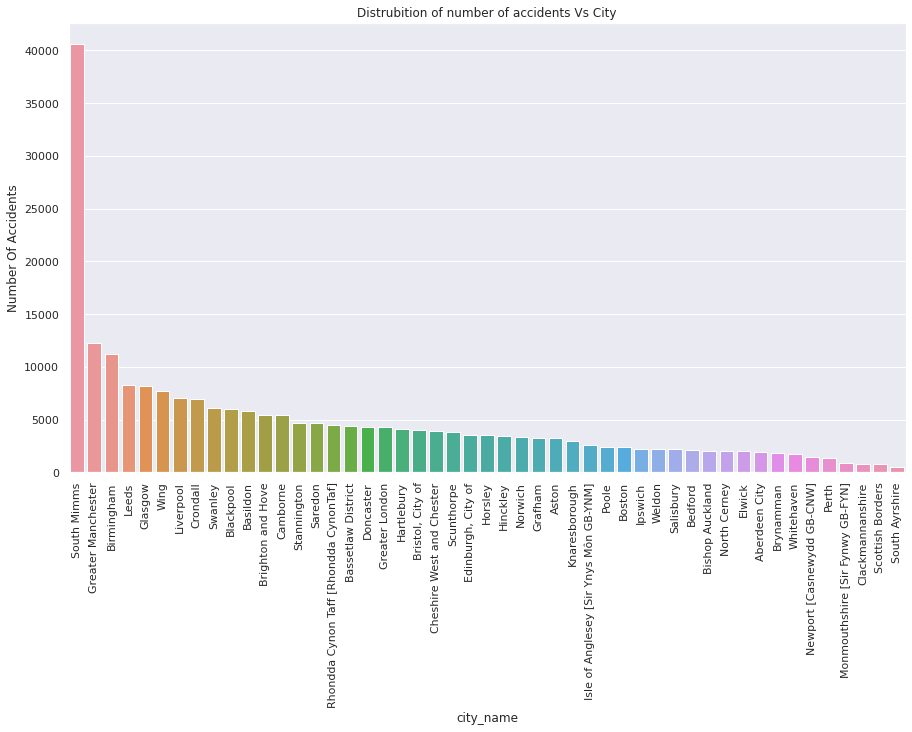

In [74]:
# Graph the count plot
visualize_data('city_name' , accidentsDataFrameCleaned , 'Distrubition of number of accidents Vs City')


In [75]:
# Apply Label Encoding to the city_name column

# get the number of unique values in the city name col
number_of_unique = accidentsDataFrameCleaned.city_name.nunique()

# get unique cities' names in city name column (Keys)
keys = accidentsDataFrameCleaned.city_name.unique().tolist()

# get the values that will be assigned to the dict
values = range(1 , number_of_unique + 1 )

# Create a dict to map values
city_name_dict = {keys[i]: values[i] for i in range(number_of_unique)}

# replace the categorical values by the neumrical
accidentsDataFrameCleaned.city_name.replace(city_name_dict, regex=True , inplace = True)

# update lookup table with week days code
update_lookup_table_from_dicitinary(lookup , city_name_dict , 'city_name' )


Feature                                   Value Code
0   city_name                             South Mimms    1
1   city_name                          Greater London    2
2   city_name                              Whitehaven    3
3   city_name                               Blackpool    4
4   city_name                               Liverpool    5
5   city_name                      Greater Manchester    6
6   city_name               Cheshire West and Chester    7
7   city_name                             Stannington    8
8   city_name                         Bishop Auckland    9
9   city_name                           Knaresborough   10
10  city_name                                   Leeds   11
11  city_name                               Doncaster   12
12  city_name                              Scunthorpe   13
13  city_name                                  Elwick   14
14  city_name                              Birmingham   15
15  city_name                                 Saredon   16
16  city_name                              Hartlebury   17
17  city_name                                 Horsley   18
18  city_name                      Bassetlaw District   19
19  city_name                                  Boston   20
20  city_name                                Hinckley   21
21  city_name                                  Weldon   22
22  city_name                                 Grafham   23
23  city_name                                 Norwich   24
24  city_name                                 Ipswich   25
25  city_name                                 Bedford   26
26  city_name                                   Aston   27
27  city_name                                Basildon   28
28  city_name                                    Wing   29
29  city_name                                Crondall   30
30  city_name                                 Swanley   31
31  city_name                       Brighton and Hove   32
32  city_name                                Camborne   33
33  city_name                        Bristol, City of   34
34  city_name                            North Cerney   35
35  city_name                               Salisbury   36
36  city_name                                   Poole   37
37  city_name  Isle of Anglesey [Sir Ynys Môn GB-YNM]   38
38  city_name              Newport [Casnewydd GB-CNW]   39
39  city_name   Rhondda Cynon Taff [Rhondda CynonTaf]   40
40  city_name                               Brynamman   41
41  city_name        Monmouthshire [Sir Fynwy GB-FYN]   42
42  city_name                           Aberdeen City   43
43  city_name                                   Perth   44
44  city_name                        Scottish Borders   45
45  city_name                      Edinburgh, City of   46
46  city_name                        Clackmannanshire   47
47  city_name                                 Glasgow   48
48  city_name                          South Ayrshire   49

In [78]:
city_name_dict

{'South Mimms': 1,
 'Greater London': 2,
 'Whitehaven': 3,
 'Blackpool': 4,
 'Liverpool': 5,
 'Greater Manchester': 6,
 'Cheshire West and Chester': 7,
 'Stannington': 8,
 'Bishop Auckland': 9,
 'Knaresborough': 10,
 'Leeds': 11,
 'Doncaster': 12,
 'Scunthorpe': 13,
 'Elwick': 14,
 'Birmingham': 15,
 'Saredon': 16,
 'Hartlebury': 17,
 'Horsley': 18,
 'Bassetlaw District': 19,
 'Boston': 20,
 'Hinckley': 21,
 'Weldon': 22,
 'Grafham': 23,
 'Norwich': 24,
 'Ipswich': 25,
 'Bedford': 26,
 'Aston': 27,
 'Basildon': 28,
 'Wing': 29,
 'Crondall': 30,
 'Swanley': 31,
 'Brighton and Hove': 32,
 'Camborne': 33,
 'Bristol, City of': 34,
 'North Cerney': 35,
 'Salisbury': 36,
 'Poole': 37,
 'Isle of Anglesey [Sir Ynys Môn GB-YNM]': 38,
 'Newport [Casnewydd GB-CNW]': 39,
 'Rhondda Cynon Taff [Rhondda CynonTaf]': 40,
 'Brynamman': 41,
 'Monmouthshire [Sir Fynwy GB-FYN]': 42,
 'Aberdeen City': 43,
 'Perth': 44,
 'Scottish Borders': 45,
 'Edinburgh, City of': 46,
 'Clackmannanshire': 47,
 'Glasgow': 

In [80]:
# The new Column after Encoding
accidentsDataFrameCleaned.city_name.tail()

accident_index
1992986013492    49
1992986014192    49
1992986015192    49
1992986015292    49
1992986015492    49
Name: city_name, dtype: object

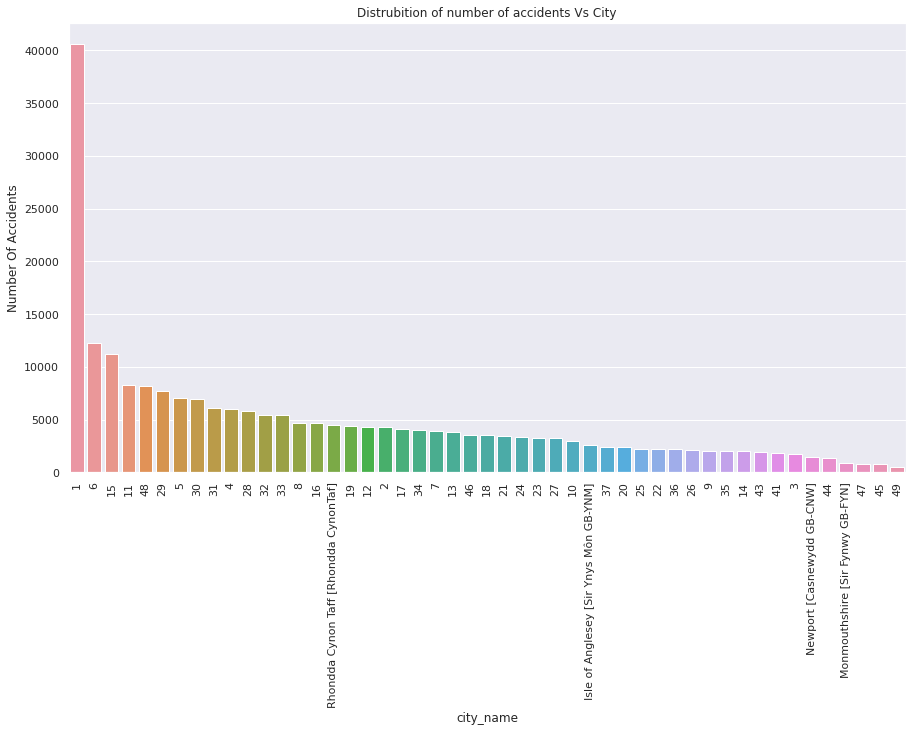

In [81]:
# Graph the count plot after Encoding
visualize_data('city_name' , accidentsDataFrameCleaned , 'Distrubition of number of accidents Vs City')


In [82]:
# save the date frame as a parquet
accidentsDataFrameCleaned.to_csv('1992_UK_Accidents_Cleaned.csv')